# QVAP

### Avaliando embalagens


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
from tpot import TPOTClassifier

from tpot import TPOTRegressor
from sklearn import metrics


In [2]:


import json
import warnings
import sys
from platform import python_version


In [3]:

import pylab as pl
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats import skew
from scipy.stats.stats import pearsonr

In [4]:
%config InlineBackend.figure_format = 'retina' #set 'png' on notebooks

pd.options.mode.chained_assignment = None
seed=101
np.random.seed(seed)

In [5]:
# Versões utilizadas
print('Python version is {}.'.format(python_version()))
print('Scikit-learn version is {}.'.format(sklearn.__version__))

Python version is 3.6.9.
Scikit-learn version is 0.21.3.


In [6]:
# Definindo a classe color para melhoria dos prints
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

## Dados

In [7]:
#content = open('data/tasks.json').read()

#tasks = pd.DataFrame(json.loads(content))

tasks4 = pd.read_json('data/tasks4.json')#, lines=True)
tasks5 = pd.read_json('data/tasks5.json')#, lines=True)

In [8]:
# Carregando o dataset eleições 2014
# Dados de treino
packagings = pd.read_csv('data/packagings.csv')

In [9]:
tasks4.head()

info  external_uid  user_id  \
0  {'url_second': 'https://drive.google.com/uc?ex...           NaN      NaN   
1  {'url_second': 'https://drive.google.com/uc?ex...           NaN      NaN   
2  {'url_second': 'https://drive.google.com/uc?ex...           NaN      NaN   
3  {'url_second': 'https://drive.google.com/uc?ex...           NaN      NaN   
4  {'url_second': 'https://drive.google.com/uc?ex...           NaN      NaN   

   task_id                     created                finish_time  \
0    70306  2019-08-21T00:28:23.491380 2019-08-21 00:32:04.850937   
1    70307  2019-08-21T00:32:05.021768 2019-08-21 00:32:30.468938   
2    70308  2019-08-21T00:32:30.631919 2019-08-21 00:32:40.130400   
3    70309  2019-08-21T00:32:40.274861 2019-08-21 00:32:48.542194   
4    70310  2019-08-21T00:32:48.718667 2019-08-21 00:32:54.215483   

   calibration          user_ip  timeout  project_id     id  
0          NaN  187.183.202.214      NaN         644  32220  
1          NaN  187.183.202.214      NaN         644  32221  
2          NaN  187.183.202.214      NaN         644  32222  
3          NaN  187.183.202.214      NaN         644  32223  
4          NaN  187.183.202.214      NaN         644  32224

In [10]:
tasks5.head()

info  external_uid  user_id  \
0  {'url_second': 'https://drive.google.com/uc?ex...           NaN      NaN   
1  {'url_second': 'https://drive.google.com/uc?ex...           NaN      NaN   
2  {'url_second': 'https://drive.google.com/uc?ex...           NaN      NaN   
3  {'url_second': 'https://drive.google.com/uc?ex...           NaN      NaN   
4  {'url_second': 'https://drive.google.com/uc?ex...           NaN      NaN   

   task_id                     created                finish_time  \
0    69856  2019-09-29T18:07:08.452916 2019-09-29 18:13:08.830790   
1    69857  2019-09-29T18:13:09.292289 2019-09-29 18:13:40.344686   
2    69858  2019-09-29T18:13:40.803767 2019-09-29 18:14:01.542929   
3    69859  2019-09-29T18:14:01.745854 2019-09-29 18:14:52.619312   
4    69860  2019-09-29T18:14:53.074196 2019-09-29 18:15:13.638474   

   calibration        user_ip  timeout  project_id     id  
0          NaN  191.35.95.228      NaN         644  33419  
1          NaN  191.35.95.228      NaN         644  33420  
2          NaN  191.35.95.228      NaN         644  33421  
3          NaN  191.35.95.228      NaN         644  33422  
4          NaN  191.35.95.228      NaN         644  33423

In [11]:
#info=pd.io.json.json_normalize(tasks['info'])
#tasks=tasks.join(info, rsuffix='_info')

In [12]:
info4=pd.io.json.json_normalize(tasks4['info'])
info5=pd.io.json.json_normalize(tasks5['info'])

In [13]:
tasks4=tasks4.join(info4, rsuffix='_info')

In [14]:
tasks5=tasks5.join(info5, rsuffix='_info')

In [15]:
tasks = pd.concat([tasks4,tasks5])
#tasks = tasks4.copy()

In [484]:
len(tasks['userProfile.email'].unique())

112

In [485]:
emails = set([v['userProfile.email'] for i, v in tasks.iterrows() if v['userProfile.opinion'] in tasks['userProfile.opinion'].unique() and v['userProfile.opinion'] != '' ])

In [486]:
emails

{'Aaaa@gmail.com',
 'Babaracg@hotmail.com',
 'Damasceno.cfh@gmail.com',
 'Fernandadramos@gmail.com',
 'Gizeledeoutubro@globomail.com',
 'Jessyquinhaa_@hotmail.com',
 'Kira_Figueiredo @hotmail. Com',
 'Nathielly.osbarbosa@gmail.com',
 'Raphaeljo@gmail.com',
 'Raquel.brito@gmail.com',
 'Souathamy@hotmail.com',
 'Thalismorais2209@gmail.com',
 'Valdenios.rocha@gmail.com',
 'Wyharapmg27@gmail.com',
 'amandasrazevedo@gmail.com',
 'arilittle2@gmail.com',
 'artungas@hotmail.com',
 'ayshamaia.jrf@gmail.com',
 'betxinha_porto@hotmail.com',
 'bruno_bo@hotmail.com',
 'cantinadomanoel@outlook.com',
 'clarinhaclementino@gmail.com',
 'contato.lincolncunha@gmail.com',
 'culturarebeca@gmail.com',
 'dani.enfermagem8@gmail.com',
 'daniel.leite.costa@gmail.com',
 'douglasouza@hotmail.com',
 'edinaldobarbosajunior@gmail.com',
 'fatimasiqueira2212@gmail.com',
 'fernandes.ska@gmail.com',
 'fernandes.yah@gmail.com',
 'flavianalima10@yahoo.com.br',
 'flavioarrudavicente@gmail.com',
 'flawmendes@gmail.com',
 'i

In [487]:
tasks = pd.DataFrame([v for i, v in tasks.iterrows() if v['userProfile.email'] in emails])

In [488]:
len(tasks)

2133

In [16]:
#comparisons_1 = pd.DataFrame(data={'theMost': tasks['theMost'], 'theLess': tasks['theLess']})
#comparisons_2 = pd.DataFrame(data={'theMost': tasks['theMost'], 'theLess': [x['url_second'] if x['url_second'] != x['theMost'] else x['theMost'] for x in tasks]})

#comparisons_2 = tasks.loc[:, ['theMost', 'url_second']]
#comparisons_2 = comparisons_2[comparisons_2['theMost']!=comparisons_2['url_second']]
#comparisons_2.rename(columns={"url_second": "theLess"})
#comparisons_2['result']='TRUE'
#comparisons_2.reindex

def return_comparisons(tasks, theMost, theLess, result):
    comparisons = tasks.loc[:, [theMost, theLess]]
    comparisons = comparisons[comparisons[theMost]!=comparisons[theLess]]
    comparisons.columns = ["theMost", "theLess"]
    #comparisons.rename(columns={theMost: "theMost",theLess: "theLess"})
    comparisons['result']=result
    comparisons['task_id']=tasks['task_id']
    #comparisons.reset_index(inplace=True)
    return comparisons




In [17]:
'''Determina a ordem de preferência entre uma embalagem e outra.
Cada resposta gera 6 ordens de preferências. Quando o usuário define 'theMost' ele coloca aquela embalagem à frente das outras três (três ordens de preferência).
O oposto ocorre quando o usuário define a embalegem 'theLess', colocando-a atrás das outras três em três ordens de preferência.
Este método define uma ordem de preferência de cada vez, precisando ser chamado seis vezes.'''
def return_comparisons_2(tasks, theMost, theLess, result, task_test = None):
    
    if task_test is not None:
        #test = DataFrame({'url_first': [task_test], 'url_second': [task_test], 'url_third': [task_test], 'url_fourth': [task_test]})
        #if any(tasks.isin({'url_first': [task_test], 'url_second': [task_test], 'url_third': [task_test], 'url_fourth': [task_test]})):
        tasks_test = pd.DataFrame(data=[elem for index, elem in tasks.iterrows() if task_test in [elem['url_first'], elem['url_second'], elem['url_third'], elem['url_fourth']] ],columns=tasks.columns)
        #tasks_comparisons_aux = pd.concat([tasks_test,tasks])
        #tasks_comparisons = tasks_comparisons_aux.drop_duplicates(keep=False)
    else:
        tasks_test = pd.DataFrame(columns=tasks.columns)
        #tasks_comparisons = tasks.copy()
        #tasks_comparisons
    #if any(str(elem) in ['a','b'] for elem in df['column'].tolist()):
    
    comparisons_test = tasks_test.loc[:, [theMost, theLess, 'task_id']]
    comparisons_comparisons = tasks.loc[:, [theMost, theLess, 'task_id']]
    #comparisons_comparisons = pd.concat([comparisons_test,comparisons_comparisons]).drop_duplicates(keep=False)
    comparisons_test = comparisons_test[comparisons_test[theMost]!=comparisons_test[theLess]]
    comparisons_comparisons = comparisons_comparisons[comparisons_comparisons[theMost]!=comparisons_comparisons[theLess]]
    comparisons_test.columns = ["theMost", "theLess", 'task_id']
    comparisons_comparisons.columns = ["theMost", "theLess", 'task_id']
    #comparisons.rename(columns={theMost: "theMost",theLess: "theLess"})
    comparisons_test['result']=result
    comparisons_comparisons['result']=result

    #if(tasks)
    #comparisons_comparisons = tasks_comparisons.loc[:, [theMost, theLess]]
    #comparisons_comparisons = comparisons_comparisons[comparisons_comparisons[theMost]!=comparisons_comparisons[theLess]]
    #comparisons_comparisons.columns = ["theMost", "theLess"]
    #comparisons_comparisons['result']=result
    #comparisons_comparisons['task_id']=tasks['task_id']
    
    #comparisons_test = tasks_test.loc[:, [theMost, theLess]]
    #comparisons_test = comparisons_test[comparisons_test[theMost]!=comparisons_test[theLess]]
    #comparisons_test.columns = ["theMost", "theLess"]
    #comparisons_test['result']=result
    #comparisons_test['task_id']=tasks['task_id']
    return (comparisons_comparisons, comparisons_test)

In [18]:

def set_attributes(data,uRL_name):
    aux_packagings = packagings.copy()
    aux_packagings.columns = aux_packagings.columns.str.cat(["_"+uRL_name if x != 'id' and x != 'URL' else "" for x in aux_packagings.columns], sep ="")
    result = aux_packagings.set_index('URL').join(data.set_index(uRL_name), how='inner', lsuffix='_'+uRL_name)
    return result

In [19]:
'''Inclui os atributos de cada URL no dataframe (direto do dataframe packagings), além de adicionar a URL no index do dataframe (gerando um index multiplo ou não)'''
def set_attributes_2(data,uRL_name,multiple_idx=False):
    index = data.sort_values(by=[uRL_name]).index
    aux_packagings = packagings.copy()
    aux_packagings.columns = aux_packagings.columns.str.cat(["_"+uRL_name if x != 'id' and x != 'URL' else "" for x in aux_packagings.columns], sep ="")
    result = aux_packagings.set_index('URL',drop=True).join(data.sort_values(by=[uRL_name]).set_index(uRL_name,drop=True), how='right', lsuffix='_'+uRL_name)
    if(multiple_idx):
        index = pd.MultiIndex.from_frame(pd.DataFrame(data={index.name: index, uRL_name: result.index}))#, names=['URL', uRL_name])
        return result.set_index(index)
    else:
        result[uRL_name] = result.index
        #index = pd.MultiIndex.from_frame(pd.DataFrame(data={uRL_name: result.index}), names=[uRL_name])#, names=['URL', uRL_name])
        #result.set_index(uRL_name)
        return result.set_index(uRL_name)#.drop([uRL_name], axis=1)

In [493]:

packagings.columns.str.cat(["_theMost" if x != 'id' and x != 'URL' else "" for x in packagings.columns], sep ="")

Index(['id', 'URL', 'shape_theMost', 'material_theMost', 'surface_theMost',
       'color_theMost', 'constitution_theMost'],
      dtype='object')

In [494]:
packagin_index = 1211#aleatório
#packagin_index = 11#aleatório
packaging_column = 'url_first'#aleatório

tasks.loc[packagin_index].at[packaging_column]

#recupera todas as comparações onde a primeira, segunda, terceira ou quata URL não foram escolhidas como 'theMost'
comparisons_1, tests_1 = return_comparisons_2(tasks, 'theMost', 'url_first', True, tasks.loc[packagin_index].at[packaging_column])
comparisons_2, tests_2 = return_comparisons_2(tasks, 'theMost', 'url_second', True, tasks.loc[packagin_index].at[packaging_column])
comparisons_3, tests_3 = return_comparisons_2(tasks, 'theMost', 'url_third', True, tasks.loc[packagin_index].at[packaging_column])
comparisons_4, tests_4 = return_comparisons_2(tasks, 'theMost', 'url_fourth', True, tasks.loc[packagin_index].at[packaging_column])

#recupera todas as comparações onde a primeira, segunda, terceira ou quata URL não foram escolhidas como 'theLess'
comparisons_5, tests_5 = return_comparisons_2(tasks, 'theLess', 'url_first', False, tasks.loc[packagin_index].at[packaging_column])
comparisons_6, tests_6 = return_comparisons_2(tasks, 'theLess', 'url_second', False, tasks.loc[packagin_index].at[packaging_column])
comparisons_7, tests_7 = return_comparisons_2(tasks, 'theLess', 'url_third', False, tasks.loc[packagin_index].at[packaging_column])
comparisons_8, tests_8 = return_comparisons_2(tasks, 'theLess', 'url_fourth', False, tasks.loc[packagin_index].at[packaging_column])

#concatena todas as comprações (ordens de precedência)
comparisons_aux = [comparisons_1, comparisons_2, comparisons_3, comparisons_4, comparisons_5, comparisons_6, comparisons_7, comparisons_8]
#eliminar no futuro
tests_aux = [tests_1, tests_2, tests_3, tests_4, tests_5, tests_6, tests_7, tests_8]

comparisons_train = pd.concat(comparisons_aux,sort=False,ignore_index=True)
comparisons_tests = pd.concat(tests_aux,sort=False,ignore_index=True)
comparisons_train.reset_index(drop=True,inplace=True)
comparisons_tests.reset_index(drop=True,inplace=True)

comparisons_train
#a,b = return_comparisons_2(tasks, 'theLess', 'url_fourth', False, tasks.loc[11].at['url_first'] )

#print(len(a),len(b))
#print(tasks['url_first'].loc[:0])
#for index, elem in tasks.copy().iterrows():
#    print(tasks.loc[tasks == elem])

#tasks_test = [elem for elem in tasks if tasks[:1] in [elem[:,['url_first']]] ]

#comparisons

theMost  \
0      https://drive.google.com/uc?export=view&id=1lx...   
1      https://drive.google.com/uc?export=view&id=1IZ...   
2      https://drive.google.com/uc?export=view&id=1X2...   
3      https://drive.google.com/uc?export=view&id=1Em...   
4      https://drive.google.com/uc?export=view&id=1fY...   
...                                                  ...   
12793  https://drive.google.com/uc?export=view&id=1KW...   
12794  https://drive.google.com/uc?export=view&id=18D...   
12795  https://drive.google.com/uc?export=view&id=1lx...   
12796  https://drive.google.com/uc?export=view&id=1wF...   
12797  https://drive.google.com/uc?export=view&id=1vz...   

                                                 theLess  task_id  result  
0      https://drive.google.com/uc?export=view&id=172...    70307    True  
1      https://drive.google.com/uc?export=view&id=1Rh...    70309    True  
2      https://drive.google.com/uc?export=view&id=18B...    70310    True  
3      https://drive.google.com/uc?export=view&id=1My...    70311    True  
4      https://drive.google.com/uc?export=view&id=1DM...    70313    True  
...                                                  ...      ...     ...  
12793  https://drive.google.com/uc?export=view&id=10J...    70544   False  
12794  https://drive.google.com/uc?export=view&id=18B...    70540   False  
12795  https://drive.google.com/uc?export=view&id=1fY...    70653   False  
12796  https://drive.google.com/uc?export=view&id=1mf...    70592   False  
12797  https://drive.google.com/uc?export=view&id=1X2...    70407   False  

[12798 rows x 4 columns]

In [495]:
comparisons_train_ready = set_attributes_2(comparisons_train,"theMost",False)
comparisons_train_ready = set_attributes_2(comparisons_train_ready,"theLess",True)
comparisons_train_ready
#packagings
#len(comparisons)
#len(pd.concat([comparisons_tests,comparisons_train]).drop_duplicates(keep=False))

id_theLess  \
theMost                                            theLess                                                          
https://drive.google.com/uc?export=view&id=18D-... https://drive.google.com/uc?export=view&id=10Jz...           6   
https://drive.google.com/uc?export=view&id=1251... https://drive.google.com/uc?export=view&id=10Jz...           6   
https://drive.google.com/uc?export=view&id=14UQ... https://drive.google.com/uc?export=view&id=10Jz...           6   
https://drive.google.com/uc?export=view&id=1B5t... https://drive.google.com/uc?export=view&id=10Jz...           6   
https://drive.google.com/uc?export=view&id=1zx-... https://drive.google.com/uc?export=view&id=10Jz...           6   
...                                                                                                           ...   
https://drive.google.com/uc?export=view&id=1GY4... https://drive.google.com/uc?export=view&id=1zx-...           1   
                                                   https://drive.google.com/uc?export=view&id=1zx-...           1   
https://drive.google.com/uc?export=view&id=19Wk... https://drive.google.com/uc?export=view&id=1zx-...           1   
https://drive.google.com/uc?export=view&id=1GY4... https://drive.google.com/uc?export=view&id=1zx-...           1   
https://drive.google.com/uc?export=view&id=1YtB... https://drive.google.com/uc?export=view&id=1zx-...           1   

                                                                                                      shape_theLess  \
theMost                                            theLess                                                            
https://drive.google.com/uc?export=view&id=18D-... https://drive.google.com/uc?export=view&id=10Jz...    Geométrica   
https://drive.google.com/uc?export=view&id=1251... https://drive.google.com/uc?export=view&id=10Jz...    Geométrica   
https://drive.google.com/uc?export=view&id=14UQ... https://drive.google.com/uc?export=view&id=10Jz...    Geométrica   
https://drive.google.com/uc?export=view&id=1B5t... https://drive.google.com/uc?export=view&id=10Jz...    Geométrica   
https://drive.google.com/uc?export=view&id=1zx-... https://drive.google.com/uc?export=view&id=10Jz...    Geométrica   
...                                                                                                             ...   
https://drive.google.com/uc?export=view&id=1GY4... https://drive.google.com/uc?export=view&id=1zx-...    Geométrica   
                                                   https://drive.google.com/uc?export=view&id=1zx-...    Geométrica   
https://drive.google.com/uc?export=view&id=19Wk... https://drive.google.com/uc?export=view&id=1zx-...    Geométrica   
https://drive.google.com/uc?export=view&id=1GY4... https://drive.google.com/uc?export=view&id=1zx-...    Geométrica   
https://drive.google.com/uc?export=view&id=1YtB... https://drive.google.com/uc?export=view&id=1zx-...    Geométrica   

                                                                                                      material_theLess  \
theMost                                            theLess                                                               
https://drive.google.com/uc?export=view&id=18D-... https://drive.google.com/uc?export=view&id=10Jz...            Metal   
https://drive.google.com/uc?export=view&id=1251... https://drive.google.com/uc?export=view&id=10Jz...            Metal   
https://drive.google.com/uc?export=view&id=14UQ... https://drive.google.com/uc?export=view&id=10Jz...            Metal   
https://drive.google.com/uc?export=view&id=1B5t... https://drive.google.com/uc?export=view&id=10Jz...            Metal   
https://drive.google.com/uc?export=view&id=1zx-... https://drive.google.com/uc?export=view&id=10Jz...            Metal   
...                                                                                                                ...   
https://drive.google.com/uc?export=view&id=1GY4... https:

In [496]:
comparisons_train.head()

theMost  \
0  https://drive.google.com/uc?export=view&id=1lx...   
1  https://drive.google.com/uc?export=view&id=1IZ...   
2  https://drive.google.com/uc?export=view&id=1X2...   
3  https://drive.google.com/uc?export=view&id=1Em...   
4  https://drive.google.com/uc?export=view&id=1fY...   

                                             theLess  task_id  result  
0  https://drive.google.com/uc?export=view&id=172...    70307    True  
1  https://drive.google.com/uc?export=view&id=1Rh...    70309    True  
2  https://drive.google.com/uc?export=view&id=18B...    70310    True  
3  https://drive.google.com/uc?export=view&id=1My...    70311    True  
4  https://drive.google.com/uc?export=view&id=1DM...    70313    True

In [497]:
packagings.loc[packagings['URL'] == 'https://drive.google.com/uc?export=view&id=12Xt1FjGTRXeL3p0Lq6yPA505H2ZSuFM4']

id                                                URL     shape material  \
4  59  https://drive.google.com/uc?export=view&id=12X...  Orgânica    Vidro   

    surface   color constitution  
4  Brilhosa  Neutra        Ordem

In [498]:
len(comparisons_train_ready[comparisons_train_ready['result'] == False])

6399

In [499]:
comparisons_tests_ready = set_attributes_2(comparisons_tests,"theMost",False)
comparisons_tests_ready = set_attributes_2(comparisons_tests_ready,"theLess", True)
comparisons_tests_ready

id_theLess  \
theMost                                            theLess                                                          
https://drive.google.com/uc?export=view&id=1B5t... https://drive.google.com/uc?export=view&id=10Jz...           6   
https://drive.google.com/uc?export=view&id=1fXR... https://drive.google.com/uc?export=view&id=10Jz...           6   
https://drive.google.com/uc?export=view&id=1B5t... https://drive.google.com/uc?export=view&id=10Jz...           6   
                                                   https://drive.google.com/uc?export=view&id=10Jz...           6   
                                                   https://drive.google.com/uc?export=view&id=10Jz...           6   
...                                                                                                           ...   
https://drive.google.com/uc?export=view&id=1hwI... https://drive.google.com/uc?export=view&id=1zx-...           1   
https://drive.google.com/uc?export=view&id=1AIP... https://drive.google.com/uc?export=view&id=1zx-...           1   
                                                   https://drive.google.com/uc?export=view&id=1zx-...           1   
                                                   https://drive.google.com/uc?export=view&id=1zx-...           1   
https://drive.google.com/uc?export=view&id=14UQ... https://drive.google.com/uc?export=view&id=1zx-...           1   

                                                                                                      shape_theLess  \
theMost                                            theLess                                                            
https://drive.google.com/uc?export=view&id=1B5t... https://drive.google.com/uc?export=view&id=10Jz...    Geométrica   
https://drive.google.com/uc?export=view&id=1fXR... https://drive.google.com/uc?export=view&id=10Jz...    Geométrica   
https://drive.google.com/uc?export=view&id=1B5t... https://drive.google.com/uc?export=view&id=10Jz...    Geométrica   
                                                   https://drive.google.com/uc?export=view&id=10Jz...    Geométrica   
                                                   https://drive.google.com/uc?export=view&id=10Jz...    Geométrica   
...                                                                                                             ...   
https://drive.google.com/uc?export=view&id=1hwI... https://drive.google.com/uc?export=view&id=1zx-...    Geométrica   
https://drive.google.com/uc?export=view&id=1AIP... https://drive.google.com/uc?export=view&id=1zx-...    Geométrica   
                                                   https://drive.google.com/uc?export=view&id=1zx-...    Geométrica   
                                                   https://drive.google.com/uc?export=view&id=1zx-...    Geométrica   
https://drive.google.com/uc?export=view&id=14UQ... https://drive.google.com/uc?export=view&id=1zx-...    Geométrica   

                                                                                                      material_theLess  \
theMost                                            theLess                                                               
https://drive.google.com/uc?export=view&id=1B5t... https://drive.google.com/uc?export=view&id=10Jz...            Metal   
https://drive.google.com/uc?export=view&id=1fXR... https://drive.google.com/uc?export=view&id=10Jz...            Metal   
https://drive.google.com/uc?export=view&id=1B5t... https://drive.google.com/uc?export=view&id=10Jz...            Metal   
                                                   https://drive.google.com/uc?export=view&id=10Jz...            Metal   
                                                   https://drive.google.com/uc?export=view&id=10Jz...            Metal   
...                                                                                                                ...   
https://drive.google.com/uc?export=view&id=1hwI... https:

In [500]:
#aqui apenas criamos a lista de scores, onde cada embalagem é pontuada em função da precedência em relação e número de ocorrências
firsts = pd.DataFrame(data={'URL': tasks['url_first'], 'score': 0.0, 'occurrences' : 0, 'final.score' : 0.0})
seconds = pd.DataFrame(data={'URL': tasks['url_second'], 'score': 0.0, 'occurrences' : 0, 'final.score' : 0.0})
thirds = pd.DataFrame(data={'URL': tasks['url_third'], 'score': 0.0, 'occurrences' : 0, 'final.score' : 0.0})
fourths = pd.DataFrame(data={'URL': tasks['url_fourth'], 'score': 0.0, 'occurrences' : 0, 'final.score' : 0.0})

scores_aux = [firsts, seconds, thirds, fourths]
scores = pd.concat(scores_aux,sort=False)
#scores.reset_index(drop=True,inplace=True)

scores.sort_values("URL", inplace = True) 
scores_2 = scores.copy()
scores.drop_duplicates(subset ="URL", 
                     inplace = True) 
#for index_scores, row_scores in scores.iterrows():
#    print(scores_2[scores_2['URL']==row_scores['URL']])

scores.reset_index(drop=True,inplace=True)
scores.reindex(['URL'])
scores

URL  score  occurrences  \
0   https://drive.google.com/uc?export=view&id=10J...    0.0            0   
1   https://drive.google.com/uc?export=view&id=113...    0.0            0   
2   https://drive.google.com/uc?export=view&id=11N...    0.0            0   
3   https://drive.google.com/uc?export=view&id=125...    0.0            0   
4   https://drive.google.com/uc?export=view&id=12X...    0.0            0   
..                                                ...    ...          ...   
59  https://drive.google.com/uc?export=view&id=1r6...    0.0            0   
60  https://drive.google.com/uc?export=view&id=1v4...    0.0            0   
61  https://drive.google.com/uc?export=view&id=1vz...    0.0            0   
62  https://drive.google.com/uc?export=view&id=1wF...    0.0            0   
63  https://drive.google.com/uc?export=view&id=1zx...    0.0            0   

    final.score  
0           0.0  
1           0.0  
2           0.0  
3           0.0  
4           0.0  
..          ...  
59          0.0  
60          0.0  
61          0.0  
62          0.0  
63          0.0  

[64 rows x 4 columns]

In [501]:

#scores[:1]
#scores.loc[scores['URL'] == some_value]

results = tasks.loc[:, ['theMost', 'url_first','url_second','url_third','url_fourth','theLess']]

#scores['score'] = [scores['score']+1 if scores['score'] == x['theMost'] and scores['score'] in [x['url_first'],x['url_second'],x['url_third'],x['url_fourth']] else scores['score'] for x in results]

#for index_results, row_results in results.iterrows():
#    scores.loc[scores['URL'] == row_results['theMost']]
        
'''Aqui cada vez que a embalagem é apontada como mais sustentável 'theMost', ganha dois pontos.
Se não for apontada como menos sustentável, ganha um ponto.
Se for apontada como menos sustentável, perde um ponto.
[Apresentar referências para este sistema]
[Pode ser uma boa usar a pontuação de torneio, sendo 3 para mais, 1 para indiferente e zero para menos]
[Dividir pelo número de ocorrências pode ser uma boa também]'''
count = 0
for index_results, row_results in results.iterrows():
    for index_scores, row_scores in scores.iterrows():
        #print('novo')
        #print(row_results['url_first'])
        if row_results['theMost'] == row_scores['URL']:
            #print('theMost')
            row_scores['score'] = row_scores['score'] + 2         
            #print(scores[index_scores:index_scores+1]['score'])
        if row_results['url_first'] == row_scores['URL']:
            #print('url_first')
            count = count + 1
            row_scores['occurrences'] = row_scores['occurrences'] + 1
            row_scores['score'] = row_scores['score'] + 1 
            #print(scores[index_scores:index_scores+1]['score'])
        if row_results['url_second'] == row_scores['URL']:
            #print('url_second')
            count = count + 1
            row_scores['occurrences'] = row_scores['occurrences'] + 1
            row_scores['score'] = row_scores['score'] + 1    
            #print(scores[index_scores:index_scores+1]['score'])
        if row_results['url_third'] == row_scores['URL']:
            #print('url_third')
            count = count + 1
            row_scores['occurrences'] = row_scores['occurrences'] + 1
            row_scores['score'] = row_scores['score'] + 1     
            #print(scores[index_scores:index_scores+1]['score'])
        if row_results['url_fourth'] == row_scores['URL']:
            #print('url_fourth')
            count = count + 1
            row_scores['occurrences'] = row_scores['occurrences'] + 1
            row_scores['score'] = row_scores['score'] + 1    
            #print(scores[index_scores:index_scores+1]['score'])
        if row_results['theLess'] == row_scores['URL']:
            #print('theLess')
            row_scores['score'] = row_scores['score'] - 1    
            #print(scores[index_scores:index_scores+1]['score'])
        scores[index_scores:index_scores+1]['score'] = row_scores['score']
        scores[index_scores:index_scores+1]['occurrences'] = row_scores['occurrences']
    
#print(count)
scores['final.score'] = scores['score'].divide(scores['occurrences'], fill_value = 1)
scores
#comparisons_2 = comparisons_2[comparisons_2['theMost']!=comparisons_2['url_second']]
#comparisons_2.rename(columns={"url_second": "theLess"})
#comparisons_2['result']='TRUE'
#comparisons_2.reindex

URL  score  occurrences  \
0   https://drive.google.com/uc?export=view&id=10J...  130.0          120   
1   https://drive.google.com/uc?export=view&id=113...  188.0          140   
2   https://drive.google.com/uc?export=view&id=11N...  233.0          119   
3   https://drive.google.com/uc?export=view&id=125...  264.0          128   
4   https://drive.google.com/uc?export=view&id=12X...  256.0          179   
..                                                ...    ...          ...   
59  https://drive.google.com/uc?export=view&id=1r6...  271.0          130   
60  https://drive.google.com/uc?export=view&id=1v4...   90.0          104   
61  https://drive.google.com/uc?export=view&id=1vz...  127.0          104   
62  https://drive.google.com/uc?export=view&id=1wF...  147.0          141   
63  https://drive.google.com/uc?export=view&id=1zx...   80.0          108   

    final.score  
0      1.083333  
1      1.342857  
2      1.957983  
3      2.062500  
4      1.430168  
..          ...  
59     2.084615  
60     0.865385  
61     1.221154  
62     1.042553  
63     0.740741  

[64 rows x 4 columns]

In [502]:
#Inclui os atributos de cada embalagem no datagram 'scores', gerando o 'scores_ready'
scores_ready = set_attributes(scores,"URL")
scores_ready=scores_ready.fillna(0)

In [503]:
scores_ready

id   shape_URL  \
URL                                                                  
https://drive.google.com/uc?export=view&id=1hwI...  63    Orgânica   
https://drive.google.com/uc?export=view&id=1V6L...  62    Orgânica   
https://drive.google.com/uc?export=view&id=1_2i...  61    Orgânica   
https://drive.google.com/uc?export=view&id=1vzX...  60    Orgânica   
https://drive.google.com/uc?export=view&id=12Xt...  59    Orgânica   
...                                                 ..         ...   
https://drive.google.com/uc?export=view&id=1_wA...   4  Geométrica   
https://drive.google.com/uc?export=view&id=1X2I...   3  Geométrica   
https://drive.google.com/uc?export=view&id=1Koq...   2  Geométrica   
https://drive.google.com/uc?export=view&id=1zx-...   1  Geométrica   
https://drive.google.com/uc?export=view&id=18BV...   0  Geométrica   

                                                   material_URL surface_URL  \
URL                                                                           
https://drive.google.com/uc?export=view&id=1hwI...        Vidro       Fosca   
https://drive.google.com/uc?export=view&id=1V6L...        Vidro       Fosca   
https://drive.google.com/uc?export=view&id=1_2i...        Vidro       Fosca   
https://drive.google.com/uc?export=view&id=1vzX...        Vidro       Fosca   
https://drive.google.com/uc?export=view&id=12Xt...        Vidro    Brilhosa   
...                                                         ...         ...   
https://drive.google.com/uc?export=view&id=1_wA...        Metal       Fosca   
https://drive.google.com/uc?export=view&id=1X2I...        Metal    Brilhosa   
https://drive.google.com/uc?export=view&id=1Koq...        Metal    Brilhosa   
https://drive.google.com/uc?export=view&id=1zx-...        Metal    Brilhosa   
https://drive.google.com/uc?export=view&id=18BV...        Metal    Brilhosa   

                                                   color_URL constitution_URL  \
URL                                                                             
https://drive.google.com/uc?export=view&id=1hwI...    Neutra            Ordem   
https://drive.google.com/uc?export=view&id=1V6L...    Neutra     Complexidade   
https://drive.google.com/uc?export=view&id=1_2i...   Intensa            Ordem   
https://drive.google.com/uc?export=view&id=1vzX...   Intensa     Complexidade   
https://drive.google.com/uc?export=view&id=12Xt...    Neutra            Ordem   
...                                                      ...              ...   
https://drive.google.com/uc?export=view&id=1_wA...   Intensa     Complexidade   
https://drive.google.com/uc?export=view&id=1X2I...    Neutra            Ordem   
https://drive.google.com/uc?export=view&id=1Koq...    Neutra     Complexidade   
https://drive.google.com/uc?export=view&id=1zx-...   Intensa            Ordem   
https://drive.google.com/uc?export=view&id=18BV...   Intensa     Complexidade   

                                                    score  occurrences  \
URL                                                                      
https://drive.google.com/uc?export=view&id=1hwI...  180.0          148   
https://drive.google.com/uc?export=view&id=1V6L...  167.0          135   
https://drive.google.com/uc?export=view&id=1_2i...  195.0          160   
https://drive.google.com/uc?export=view&id=1vzX...  127.0          104   
https://drive.google.com/uc?export=view&id=12Xt...  256.0          179   
...                                                   ...          ...   
https://drive.google.com/uc?export=view&id=1_wA...  146.0          146   
https://drive.google.com/uc?export=view&id=1X2I...  134.0          150   
https://drive.google.com/uc?export=view&id=1Koq...  140.0          148   
https://drive.google.com/uc?export=view&id=1zx-...   80.0          108   
https://drive.google.com/uc?export=view&id=18BV...  114.0          160   

                                                    final.score  
URL                           

In [504]:
#meu
# Removendo os atributos desnecessário
#tasks = tasks.drop(['info','external_uid','user_id','finish_time', 'calibration', 'user_ip', 'timeout', 'project_id', 'id', 'question'], axis=1)
scores_cleaned = scores_ready.drop(['id'], axis=1)
#scores_cleaned['real_score'] = 0.0
#scores_cleaned.loc[scores_cleaned['occurrences'] > 0.0,['real_score']] = scores_cleaned['score'].divide(scores_cleaned['occurrences'], fill_value=0.0) 
#separando opiniões
opinions = tasks['userProfile.opinion']
opinions = opinions.loc[opinions != '']
#removendo atributos que não farão parte do modelo, mas que não são totalmente desnecessário
#tasks_cleaned = tasks.drop(['task_id','created','order','id_info', 'userProfile.city', 'userProfile.educ', 'userProfile.age', 'userProfile.background_02', 'userProfile.background_01', 'userProfile.state', 'userProfile.opinion', 'userProfile.sex', 'userProfile.email', 'userProfile.clas'], axis=1)
comparisons_train_cleaned = comparisons_train_ready.drop(['task_id','id_theLess','id'], axis=1)
comparisons_tests_cleaned = comparisons_tests_ready.drop(['task_id','id_theLess','id'], axis=1)


In [505]:
opinions.head()

20    As cores suaves, tons azulados e formatos mode...
41    As embalagens com uma quantidade menor de imag...
62    Material, quantidade de informações,  cores, f...
78    Uso de materiais que podem ser reciclados mais...
79    Uso de materiais que podem ser reciclados mais...
Name: userProfile.opinion, dtype: object

In [506]:
scores_cleaned

shape_URL material_URL  \
URL                                                                           
https://drive.google.com/uc?export=view&id=1hwI...    Orgânica        Vidro   
https://drive.google.com/uc?export=view&id=1V6L...    Orgânica        Vidro   
https://drive.google.com/uc?export=view&id=1_2i...    Orgânica        Vidro   
https://drive.google.com/uc?export=view&id=1vzX...    Orgânica        Vidro   
https://drive.google.com/uc?export=view&id=12Xt...    Orgânica        Vidro   
...                                                        ...          ...   
https://drive.google.com/uc?export=view&id=1_wA...  Geométrica        Metal   
https://drive.google.com/uc?export=view&id=1X2I...  Geométrica        Metal   
https://drive.google.com/uc?export=view&id=1Koq...  Geométrica        Metal   
https://drive.google.com/uc?export=view&id=1zx-...  Geométrica        Metal   
https://drive.google.com/uc?export=view&id=18BV...  Geométrica        Metal   

                                                   surface_URL color_URL  \
URL                                                                        
https://drive.google.com/uc?export=view&id=1hwI...       Fosca    Neutra   
https://drive.google.com/uc?export=view&id=1V6L...       Fosca    Neutra   
https://drive.google.com/uc?export=view&id=1_2i...       Fosca   Intensa   
https://drive.google.com/uc?export=view&id=1vzX...       Fosca   Intensa   
https://drive.google.com/uc?export=view&id=12Xt...    Brilhosa    Neutra   
...                                                        ...       ...   
https://drive.google.com/uc?export=view&id=1_wA...       Fosca   Intensa   
https://drive.google.com/uc?export=view&id=1X2I...    Brilhosa    Neutra   
https://drive.google.com/uc?export=view&id=1Koq...    Brilhosa    Neutra   
https://drive.google.com/uc?export=view&id=1zx-...    Brilhosa   Intensa   
https://drive.google.com/uc?export=view&id=18BV...    Brilhosa   Intensa   

                                                   constitution_URL  score  \
URL                                                                          
https://drive.google.com/uc?export=view&id=1hwI...            Ordem  180.0   
https://drive.google.com/uc?export=view&id=1V6L...     Complexidade  167.0   
https://drive.google.com/uc?export=view&id=1_2i...            Ordem  195.0   
https://drive.google.com/uc?export=view&id=1vzX...     Complexidade  127.0   
https://drive.google.com/uc?export=view&id=12Xt...            Ordem  256.0   
...                                                             ...    ...   
https://drive.google.com/uc?export=view&id=1_wA...     Complexidade  146.0   
https://drive.google.com/uc?export=view&id=1X2I...            Ordem  134.0   
https://drive.google.com/uc?export=view&id=1Koq...     Complexidade  140.0   
https://drive.google.com/uc?export=view&id=1zx-...            Ordem   80.0   
https://drive.google.com/uc?export=view&id=18BV...     Complexidade  114.0   

                                                    occurrences  final.score  
URL                                                                           
https://drive.google.com/uc?export=view&id=1hwI...          148     1.216216  
https://drive.google.com/uc?export=view&id=1V6L...          135     1.237037  
https://drive.google.com/uc?export=view&id=1_2i...          160     1.218750  
https://drive.google.com/uc?export=view&id=1vzX...          104     1.221154  
https://drive.google.com/uc?export=view&id=12Xt...          179     1.430168  
...                                                         ...          ...  
https://drive.google.com/uc?export=view&id=1_wA...          146     1.000000  
https://drive.google.com/uc?export=view&id=1X2I...          150     0.893333  
https://drive.google.com/uc?export=view&id=1Koq...          148     0.945946  
https://drive.google.com/uc?export=view&id=1zx-...          108     0.740741  
https://drive.google.com/uc?export=view&id=18BV...          160     0.712

### Análise exploratória dos dados

In [507]:
scores_ready.count()

id                  64
shape_URL           64
material_URL        64
surface_URL         64
color_URL           64
constitution_URL    64
score               64
occurrences         64
final.score         64
dtype: int64

In [508]:
# Decrevendo as variáveis numéricas
#desc_int = train.describe(include=[np.number])
#desc_int.loc['count'] = desc_int.loc['count'].astype(int).astype(str)
#desc_int.iloc[1:] = desc_int.iloc[1:].applymap('{:.0f}'.format)
#desc_int.T

#meu
# Decrevendo as variáveis numéricas
described_scores = scores_cleaned.describe(include=[np.number])
described_scores.loc['count'] = described_scores.loc['count'].astype(int).astype(str)
described_scores.iloc[1:] = described_scores.iloc[1:].applymap('{:.0f}'.format)
described_scores.T

count mean std  min  25%  50%  75%  max
score          64  167  55   66  129  154  201  288
occurrences    64  133  19  104  122  132  142  182
final.score    64    1   0    1    1    1    2    2

Embalagem(ns) vencedora(s) como mais sustentável(is)
                                                     shape_URL  material_URL surface_URL color_URL constitution_URL  score  occurrences  final.score
URL                                                                                                                                                 
https://drive.google.com/uc?export=view&id=1RQp...  Geométrica  Papel Cartão       Fosca    Neutra     Complexidade  288.0          134     2.149254


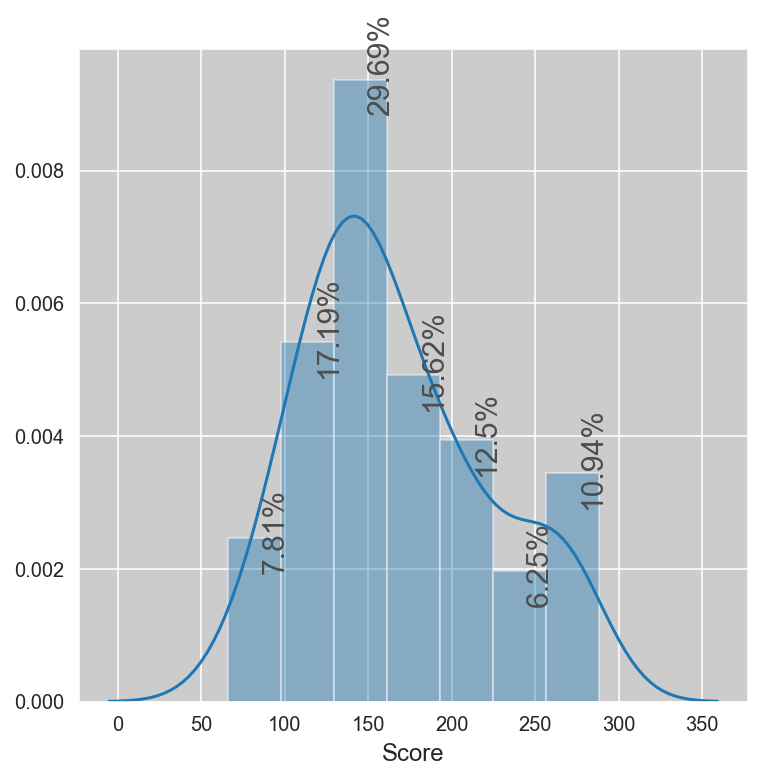

In [509]:
# Vefificando a variável alvo "situacao"
sns.set_style('darkgrid', {'axes.facecolor': '0.8','axes.edgecolor': '1.','grid.color': '1.','figure.edgecolor': '1.'})
fig, ax = plt.subplots(figsize=(6, 6))
ax = sns.distplot(scores_cleaned['score'])

ax.set_xlabel("Score", fontsize=12)
#ax.set_ylabel("Total of packaging", fontsize=12)
#ax.set_xticks([0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0])
#ax.set_xticklabels(ax.get_xticklabels(), rotation = 85)

# Textos na barra
totals = []
for i in ax.patches:
    totals.append(i.get_height())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_x()+20, i.get_height()-0.00045, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=15,
                color='.3',rotation=90)
# prints    
#print(color.BOLD + "Número de instâncias de cada classe da variável alvo" + color.END)
#print(scores_cleaned.score.value_counts().to_string(index=False))
print(color.BOLD + "Embalagem(ns) vencedora(s) como mais sustentável(is)" + color.END)
print(scores_cleaned.loc[scores_cleaned.score == scores_cleaned.score.max()].to_string())

Conjuntos de dados desbalanceadas podem comprometer o desempenho da maioria dos algoritmos clássicos de classificação. Esses algoritmos assumem que as bases têm uma distribuição de exemplos equilibrada entre os grupos e que o custo por uma classificação errada é o mesmo para todas as classes (2).

De forma geral, as abordagens que têm sido propostas para a rotulação de instâncias em problemas com classes muito desbalanceadas seguem dois caminhos distintos (1). Um deles é o de atribuir custos diferenciados às classes durante a indução do modelo de classificação (3).  O outro caminho se baseia em reamostragem de dados (subamostragem ou sobreamostragem). 

Métodos de subamostragem (*undersampling*) removem elementos da classe majoritaria a fim de promover o  balanceamento. Os exemplos a serem eliminados podem ser escolhidos de forma aleatória (subamostragem aleatória) ou por meio de algum critério de seleção (subamostragem informativa), enquanto na sobreamostragem, dados da classe minoritária são replicados ou são gerados dados sintéticos.


#### Referências
1. Deepa,  T.  and  Punithavalli,  M. An analysis for mining imbalanced datasets. International Journal of Computer Science and Information Security vol. 8, pp. 132–137, 2010.

2. He, H. and Garcia, E. A. Learning from imbalanced data. IEEE Transactions on Knowledge and Data Engineering 21 (9): 1263–1284, 2009.

3. Zadrozny, B. , Langford, J., and Abe, N. Cost-sensitive learning by cost-proportionate example weighting. In Proceedings of the Third IEEE International Conference on Data Mining. ICDM ’03. IEEE Computer Society, pp. 435–, 2003.

### Pré-processamento dos dados

#### Convertendo recursos categóricos

A biblioteca do *scikit* trabalha exclusivamente com atributos numéricos. Logo, é necessário transformar os campos categóricos em variáveis *dummy* (a variável dummy é uma variável categegórica transformada em numérica). Caso contrário, nosso algoritmo de Machine Learning não aceitará esses atributos diretamente como entradas.

In [510]:
# Listando as colunas com variáveis categóricas
scores_cleaned.dtypes[scores_cleaned.dtypes == "object"].index

Index(['shape_URL', 'material_URL', 'surface_URL', 'color_URL',
       'constitution_URL'],
      dtype='object')

In [511]:
# Listando as colunas com variáveis categóricas
comparisons_train_cleaned.dtypes[comparisons_train_cleaned.dtypes == "object"].index


Index(['shape_theLess', 'material_theLess', 'surface_theLess', 'color_theLess',
       'constitution_theLess', 'shape_theMost', 'material_theMost',
       'surface_theMost', 'color_theMost', 'constitution_theMost'],
      dtype='object')

In [512]:
from sklearn.model_selection import train_test_split
# Vamos começar dividindo nossos dados em um conjunto de treinamento e conjunto de validação.
X_train_comparisons_train, X_train_comparisons_valid, y_train_comparisons_train, y_train_comparisons_valid = train_test_split(comparisons_train_cleaned.drop(['result'], axis=1,inplace=False), np.where(comparisons_train_cleaned['result']==True, 1,0), test_size=0.30,random_state=101)


In [513]:
# Variáveis categóricas que serão utilizadas como preditores
scores_categories = pd.get_dummies(scores_cleaned[['shape_URL', 'material_URL', 'surface_URL', 'color_URL', 
                                          'constitution_URL']], drop_first=True)
X_comparisons_train_categories_train = pd.get_dummies(X_train_comparisons_train[['shape_theLess', 'material_theLess', 'surface_theLess', 'color_theLess', 
                                          'constitution_theLess', 'shape_theMost', 'material_theMost', 'surface_theMost', 'color_theMost', 
                                          'constitution_theMost']], drop_first=False)
X_comparisons_train_categories_valid = pd.get_dummies(X_train_comparisons_valid[['shape_theLess', 'material_theLess', 'surface_theLess', 'color_theLess', 
                                          'constitution_theLess', 'shape_theMost', 'material_theMost', 'surface_theMost', 'color_theMost', 
                                          'constitution_theMost']], drop_first=False)
comparisons_tests_categories = pd.get_dummies(comparisons_tests_cleaned[['shape_theLess', 'material_theLess', 'surface_theLess', 'color_theLess', 
                                          'constitution_theLess', 'shape_theMost', 'material_theMost', 'surface_theMost', 'color_theMost', 
                                          'constitution_theMost']], drop_first=False)

In [514]:
(set(X_comparisons_train_categories_train.columns) - (set(X_comparisons_train_categories_valid.columns)))

set()

In [515]:
(set(X_comparisons_train_categories_train.columns) - (set(comparisons_tests_categories.columns)))

set()

In [516]:
X_train_comparisons_train.values

array([['Orgânica', 'Polímero', 'Fosca', ..., 'Brilhosa', 'Neutra',
        'Complexidade'],
       ['Orgânica', 'Papel Cartão', 'Brilhosa', ..., 'Brilhosa',
        'Intensa', 'Complexidade'],
       ['Geométrica', 'Polímero', 'Brilhosa', ..., 'Fosca', 'Intensa',
        'Complexidade'],
       ...,
       ['Orgânica', 'Vidro', 'Fosca', ..., 'Fosca', 'Neutra',
        'Complexidade'],
       ['Orgânica', 'Polímero', 'Brilhosa', ..., 'Brilhosa', 'Neutra',
        'Ordem'],
       ['Orgânica', 'Polímero', 'Brilhosa', ..., 'Fosca', 'Intensa',
        'Complexidade']], dtype=object)

In [517]:
'''Utilizar a ferramenta TPOT para identificar o melhor classificador'''
tpot = TPOTClassifier(verbosity=2, max_time_mins=90)
tpot.fit(X_train_comparisons_train.values, y_train_comparisons_train)
print(tpot.score(X_train_comparisons_valid.values, y_train_comparisons_valid.values))
tpot.export('tpot_categories_pipeline.py')

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [518]:
scores_categories.head()

shape_URL_Orgânica  \
URL                                                                      
https://drive.google.com/uc?export=view&id=1hwI...                   1   
https://drive.google.com/uc?export=view&id=1V6L...                   1   
https://drive.google.com/uc?export=view&id=1_2i...                   1   
https://drive.google.com/uc?export=view&id=1vzX...                   1   
https://drive.google.com/uc?export=view&id=12Xt...                   1   

                                                    material_URL_Papel Cartão  \
URL                                                                             
https://drive.google.com/uc?export=view&id=1hwI...                          0   
https://drive.google.com/uc?export=view&id=1V6L...                          0   
https://drive.google.com/uc?export=view&id=1_2i...                          0   
https://drive.google.com/uc?export=view&id=1vzX...                          0   
https://drive.google.com/uc?export=view&id=12Xt...                          0   

                                                    material_URL_Polímero  \
URL                                                                         
https://drive.google.com/uc?export=view&id=1hwI...                      0   
https://drive.google.com/uc?export=view&id=1V6L...                      0   
https://drive.google.com/uc?export=view&id=1_2i...                      0   
https://drive.google.com/uc?export=view&id=1vzX...                      0   
https://drive.google.com/uc?export=view&id=12Xt...                      0   

                                                    material_URL_Vidro  \
URL                                                                      
https://drive.google.com/uc?export=view&id=1hwI...                   1   
https://drive.google.com/uc?export=view&id=1V6L...                   1   
https://drive.google.com/uc?export=view&id=1_2i...                   1   
https://drive.google.com/uc?export=view&id=1vzX...                   1   
https://drive.google.com/uc?export=view&id=12Xt...                   1   

                                                    surface_URL_Fosca  \
URL                                                                     
https://drive.google.com/uc?export=view&id=1hwI...                  1   
https://drive.google.com/uc?export=view&id=1V6L...                  1   
https://drive.google.com/uc?export=view&id=1_2i...                  1   
https://drive.google.com/uc?export=view&id=1vzX...                  1   
https://drive.google.com/uc?export=view&id=12Xt...                  0   

                                                    color_URL_Neutra  \
URL                                                                    
https://drive.google.com/uc?export=view&id=1hwI...                 1   
https://drive.google.com/uc?export=view&id=1V6L...                 1   
https://drive.google.com/uc?export=view&id=1_2i...                 0   
https://drive.google.com/uc?export=view&id=1vzX...                 0   
https://drive.google.com/uc?export=view&id=12Xt...                 1   

                                                    constitution_URL_Ordem  
URL                                                                         
https://drive.google.com/uc?export=view&id=1hwI...                       1  
https://drive.google.com/uc?export=view&id=1V6L...                       0  
https://drive.google.com/uc?export=view&id=1_2i...                       1  
https://drive.google.com/uc?export=view&id=1vzX...                       0  
https://drive.google.com/uc?export=view&id=12Xt...                       1

In [519]:
comparisons_train_cleaned.tail()

shape_theLess  \
theMost                                            theLess                                                            
https://drive.google.com/uc?export=view&id=1GY4... https://drive.google.com/uc?export=view&id=1zx-...    Geométrica   
                                                   https://drive.google.com/uc?export=view&id=1zx-...    Geométrica   
https://drive.google.com/uc?export=view&id=19Wk... https://drive.google.com/uc?export=view&id=1zx-...    Geométrica   
https://drive.google.com/uc?export=view&id=1GY4... https://drive.google.com/uc?export=view&id=1zx-...    Geométrica   
https://drive.google.com/uc?export=view&id=1YtB... https://drive.google.com/uc?export=view&id=1zx-...    Geométrica   

                                                                                                      material_theLess  \
theMost                                            theLess                                                               
https://drive.google.com/uc?export=view&id=1GY4... https://drive.google.com/uc?export=view&id=1zx-...            Metal   
                                                   https://drive.google.com/uc?export=view&id=1zx-...            Metal   
https://drive.google.com/uc?export=view&id=19Wk... https://drive.google.com/uc?export=view&id=1zx-...            Metal   
https://drive.google.com/uc?export=view&id=1GY4... https://drive.google.com/uc?export=view&id=1zx-...            Metal   
https://drive.google.com/uc?export=view&id=1YtB... https://drive.google.com/uc?export=view&id=1zx-...            Metal   

                                                                                                      surface_theLess  \
theMost                                            theLess                                                              
https://drive.google.com/uc?export=view&id=1GY4... https://drive.google.com/uc?export=view&id=1zx-...        Brilhosa   
                                                   https://drive.google.com/uc?export=view&id=1zx-...        Brilhosa   
https://drive.google.com/uc?export=view&id=19Wk... https://drive.google.com/uc?export=view&id=1zx-...        Brilhosa   
https://drive.google.com/uc?export=view&id=1GY4... https://drive.google.com/uc?export=view&id=1zx-...        Brilhosa   
https://drive.google.com/uc?export=view&id=1YtB... https://drive.google.com/uc?export=view&id=1zx-...        Brilhosa   

                                                                                                      color_theLess  \
theMost                                            theLess                                                            
https://drive.google.com/uc?export=view&id=1GY4... https://drive.google.com/uc?export=view&id=1zx-...       Intensa   
                                                   https://drive.google.com/uc?export=view&id=1zx-...       Intensa   
https://drive.google.com/uc?export=view&id=19Wk... https://drive.google.com/uc?export=view&id=1zx-...       Intensa   
https://drive.google.com/uc?export=view&id=1GY4... https://drive.google.com/uc?export=view&id=1zx-...       Intensa   
https://drive.google.com/uc?export=view&id=1YtB... https://drive.google.com/uc?export=view&id=1zx-...       Intensa   

                                                                                                      constitution_theLess  \
theMost                                            theLess                                                                   
https://drive.google.com/uc?export=view&id=1GY4... https://drive.google.com/uc?export=view&id=1zx-...                Ordem   
                                                   https://drive.google.com/uc?export=view&id=1zx-...                Ordem   
https://drive.google.com/uc?export=view&id=19Wk... https://drive.google.com/uc?export=view&id=1zx-...                Ordem   
https://drive.google.com/uc?export=view&id=1GY4... https://drive.google.com/uc?export=view&id=1zx-...

In [520]:
comparisons_train_categories.tail()

NameError: name 'comparisons_train_categories' is not defined

In [521]:
comparisons_tests_categories.head()

shape_theLess_Geométrica  \
theMost                                            theLess                                                                        
https://drive.google.com/uc?export=view&id=1B5t... https://drive.google.com/uc?export=view&id=10Jz...                         1   
https://drive.google.com/uc?export=view&id=1fXR... https://drive.google.com/uc?export=view&id=10Jz...                         1   
https://drive.google.com/uc?export=view&id=1B5t... https://drive.google.com/uc?export=view&id=10Jz...                         1   
                                                   https://drive.google.com/uc?export=view&id=10Jz...                         1   
                                                   https://drive.google.com/uc?export=view&id=10Jz...                         1   

                                                                                                       shape_theLess_Orgânica  \
theMost                                            theLess                                                                      
https://drive.google.com/uc?export=view&id=1B5t... https://drive.google.com/uc?export=view&id=10Jz...                       0   
https://drive.google.com/uc?export=view&id=1fXR... https://drive.google.com/uc?export=view&id=10Jz...                       0   
https://drive.google.com/uc?export=view&id=1B5t... https://drive.google.com/uc?export=view&id=10Jz...                       0   
                                                   https://drive.google.com/uc?export=view&id=10Jz...                       0   
                                                   https://drive.google.com/uc?export=view&id=10Jz...                       0   

                                                                                                       material_theLess_Metal  \
theMost                                            theLess                                                                      
https://drive.google.com/uc?export=view&id=1B5t... https://drive.google.com/uc?export=view&id=10Jz...                       1   
https://drive.google.com/uc?export=view&id=1fXR... https://drive.google.com/uc?export=view&id=10Jz...                       1   
https://drive.google.com/uc?export=view&id=1B5t... https://drive.google.com/uc?export=view&id=10Jz...                       1   
                                                   https://drive.google.com/uc?export=view&id=10Jz...                       1   
                                                   https://drive.google.com/uc?export=view&id=10Jz...                       1   

                                                                                                       material_theLess_Papel Cartão  \
theMost                                            theLess                                                                             
https://drive.google.com/uc?export=view&id=1B5t... https://drive.google.com/uc?export=view&id=10Jz...                              0   
https://drive.google.com/uc?export=view&id=1fXR... https://drive.google.com/uc?export=view&id=10Jz...                              0   
https://drive.google.com/uc?export=view&id=1B5t... https://drive.google.com/uc?export=view&id=10Jz...                              0   
                                                   https://drive.google.com/uc?export=view&id=10Jz...                              0   
                                                   https://drive.google.com/uc?export=view&id=10Jz...                              0   

                                                                                                       material_theLess_Polímero  \
theMost                                            theLess                                                                         
https://drive.google.com/uc?export=view&id=1B5t... https://drive.google.com/uc?export=view&id=10Jz...                          0   
https://drive.google.com/uc?

In [522]:
# Criando o dataset de treino após o pré-processamento
# Criando novo dataset com as variáveis numéricas e as variáveis dummy
#comparisons_train_final = pd.concat([comparisons_train_cleaned[['result']],comparisons_train_categories],axis=1)
#comparisons_tests_final = pd.concat([comparisons_tests_cleaned[['result']],comparisons_tests_categories],axis=1)
scores_final = pd.concat([scores_cleaned[['score']],scores_categories],axis=1)
# Convertendo os valores da variável alvo em numéricos (0, para não eleitos e 1 para eleitos)
#comparisons_train_final['result'] = np.where(comparisons_train_final['result']==True, 1,0)
#comparisons_tests_final['result'] = np.where(comparisons_tests_final['result']==True, 1,0)

In [523]:
# Verificando se há diferença de colunas após a criação das variáveis dummy
(set(comparisons_train_final.columns) - (set(comparisons_tests_final.columns)))

NameError: name 'comparisons_train_final' is not defined

In [524]:
### Separando as variáveis preditodas e alvo 
# variáveis preditoras
#X_train_comparisons = comparisons_train_final.drop('result',axis=1)
#X_tests_comparisons = comparisons_tests_final.drop('result',axis=1)
X_scores = scores_final.drop('score',axis=1)
# variável alvo
#y_train_comparisons = comparisons_train_final['result']
#y_tests_comparisons = comparisons_tests_final['result']
y_scores = scores_final['score']

### Métricas de Classificação

Utilizaremos as seguintes méticas para a avaliação dos modelos:

#### Acurácia

   É basicamente o número de acertos (positivos) divido pelo número total de exemplos. Ela deve ser usada em datasets com a mesma proporção de exemplos para cada classe, e quando as penalidades de acerto e erro para cada classe forem as mesmas.

   Em problemas com classes desproporcionais, ela causa uma falsa impressão de bom desempenho. Por exemplo, num dataset em que 80% dos exemplos pertençam a uma classe, só de classificar todos os exemplos naquela classe já se atinge uma precisão de 80%, mesmo que todos os exemplos da outra classe estejam classificados incorretamente.

    $Acurácia = \frac{Verdadeiros Positivos (TP) + Falsos Positivos (TP)}{Total}$

#### Precisão

   Número de exemplos classificados como pertencentes a uma classe, que realmente são daquela classe (verdadeiros positivos), dividido pela soma entre este número, e o número de exemplos classificados nesta classe, mas que pertencem a outras (falsos positivos).

    $Precisão = \frac{Verdadeiros Positivos (TP)}{Verdadeiros Positivos (TP) + Falsos Positivos (TP)}$

#### Recall

   Número de exemplos classificados como pertencentes a uma classe, que realmente são daquela classe, dividido pela quantidade total de exemplos que pertencem a esta classe, mesmo que sejam classificados em outra. No caso binário, verdadeiros positivos divididos por total de positivos.

    $Recall = \frac{Verdadeiros Positivos (TP)}{Verdadeiros Positivos (TP) + Falsos Negativos (FN)}$

#### F1 Score

   O F1 Score é uma média harmônica entre precisão e recall.

   Ela é muito boa quando você possui um dataset com classes desproporcionais, e o seu modelo não emite probabilidades. Isso não significa que não possa ser usada com modelos que emitem probabilidades, tudo depende do objetivo de sua tarefa de machine learning.

   Em geral, quanto maior o F1 score, melhor.    

    $F1 Score = \frac{2 * precisão * recall}{precisão + recall}$

#### AUC – Area Under the ROC Curve

<img src="auc.png" width="300" height="300"  align="left"/> 

   Esta é uma métrica interessante para tarefas com classes desproporcionais. Nela, mede-se a área sob uma curva formada pelo gráfico entre a taxa de exemplos positivos, que realmente são positivos, e a taxa de falsos positivos.

   Uma das vantagens em relação ao F1 Score, é que ela mede o desempenho do modelo em vários pontos de corte, não necessariamente atribuindo exemplos com probabilidade maior que 50% para a classe positiva, e menor, para a classe negativa.

   Em sistemas que se interessam apenas pela classe, e não pela probabilidade, ela pode ser utilizada para definir o melhor ponto de corte para atribuir uma ou outra classe a um exemplo. Este ponto de corte normalmente é o ponto que se localiza mais à esquerda, e para o alto, no gráfico, mas depende bastante do custo do erro na previsão de uma determinada classe.
   
Fonte: http://mariofilho.com/as-metricas-mais-populares-para-avaliar-modelos-de-machine-learning/


#### Essas méticas no Scikit-Learn

*metrics.accuracy_score(y_true, y_pred[, …])* ->  Accuracy classification score.
 
*metrics.precision_score(y_true, y_pred[, …])* -> Compute the precision

*metrics.f1_score(y_true, y_pred[, labels, …])* -> Compute the F1 score, also known as balanced F-score or F-measure

*metrics.recall_score(y_true, y_pred[, …])* -> 	Compute the recall

*metrics.roc_auc_score(y_true, y_score[, …])* -> 	Compute Area Under the Receiver Operating Characteristic Curve (ROC AUC) from prediction scores.

*metrics.classification_report(y_true, y_pred)* -> 	Build a text report showing the main classification metrics

*metrics.confusion_matrix(y_true, y_pred[, …])* -> 	Compute confusion matrix to evaluate the accuracy of a classification

###  Como ler uma Matriz de Confusão

<img src="matrizConfusao.png" width="300" height="300"  align="left"/>

### Importando as bibliotecas para as métricas

In [525]:
# Importando as bibliotecas para as métricas
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
from sklearn.metrics import f1_score, precision_score, roc_auc_score, recall_score
from mlxtend.plotting import plot_decision_regions, plot_confusion_matrix, plot_learning_curves

## Construindo os modelos

### MODELO 01  - Regressão Logística

Primeiramente vamos criar um modelo de regressão logística simples para vermos como se comporta

#### Divisão treino-teste

In [526]:
#from sklearn.model_selection import train_test_split
# Vamos começar dividindo nossos dados em um conjunto de treinamento e conjunto de testes.
#X_train_comparisons_train, X_train_comparisons_valid, y_train_comparisons_train, y_train_comparisons_valid = train_test_split(X_train_comparisons, y_train_comparisons, test_size=0.30,random_state=101)
X_scores_train, X_scores_test, y_scores_train, y_scores_test = train_test_split(X_scores, y_scores, test_size=0.30,random_state=101)


#### Treino e predição

In [527]:
from sklearn.linear_model import LogisticRegression
# Treinando o modelo
logit_comparisons = LogisticRegression(solver='lbfgs', max_iter=400)
# Fit do modelo
logit_comparisons.fit(X_comparisons_train_categories_train,y_train_comparisons_train)
# Predição do modelo
logit_pred_comparisons = logit_comparisons.predict(X_comparisons_train_categories_valid)



In [528]:
from sklearn.linear_model import LogisticRegression
# Treinando o modelo
logit_scores = LogisticRegression(solver='lbfgs', max_iter=400, multi_class='auto')
# Fit do modelo
logit_scores.fit(X_scores_train,y_scores_train)
# Predição do modelo
logit_pred_scores = logit_scores.predict(X_scores_test)

#### Avaliação do modelo

In [529]:
# Métricas
print(color.BOLD + 'Acurácia do modelo: '  + color.END + str(round(accuracy_score(y_train_comparisons_valid,logit_pred_comparisons),2)))
print(color.BOLD + 'Precision: ' + color.END + str(round(precision_score(y_train_comparisons_valid,logit_pred_comparisons),2)))
print(color.BOLD + 'F1 do modelo: ' + color.END + str(round(f1_score(y_train_comparisons_valid,logit_pred_comparisons),2)))
print(color.BOLD + 'Recall do modelo: ' + color.END + str(round(recall_score(y_train_comparisons_valid,logit_pred_comparisons),2)))
print(color.BOLD + 'AUC: ' + color.END + str(round(roc_auc_score(y_train_comparisons_valid,logit_pred_comparisons),2)))


print(color.BOLD + 'Acurácia do modelo: '  + color.END + str(round(accuracy_score(y_scores_test,logit_pred_scores),2)))
print(color.BOLD + 'Precision: ' + color.END + str(round(precision_score(y_scores_test,logit_pred_scores,average='micro'),2)))
print(color.BOLD + 'F1 do modelo: ' + color.END + str(round(f1_score(y_scores_test,logit_pred_scores,average='micro'),2)))
print(color.BOLD + 'Recall do modelo: ' + color.END + str(round(recall_score(y_scores_test,logit_pred_scores,average='micro'),2)))
#print(color.BOLD + 'AUC: ' + color.END + str(round(roc_auc_score(y_scores_test,logit_pred_scores,average='micro'),2)))

# Print do relatório de classificação
cr = classification_report(y_train_comparisons_valid,logit_pred_comparisons)
print(color.BOLD + '\nRelatório de Classificação' + color.END)
print(str(cr))

cr = classification_report(y_scores_test,logit_pred_scores)
print(color.BOLD + '\nRelatório de Classificação' + color.END)
print(str(cr))


Acurácia do modelo: 0.72
Precision: 0.76
F1 do modelo: 0.7
Recall do modelo: 0.64
AUC: 0.72
Acurácia do modelo: 0.0
Precision: 0.0
F1 do modelo: 0.0
Recall do modelo: 0.0

Relatório de Classificação
              precision    recall  f1-score   support

           0       0.68      0.79      0.73      1896
           1       0.76      0.64      0.70      1944

    accuracy                           0.72      3840
   macro avg       0.72      0.72      0.71      3840
weighted avg       0.72      0.72      0.71      3840


Relatório de Classificação
              precision    recall  f1-score   support

        90.0       0.00      0.00      0.00       1.0
       118.0       0.00      0.00      0.00       0.0
       127.0       0.00      0.00      0.00       1.0
       130.0       0.00      0.00      0.00       0.0
       136.0       0.00      0.00      0.00       1.0
       140.0       0.00      0.00      0.00       1.0
       145.0       0.00      0.00      0.00       1.0
       149.0 

c:\users\tclem\anaconda3\envs\consensus\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\users\tclem\anaconda3\envs\consensus\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)



Matriz de confusão
[[1497  399]
 [ 694 1250]]


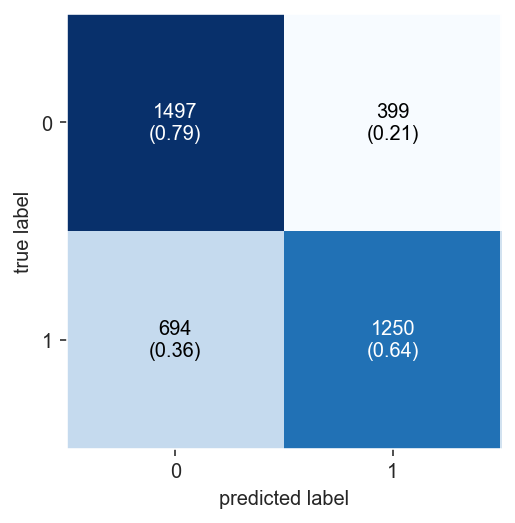

In [530]:


# adicionando resultado na matriz de confusão
cm = confusion_matrix(y_train_comparisons_valid,logit_pred_comparisons)
print(color.BOLD + '\nMatriz de confusão' + color.END)
print(str(cm))
plot_confusion_matrix(cm, show_normed=True)

plt.show()


Matriz de confusão
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0

c:\users\tclem\anaconda3\envs\consensus\lib\site-packages\mlxtend\plotting\plot_confusion_matrix.py:66: RuntimeWarning: invalid value encountered in true_divide
  normed_conf_mat = conf_mat.astype('float') / total_samples


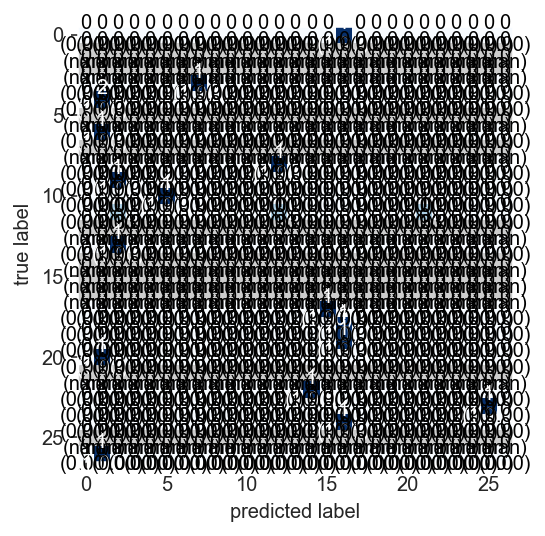

In [317]:


# adicionando resultado na matriz de confusão
cm = confusion_matrix(y_scores_test,logit_pred_scores)
print(color.BOLD + '\nMatriz de confusão' + color.END)
print(str(cm))
plot_confusion_matrix(cm, show_normed=True)

plt.show()

#### Importância dos Atributos

In [531]:
# Coeficientes - Logistic Regression
coef_logit_comparisons = pd.DataFrame((logit_comparisons.coef_[0]), index = X_comparisons_train_categories_train.columns.values, columns=['Coefficient'])
coef_logit_comparisons = coef_logit_comparisons.sort_values(by='Coefficient', ascending=False)

coef_logit_scores = pd.DataFrame((logit_scores.coef_[0]), index = X_scores_train.columns.values, columns=['Coefficient'])
coef_logit_scores = coef_logit_scores.sort_values(by='Coefficient', ascending=False)

# Importância dos Atributos
preditores_comparisons=list(X_comparisons_train_categories_train)
feat_score_comparisons = abs(logit_comparisons.coef_[0])
feat_imp_comparisons = pd.Series(feat_score_comparisons, preditores_comparisons).sort_values(ascending=False)

preditores_scores=list(X_scores_train)
feat_score_scores = abs(logit_scores.coef_[0])
feat_imp_scores = pd.Series(feat_score_scores, preditores_scores).sort_values(ascending=False)


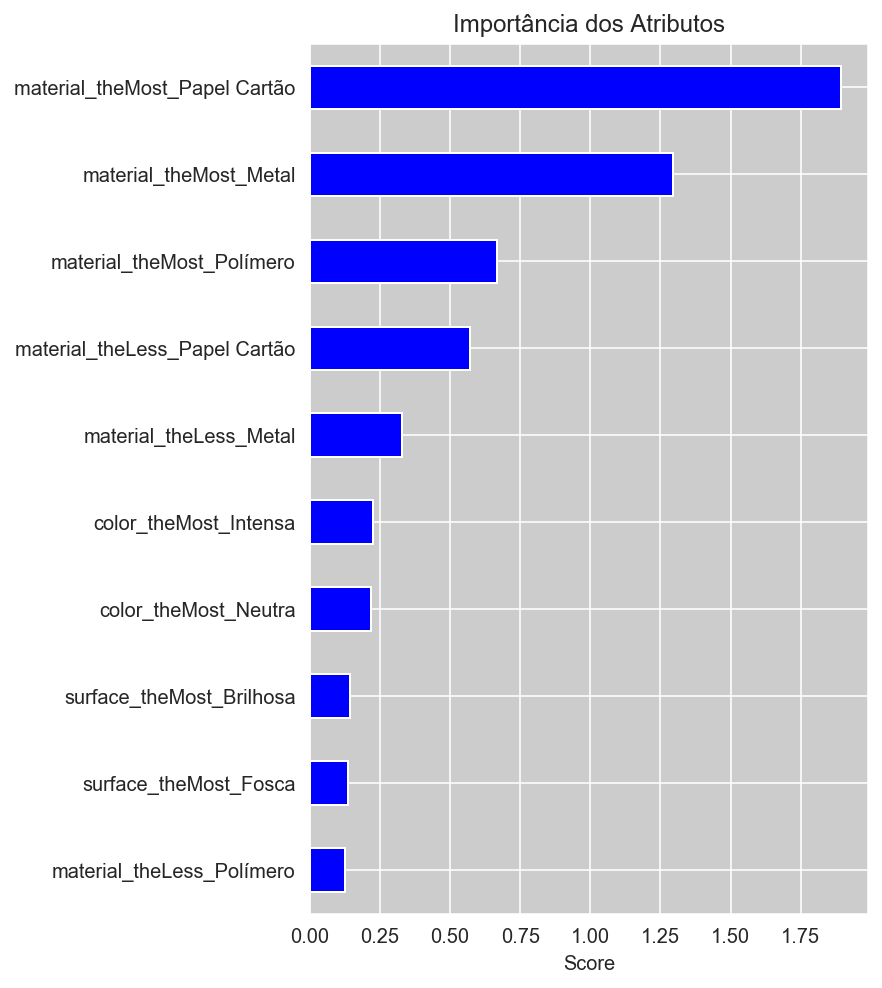

In [532]:
#Plot
plt.subplots(figsize=(5, 8))
feat_imp_comparisons.head(10).plot(kind='barh', title='Importância dos Atributos', color='blue')
plt.xlabel('Score')
plt.gca().invert_yaxis()

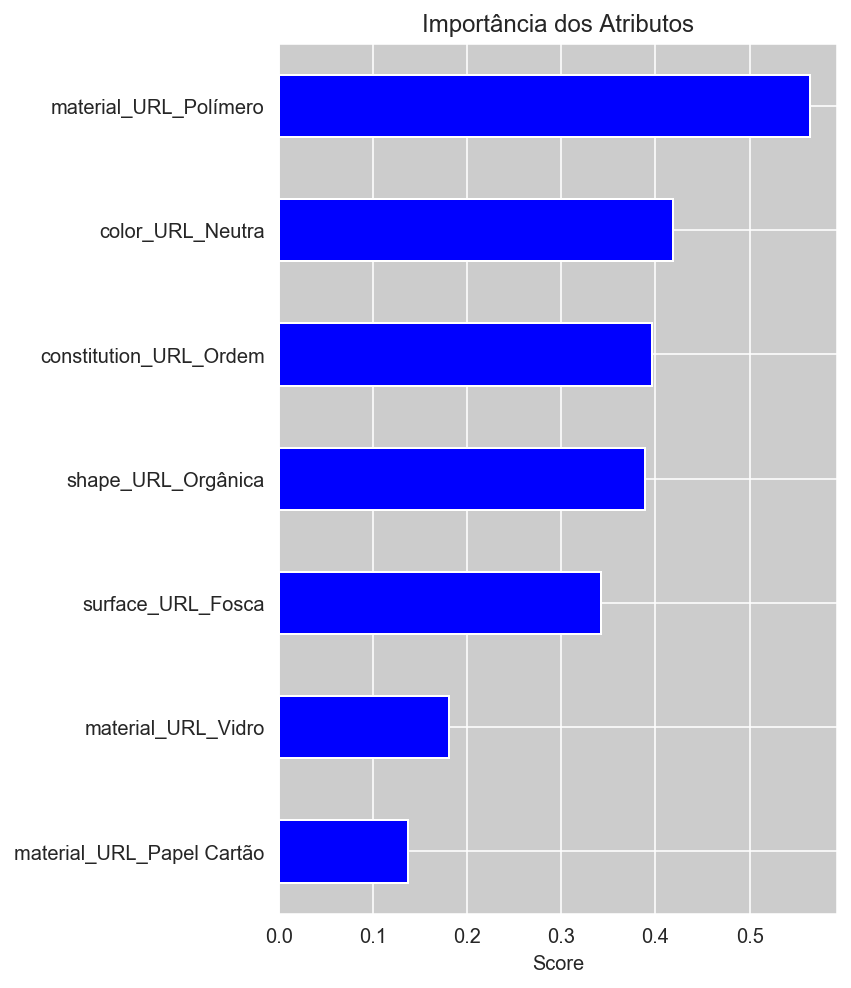

In [533]:
#Plot
plt.subplots(figsize=(5, 8))
feat_imp_scores.head(10).plot(kind='barh', title='Importância dos Atributos', color='blue')
plt.xlabel('Score')
plt.gca().invert_yaxis()

Verificamos que no modelo Logistic Regression os atributos mais importantes são os acima listado em ordem decrescente de importância.

#### Desempenho treino/teste

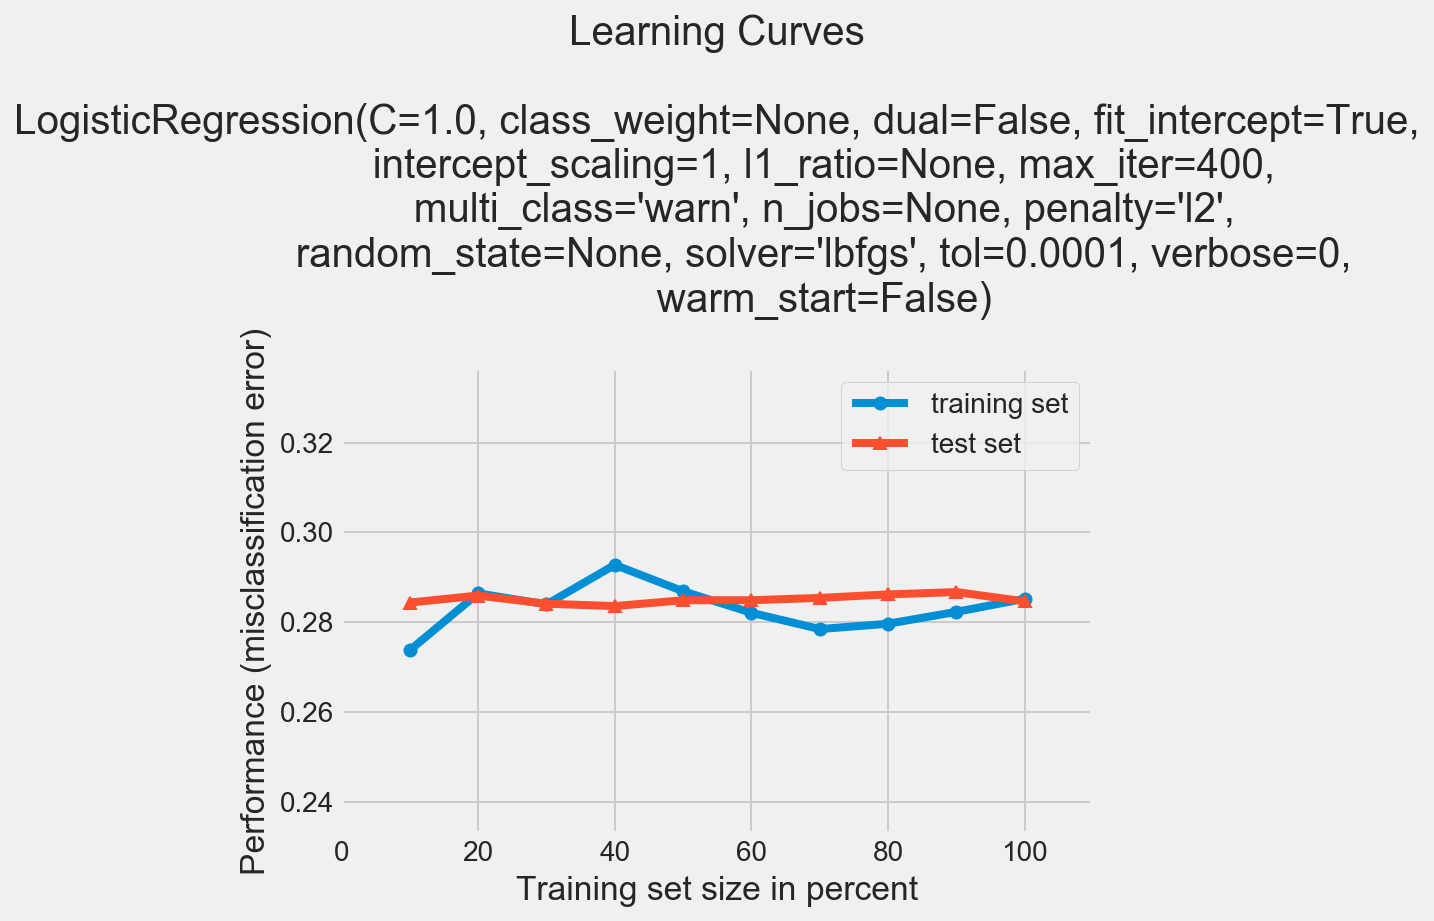

In [534]:
plot_learning_curves(X_comparisons_train_categories_train,y_train_comparisons_train, X_comparisons_train_categories_valid, y_train_comparisons_valid, logit_comparisons)
plt.show()


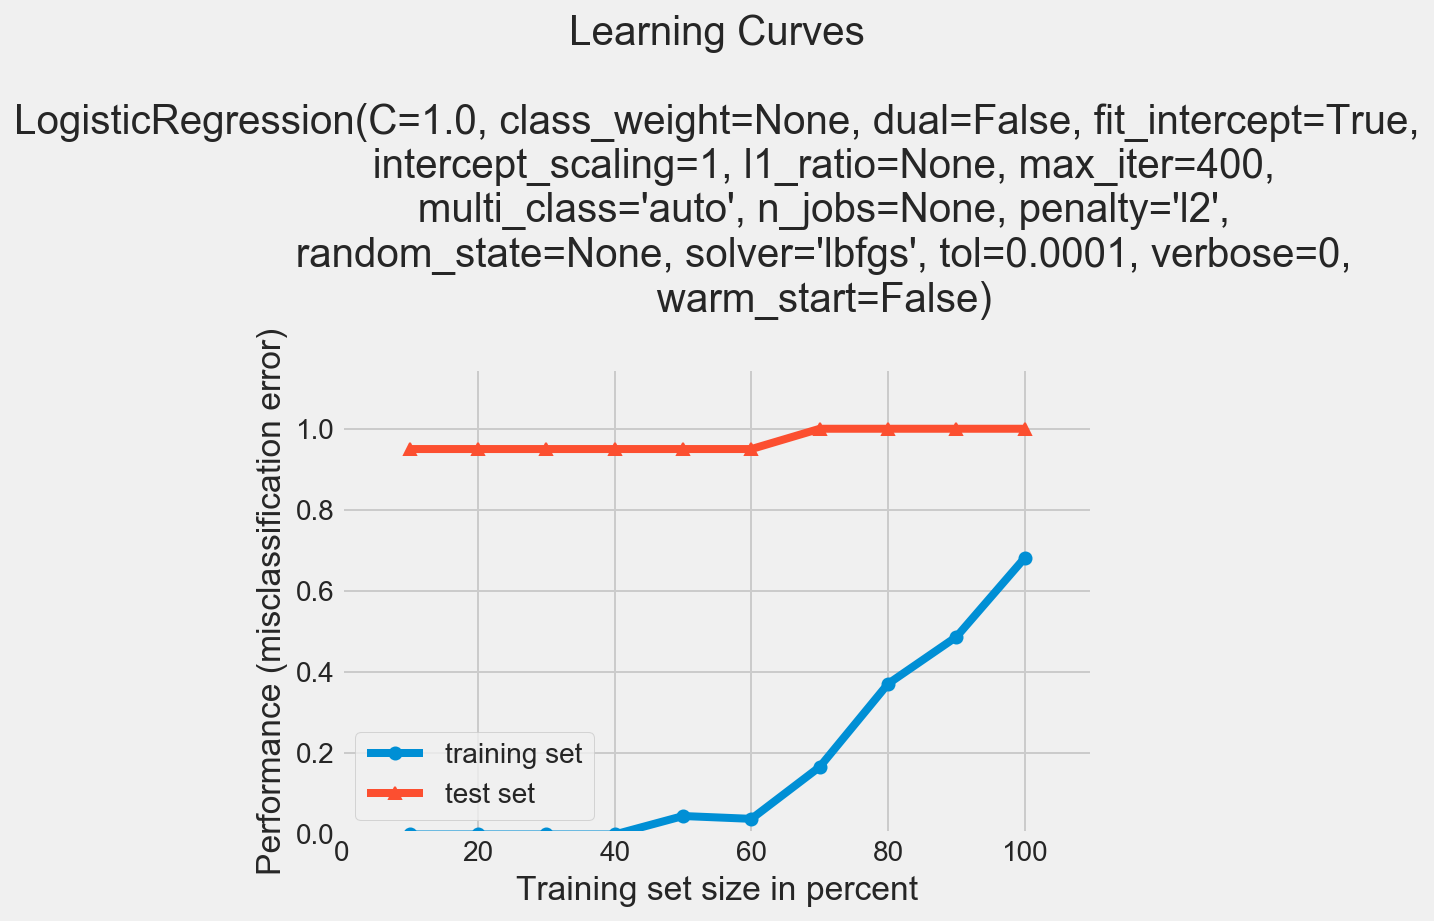

In [535]:
plot_learning_curves(X_scores_train,y_scores_train, X_scores_test, y_scores_test, logit_scores)
plt.show()

O modelo está seguindo o mesmo padrão tanto para os dados de teste como para os de validação, isso significa que não temos overfitting (o modelo parece ter generalizado bem). No entanto o erro é considerável para os dois conjuntos e as curvas se achatam muito rapidamente, nos parecendo que há underfitting.

### MODELO 03  - KNN

In [536]:
# Carregando a biblioteca para a criação do modelo
from sklearn.neighbors import KNeighborsClassifier

In [537]:
# Modelo com apenas um vizinho
knn_scores = KNeighborsClassifier(n_neighbors=1, algorithm = 'auto')
knn_comparisons = KNeighborsClassifier(n_neighbors=1, algorithm = 'auto')

In [538]:
# Fitando o modelo
knn_scores.fit(X_scores_train,y_scores_train)
knn_comparisons.fit(X_comparisons_train_categories_train,y_train_comparisons_train)



KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [539]:
# Predição do modelo
knn_pred_scores = knn_scores.predict(X_scores_test)
knn_pred_comparisons = knn_comparisons.predict(X_comparisons_train_categories_valid)


In [540]:
# Avaliando o modelo
# Acurácia
print(color.BOLD + 'Acurácia do modelo: '  + color.END + str(round(accuracy_score(y_scores_test,knn_pred_scores),2)))
print(color.BOLD + 'Precision: ' + color.END + str(round(precision_score(y_scores_test,knn_pred_scores,average='micro'),2)))
print(color.BOLD + 'F1 do modelo: ' + color.END + str(round(f1_score(y_scores_test,knn_pred_scores,average='micro'),2)))
print(color.BOLD + 'Recall do modelo: ' + color.END + str(round(recall_score(y_scores_test,knn_pred_scores,average='micro'),2)))
#print(color.BOLD + 'AUC ROC: ' + color.END + str(round(roc_auc_score(y_scores_test,knn_pred_scores,average='micro'),2)))

print(color.BOLD + 'Acurácia do modelo: '  + color.END + str(round(accuracy_score(y_train_comparisons_valid,knn_pred_comparisons),2)))
print(color.BOLD + 'Precision: ' + color.END + str(round(precision_score(y_train_comparisons_valid,knn_pred_comparisons),2)))
print(color.BOLD + 'F1 do modelo: ' + color.END + str(round(f1_score(y_train_comparisons_valid,knn_pred_comparisons),2)))
print(color.BOLD + 'Recall do modelo: ' + color.END + str(round(recall_score(y_train_comparisons_valid,knn_pred_comparisons),2)))
print(color.BOLD + 'AUC ROC: ' + color.END + str(round(roc_auc_score(y_train_comparisons_valid,knn_pred_comparisons),2)))

# Print do relatório de classificação
cr = classification_report(y_scores_test,knn_pred_scores)
print(color.BOLD + '\nRelatório de Classificação' + color.END)
print(str(cr))

cr = classification_report(y_train_comparisons_valid,knn_pred_comparisons)
print(color.BOLD + '\nRelatório de Classificação' + color.END)
print(str(cr))

Acurácia do modelo: 0.05
Precision: 0.05
F1 do modelo: 0.05
Recall do modelo: 0.05
Acurácia do modelo: 0.66
Precision: 0.67
F1 do modelo: 0.65
Recall do modelo: 0.64
AUC ROC: 0.66

Relatório de Classificação
              precision    recall  f1-score   support

        66.0       0.00      0.00      0.00         0
        90.0       0.00      0.00      0.00         1
       127.0       0.00      0.00      0.00         1
       130.0       0.00      0.00      0.00         0
       131.0       0.00      0.00      0.00         0
       134.0       0.00      0.00      0.00         0
       136.0       0.00      0.00      0.00         1
       139.0       0.00      0.00      0.00         0
       140.0       0.00      0.00      0.00         1
       145.0       0.00      0.00      0.00         1
       149.0       0.00      0.00      0.00         1
       150.0       0.00      0.00      0.00         1
       151.0       0.00      0.00      0.00         0
       158.0       0.25      1.00  

c:\users\tclem\anaconda3\envs\consensus\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\users\tclem\anaconda3\envs\consensus\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)



Matriz de confusão
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

c:\users\tclem\anaconda3\envs\consensus\lib\site-packages\mlxtend\plotting\plot_confusion_matrix.py:66: RuntimeWarning: invalid value encountered in true_divide
  normed_conf_mat = conf_mat.astype('float') / total_samples


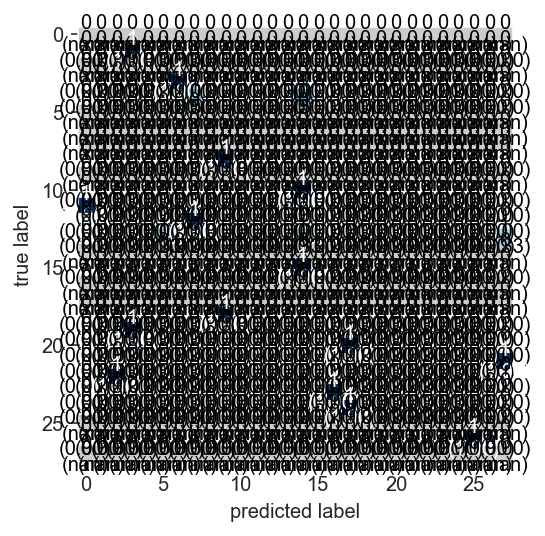

In [328]:


# adicionando resultado na matriz de confusão
cm = confusion_matrix(y_scores_test,knn_pred_scores)
print(color.BOLD + '\nMatriz de confusão' + color.END)
print(str(cm))
plot_confusion_matrix(cm, show_normed=True)

plt.show()


Matriz de confusão
[[1274  622]
 [ 695 1249]]


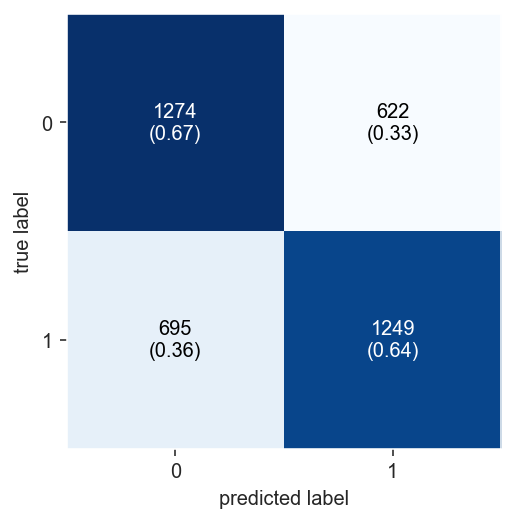

In [541]:


# adicionando resultado na matriz de confusão
cm = confusion_matrix(y_train_comparisons_valid,knn_pred_comparisons)
print(color.BOLD + '\nMatriz de confusão' + color.END)
print(str(cm))
plot_confusion_matrix(cm, show_normed=True)

plt.show()

In [330]:


# Predicão do dataset de validação
test_pred = knn_comparisons.predict(comparisons_tests_categories)
# Dataset para apresentação
previsao = comparisons_tests_categories.index
previsao.columns=['Id']
previsao = pd.DataFrame(previsao)
previsao['Predicted'] = test_pred
previsao.columns=['Id', 'Predicted']
previsao.reset_index()
previsao.set_index(['Id', 'Predicted'])
previsao['Predicted'] = np.where(previsao['Predicted']==1, 'eleito','nao_eleito')
#previsao.head(10)
# Contando a predição
previsao.Predicted.value_counts()

eleito        696
nao_eleito    684
Name: Predicted, dtype: int64

In [331]:
# Predicão do dataset de validação
test_pred = knn.predict(X_tests_comparisons)
# Dataset para apresentação
previsao = teste.sequencial_candidato
previsao = pd.DataFrame(previsao)
previsao['Predicted'] = test_pred
previsao.columns=['Id', 'Predicted']
previsao.reset_index()
previsao.set_index(['Id', 'Predicted'])
previsao['Predicted'] = np.where(previsao['Predicted']==1, 'eleito','nao_eleito')
#previsao.head(10)
# Contando a predição
previsao.Predicted.value_counts()

NameError: name 'X_tests_comparisons' is not defined

In [542]:
# Verificando qual o melhor número de vizinhos
error_rate = []

# Levará algum tempo
for i in range(1,50):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_comparisons_train_categories_train,y_train_comparisons_train)
    pred_i = knn.predict(X_comparisons_train_categories_valid)
    error_rate.append(np.mean(pred_i != y_train_comparisons_valid))

Text(0, 0.5, 'Error Rate')

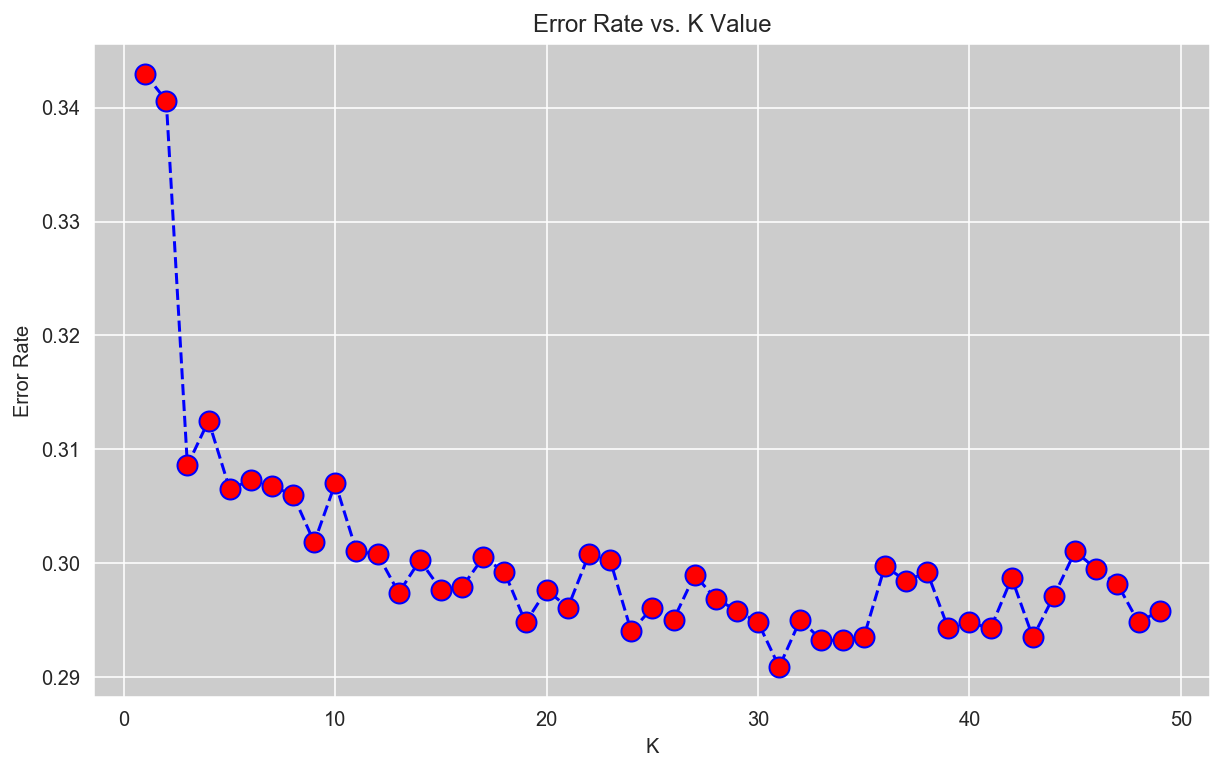

In [543]:
# Plotando a figura
plt.figure(figsize=(10,6))
plt.plot(range(1,50),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [544]:
# Verificando qual o melhor número de vizinhos
error_rate = []

# Levará algum tempo
for i in range(1,42):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_scores_train,y_scores_train)
    pred_i = knn.predict(X_scores_test)
    error_rate.append(np.mean(pred_i != y_scores_test))

ValueError: x and y must have same first dimension, but have shapes (49,) and (41,)

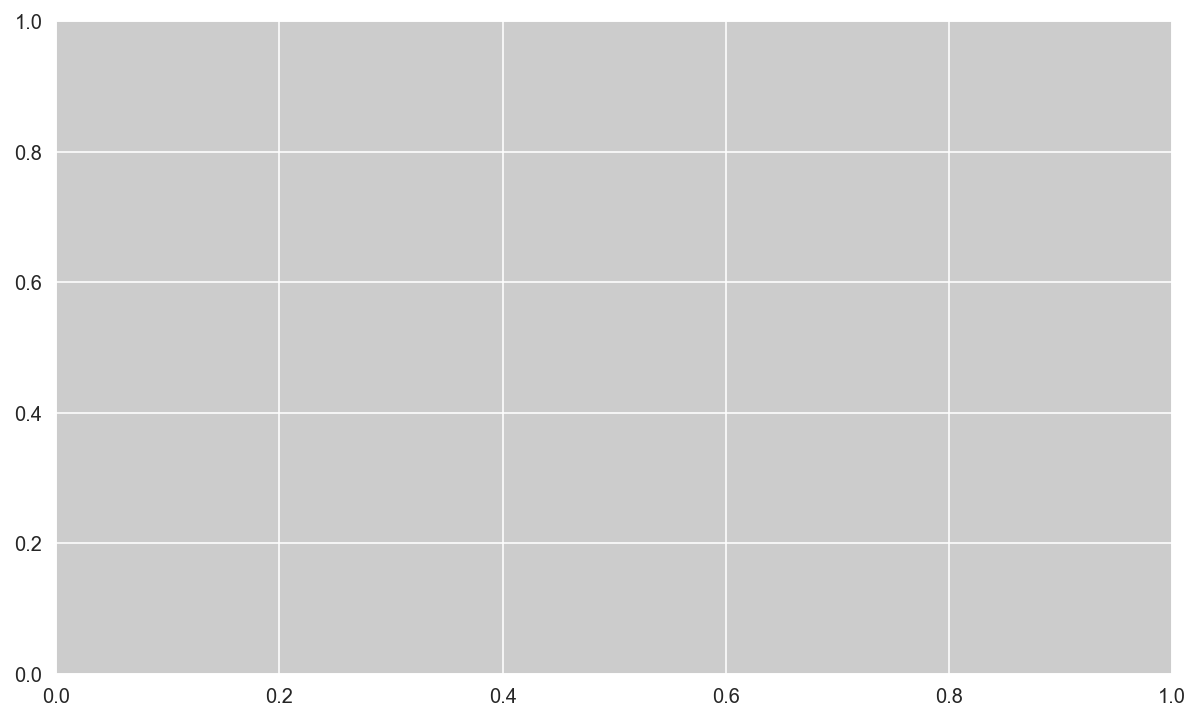

In [545]:
# Plotando a figura
plt.figure(figsize=(10,6))
plt.plot(range(1,50),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [546]:
# Agora com K=45
knn_comparisons = KNeighborsClassifier(n_neighbors=2)#escolha o melhor resultado do gráfico acima
# Fitando o modelo
knn_comparisons.fit(X_comparisons_train_categories_train,y_train_comparisons_train)
# Predições
knn_pred_comparisons = knn_comparisons.predict(X_comparisons_train_categories_valid)


Acurácia do modelo: 0.66
Precision: 0.75
F1 do modelo: 0.59
Recall do modelo: 0.49
AUC ROC: 0.66

Relatório de Classificação
              precision    recall  f1-score   support

           0       0.61      0.83      0.71      1896
           1       0.75      0.49      0.59      1944

    accuracy                           0.66      3840
   macro avg       0.68      0.66      0.65      3840
weighted avg       0.68      0.66      0.65      3840


Matriz de confusão
[[1579  317]
 [ 991  953]]


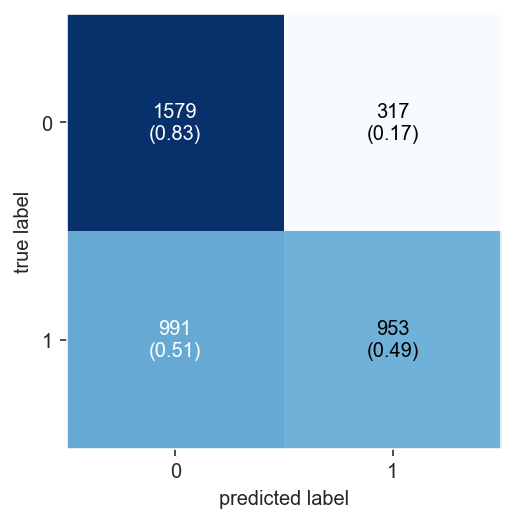

In [547]:
# Avaliando o modelo
# Acurácia
print(color.BOLD + 'Acurácia do modelo: '  + color.END + str(round(accuracy_score(y_train_comparisons_valid,knn_pred_comparisons),2)))
print(color.BOLD + 'Precision: ' + color.END + str(round(precision_score(y_train_comparisons_valid,knn_pred_comparisons),2)))
print(color.BOLD + 'F1 do modelo: ' + color.END + str(round(f1_score(y_train_comparisons_valid,knn_pred_comparisons),2)))
print(color.BOLD + 'Recall do modelo: ' + color.END + str(round(recall_score(y_train_comparisons_valid,knn_pred_comparisons),2)))
print(color.BOLD + 'AUC ROC: ' + color.END + str(round(roc_auc_score(y_train_comparisons_valid,knn_pred_comparisons),2)))

# Print do relatório de classificação
cr = classification_report(y_train_comparisons_valid,knn_pred_comparisons)
print(color.BOLD + '\nRelatório de Classificação' + color.END)
print(str(cr))

# adicionando resultado na matriz de confusão
cm = confusion_matrix(y_train_comparisons_valid,knn_pred_comparisons)
print(color.BOLD + '\nMatriz de confusão' + color.END)
print(str(cm))
plot_confusion_matrix(cm, show_normed=True)

plt.show()

##### Desempenho treino/teste

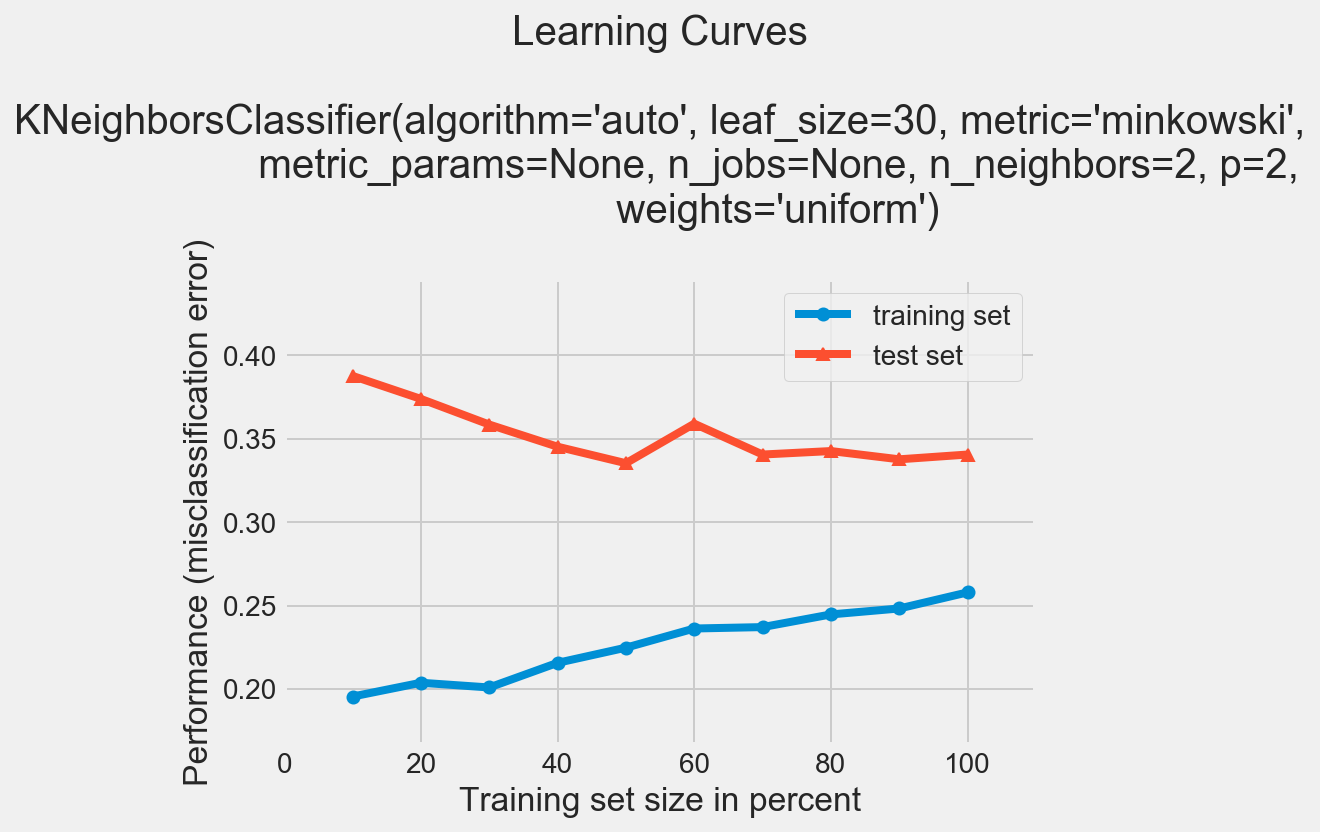

In [548]:
plot_learning_curves(X_comparisons_train_categories_train,y_train_comparisons_train, X_comparisons_train_categories_valid, y_train_comparisons_valid, knn_comparisons)
plt.show()

#### Predicão do dataset de 2014

In [339]:
# Predicão do dataset de validação
test_pred = knn_comparisons.predict(comparisons_tests_categories)
# Dataset para apresentação
previsao = comparisons_tests_categories.index
previsao.columns=['Id']
previsao = pd.DataFrame(previsao)
previsao['Predicted'] = test_pred
previsao.columns=['Id', 'Predicted']
previsao.reset_index()
previsao.set_index(['Id', 'Predicted'])
previsao['Predicted'] = np.where(previsao['Predicted']==1, 'eleito','nao_eleito')
#previsao.head(10)
# Contando a predição
previsao.Predicted.value_counts()


# Predicão do dataset de validação
#test_pred = knn.predict(df_valid)
# Dataset para apresentação
#previsao = teste.sequencial_candidato
#previsao = pd.DataFrame(previsao)
#previsao['Predicted'] = test_pred
#previsao.columns=['Id', 'Predicted']
#previsao.reset_index()
#previsao.set_index(['Id', 'Predicted'])
#previsao['Predicted'] = np.where(previsao['Predicted']==1, 'eleito','nao_eleito')
# Contando a predição
#previsao.Predicted.value_counts()

nao_eleito    985
eleito        395
Name: Predicted, dtype: int64

### MODELO 04 - Árvores Extras

In [549]:
# Biblioteca para o modelo
from sklearn.tree import DecisionTreeClassifier

In [550]:

# Criando o modelo
dtree_comparisons = DecisionTreeClassifier()
# Fitando o modelo
dtree_comparisons.fit(X_comparisons_train_categories_train,y_train_comparisons_train)
# Predição
dtree_pred_comparisons = dtree_comparisons.predict(X_comparisons_train_categories_valid)

In [551]:
# Criando o modelo
dtree_scores = DecisionTreeClassifier()
# Fitando o modelo
dtree_scores.fit(X_scores_train,y_scores_train)
# Predição
dtree_pred_scores = dtree_scores.predict(X_scores_test)

In [552]:
# Acurácia
print(color.BOLD + 'Acurácia do modelo: '  + color.END + str(round(accuracy_score(y_train_comparisons_valid,dtree_pred_comparisons),2)))
print(color.BOLD + 'Precision: ' + color.END + str(round(precision_score(y_train_comparisons_valid,dtree_pred_comparisons),2)))
print(color.BOLD + 'F1 do modelo: ' + color.END + str(round(f1_score(y_train_comparisons_valid,dtree_pred_comparisons),2)))
print(color.BOLD + 'Recall do modelo: ' + color.END + str(round(recall_score(y_train_comparisons_valid,dtree_pred_comparisons),2)))
print(color.BOLD + 'AUC ROC: ' + color.END + str(round(roc_auc_score(y_train_comparisons_valid,dtree_pred_comparisons),2)))

print(color.BOLD + 'Acurácia do modelo: '  + color.END + str(round(accuracy_score(y_scores_test,dtree_pred_scores),2)))
print(color.BOLD + 'Precision: ' + color.END + str(round(precision_score(y_scores_test,dtree_pred_scores,average='micro'),2)))
print(color.BOLD + 'F1 do modelo: ' + color.END + str(round(f1_score(y_scores_test,dtree_pred_scores,average='micro'),2)))
print(color.BOLD + 'Recall do modelo: ' + color.END + str(round(recall_score(y_scores_test,dtree_pred_scores,average='micro'),2)))
#print(color.BOLD + 'AUC ROC: ' + color.END + str(round(roc_auc_score(y_scores_test,dtree_pred_scores,average='micro'),2)))

# Print do relatório de classificação
cr = classification_report(y_train_comparisons_valid,dtree_pred_comparisons)
print(color.BOLD + '\nRelatório de Classificação' + color.END)
print(str(cr))

cr = classification_report(y_scores_test,dtree_pred_scores)
print(color.BOLD + '\nRelatório de Classificação' + color.END)
print(str(cr))


Acurácia do modelo: 0.69
Precision: 0.73
F1 do modelo: 0.67
Recall do modelo: 0.63
AUC ROC: 0.69
Acurácia do modelo: 0.0
Precision: 0.0
F1 do modelo: 0.0
Recall do modelo: 0.0

Relatório de Classificação
              precision    recall  f1-score   support

           0       0.67      0.76      0.71      1896
           1       0.73      0.63      0.67      1944

    accuracy                           0.69      3840
   macro avg       0.70      0.69      0.69      3840
weighted avg       0.70      0.69      0.69      3840


Relatório de Classificação
              precision    recall  f1-score   support

        90.0       0.00      0.00      0.00       1.0
       111.0       0.00      0.00      0.00       0.0
       121.0       0.00      0.00      0.00       0.0
       127.0       0.00      0.00      0.00       1.0
       130.0       0.00      0.00      0.00       0.0
       131.0       0.00      0.00      0.00       0.0
       134.0       0.00      0.00      0.00       0.0
       1

c:\users\tclem\anaconda3\envs\consensus\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\users\tclem\anaconda3\envs\consensus\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)



Matriz de confusão
[[1448  448]
 [ 727 1217]]


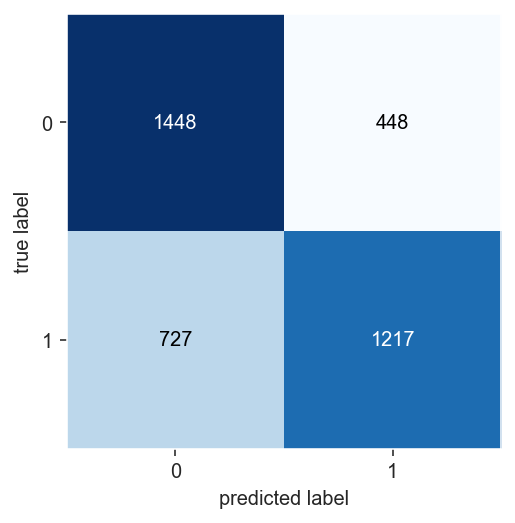

In [553]:

# adicionando resultado na matriz de confusão
cm = confusion_matrix(y_train_comparisons_valid,dtree_pred_comparisons)
print(color.BOLD + '\nMatriz de confusão' + color.END)
print(str(cm))
plot_confusion_matrix(cm)

plt.show()


Matriz de confusão
[[0 2 0 0 2 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 1 0 1]
 [0 1 0 1 0 1 1 0 0]
 [1 1 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0]
 [0 0 0 1 1 0 1 0 0]
 [0 0 0 0 0 0 0 0 0]]


C:\Users\tclem\Anaconda3\lib\site-packages\mlxtend\plotting\plot_confusion_matrix.py:66: RuntimeWarning: invalid value encountered in true_divide
  normed_conf_mat = conf_mat.astype('float') / total_samples


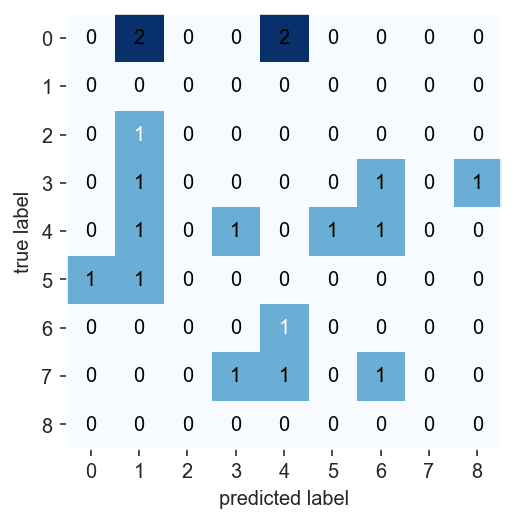

In [84]:

# adicionando resultado na matriz de confusão
cm = confusion_matrix(y_scores_test,dtree_pred_scores)
print(color.BOLD + '\nMatriz de confusão' + color.END)
print(str(cm))
plot_confusion_matrix(cm)

plt.show()

#### Desempenho treino/teste

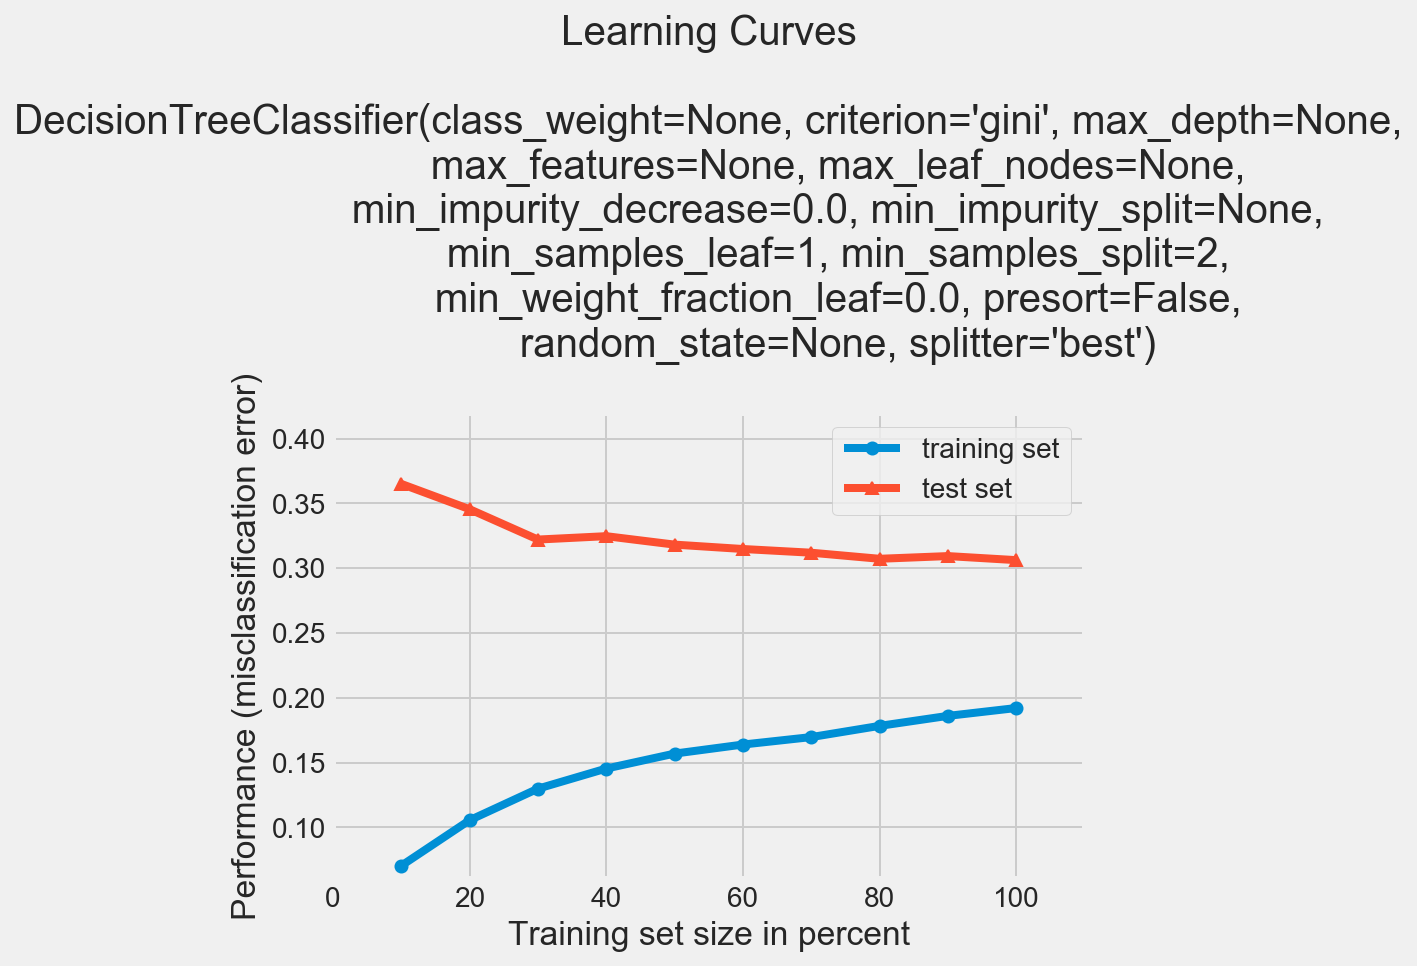

In [554]:

plot_learning_curves(X_comparisons_train_categories_train,y_train_comparisons_train, X_comparisons_train_categories_valid, y_train_comparisons_valid, dtree_comparisons)
plt.show()


Aqui vemos que o erro no conjunto de treinamento começa e permanece extremamente baixo, enquanto o erro no conjunto de teste é grande. Parece que o erro do conjunto de teste está diminuindo lentamente com mais dados. Isso é característico do overfitting, o modelo está capturando exatamente o comportamento dos dados de treinamento, e, portanto, não está conseguindo generalizar para novos pontos.

#### Predicão do dataset de validação

In [555]:

# Predicão do dataset de validação
test_pred = dtree_comparisons.predict(comparisons_tests_categories)
# Dataset para apresentação
previsao = comparisons_tests_categories.index
previsao.columns=['Id']
previsao = pd.DataFrame(previsao)
previsao['Predicted'] = test_pred
previsao.columns=['Id', 'Predicted']
previsao.reset_index()
previsao.set_index(['Id', 'Predicted'])
previsao['Predicted'] = np.where(previsao['Predicted']==1, 'eleito','nao_eleito')
#previsao.head(10)
# Contando a predição
previsao.Predicted.value_counts()

# Predicão do dataset de validação
#test_pred = dtree.predict(X_tests_comparisons)
# Dataset para apresentação
#previsao = teste.sequencial_candidato
#previsao = pd.DataFrame(previsao)
#previsao['Predicted'] = test_pred
#previsao.columns=['Id', 'Predicted']
#previsao.reset_index()
#previsao.set_index(['Id', 'Predicted'])
#previsao['Predicted'] = np.where(previsao['Predicted']==1, 'eleito','nao_eleito')
# Contando a predição
#previsao.Predicted.value_counts()

nao_eleito    627
eleito        435
Name: Predicted, dtype: int64

### MODELO 05 - AdaBoostClassifier

In [556]:
# Biblioteca para o modelo
from sklearn.ensemble import AdaBoostClassifier

In [557]:

# Criando o modelo
ada_comparisons = AdaBoostClassifier(n_estimators=50,
                         learning_rate=1,
                         random_state=0)
# Fitando o modelo
ada_comparisons.fit(X_comparisons_train_categories_train,y_train_comparisons_train)
# Predição
ada_pred_comparisons = ada_comparisons.predict(X_comparisons_train_categories_valid)

Acurácia do modelo: 0.71
Precision: 0.76
F1 do modelo: 0.69
Recall do modelo: 0.64
AUC ROC: 0.71

Relatório de Classificação
              precision    recall  f1-score   support

           0       0.68      0.79      0.73      1896
           1       0.76      0.64      0.69      1944

    accuracy                           0.71      3840
   macro avg       0.72      0.71      0.71      3840
weighted avg       0.72      0.71      0.71      3840


Matriz de confusão
[[1493  403]
 [ 699 1245]]


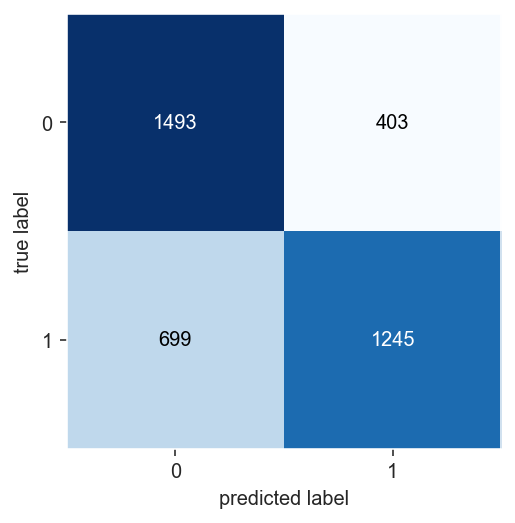

In [558]:
# Acurácia
print(color.BOLD + 'Acurácia do modelo: '  + color.END + str(round(accuracy_score(y_train_comparisons_valid,ada_pred_comparisons),2)))
print(color.BOLD + 'Precision: ' + color.END + str(round(precision_score(y_train_comparisons_valid,ada_pred_comparisons),2)))
print(color.BOLD + 'F1 do modelo: ' + color.END + str(round(f1_score(y_train_comparisons_valid,ada_pred_comparisons),2)))
print(color.BOLD + 'Recall do modelo: ' + color.END + str(round(recall_score(y_train_comparisons_valid,ada_pred_comparisons),2)))
print(color.BOLD + 'AUC ROC: ' + color.END + str(round(roc_auc_score(y_train_comparisons_valid,ada_pred_comparisons),2)))

# Print do relatório de classificação
cr = classification_report(y_train_comparisons_valid,ada_pred_comparisons)
print(color.BOLD + '\nRelatório de Classificação' + color.END)
print(str(cr))

# adicionando resultado na matriz de confusão
cm = confusion_matrix(y_train_comparisons_valid,ada_pred_comparisons)
print(color.BOLD + '\nMatriz de confusão' + color.END)
print(str(cm))
plot_confusion_matrix(cm)

plt.show()

#### Desempenho treino/teste

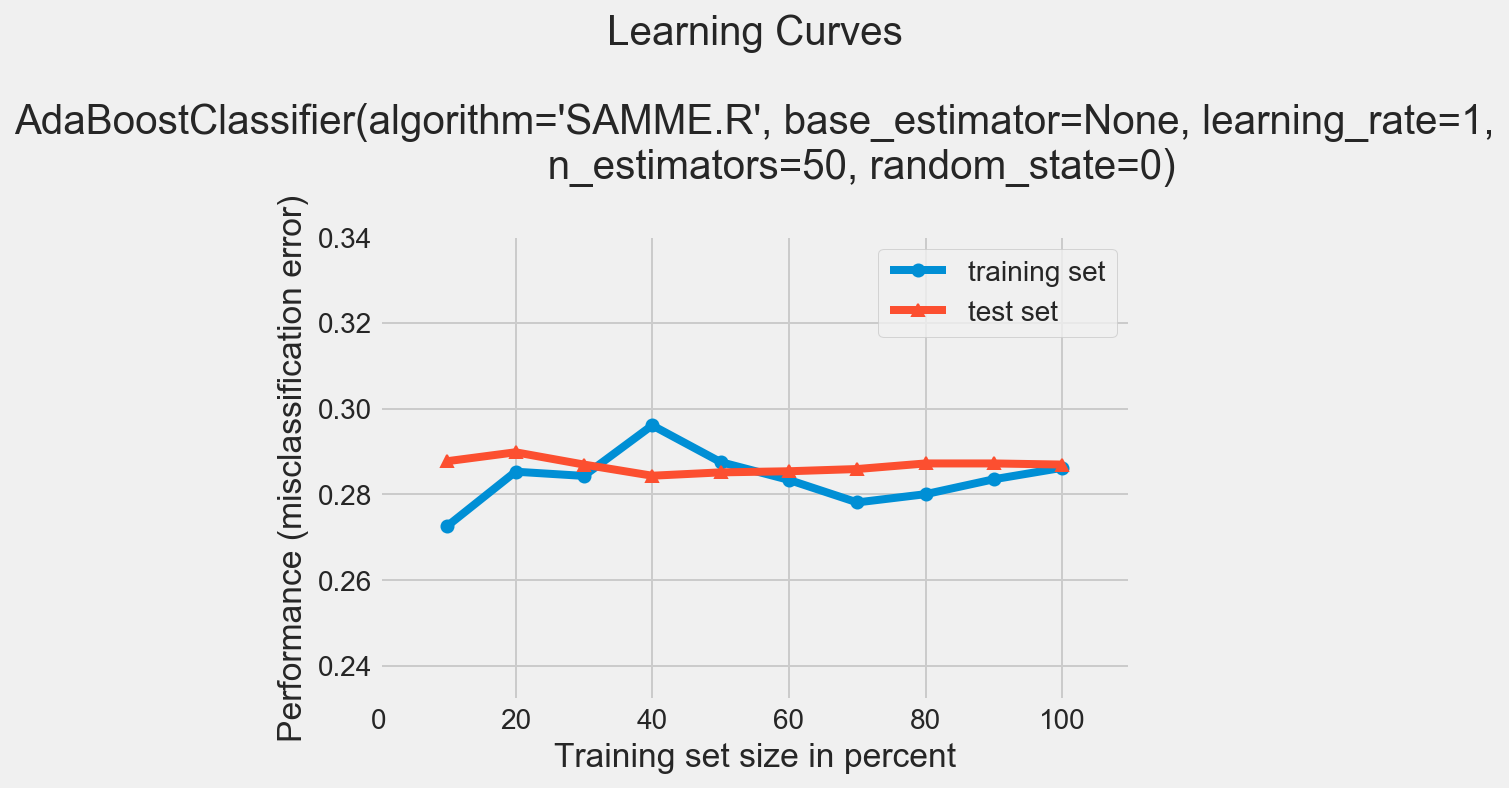

In [559]:

plot_learning_curves(X_comparisons_train_categories_train,y_train_comparisons_train, X_comparisons_train_categories_valid, y_train_comparisons_valid, ada_comparisons)
plt.show()

Após usar todos os dados de treinamento, o modelo está fazendo o mesmo no conjunto de teste e de treinamento - isso significa que não temos overfitting (o modelo generalizou bem). Por outro lado, em termos absolutos, o erro é alto para treinamento e teste. As curvas se achataram muito rapidamente e parece termos aqui underfitting.

#### Predicão do dataset de validação

In [560]:

# Predicão do dataset de validação
test_pred = ada_comparisons.predict(comparisons_tests_categories)
# Dataset para apresentação
previsao = comparisons_tests_categories.index
previsao.columns=['Id']
previsao = pd.DataFrame(previsao)
previsao['Predicted'] = test_pred
previsao.columns=['Id', 'Predicted']
previsao.reset_index()
previsao.set_index(['Id', 'Predicted'])
previsao['Predicted'] = np.where(previsao['Predicted']==1, 'eleito','nao_eleito')
#previsao.head(10)
# Contando a predição
previsao.Predicted.value_counts()

# Predicão do dataset de validação
#test_pred = ada.predict(df_valid)
# Dataset para apresentação
#previsao = teste.sequencial_candidato
#previsao = pd.DataFrame(previsao)
#previsao['Predicted'] = test_pred
#previsao.columns=['Id', 'Predicted']
#previsao.reset_index()
#previsao.set_index(['Id', 'Predicted'])
#previsao['Predicted'] = np.where(previsao['Predicted']==1, 'eleito','nao_eleito')
# Contando a predição
#previsao.Predicted.value_counts()

nao_eleito    752
eleito        310
Name: Predicted, dtype: int64

### MODELO 06 - RandomForestClassifier

In [561]:
# Biblioteca para o modelo
from sklearn.ensemble import RandomForestClassifier

In [562]:

# Criando o modelo
rfc_comparisons = RandomForestClassifier(n_estimators=600)
# Fitando o modelo
rfc_comparisons.fit(X_comparisons_train_categories_train,y_train_comparisons_train)
# Predição
rfc_pred_comparisons = rfc_comparisons.predict(X_comparisons_train_categories_valid)

Acurácia do modelo: 0.7
Precision: 0.71
F1 do modelo: 0.7
Recall do modelo: 0.68
AUC ROC: 0.7

Relatório de Classificação
              precision    recall  f1-score   support

           0       0.69      0.72      0.70      1896
           1       0.71      0.68      0.70      1944

    accuracy                           0.70      3840
   macro avg       0.70      0.70      0.70      3840
weighted avg       0.70      0.70      0.70      3840


Matriz de confusão
[[1364  532]
 [ 623 1321]]


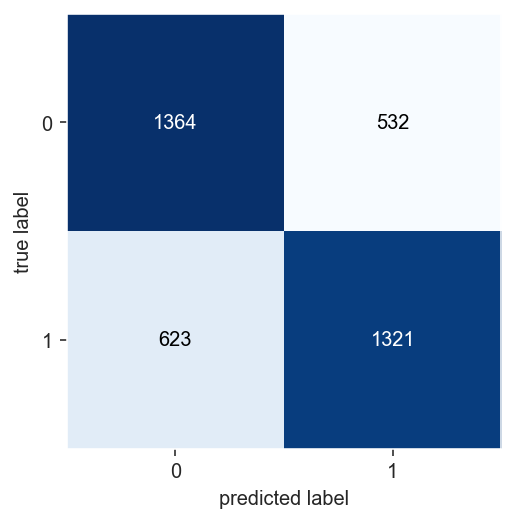

In [563]:
# Acurácia
print(color.BOLD + 'Acurácia do modelo: '  + color.END + str(round(accuracy_score(y_train_comparisons_valid,rfc_pred_comparisons),2)))
print(color.BOLD + 'Precision: ' + color.END + str(round(precision_score(y_train_comparisons_valid,rfc_pred_comparisons),2)))
print(color.BOLD + 'F1 do modelo: ' + color.END + str(round(f1_score(y_train_comparisons_valid,rfc_pred_comparisons),2)))
print(color.BOLD + 'Recall do modelo: ' + color.END + str(round(recall_score(y_train_comparisons_valid,rfc_pred_comparisons),2)))
print(color.BOLD + 'AUC ROC: ' + color.END + str(round(roc_auc_score(y_train_comparisons_valid,rfc_pred_comparisons),2)))

# Print do relatório de classificação
cr = classification_report(y_train_comparisons_valid,rfc_pred_comparisons)
print(color.BOLD + '\nRelatório de Classificação' + color.END)
print(str(cr))

# adicionando resultado na matriz de confusão
cm = confusion_matrix(y_train_comparisons_valid,rfc_pred_comparisons)
print(color.BOLD + '\nMatriz de confusão' + color.END)
print(str(cm))
plot_confusion_matrix(cm)

plt.show()

#### Desempenho treino/teste

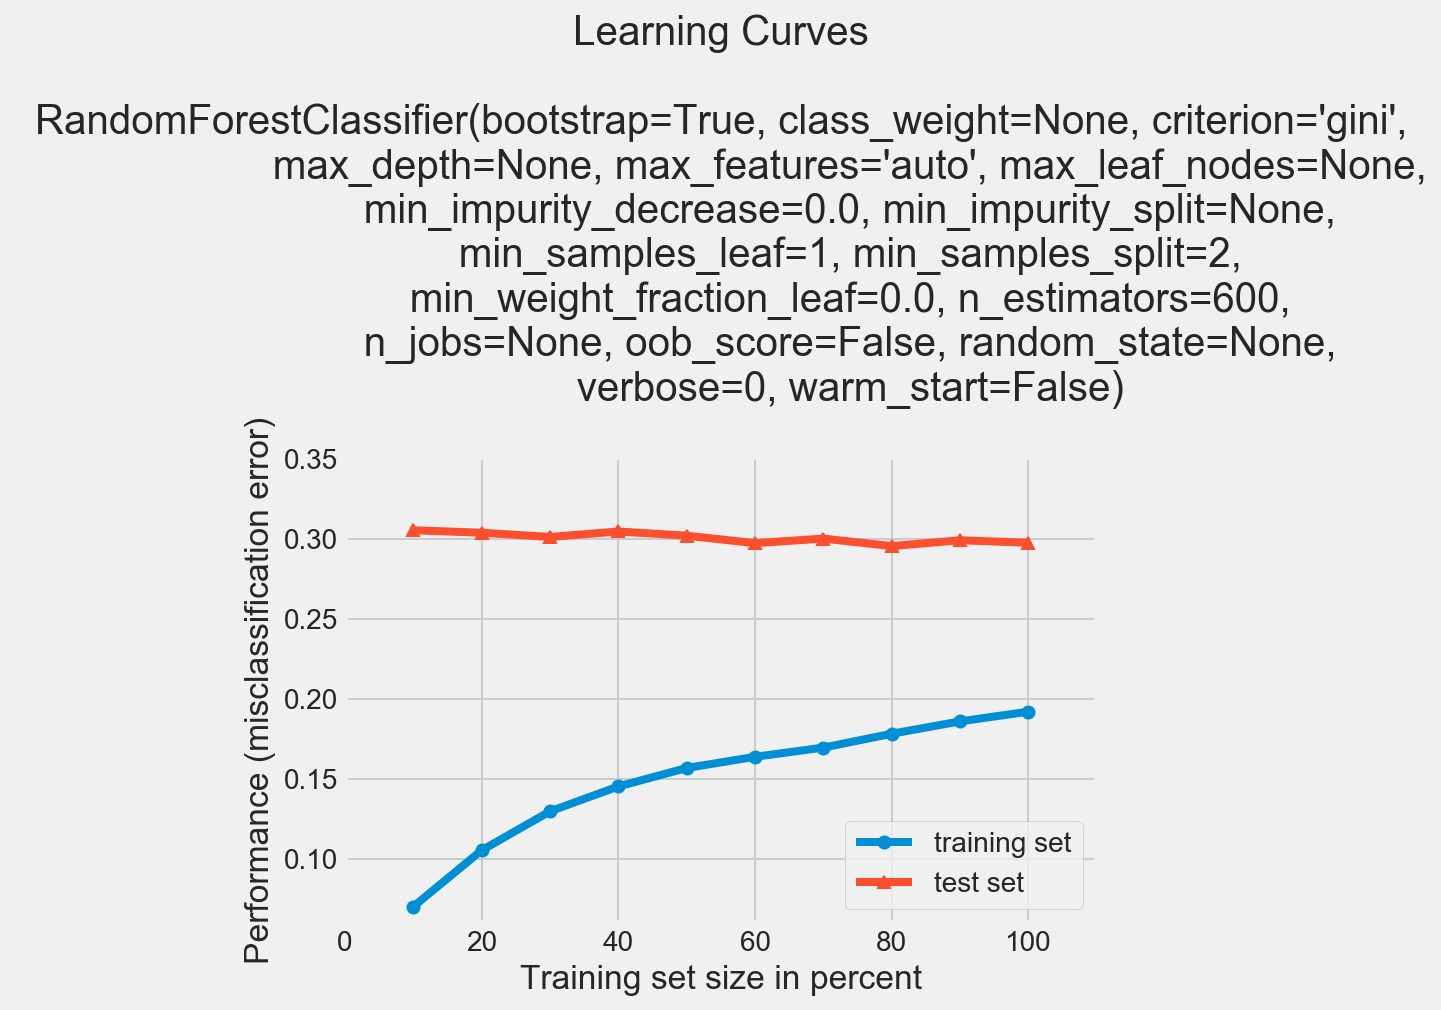

In [564]:

plot_learning_curves(X_comparisons_train_categories_train,y_train_comparisons_train, X_comparisons_train_categories_valid, y_train_comparisons_valid, rfc_comparisons)
plt.show()

Aqui vemos que o erro no conjunto de treinamento começa e permanece extremamente baixo, enquanto o erro no conjunto de teste é grande. Parece que o erro do conjunto de teste está diminuindo lentamente com mais dados. Isso é característico do overfitting, o modelo está capturando exatamente o comportamento dos dados de treinamento, mas, portanto, não está conseguindo generalizar para novos pontos.

#### Predicão do dataset de validação

In [356]:

# Predicão do dataset de validação
test_pred = rfc_comparisons.predict(comparisons_tests_categories)
# Dataset para apresentação
previsao = comparisons_tests_categories.index
previsao.columns=['Id']
previsao = pd.DataFrame(previsao)
previsao['Predicted'] = test_pred
previsao.columns=['Id', 'Predicted']
previsao.reset_index()
previsao.set_index(['Id', 'Predicted'])
previsao['Predicted'] = np.where(previsao['Predicted']==1, 'eleito','nao_eleito')
#previsao.head(10)
# Contando a predição
previsao.Predicted.value_counts()

# Predicão do dataset de validação
#test_pred = rfc.predict(df_valid)
# Dataset para apresentação
#previsao = teste.sequencial_candidato
#previsao = pd.DataFrame(previsao)
#previsao['Predicted'] = test_pred
#previsao.columns=['Id', 'Predicted']
#previsao.reset_index()
#previsao.set_index(['Id', 'Predicted'])
#previsao['Predicted'] = np.where(previsao['Predicted']==1, 'eleito','nao_eleito')
# Contando a predição
#previsao.Predicted.value_counts()

eleito        727
nao_eleito    653
Name: Predicted, dtype: int64

### MODELO 07 - SVM

#### Normalizando os dados com QuantileTransformer

Esse método transforma os recursos para seguir uma distribuição uniforme ou normal. Portanto, para um determinado recurso, essa transformação tende a distribuir os valores mais frequentes. Também reduz o impacto de outliers (marginais): este é, portanto, um esquema robusto de pré-processamento.

In [565]:
X_train_comparisons_Xqt = pd.get_dummies(comparisons_train_cleaned[['shape_theLess', 'material_theLess', 'surface_theLess', 'color_theLess', 
                                          'constitution_theLess', 'shape_theMost', 'material_theMost', 'surface_theMost', 'color_theMost', 
                                          'constitution_theMost']], drop_first=False)

In [566]:
from sklearn.preprocessing import QuantileTransformer
# Dimensionando
scaler = QuantileTransformer()
Xqt = X_train_comparisons_Xqt#X_comparisons
Xqt = scaler.fit_transform(Xqt)

#X_comparisons_train_categories_valid
#X_comparisons_train_categories_train
#comparisons_tests_categories


#X_train_comparisons_train, X_train_comparisons_valid, y_train_comparisons_train, y_train_comparisons_valid = train_test_split(comparisons_train_cleaned.drop(['result'], axis=1,inplace=False), np.where(comparisons_train_cleaned['result']==True, 1,0), test_size=0.30,random_state=101)

#### Dividindo os dados em um conjunto de treinamento e conjunto de testes.

In [567]:
# Dividindo os dados em um conjunto de treinamento e conjunto de testes.
from sklearn.model_selection import train_test_split

#X_train_comparisons_train, X_train_comparisons_valid, y_train_comparisons_train, y_train_comparisons_valid = train_test_split(Xqt, y_train_comparisons, test_size=0.30,random_state=101)
X_train_comparisons_train_Xqt, X_train_comparisons_valid_Xqt, y_train_comparisons_train_Xqt, y_train_comparisons_valid_Xqt = train_test_split(Xqt, np.where(comparisons_train_cleaned['result']==True, 1,0), test_size=0.30,random_state=101)

#X_comparisons_train, X_comparisons_test, y_comparisons_train, y_comparisons_test = train_test_split(Xqt,y_comparisons,test_size=0.30)

In [568]:
# Dividindo os dados em um conjunto de treinamento e conjunto de testes.
from sklearn.model_selection import train_test_split
#X_comparisons_train, X_comparisons_test, y_comparisons_train, y_comparisons_test = train_test_split(X_comparisons,y_comparisons,test_size=0.30)

In [569]:
# Biblioteca para o modelo
from sklearn.svm import SVC

In [570]:

# Criando o modelo
svm = SVC(gamma='scale')
# Fitando o modelo
svm.fit(X_train_comparisons_train_Xqt,y_train_comparisons_train_Xqt)
# Predição
svm_pred = svm.predict(X_train_comparisons_valid_Xqt)

Acurácia do modelo: 0.72
Precision: 0.75
F1 do modelo: 0.71
Recall do modelo: 0.68
AUC ROC: 0.72

Relatório de Classificação
              precision    recall  f1-score   support

           0       0.70      0.77      0.73      1896
           1       0.75      0.68      0.71      1944

    accuracy                           0.72      3840
   macro avg       0.73      0.72      0.72      3840
weighted avg       0.73      0.72      0.72      3840


Matriz de confusão
[[1460  436]
 [ 626 1318]]


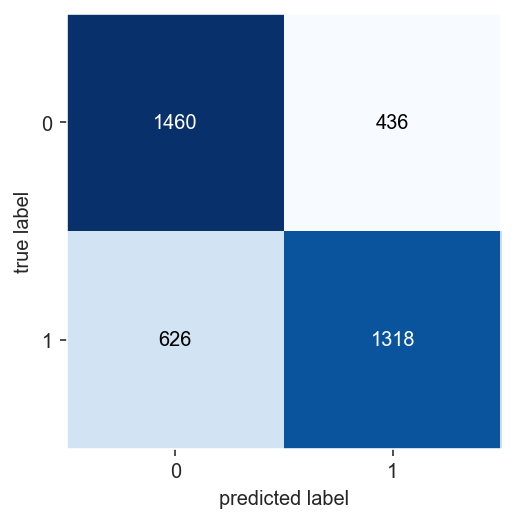

In [571]:
# Acurácia
print(color.BOLD + 'Acurácia do modelo: '  + color.END + str(round(accuracy_score(y_train_comparisons_valid_Xqt,svm_pred),2)))
print(color.BOLD + 'Precision: ' + color.END + str(round(precision_score(y_train_comparisons_valid_Xqt,svm_pred),2)))
print(color.BOLD + 'F1 do modelo: ' + color.END + str(round(f1_score(y_train_comparisons_valid_Xqt,svm_pred),2)))
print(color.BOLD + 'Recall do modelo: ' + color.END + str(round(recall_score(y_train_comparisons_valid_Xqt,svm_pred),2)))
print(color.BOLD + 'AUC ROC: ' + color.END + str(round(roc_auc_score(y_train_comparisons_valid_Xqt,svm_pred),2)))

# Print do relatório de classificação
cr = classification_report(y_train_comparisons_valid_Xqt,svm_pred)
print(color.BOLD + '\nRelatório de Classificação' + color.END)
print(str(cr))

# adicionando resultado na matriz de confusão
cm = confusion_matrix(y_train_comparisons_valid_Xqt,svm_pred)
print(color.BOLD + '\nMatriz de confusão' + color.END)
print(str(cm))
plot_confusion_matrix(cm)

plt.show()

#### Desempenho treino/teste

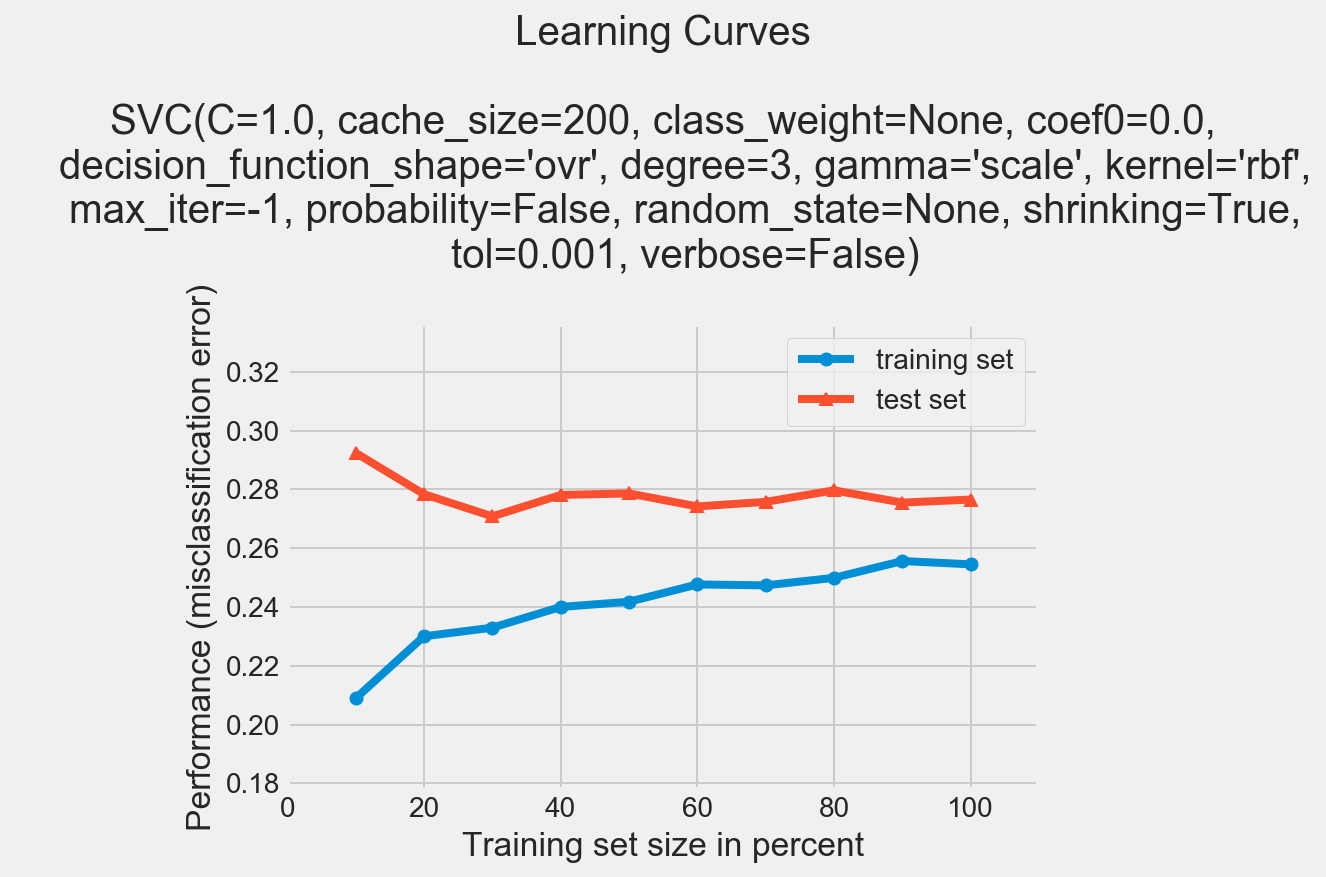

In [572]:

plot_learning_curves(X_train_comparisons_train_Xqt,y_train_comparisons_train_Xqt, X_train_comparisons_valid_Xqt, y_train_comparisons_valid_Xqt, svm)
plt.show()

O modelo apresenta um comportamento parecido para os dados de treinamento e teste. Seria necessário mais dados de treinamento.

#### Encontrando parâmetro para otimizar o modelo com Gridsearch

O GridSearchCV usa um dicionário que descreve os parâmetros que devem ser testados e um modelo para treinar. A grade de parâmetros é definida como um dicionário, onde as chaves são os parâmetros e os valores são as configurações a serem testadas.

In [573]:
param_grid = {'C': [0.01, 0.1, 1, 10, 100, 500], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 

In [574]:
from sklearn.model_selection import GridSearchCV

In [575]:

grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=0)
grid.fit(X_train_comparisons_train_Xqt,y_train_comparisons_train_Xqt)

c:\users\tclem\anaconda3\envs\consensus\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 500],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [576]:
grid.best_params_

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}

In [577]:
grid.best_estimator_

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

Re-executando as previsões neste objeto da grade

In [578]:
grid_pred = grid.predict(X_train_comparisons_valid_Xqt)

Acurácia do modelo: 0.72
Precision: 0.75
F1 do modelo: 0.72
Recall do modelo: 0.69
AUC ROC: 0.73

Relatório de Classificação
              precision    recall  f1-score   support

           0       0.71      0.76      0.73      1896
           1       0.75      0.69      0.72      1944

    accuracy                           0.73      3840
   macro avg       0.73      0.73      0.72      3840
weighted avg       0.73      0.72      0.72      3840


Matriz de confusão
[[1438  458]
 [ 598 1346]]


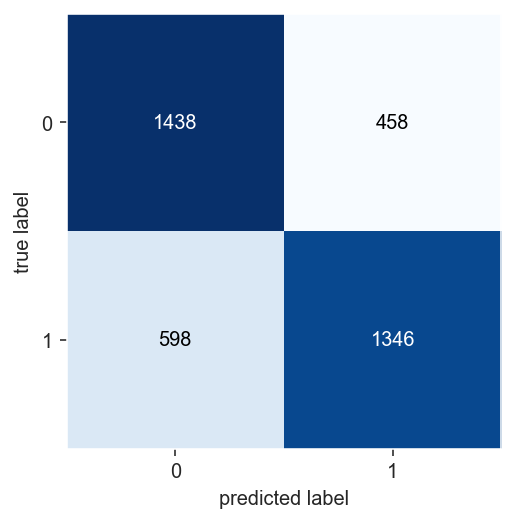

In [579]:
# Acurácia
print(color.BOLD + 'Acurácia do modelo: '  + color.END + str(round(accuracy_score(y_train_comparisons_valid_Xqt,grid_pred),2)))
print(color.BOLD + 'Precision: ' + color.END + str(round(precision_score(y_train_comparisons_valid_Xqt,grid_pred),2)))
print(color.BOLD + 'F1 do modelo: ' + color.END + str(round(f1_score(y_train_comparisons_valid_Xqt,grid_pred),2)))
print(color.BOLD + 'Recall do modelo: ' + color.END + str(round(recall_score(y_train_comparisons_valid_Xqt,grid_pred),2)))
print(color.BOLD + 'AUC ROC: ' + color.END + str(round(roc_auc_score(y_train_comparisons_valid_Xqt,grid_pred),2)))

# Print do relatório de classificação
cr = classification_report(y_train_comparisons_valid_Xqt,grid_pred)
print(color.BOLD + '\nRelatório de Classificação' + color.END)
print(str(cr))

# adicionando resultado na matriz de confusão
cm = confusion_matrix(y_train_comparisons_valid_Xqt,grid_pred)
print(color.BOLD + '\nMatriz de confusão' + color.END)
print(str(cm))
plot_confusion_matrix(cm)

plt.show()

In [580]:
# Predicão do dataset de validação
test_pred = grid.predict(comparisons_tests_categories)
# Dataset para apresentação
previsao = comparisons_tests_categories.index
previsao.columns=['Id']
previsao = pd.DataFrame(previsao)
previsao['Predicted'] = test_pred
previsao.columns=['Id', 'Predicted']
previsao.reset_index()
previsao.set_index(['Id', 'Predicted'])
previsao['Predicted'] = np.where(previsao['Predicted']==1, 'eleito','nao_eleito')
#previsao.head(10)
# Contando a predição
previsao.Predicted.value_counts()


# Predicão do dataset de validação
#test_pred = grid.predict(XrbT)
# Dataset para apresentação
#previsao = teste.sequencial_candidato
#previsao = pd.DataFrame(previsao)
#previsao['Predicted'] = test_pred
#previsao.columns=['Id', 'Predicted']
#previsao.reset_index()
#previsao.set_index(['Id', 'Predicted'])
#previsao['Predicted'] = np.where(previsao['Predicted']==1, 'eleito','nao_eleito')
# Contando a predição
#previsao.Predicted.value_counts()

nao_eleito    605
eleito        457
Name: Predicted, dtype: int64

### MODELO 08 - GradientBoosting

In [581]:
from sklearn.model_selection import train_test_split
X_train_comparisons_train, X_train_comparisons_valid, y_train_comparisons_train, y_train_comparisons_valid = train_test_split(X_train_comparisons, y_train_comparisons, test_size=0.30, random_state=101)

NameError: name 'X_train_comparisons' is not defined

In [611]:
from sklearn.ensemble import GradientBoostingClassifier

In [612]:
gb = GradientBoostingClassifier(learning_rate=0.05, n_estimators=100,max_depth=9, min_samples_split=6, 
                                min_samples_leaf=20, subsample=.7,max_features=17, random_state=seed)

In [613]:
#gb = GradientBoostingClassifier(learning_rate=0.05, n_estimators=100,max_depth=9, min_samples_split=6, 
#                                min_samples_leaf=20, subsample=.7,max_features=14, random_state=seed)GridSearchCV(cv='warn', error_score='raise-deprecating',
             
gb = GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.01, loss='deviance', max_depth=4,
                           max_features=6, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=6,
                           min_weight_fraction_leaf=0.0, n_estimators=50,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=0.75, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)





In [614]:
gb.fit(X_comparisons_train_categories_train,y_train_comparisons_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.01, loss='deviance', max_depth=4,
                           max_features=6, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=6,
                           min_weight_fraction_leaf=0.0, n_estimators=50,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=0.75, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [615]:
gb_pred = gb.predict(X_comparisons_train_categories_valid)

Acurácia do modelo: 0.72
Precision: 0.78
F1 do modelo: 0.69
Recall do modelo: 0.62
AUC ROC: 0.72

Relatório de Classificação
              precision    recall  f1-score   support

           0       0.68      0.82      0.74      1896
           1       0.78      0.62      0.69      1944

    accuracy                           0.72      3840
   macro avg       0.73      0.72      0.72      3840
weighted avg       0.73      0.72      0.72      3840


Matriz de confusão
[[1549  347]
 [ 730 1214]]


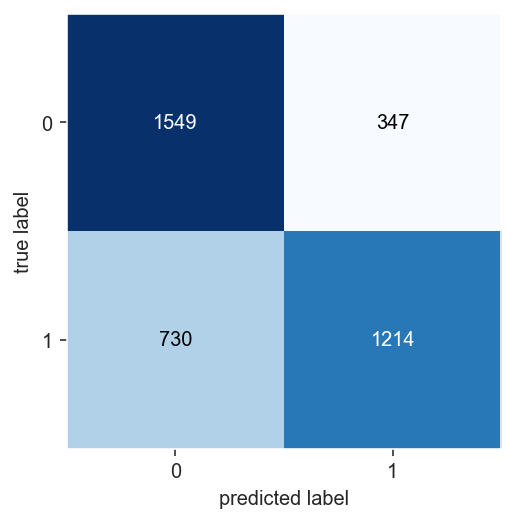

In [616]:
# Acurácia
print(color.BOLD + 'Acurácia do modelo: '  + color.END + str(round(accuracy_score(y_train_comparisons_valid,gb_pred),2)))
print(color.BOLD + 'Precision: ' + color.END + str(round(precision_score(y_train_comparisons_valid,gb_pred),2)))
print(color.BOLD + 'F1 do modelo: ' + color.END + str(round(f1_score(y_train_comparisons_valid,gb_pred),2)))
print(color.BOLD + 'Recall do modelo: ' + color.END + str(round(recall_score(y_train_comparisons_valid,gb_pred),2)))
print(color.BOLD + 'AUC ROC: ' + color.END + str(round(roc_auc_score(y_train_comparisons_valid,gb_pred),2)))

# Print do relatório de classificação
cr = classification_report(y_train_comparisons_valid,gb_pred)
print(color.BOLD + '\nRelatório de Classificação' + color.END)
print(str(cr))

# adicionando resultado na matriz de confusão
cm = confusion_matrix(y_train_comparisons_valid,gb_pred)
print(color.BOLD + '\nMatriz de confusão' + color.END)
print(str(cm))
plot_confusion_matrix(cm)

plt.show()

#### Desempenho treino/teste

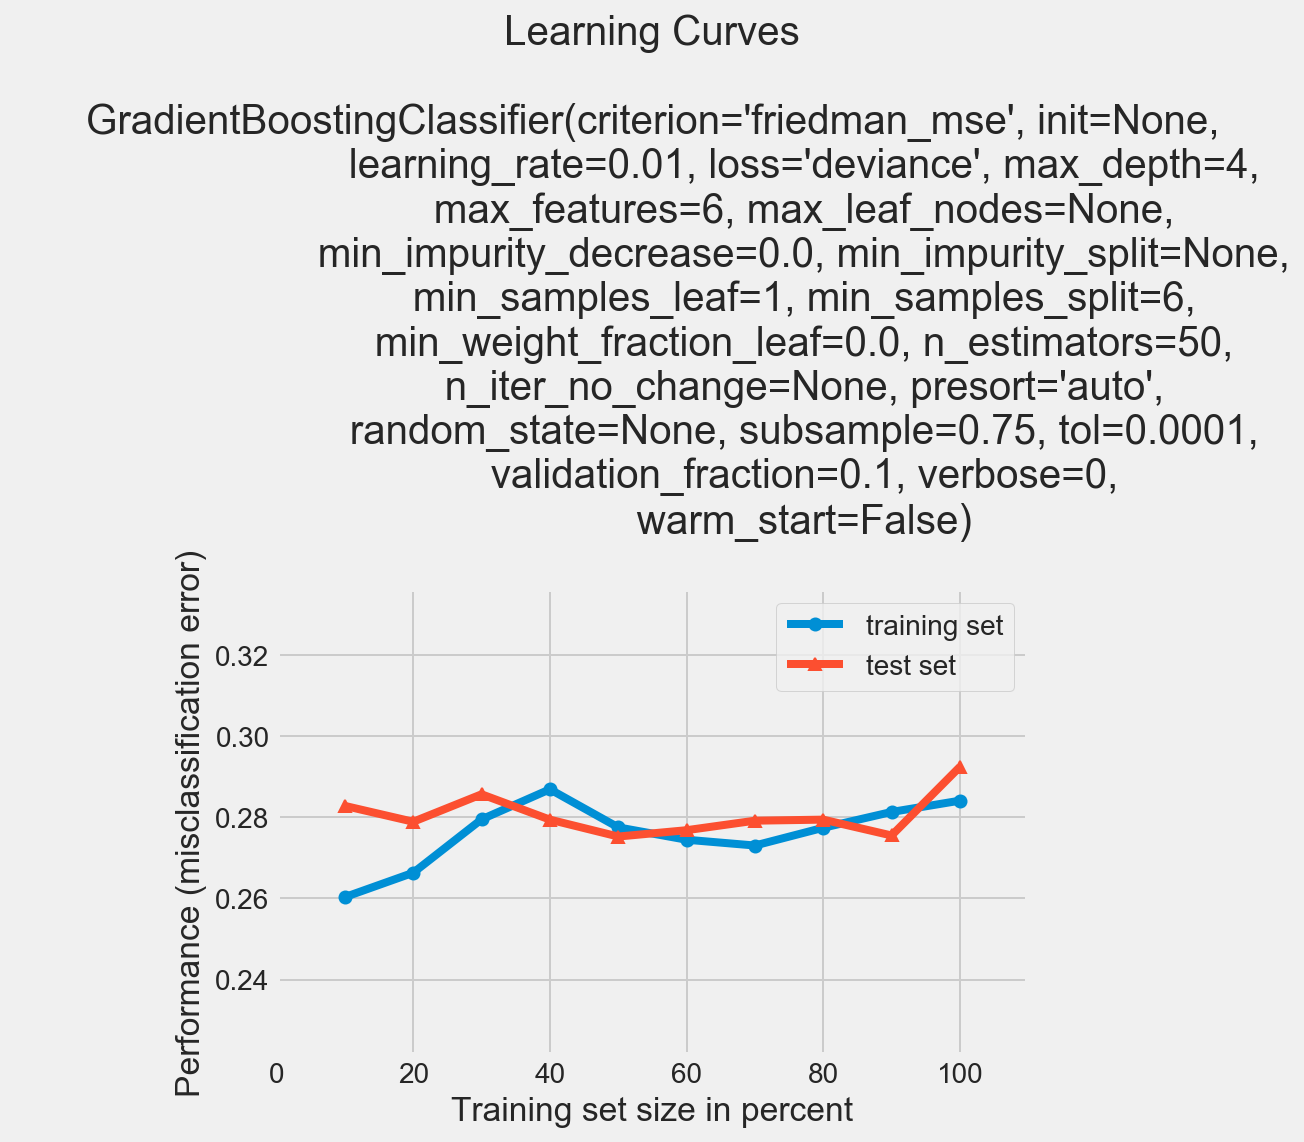

In [588]:
plot_learning_curves(X_comparisons_train_categories_train,y_train_comparisons_train, X_comparisons_train_categories_valid, y_train_comparisons_valid, gb)
plt.show()


Uma curva de aprendizado mostra como o erro muda conforme o tamanho do conjunto de treinamento aumenta. 
Percebemos que a curva de erro vai diminuíndo conforme o tamanho do conjunto de treinamento aumenta.
As curvas não convergiram pois, provavelmente, precisa-se de mais instâncias de treino.
Vemos que que temos um *baixo vies*, pois temos baixo erro no treinamento e uma alta variância devido ao intervalo longo entre as duas curvas.

#### Importância dos atributos

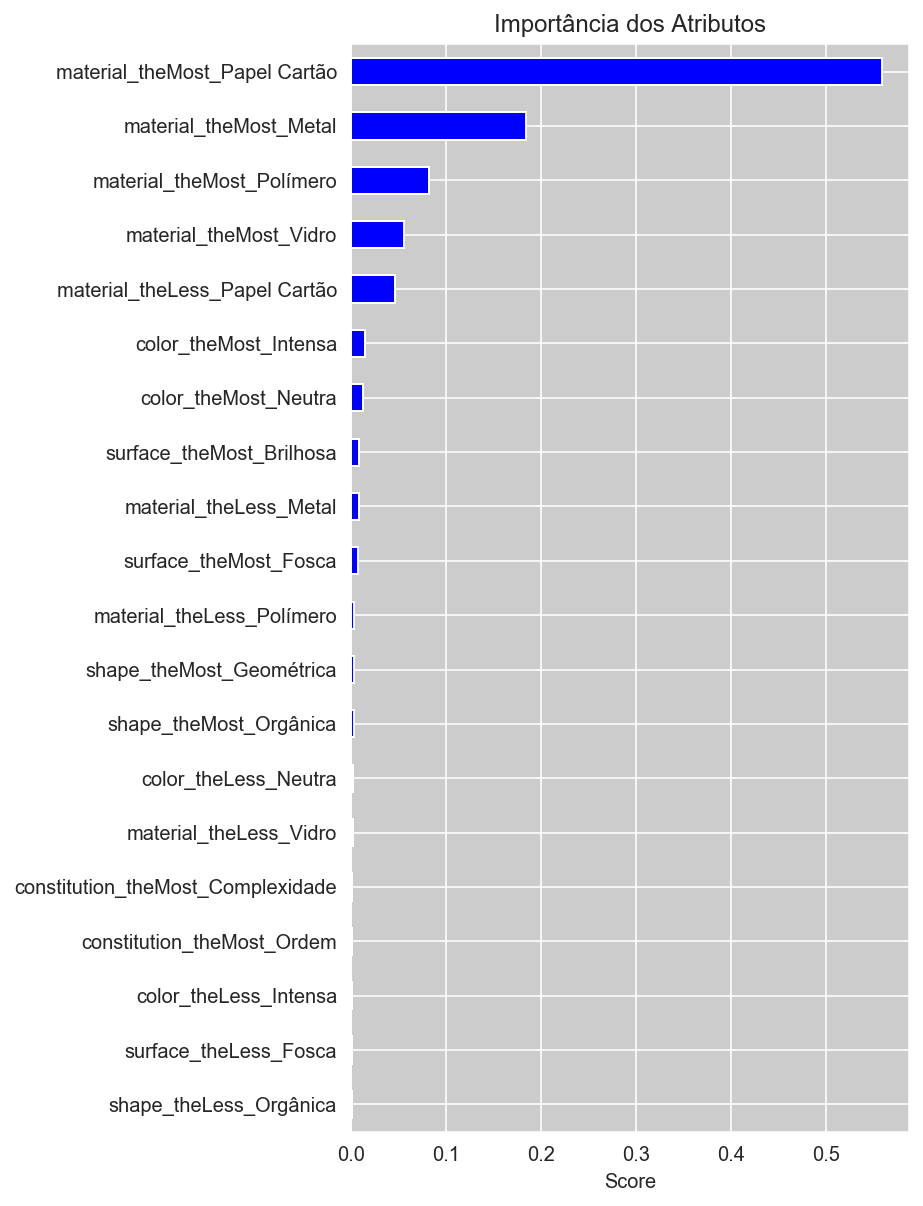

In [589]:
preditores=list(X_comparisons_train_categories_train)
feat_imp = pd.Series(gb.feature_importances_, preditores).sort_values(ascending=False)
# plot
plt.subplots(figsize=(5, 10))                       
feat_imp.head(20).plot(kind='barh', title='Importância dos Atributos', color='blue')
plt.xlabel('Score')
plt.gca().invert_yaxis()


In [590]:
# Predicão do dataset de validação
test_pred = gb.predict(comparisons_tests_categories)
# Dataset para apresentação
previsao = comparisons_tests_categories.index
previsao.columns=['Id']
previsao = pd.DataFrame(previsao)
previsao['Predicted'] = test_pred
previsao.columns=['Id', 'Predicted']
previsao.reset_index()
previsao.set_index(['Id', 'Predicted'])
previsao['Predicted'] = np.where(previsao['Predicted']==1, 'eleito','nao_eleito')
#previsao.head(10)
# Contando a predição
previsao.Predicted.value_counts()

# Predicão do dataset de validação
#test_pred = gb.predict(df_valid)
# Dataset para apresentação
#previsao = teste.sequencial_candidato
#previsao = pd.DataFrame(previsao)
#previsao['Predicted'] = test_pred
#previsao.columns=['Id', 'Predicted']
#previsao.reset_index()
#previsao.set_index(['Id', 'Predicted'])
#previsao['Predicted'] = np.where(previsao['Predicted']==1, 'eleito','nao_eleito')
# Contando a predição
#previsao.Predicted.value_counts()

nao_eleito    861
eleito        201
Name: Predicted, dtype: int64

### MODELO 09 - Ensemble  BaggingClassifier

In [603]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import model_selection

In [604]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_comparisons, y_comparisons, test_size=0.30, random_state=seed)

NameError: name 'X_comparisons' is not defined

In [605]:
kfold = model_selection.KFold(n_splits=10, random_state=seed)


gb = GradientBoostingClassifier(learning_rate=0.01, n_estimators=50,max_depth=2, min_samples_split=100, 
                                      min_samples_leaf=1, subsample=0.75,max_features=2, random_state=10)
#gb = GradientBoostingClassifier(learning_rate=0.01, n_estimators=500,max_depth=2, min_samples_split=20, 
#                                      min_samples_leaf=7, subsample=0.9,max_features=7, random_state=10)

num_trees = 100

ens = BaggingClassifier(base_estimator=gb, n_estimators=num_trees, random_state=seed)

In [606]:
# Fitando o modelo
ens.fit(X_comparisons_train_categories_train, y_train_comparisons_train)


BaggingClassifier(base_estimator=GradientBoostingClassifier(criterion='friedman_mse',
                                                            init=None,
                                                            learning_rate=0.01,
                                                            loss='deviance',
                                                            max_depth=2,
                                                            max_features=2,
                                                            max_leaf_nodes=None,
                                                            min_impurity_decrease=0.0,
                                                            min_impurity_split=None,
                                                            min_samples_leaf=1,
                                                            min_samples_split=100,
                                                            min_weight_fraction_leaf=0.0,
                               

In [609]:
# Predições
ens_pred = ens.predict(X_comparisons_train_categories_valid)

Acurácia do modelo: 0.71
Precision: 0.78
F1 do modelo: 0.67
Recall do modelo: 0.58
AUC ROC: 0.71

Relatório de Classificação
              precision    recall  f1-score   support

           0       0.66      0.83      0.74      1896
           1       0.78      0.58      0.67      1944

    accuracy                           0.71      3840
   macro avg       0.72      0.71      0.70      3840
weighted avg       0.72      0.71      0.70      3840


Matriz de confusão
[[1583  313]
 [ 810 1134]]


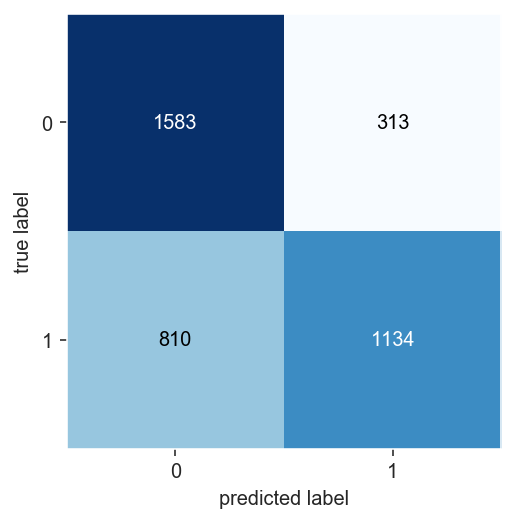

In [610]:
# Acurácia
print(color.BOLD + 'Acurácia do modelo: '  + color.END + str(round(accuracy_score(y_train_comparisons_valid,ens_pred),2)))
print(color.BOLD + 'Precision: ' + color.END + str(round(precision_score(y_train_comparisons_valid,ens_pred),2)))
print(color.BOLD + 'F1 do modelo: ' + color.END + str(round(f1_score(y_train_comparisons_valid,ens_pred),2)))
print(color.BOLD + 'Recall do modelo: ' + color.END + str(round(recall_score(y_train_comparisons_valid,ens_pred),2)))
print(color.BOLD + 'AUC ROC: ' + color.END + str(round(roc_auc_score(y_train_comparisons_valid,ens_pred),2)))

# Print do relatório de classificação
cr = classification_report(y_train_comparisons_valid,ens_pred)
print(color.BOLD + '\nRelatório de Classificação' + color.END)
print(str(cr))

# adicionando resultado na matriz de confusão
cm = confusion_matrix(y_train_comparisons_valid,ens_pred)
print(color.BOLD + '\nMatriz de confusão' + color.END)
print(str(cm))
plot_confusion_matrix(cm)

plt.show()

#### Desempenho treino/teste

In [127]:
plot_learning_curves(X_comparisons_train_categories_train,y_train_comparisons_train, X_comparisons_train_categories_valid, y_train_comparisons_valid, ens)
plt.show()

C:\Users\tclem\Anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:608: RuntimeWarning: divide by zero encountered in double_scalars
  return (-2 / sample_weight.sum() * np.sum(
C:\Users\tclem\Anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:610: RuntimeWarning: invalid value encountered in double_scalars
  np.logaddexp(0, raw_predictions))))
C:\Users\tclem\Anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:608: RuntimeWarning: divide by zero encountered in double_scalars
  return (-2 / sample_weight.sum() * np.sum(
C:\Users\tclem\Anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:610: RuntimeWarning: invalid value encountered in double_scalars
  np.logaddexp(0, raw_predictions))))
C:\Users\tclem\Anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:608: RuntimeWarning: divide by zero encountered in double_scalars
  return (-2 / sample_weight.sum() * np.sum(
C:\Users\tclem\Anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:610: RuntimeWarni

ValueError: y contains 1 class after sample_weight trimmed classes with zero weights, while a minimum of 2 classes are required.

O  modelo parece ter generalizado bem, mas com o aumento do tamanho do conjunto de treinamento vemos que o erro, mesmo sendo baixo, vai crescendo.

#### Predicão do dataset de validação

In [128]:
# Predicão do dataset de validação
test_pred = ens.predict(comparisons_tests_categories)
# Dataset para apresentação
previsao = comparisons_tests_categories.index
previsao.columns=['Id']
previsao = pd.DataFrame(previsao)
previsao['Predicted'] = test_pred
previsao.columns=['Id', 'Predicted']
previsao.reset_index()
previsao.set_index(['Id', 'Predicted'])
previsao['Predicted'] = np.where(previsao['Predicted']==1, 'eleito','nao_eleito')
#previsao.head(10)
# Contando a predição
previsao.Predicted.value_counts()

# Predicão do dataset de validação
#test_pred = ens.predict(df_valid)
# Dataset para apresentação
#previsao = teste.sequencial_candidato
#previsao = pd.DataFrame(previsao)
#previsao['Predicted'] = test_pred
#previsao.columns=['Id', 'Predicted']
#previsao.reset_index()
#previsao.set_index(['Id', 'Predicted'])
#previsao['Predicted'] = np.where(previsao['Predicted']==1, 'eleito','nao_eleito')
# Salvando dataset
#previsao.to_csv('predicoes/predicted_ens_tunning.csv', index=False)
# Contando a predição
#previsao.Predicted.value_counts()

nao_eleito    36
Name: Predicted, dtype: int64

#### OBSERVAÇÕES

Os parâmetros utilizados no GradientBoostingClassifier foram obtidos entre as melhores combinações feitas através do GridSearch que foi interrompido devido ao tempo que levaria para finalizar.
Entres as combinações a com melhor score foi:

[CV]  learning_rate=0.01, max_depth=2, max_features=7, min_samples_leaf=7, min_samples_split=20, n_estimators=500, subsample=0.9, score=0.9251968503937008, total=   0.7s

##### Parâmetros utilizados no GridSearch
    param_grid = {'learning_rate':[0.01,0.05,0.1], 'n_estimators':[50,100,250,500],
              'max_depth':[2,3,4,5,7,9], 'min_samples_split':[2,4,6,8,10,20,40,60,100], 
              'min_samples_leaf':[1,3,5,7,9],'subsample':[0.7,0.75,0.8,0.85,0.9,0.95,1],
             'max_features':[2,3,4,5,6,7]} 
             
             
###### GridSearch

    from sklearn.model_selection import GridSearchCV
    grid = GridSearchCV(GradientBoostingClassifier(),param_grid,refit=True,verbose=3)
    grid.fit(X_train,y_train)

In [388]:
param_grid = {'learning_rate':[0.01,0.05,0.1], 'n_estimators':[50,100,250,500],
              'max_depth':[2,3,4,5,7,9], 'min_samples_split':[2,4,6,8,10,20,40,60,100], 
              'min_samples_leaf':[1,3,5,7,9],'subsample':[0.7,0.75,0.8,0.85,0.9,0.95,1],
              'max_features':[2,3,4,5,6,7]} 

In [389]:
from sklearn.model_selection import GridSearchCV


grid = GridSearchCV(GradientBoostingClassifier(),param_grid,refit=True,verbose=3)
grid.fit(X_comparisons_train_categories_train,y_train_comparisons_train)

c:\users\tclem\anaconda3\envs\consensus\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 136080 candidates, totalling 408240 fits
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=1, min_samples_split=2, n_estimators=50, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=1, min_samples_split=2, n_estimators=50, subsample=0.7, score=0.704, total=   0.1s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=1, min_samples_split=2, n_estimators=50, subsample=0.7 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=1, min_samples_split=2, n_estimators=50, subsample=0.7, score=0.687, total=   0.1s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=1, min_samples_split=2, n_estimators=50, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=1, min_samples_split=2, n_estimators=50, subsample=0.7, score=0.691, total=   0.1s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=1, min_samples_split=2, n_estimators=50, subsample=0.75 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=1, min_samples_split=2, n_estimators=50, subsample=0.75, score=0.697, total=   0.1s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=1, min_samples_split=2, n_estimators=50, subsample=0.75 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=1, min_samples_split=2, n_estimators=50, subsample=0.75, score=0.704, total=   

[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=1, min_samples_split=2, n_estimators=100, subsample=0.85, score=0.699, total=   0.2s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=1, min_samples_split=2, n_estimators=100, subsample=0.85 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=1, min_samples_split=2, n_estimators=100, subsample=0.85, score=0.697, total=   0.2s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=1, min_samples_split=2, n_estimators=100, subsample=0.9 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=1, min_samples_split=2, n_estimators=100, subsample=0.9, score=0.705, total=   0.2s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=1, min_samples_split=2, n_estimators=100, subsample=0.9 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=1, min_samples_split=2, n_estimators=100, subsample=0.9, score=0.705, tot

[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=1, min_samples_split=2, n_estimators=250, subsample=1, score=0.708, total=   0.4s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=1, min_samples_split=2, n_estimators=250, subsample=1 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=1, min_samples_split=2, n_estimators=250, subsample=1, score=0.698, total=   0.3s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=1, min_samples_split=2, n_estimators=250, subsample=1 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=1, min_samples_split=2, n_estimators=250, subsample=1, score=0.696, total=   0.4s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=1, min_samples_split=2, n_estimators=500, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=1, min_samples_split=2, n_estimators=500, subsample=0.7, score=0.705, total=   1.0s
[C

[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=1, min_samples_split=4, n_estimators=50, subsample=0.75, score=0.684, total=   0.1s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=1, min_samples_split=4, n_estimators=50, subsample=0.8 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=1, min_samples_split=4, n_estimators=50, subsample=0.8, score=0.706, total=   0.1s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=1, min_samples_split=4, n_estimators=50, subsample=0.8 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=1, min_samples_split=4, n_estimators=50, subsample=0.8, score=0.698, total=   0.1s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=1, min_samples_split=4, n_estimators=50, subsample=0.8 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=1, min_samples_split=4, n_estimators=50, subsample=0.8, score=0.682, total=   0.1

[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=1, min_samples_split=4, n_estimators=100, subsample=0.9, score=0.698, total=   0.2s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=1, min_samples_split=4, n_estimators=100, subsample=0.95 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=1, min_samples_split=4, n_estimators=100, subsample=0.95, score=0.712, total=   0.2s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=1, min_samples_split=4, n_estimators=100, subsample=0.95 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=1, min_samples_split=4, n_estimators=100, subsample=0.95, score=0.701, total=   0.2s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=1, min_samples_split=4, n_estimators=100, subsample=0.95 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=1, min_samples_split=4, n_estimators=100, subsample=0.95, score=0.692, 

[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=1, min_samples_split=4, n_estimators=500, subsample=0.7, score=0.705, total=   1.0s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=1, min_samples_split=4, n_estimators=500, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=1, min_samples_split=4, n_estimators=500, subsample=0.7, score=0.698, total=   1.0s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=1, min_samples_split=4, n_estimators=500, subsample=0.75 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=1, min_samples_split=4, n_estimators=500, subsample=0.75, score=0.704, total=   1.0s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=1, min_samples_split=4, n_estimators=500, subsample=0.75 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=1, min_samples_split=4, n_estimators=500, subsample=0.75, score=0.703, to

[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=1, min_samples_split=6, n_estimators=50, subsample=0.85, score=0.700, total=   0.1s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=1, min_samples_split=6, n_estimators=50, subsample=0.85 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=1, min_samples_split=6, n_estimators=50, subsample=0.85, score=0.695, total=   0.1s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=1, min_samples_split=6, n_estimators=50, subsample=0.9 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=1, min_samples_split=6, n_estimators=50, subsample=0.9, score=0.705, total=   0.1s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=1, min_samples_split=6, n_estimators=50, subsample=0.9 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=1, min_samples_split=6, n_estimators=50, subsample=0.9, score=0.710, total=   0

[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=1, min_samples_split=6, n_estimators=100, subsample=1, score=0.706, total=   0.2s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=1, min_samples_split=6, n_estimators=100, subsample=1 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=1, min_samples_split=6, n_estimators=100, subsample=1, score=0.690, total=   0.2s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=1, min_samples_split=6, n_estimators=250, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=1, min_samples_split=6, n_estimators=250, subsample=0.7, score=0.703, total=   0.6s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=1, min_samples_split=6, n_estimators=250, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=1, min_samples_split=6, n_estimators=250, subsample=0.7, score=0.704, total=   0.6

[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=1, min_samples_split=6, n_estimators=500, subsample=0.8, score=0.707, total=   2.5s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=1, min_samples_split=6, n_estimators=500, subsample=0.8 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=1, min_samples_split=6, n_estimators=500, subsample=0.8, score=0.705, total=   2.7s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=1, min_samples_split=6, n_estimators=500, subsample=0.8 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=1, min_samples_split=6, n_estimators=500, subsample=0.8, score=0.699, total=   2.5s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=1, min_samples_split=6, n_estimators=500, subsample=0.85 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=1, min_samples_split=6, n_estimators=500, subsample=0.85, score=0.705, tota

[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=1, min_samples_split=8, n_estimators=50, subsample=0.9, score=0.689, total=   0.3s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=1, min_samples_split=8, n_estimators=50, subsample=0.95 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=1, min_samples_split=8, n_estimators=50, subsample=0.95, score=0.704, total=   0.3s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=1, min_samples_split=8, n_estimators=50, subsample=0.95 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=1, min_samples_split=8, n_estimators=50, subsample=0.95, score=0.694, total=   0.2s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=1, min_samples_split=8, n_estimators=50, subsample=0.95 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=1, min_samples_split=8, n_estimators=50, subsample=0.95, score=0.692, total= 

[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=1, min_samples_split=8, n_estimators=250, subsample=0.7, score=0.701, total=   1.3s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=1, min_samples_split=8, n_estimators=250, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=1, min_samples_split=8, n_estimators=250, subsample=0.7, score=0.693, total=   1.3s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=1, min_samples_split=8, n_estimators=250, subsample=0.75 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=1, min_samples_split=8, n_estimators=250, subsample=0.75, score=0.705, total=   0.9s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=1, min_samples_split=8, n_estimators=250, subsample=0.75 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=1, min_samples_split=8, n_estimators=250, subsample=0.75, score=0.708, to

[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=1, min_samples_split=8, n_estimators=500, subsample=0.85, score=0.705, total=   2.5s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=1, min_samples_split=8, n_estimators=500, subsample=0.85 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=1, min_samples_split=8, n_estimators=500, subsample=0.85, score=0.706, total=   2.5s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=1, min_samples_split=8, n_estimators=500, subsample=0.85 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=1, min_samples_split=8, n_estimators=500, subsample=0.85, score=0.698, total=   2.0s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=1, min_samples_split=8, n_estimators=500, subsample=0.9 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=1, min_samples_split=8, n_estimators=500, subsample=0.9, score=0.706, t

[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=1, min_samples_split=10, n_estimators=50, subsample=0.95, score=0.687, total=   0.3s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=1, min_samples_split=10, n_estimators=50, subsample=1 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=1, min_samples_split=10, n_estimators=50, subsample=1, score=0.701, total=   0.2s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=1, min_samples_split=10, n_estimators=50, subsample=1 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=1, min_samples_split=10, n_estimators=50, subsample=1, score=0.693, total=   0.2s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=1, min_samples_split=10, n_estimators=50, subsample=1 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=1, min_samples_split=10, n_estimators=50, subsample=1, score=0.684, total=   0.2s
[CV

[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=1, min_samples_split=10, n_estimators=250, subsample=0.75, score=0.701, total=   0.9s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=1, min_samples_split=10, n_estimators=250, subsample=0.75 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=1, min_samples_split=10, n_estimators=250, subsample=0.75, score=0.689, total=   1.3s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=1, min_samples_split=10, n_estimators=250, subsample=0.8 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=1, min_samples_split=10, n_estimators=250, subsample=0.8, score=0.705, total=   1.3s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=1, min_samples_split=10, n_estimators=250, subsample=0.8 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=1, min_samples_split=10, n_estimators=250, subsample=0.8, score=0.7

[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=1, min_samples_split=10, n_estimators=500, subsample=0.9, score=0.705, total=   2.4s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=1, min_samples_split=10, n_estimators=500, subsample=0.9 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=1, min_samples_split=10, n_estimators=500, subsample=0.9, score=0.703, total=   1.9s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=1, min_samples_split=10, n_estimators=500, subsample=0.9 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=1, min_samples_split=10, n_estimators=500, subsample=0.9, score=0.695, total=   2.4s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=1, min_samples_split=10, n_estimators=500, subsample=0.95 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=1, min_samples_split=10, n_estimators=500, subsample=0.95, score=0.70

[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=1, min_samples_split=20, n_estimators=100, subsample=0.7, score=0.704, total=   0.2s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=1, min_samples_split=20, n_estimators=100, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=1, min_samples_split=20, n_estimators=100, subsample=0.7, score=0.701, total=   0.2s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=1, min_samples_split=20, n_estimators=100, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=1, min_samples_split=20, n_estimators=100, subsample=0.7, score=0.688, total=   0.2s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=1, min_samples_split=20, n_estimators=100, subsample=0.75 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=1, min_samples_split=20, n_estimators=100, subsample=0.75, score=0.70

[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=1, min_samples_split=20, n_estimators=250, subsample=0.8, score=0.696, total=   0.5s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=1, min_samples_split=20, n_estimators=250, subsample=0.85 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=1, min_samples_split=20, n_estimators=250, subsample=0.85, score=0.709, total=   0.5s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=1, min_samples_split=20, n_estimators=250, subsample=0.85 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=1, min_samples_split=20, n_estimators=250, subsample=0.85, score=0.706, total=   0.5s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=1, min_samples_split=20, n_estimators=250, subsample=0.85 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=1, min_samples_split=20, n_estimators=250, subsample=0.85, score=

[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=1, min_samples_split=20, n_estimators=500, subsample=0.95, score=0.703, total=   0.9s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=1, min_samples_split=20, n_estimators=500, subsample=0.95 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=1, min_samples_split=20, n_estimators=500, subsample=0.95, score=0.697, total=   0.9s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=1, min_samples_split=20, n_estimators=500, subsample=1 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=1, min_samples_split=20, n_estimators=500, subsample=1, score=0.707, total=   0.7s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=1, min_samples_split=20, n_estimators=500, subsample=1 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=1, min_samples_split=20, n_estimators=500, subsample=1, score=0.706, tota

[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=1, min_samples_split=40, n_estimators=100, subsample=0.75, score=0.697, total=   0.2s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=1, min_samples_split=40, n_estimators=100, subsample=0.75 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=1, min_samples_split=40, n_estimators=100, subsample=0.75, score=0.710, total=   0.2s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=1, min_samples_split=40, n_estimators=100, subsample=0.75 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=1, min_samples_split=40, n_estimators=100, subsample=0.75, score=0.694, total=   0.2s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=1, min_samples_split=40, n_estimators=100, subsample=0.8 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=1, min_samples_split=40, n_estimators=100, subsample=0.8, score=0

[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=1, min_samples_split=40, n_estimators=250, subsample=0.85, score=0.693, total=   0.5s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=1, min_samples_split=40, n_estimators=250, subsample=0.9 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=1, min_samples_split=40, n_estimators=250, subsample=0.9, score=0.703, total=   0.5s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=1, min_samples_split=40, n_estimators=250, subsample=0.9 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=1, min_samples_split=40, n_estimators=250, subsample=0.9, score=0.703, total=   0.5s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=1, min_samples_split=40, n_estimators=250, subsample=0.9 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=1, min_samples_split=40, n_estimators=250, subsample=0.9, score=0.698

[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=1, min_samples_split=40, n_estimators=500, subsample=1, score=0.700, total=   0.7s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=1, min_samples_split=40, n_estimators=500, subsample=1 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=1, min_samples_split=40, n_estimators=500, subsample=1, score=0.698, total=   0.8s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=1, min_samples_split=60, n_estimators=50, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=1, min_samples_split=60, n_estimators=50, subsample=0.7, score=0.704, total=   0.1s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=1, min_samples_split=60, n_estimators=50, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=1, min_samples_split=60, n_estimators=50, subsample=0.7, score=0.692, total=   

[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=1, min_samples_split=60, n_estimators=100, subsample=0.8, score=0.709, total=   0.2s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=1, min_samples_split=60, n_estimators=100, subsample=0.8 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=1, min_samples_split=60, n_estimators=100, subsample=0.8, score=0.693, total=   0.2s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=1, min_samples_split=60, n_estimators=100, subsample=0.8 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=1, min_samples_split=60, n_estimators=100, subsample=0.8, score=0.696, total=   0.2s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=1, min_samples_split=60, n_estimators=100, subsample=0.85 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=1, min_samples_split=60, n_estimators=100, subsample=0.85, score=0.70

[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=1, min_samples_split=60, n_estimators=250, subsample=0.9, score=0.696, total=   0.5s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=1, min_samples_split=60, n_estimators=250, subsample=0.95 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=1, min_samples_split=60, n_estimators=250, subsample=0.95, score=0.704, total=   0.5s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=1, min_samples_split=60, n_estimators=250, subsample=0.95 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=1, min_samples_split=60, n_estimators=250, subsample=0.95, score=0.702, total=   0.5s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=1, min_samples_split=60, n_estimators=250, subsample=0.95 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=1, min_samples_split=60, n_estimators=250, subsample=0.95, score=

[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=1, min_samples_split=100, n_estimators=50, subsample=0.7, score=0.695, total=   0.1s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=1, min_samples_split=100, n_estimators=50, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=1, min_samples_split=100, n_estimators=50, subsample=0.7, score=0.690, total=   0.1s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=1, min_samples_split=100, n_estimators=50, subsample=0.75 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=1, min_samples_split=100, n_estimators=50, subsample=0.75, score=0.715, total=   0.1s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=1, min_samples_split=100, n_estimators=50, subsample=0.75 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=1, min_samples_split=100, n_estimators=50, subsample=0.75, score=0.

[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=1, min_samples_split=100, n_estimators=100, subsample=0.85, score=0.699, total=   0.2s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=1, min_samples_split=100, n_estimators=100, subsample=0.85 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=1, min_samples_split=100, n_estimators=100, subsample=0.85, score=0.694, total=   0.2s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=1, min_samples_split=100, n_estimators=100, subsample=0.9 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=1, min_samples_split=100, n_estimators=100, subsample=0.9, score=0.706, total=   0.2s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=1, min_samples_split=100, n_estimators=100, subsample=0.9 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=1, min_samples_split=100, n_estimators=100, subsample=0.9, sc

[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=1, min_samples_split=100, n_estimators=250, subsample=1, score=0.705, total=   0.4s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=1, min_samples_split=100, n_estimators=250, subsample=1 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=1, min_samples_split=100, n_estimators=250, subsample=1, score=0.705, total=   0.4s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=1, min_samples_split=100, n_estimators=250, subsample=1 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=1, min_samples_split=100, n_estimators=250, subsample=1, score=0.696, total=   0.4s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=1, min_samples_split=100, n_estimators=500, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=1, min_samples_split=100, n_estimators=500, subsample=0.7, score=0.706, to

[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=3, min_samples_split=2, n_estimators=50, subsample=0.75, score=0.700, total=   0.1s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=3, min_samples_split=2, n_estimators=50, subsample=0.8 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=3, min_samples_split=2, n_estimators=50, subsample=0.8, score=0.705, total=   0.1s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=3, min_samples_split=2, n_estimators=50, subsample=0.8 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=3, min_samples_split=2, n_estimators=50, subsample=0.8, score=0.708, total=   0.1s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=3, min_samples_split=2, n_estimators=50, subsample=0.8 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=3, min_samples_split=2, n_estimators=50, subsample=0.8, score=0.692, total=   0.1

[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=3, min_samples_split=2, n_estimators=100, subsample=0.9, score=0.686, total=   0.2s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=3, min_samples_split=2, n_estimators=100, subsample=0.95 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=3, min_samples_split=2, n_estimators=100, subsample=0.95, score=0.702, total=   0.2s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=3, min_samples_split=2, n_estimators=100, subsample=0.95 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=3, min_samples_split=2, n_estimators=100, subsample=0.95, score=0.698, total=   0.2s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=3, min_samples_split=2, n_estimators=100, subsample=0.95 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=3, min_samples_split=2, n_estimators=100, subsample=0.95, score=0.689, 

[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=3, min_samples_split=2, n_estimators=500, subsample=0.7, score=0.703, total=   1.0s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=3, min_samples_split=2, n_estimators=500, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=3, min_samples_split=2, n_estimators=500, subsample=0.7, score=0.698, total=   1.0s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=3, min_samples_split=2, n_estimators=500, subsample=0.75 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=3, min_samples_split=2, n_estimators=500, subsample=0.75, score=0.709, total=   1.0s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=3, min_samples_split=2, n_estimators=500, subsample=0.75 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=3, min_samples_split=2, n_estimators=500, subsample=0.75, score=0.706, to

[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=3, min_samples_split=4, n_estimators=50, subsample=0.85, score=0.701, total=   0.1s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=3, min_samples_split=4, n_estimators=50, subsample=0.85 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=3, min_samples_split=4, n_estimators=50, subsample=0.85, score=0.707, total=   0.1s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=3, min_samples_split=4, n_estimators=50, subsample=0.85 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=3, min_samples_split=4, n_estimators=50, subsample=0.85, score=0.697, total=   0.1s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=3, min_samples_split=4, n_estimators=50, subsample=0.9 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=3, min_samples_split=4, n_estimators=50, subsample=0.9, score=0.701, total=  

[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=3, min_samples_split=4, n_estimators=100, subsample=1, score=0.708, total=   0.2s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=3, min_samples_split=4, n_estimators=100, subsample=1 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=3, min_samples_split=4, n_estimators=100, subsample=1, score=0.699, total=   0.2s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=3, min_samples_split=4, n_estimators=100, subsample=1 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=3, min_samples_split=4, n_estimators=100, subsample=1, score=0.699, total=   0.2s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=3, min_samples_split=4, n_estimators=250, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=3, min_samples_split=4, n_estimators=250, subsample=0.7, score=0.706, total=   0.5s
[C

[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=3, min_samples_split=4, n_estimators=500, subsample=0.75, score=0.696, total=   1.0s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=3, min_samples_split=4, n_estimators=500, subsample=0.8 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=3, min_samples_split=4, n_estimators=500, subsample=0.8, score=0.704, total=   1.0s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=3, min_samples_split=4, n_estimators=500, subsample=0.8 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=3, min_samples_split=4, n_estimators=500, subsample=0.8, score=0.701, total=   1.2s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=3, min_samples_split=4, n_estimators=500, subsample=0.8 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=3, min_samples_split=4, n_estimators=500, subsample=0.8, score=0.693, total

[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=3, min_samples_split=6, n_estimators=50, subsample=0.9, score=0.698, total=   0.1s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=3, min_samples_split=6, n_estimators=50, subsample=0.95 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=3, min_samples_split=6, n_estimators=50, subsample=0.95, score=0.705, total=   0.1s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=3, min_samples_split=6, n_estimators=50, subsample=0.95 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=3, min_samples_split=6, n_estimators=50, subsample=0.95, score=0.694, total=   0.1s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=3, min_samples_split=6, n_estimators=50, subsample=0.95 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=3, min_samples_split=6, n_estimators=50, subsample=0.95, score=0.690, total= 

[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=3, min_samples_split=6, n_estimators=250, subsample=0.7, score=0.702, total=   0.5s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=3, min_samples_split=6, n_estimators=250, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=3, min_samples_split=6, n_estimators=250, subsample=0.7, score=0.696, total=   0.5s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=3, min_samples_split=6, n_estimators=250, subsample=0.75 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=3, min_samples_split=6, n_estimators=250, subsample=0.75, score=0.708, total=   0.5s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=3, min_samples_split=6, n_estimators=250, subsample=0.75 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=3, min_samples_split=6, n_estimators=250, subsample=0.75, score=0.703, to

[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=3, min_samples_split=6, n_estimators=500, subsample=0.85, score=0.706, total=   1.1s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=3, min_samples_split=6, n_estimators=500, subsample=0.85 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=3, min_samples_split=6, n_estimators=500, subsample=0.85, score=0.703, total=   1.0s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=3, min_samples_split=6, n_estimators=500, subsample=0.85 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=3, min_samples_split=6, n_estimators=500, subsample=0.85, score=0.696, total=   0.9s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=3, min_samples_split=6, n_estimators=500, subsample=0.9 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=3, min_samples_split=6, n_estimators=500, subsample=0.9, score=0.707, t

[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=50, subsample=0.95, score=0.688, total=   0.1s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=50, subsample=1 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=50, subsample=1, score=0.707, total=   0.1s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=50, subsample=1 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=50, subsample=1, score=0.696, total=   0.1s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=50, subsample=1 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=50, subsample=1, score=0.697, total=   0.1s
[CV] learn

[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=250, subsample=0.75, score=0.702, total=   0.5s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=250, subsample=0.75 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=250, subsample=0.75, score=0.694, total=   0.5s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=250, subsample=0.8 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=250, subsample=0.8, score=0.709, total=   0.5s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=250, subsample=0.8 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=250, subsample=0.8, score=0.706, tot

[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=500, subsample=0.9, score=0.705, total=   0.9s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=500, subsample=0.9 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=500, subsample=0.9, score=0.700, total=   0.9s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=500, subsample=0.9 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=500, subsample=0.9, score=0.697, total=   0.9s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=500, subsample=0.95 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=500, subsample=0.95, score=0.708, tota

[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=100, subsample=0.7, score=0.703, total=   0.2s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=100, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=100, subsample=0.7, score=0.703, total=   0.2s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=100, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=100, subsample=0.7, score=0.688, total=   0.2s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=100, subsample=0.75 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=100, subsample=0.75, score=0.69

[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=250, subsample=0.8, score=0.696, total=   0.5s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=250, subsample=0.85 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=250, subsample=0.85, score=0.706, total=   0.5s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=250, subsample=0.85 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=250, subsample=0.85, score=0.698, total=   0.5s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=250, subsample=0.85 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=250, subsample=0.85, score=

[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=500, subsample=0.95, score=0.705, total=   1.0s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=500, subsample=0.95 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=500, subsample=0.95, score=0.691, total=   1.0s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=500, subsample=1 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=500, subsample=1, score=0.708, total=   0.7s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=500, subsample=1 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=500, subsample=1, score=0.704, tota

[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=3, min_samples_split=20, n_estimators=100, subsample=0.75, score=0.708, total=   0.2s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=3, min_samples_split=20, n_estimators=100, subsample=0.75 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=3, min_samples_split=20, n_estimators=100, subsample=0.75, score=0.706, total=   0.2s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=3, min_samples_split=20, n_estimators=100, subsample=0.75 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=3, min_samples_split=20, n_estimators=100, subsample=0.75, score=0.700, total=   0.2s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=3, min_samples_split=20, n_estimators=100, subsample=0.8 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=3, min_samples_split=20, n_estimators=100, subsample=0.8, score=0

[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=3, min_samples_split=20, n_estimators=250, subsample=0.85, score=0.690, total=   0.5s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=3, min_samples_split=20, n_estimators=250, subsample=0.9 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=3, min_samples_split=20, n_estimators=250, subsample=0.9, score=0.706, total=   0.5s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=3, min_samples_split=20, n_estimators=250, subsample=0.9 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=3, min_samples_split=20, n_estimators=250, subsample=0.9, score=0.697, total=   0.5s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=3, min_samples_split=20, n_estimators=250, subsample=0.9 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=3, min_samples_split=20, n_estimators=250, subsample=0.9, score=0.690

[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=3, min_samples_split=20, n_estimators=500, subsample=1, score=0.704, total=   0.7s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=3, min_samples_split=20, n_estimators=500, subsample=1 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=3, min_samples_split=20, n_estimators=500, subsample=1, score=0.697, total=   0.7s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=3, min_samples_split=40, n_estimators=50, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=3, min_samples_split=40, n_estimators=50, subsample=0.7, score=0.701, total=   0.1s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=3, min_samples_split=40, n_estimators=50, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=3, min_samples_split=40, n_estimators=50, subsample=0.7, score=0.696, total=   

[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=3, min_samples_split=40, n_estimators=100, subsample=0.8, score=0.708, total=   0.2s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=3, min_samples_split=40, n_estimators=100, subsample=0.8 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=3, min_samples_split=40, n_estimators=100, subsample=0.8, score=0.710, total=   0.2s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=3, min_samples_split=40, n_estimators=100, subsample=0.8 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=3, min_samples_split=40, n_estimators=100, subsample=0.8, score=0.691, total=   0.2s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=3, min_samples_split=40, n_estimators=100, subsample=0.85 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=3, min_samples_split=40, n_estimators=100, subsample=0.85, score=0.70

[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=3, min_samples_split=40, n_estimators=250, subsample=0.9, score=0.691, total=   0.5s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=3, min_samples_split=40, n_estimators=250, subsample=0.95 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=3, min_samples_split=40, n_estimators=250, subsample=0.95, score=0.706, total=   0.5s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=3, min_samples_split=40, n_estimators=250, subsample=0.95 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=3, min_samples_split=40, n_estimators=250, subsample=0.95, score=0.700, total=   0.5s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=3, min_samples_split=40, n_estimators=250, subsample=0.95 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=3, min_samples_split=40, n_estimators=250, subsample=0.95, score=

[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=3, min_samples_split=60, n_estimators=50, subsample=0.7, score=0.704, total=   0.1s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=3, min_samples_split=60, n_estimators=50, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=3, min_samples_split=60, n_estimators=50, subsample=0.7, score=0.690, total=   0.1s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=3, min_samples_split=60, n_estimators=50, subsample=0.75 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=3, min_samples_split=60, n_estimators=50, subsample=0.75, score=0.700, total=   0.1s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=3, min_samples_split=60, n_estimators=50, subsample=0.75 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=3, min_samples_split=60, n_estimators=50, subsample=0.75, score=0.702, to

[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=3, min_samples_split=60, n_estimators=100, subsample=0.85, score=0.705, total=   0.2s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=3, min_samples_split=60, n_estimators=100, subsample=0.85 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=3, min_samples_split=60, n_estimators=100, subsample=0.85, score=0.698, total=   0.2s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=3, min_samples_split=60, n_estimators=100, subsample=0.85 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=3, min_samples_split=60, n_estimators=100, subsample=0.85, score=0.688, total=   0.2s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=3, min_samples_split=60, n_estimators=100, subsample=0.9 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=3, min_samples_split=60, n_estimators=100, subsample=0.9, score=0

[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=3, min_samples_split=60, n_estimators=250, subsample=0.95, score=0.689, total=   0.5s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=3, min_samples_split=60, n_estimators=250, subsample=1 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=3, min_samples_split=60, n_estimators=250, subsample=1, score=0.707, total=   0.4s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=3, min_samples_split=60, n_estimators=250, subsample=1 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=3, min_samples_split=60, n_estimators=250, subsample=1, score=0.705, total=   0.4s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=3, min_samples_split=60, n_estimators=250, subsample=1 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=3, min_samples_split=60, n_estimators=250, subsample=1, score=0.695, total=   0

[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=3, min_samples_split=100, n_estimators=50, subsample=0.75, score=0.698, total=   0.1s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=3, min_samples_split=100, n_estimators=50, subsample=0.8 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=3, min_samples_split=100, n_estimators=50, subsample=0.8, score=0.704, total=   0.1s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=3, min_samples_split=100, n_estimators=50, subsample=0.8 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=3, min_samples_split=100, n_estimators=50, subsample=0.8, score=0.695, total=   0.1s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=3, min_samples_split=100, n_estimators=50, subsample=0.8 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=3, min_samples_split=100, n_estimators=50, subsample=0.8, score=0.686

[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=3, min_samples_split=100, n_estimators=100, subsample=0.9, score=0.695, total=   0.2s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=3, min_samples_split=100, n_estimators=100, subsample=0.9 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=3, min_samples_split=100, n_estimators=100, subsample=0.9, score=0.698, total=   0.2s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=3, min_samples_split=100, n_estimators=100, subsample=0.95 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=3, min_samples_split=100, n_estimators=100, subsample=0.95, score=0.708, total=   0.2s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=3, min_samples_split=100, n_estimators=100, subsample=0.95 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=3, min_samples_split=100, n_estimators=100, subsample=0.95, s

[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=3, min_samples_split=100, n_estimators=500, subsample=0.7, score=0.706, total=   1.0s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=3, min_samples_split=100, n_estimators=500, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=3, min_samples_split=100, n_estimators=500, subsample=0.7, score=0.708, total=   1.0s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=3, min_samples_split=100, n_estimators=500, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=3, min_samples_split=100, n_estimators=500, subsample=0.7, score=0.699, total=   1.0s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=3, min_samples_split=100, n_estimators=500, subsample=0.75 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=3, min_samples_split=100, n_estimators=500, subsample=0.75, sco

[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=5, min_samples_split=2, n_estimators=50, subsample=0.85, score=0.700, total=   0.1s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=5, min_samples_split=2, n_estimators=50, subsample=0.85 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=5, min_samples_split=2, n_estimators=50, subsample=0.85, score=0.688, total=   0.1s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=5, min_samples_split=2, n_estimators=50, subsample=0.85 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=5, min_samples_split=2, n_estimators=50, subsample=0.85, score=0.683, total=   0.1s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=5, min_samples_split=2, n_estimators=50, subsample=0.9 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=5, min_samples_split=2, n_estimators=50, subsample=0.9, score=0.701, total=  

[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=5, min_samples_split=2, n_estimators=100, subsample=0.95, score=0.693, total=   0.2s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=5, min_samples_split=2, n_estimators=100, subsample=1 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=5, min_samples_split=2, n_estimators=100, subsample=1, score=0.708, total=   0.1s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=5, min_samples_split=2, n_estimators=100, subsample=1 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=5, min_samples_split=2, n_estimators=100, subsample=1, score=0.705, total=   0.2s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=5, min_samples_split=2, n_estimators=100, subsample=1 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=5, min_samples_split=2, n_estimators=100, subsample=1, score=0.695, total=   0.1s
[CV

[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=5, min_samples_split=2, n_estimators=500, subsample=0.75, score=0.703, total=   1.0s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=5, min_samples_split=2, n_estimators=500, subsample=0.75 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=5, min_samples_split=2, n_estimators=500, subsample=0.75, score=0.696, total=   1.0s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=5, min_samples_split=2, n_estimators=500, subsample=0.8 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=5, min_samples_split=2, n_estimators=500, subsample=0.8, score=0.708, total=   1.0s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=5, min_samples_split=2, n_estimators=500, subsample=0.8 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=5, min_samples_split=2, n_estimators=500, subsample=0.8, score=0.705, tot

[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=5, min_samples_split=4, n_estimators=50, subsample=0.9, score=0.704, total=   0.1s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=5, min_samples_split=4, n_estimators=50, subsample=0.9 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=5, min_samples_split=4, n_estimators=50, subsample=0.9, score=0.688, total=   0.1s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=5, min_samples_split=4, n_estimators=50, subsample=0.95 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=5, min_samples_split=4, n_estimators=50, subsample=0.95, score=0.699, total=   0.1s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=5, min_samples_split=4, n_estimators=50, subsample=0.95 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=5, min_samples_split=4, n_estimators=50, subsample=0.95, score=0.699, total=   

[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=5, min_samples_split=4, n_estimators=250, subsample=0.7, score=0.705, total=   0.5s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=5, min_samples_split=4, n_estimators=250, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=5, min_samples_split=4, n_estimators=250, subsample=0.7, score=0.704, total=   0.5s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=5, min_samples_split=4, n_estimators=250, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=5, min_samples_split=4, n_estimators=250, subsample=0.7, score=0.686, total=   0.5s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=5, min_samples_split=4, n_estimators=250, subsample=0.75 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=5, min_samples_split=4, n_estimators=250, subsample=0.75, score=0.706, tota

[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=5, min_samples_split=4, n_estimators=500, subsample=0.8, score=0.694, total=   1.0s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=5, min_samples_split=4, n_estimators=500, subsample=0.85 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=5, min_samples_split=4, n_estimators=500, subsample=0.85, score=0.705, total=   0.9s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=5, min_samples_split=4, n_estimators=500, subsample=0.85 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=5, min_samples_split=4, n_estimators=500, subsample=0.85, score=0.704, total=   0.9s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=5, min_samples_split=4, n_estimators=500, subsample=0.85 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=5, min_samples_split=4, n_estimators=500, subsample=0.85, score=0.700, 

[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=5, min_samples_split=6, n_estimators=50, subsample=0.95, score=0.692, total=   0.1s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=5, min_samples_split=6, n_estimators=50, subsample=0.95 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=5, min_samples_split=6, n_estimators=50, subsample=0.95, score=0.694, total=   0.1s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=5, min_samples_split=6, n_estimators=50, subsample=1 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=5, min_samples_split=6, n_estimators=50, subsample=1, score=0.704, total=   0.1s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=5, min_samples_split=6, n_estimators=50, subsample=1 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=5, min_samples_split=6, n_estimators=50, subsample=1, score=0.703, total=   0.1s
[CV]

[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=5, min_samples_split=6, n_estimators=250, subsample=0.75, score=0.706, total=   0.5s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=5, min_samples_split=6, n_estimators=250, subsample=0.75 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=5, min_samples_split=6, n_estimators=250, subsample=0.75, score=0.702, total=   0.5s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=5, min_samples_split=6, n_estimators=250, subsample=0.75 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=5, min_samples_split=6, n_estimators=250, subsample=0.75, score=0.695, total=   0.5s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=5, min_samples_split=6, n_estimators=250, subsample=0.8 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=5, min_samples_split=6, n_estimators=250, subsample=0.8, score=0.707, t

[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=5, min_samples_split=6, n_estimators=500, subsample=0.85, score=0.697, total=   1.0s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=5, min_samples_split=6, n_estimators=500, subsample=0.9 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=5, min_samples_split=6, n_estimators=500, subsample=0.9, score=0.706, total=   0.9s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=5, min_samples_split=6, n_estimators=500, subsample=0.9 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=5, min_samples_split=6, n_estimators=500, subsample=0.9, score=0.704, total=   0.9s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=5, min_samples_split=6, n_estimators=500, subsample=0.9 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=5, min_samples_split=6, n_estimators=500, subsample=0.9, score=0.696, total

[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=100, subsample=0.7, score=0.705, total=   0.2s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=100, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=100, subsample=0.7, score=0.703, total=   0.2s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=100, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=100, subsample=0.7, score=0.690, total=   0.2s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=100, subsample=0.75 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=100, subsample=0.75, score=0.702, tota

[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=250, subsample=0.8, score=0.694, total=   0.5s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=250, subsample=0.85 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=250, subsample=0.85, score=0.707, total=   0.5s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=250, subsample=0.85 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=250, subsample=0.85, score=0.699, total=   0.5s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=250, subsample=0.85 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=250, subsample=0.85, score=0.694, 

[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=500, subsample=0.95, score=0.703, total=   0.9s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=500, subsample=0.95 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=500, subsample=0.95, score=0.695, total=   0.9s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=500, subsample=1 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=500, subsample=1, score=0.709, total=   0.7s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=500, subsample=1 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=500, subsample=1, score=0.707, total=   0.

[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=100, subsample=0.75, score=0.709, total=   0.2s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=100, subsample=0.75 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=100, subsample=0.75, score=0.697, total=   0.2s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=100, subsample=0.75 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=100, subsample=0.75, score=0.687, total=   0.2s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=100, subsample=0.8 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=100, subsample=0.8, score=0

[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=250, subsample=0.85, score=0.694, total=   0.5s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=250, subsample=0.9 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=250, subsample=0.9, score=0.707, total=   0.5s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=250, subsample=0.9 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=250, subsample=0.9, score=0.702, total=   0.5s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=250, subsample=0.9 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=250, subsample=0.9, score=0.693

[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=500, subsample=1, score=0.706, total=   0.7s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=500, subsample=1 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=500, subsample=1, score=0.695, total=   0.7s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=5, min_samples_split=20, n_estimators=50, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=5, min_samples_split=20, n_estimators=50, subsample=0.7, score=0.696, total=   0.1s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=5, min_samples_split=20, n_estimators=50, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=5, min_samples_split=20, n_estimators=50, subsample=0.7, score=0.699, total=   

[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=5, min_samples_split=20, n_estimators=100, subsample=0.8, score=0.701, total=   0.2s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=5, min_samples_split=20, n_estimators=100, subsample=0.8 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=5, min_samples_split=20, n_estimators=100, subsample=0.8, score=0.707, total=   0.2s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=5, min_samples_split=20, n_estimators=100, subsample=0.8 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=5, min_samples_split=20, n_estimators=100, subsample=0.8, score=0.699, total=   0.2s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=5, min_samples_split=20, n_estimators=100, subsample=0.85 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=5, min_samples_split=20, n_estimators=100, subsample=0.85, score=0.70

[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=5, min_samples_split=20, n_estimators=250, subsample=0.9, score=0.690, total=   0.5s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=5, min_samples_split=20, n_estimators=250, subsample=0.95 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=5, min_samples_split=20, n_estimators=250, subsample=0.95, score=0.705, total=   0.5s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=5, min_samples_split=20, n_estimators=250, subsample=0.95 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=5, min_samples_split=20, n_estimators=250, subsample=0.95, score=0.701, total=   0.5s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=5, min_samples_split=20, n_estimators=250, subsample=0.95 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=5, min_samples_split=20, n_estimators=250, subsample=0.95, score=

[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=5, min_samples_split=40, n_estimators=50, subsample=0.7, score=0.695, total=   0.1s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=5, min_samples_split=40, n_estimators=50, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=5, min_samples_split=40, n_estimators=50, subsample=0.7, score=0.692, total=   0.1s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=5, min_samples_split=40, n_estimators=50, subsample=0.75 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=5, min_samples_split=40, n_estimators=50, subsample=0.75, score=0.705, total=   0.1s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=5, min_samples_split=40, n_estimators=50, subsample=0.75 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=5, min_samples_split=40, n_estimators=50, subsample=0.75, score=0.697, to

[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=5, min_samples_split=40, n_estimators=100, subsample=0.85, score=0.698, total=   0.2s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=5, min_samples_split=40, n_estimators=100, subsample=0.85 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=5, min_samples_split=40, n_estimators=100, subsample=0.85, score=0.696, total=   0.2s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=5, min_samples_split=40, n_estimators=100, subsample=0.9 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=5, min_samples_split=40, n_estimators=100, subsample=0.9, score=0.704, total=   0.2s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=5, min_samples_split=40, n_estimators=100, subsample=0.9 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=5, min_samples_split=40, n_estimators=100, subsample=0.9, score=0.6

[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=5, min_samples_split=40, n_estimators=250, subsample=1, score=0.706, total=   0.4s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=5, min_samples_split=40, n_estimators=250, subsample=1 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=5, min_samples_split=40, n_estimators=250, subsample=1, score=0.698, total=   0.4s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=5, min_samples_split=40, n_estimators=250, subsample=1 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=5, min_samples_split=40, n_estimators=250, subsample=1, score=0.692, total=   0.4s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=5, min_samples_split=40, n_estimators=500, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=5, min_samples_split=40, n_estimators=500, subsample=0.7, score=0.705, total=   

[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=5, min_samples_split=60, n_estimators=50, subsample=0.75, score=0.701, total=   0.1s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=5, min_samples_split=60, n_estimators=50, subsample=0.8 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=5, min_samples_split=60, n_estimators=50, subsample=0.8, score=0.708, total=   0.1s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=5, min_samples_split=60, n_estimators=50, subsample=0.8 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=5, min_samples_split=60, n_estimators=50, subsample=0.8, score=0.686, total=   0.1s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=5, min_samples_split=60, n_estimators=50, subsample=0.8 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=5, min_samples_split=60, n_estimators=50, subsample=0.8, score=0.691, total

[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=5, min_samples_split=60, n_estimators=100, subsample=0.9, score=0.690, total=   0.2s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=5, min_samples_split=60, n_estimators=100, subsample=0.95 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=5, min_samples_split=60, n_estimators=100, subsample=0.95, score=0.708, total=   0.2s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=5, min_samples_split=60, n_estimators=100, subsample=0.95 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=5, min_samples_split=60, n_estimators=100, subsample=0.95, score=0.696, total=   0.2s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=5, min_samples_split=60, n_estimators=100, subsample=0.95 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=5, min_samples_split=60, n_estimators=100, subsample=0.95, score=

[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=5, min_samples_split=60, n_estimators=500, subsample=0.7, score=0.703, total=   1.0s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=5, min_samples_split=60, n_estimators=500, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=5, min_samples_split=60, n_estimators=500, subsample=0.7, score=0.695, total=   1.0s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=5, min_samples_split=60, n_estimators=500, subsample=0.75 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=5, min_samples_split=60, n_estimators=500, subsample=0.75, score=0.703, total=   1.0s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=5, min_samples_split=60, n_estimators=500, subsample=0.75 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=5, min_samples_split=60, n_estimators=500, subsample=0.75, score=0.

[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=5, min_samples_split=100, n_estimators=50, subsample=0.85, score=0.703, total=   0.1s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=5, min_samples_split=100, n_estimators=50, subsample=0.85 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=5, min_samples_split=100, n_estimators=50, subsample=0.85, score=0.695, total=   0.1s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=5, min_samples_split=100, n_estimators=50, subsample=0.9 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=5, min_samples_split=100, n_estimators=50, subsample=0.9, score=0.706, total=   0.1s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=5, min_samples_split=100, n_estimators=50, subsample=0.9 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=5, min_samples_split=100, n_estimators=50, subsample=0.9, score=0.7

[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=5, min_samples_split=100, n_estimators=100, subsample=1, score=0.698, total=   0.2s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=5, min_samples_split=100, n_estimators=100, subsample=1 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=5, min_samples_split=100, n_estimators=100, subsample=1, score=0.696, total=   0.2s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=5, min_samples_split=100, n_estimators=250, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=5, min_samples_split=100, n_estimators=250, subsample=0.7, score=0.708, total=   0.5s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=5, min_samples_split=100, n_estimators=250, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=5, min_samples_split=100, n_estimators=250, subsample=0.7, score=0.704

[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=5, min_samples_split=100, n_estimators=500, subsample=0.8, score=0.706, total=   1.0s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=5, min_samples_split=100, n_estimators=500, subsample=0.8 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=5, min_samples_split=100, n_estimators=500, subsample=0.8, score=0.704, total=   1.0s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=5, min_samples_split=100, n_estimators=500, subsample=0.8 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=5, min_samples_split=100, n_estimators=500, subsample=0.8, score=0.695, total=   1.0s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=5, min_samples_split=100, n_estimators=500, subsample=0.85 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=5, min_samples_split=100, n_estimators=500, subsample=0.85, sco

[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=7, min_samples_split=2, n_estimators=50, subsample=0.9, score=0.691, total=   0.1s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=7, min_samples_split=2, n_estimators=50, subsample=0.95 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=7, min_samples_split=2, n_estimators=50, subsample=0.95, score=0.705, total=   0.1s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=7, min_samples_split=2, n_estimators=50, subsample=0.95 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=7, min_samples_split=2, n_estimators=50, subsample=0.95, score=0.707, total=   0.1s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=7, min_samples_split=2, n_estimators=50, subsample=0.95 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=7, min_samples_split=2, n_estimators=50, subsample=0.95, score=0.699, total= 

[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=7, min_samples_split=2, n_estimators=250, subsample=0.7, score=0.704, total=   0.6s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=7, min_samples_split=2, n_estimators=250, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=7, min_samples_split=2, n_estimators=250, subsample=0.7, score=0.696, total=   0.5s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=7, min_samples_split=2, n_estimators=250, subsample=0.75 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=7, min_samples_split=2, n_estimators=250, subsample=0.75, score=0.706, total=   0.5s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=7, min_samples_split=2, n_estimators=250, subsample=0.75 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=7, min_samples_split=2, n_estimators=250, subsample=0.75, score=0.701, to

[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=7, min_samples_split=2, n_estimators=500, subsample=0.85, score=0.707, total=   0.9s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=7, min_samples_split=2, n_estimators=500, subsample=0.85 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=7, min_samples_split=2, n_estimators=500, subsample=0.85, score=0.704, total=   0.9s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=7, min_samples_split=2, n_estimators=500, subsample=0.85 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=7, min_samples_split=2, n_estimators=500, subsample=0.85, score=0.697, total=   1.0s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=7, min_samples_split=2, n_estimators=500, subsample=0.9 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=7, min_samples_split=2, n_estimators=500, subsample=0.9, score=0.705, t

[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=7, min_samples_split=4, n_estimators=50, subsample=0.95, score=0.695, total=   0.1s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=7, min_samples_split=4, n_estimators=50, subsample=1 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=7, min_samples_split=4, n_estimators=50, subsample=1, score=0.703, total=   0.1s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=7, min_samples_split=4, n_estimators=50, subsample=1 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=7, min_samples_split=4, n_estimators=50, subsample=1, score=0.706, total=   0.1s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=7, min_samples_split=4, n_estimators=50, subsample=1 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=7, min_samples_split=4, n_estimators=50, subsample=1, score=0.699, total=   0.1s
[CV] learn

[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=7, min_samples_split=4, n_estimators=250, subsample=0.75, score=0.705, total=   0.5s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=7, min_samples_split=4, n_estimators=250, subsample=0.75 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=7, min_samples_split=4, n_estimators=250, subsample=0.75, score=0.695, total=   0.5s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=7, min_samples_split=4, n_estimators=250, subsample=0.8 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=7, min_samples_split=4, n_estimators=250, subsample=0.8, score=0.710, total=   0.5s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=7, min_samples_split=4, n_estimators=250, subsample=0.8 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=7, min_samples_split=4, n_estimators=250, subsample=0.8, score=0.703, tot

[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=7, min_samples_split=4, n_estimators=500, subsample=0.9, score=0.707, total=   0.9s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=7, min_samples_split=4, n_estimators=500, subsample=0.9 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=7, min_samples_split=4, n_estimators=500, subsample=0.9, score=0.705, total=   0.9s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=7, min_samples_split=4, n_estimators=500, subsample=0.9 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=7, min_samples_split=4, n_estimators=500, subsample=0.9, score=0.698, total=   0.9s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=7, min_samples_split=4, n_estimators=500, subsample=0.95 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=7, min_samples_split=4, n_estimators=500, subsample=0.95, score=0.706, tota

[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=7, min_samples_split=6, n_estimators=100, subsample=0.7, score=0.702, total=   0.2s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=7, min_samples_split=6, n_estimators=100, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=7, min_samples_split=6, n_estimators=100, subsample=0.7, score=0.709, total=   0.2s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=7, min_samples_split=6, n_estimators=100, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=7, min_samples_split=6, n_estimators=100, subsample=0.7, score=0.693, total=   0.2s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=7, min_samples_split=6, n_estimators=100, subsample=0.75 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=7, min_samples_split=6, n_estimators=100, subsample=0.75, score=0.704, tota

[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=7, min_samples_split=6, n_estimators=250, subsample=0.8, score=0.691, total=   0.5s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=7, min_samples_split=6, n_estimators=250, subsample=0.85 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=7, min_samples_split=6, n_estimators=250, subsample=0.85, score=0.700, total=   0.5s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=7, min_samples_split=6, n_estimators=250, subsample=0.85 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=7, min_samples_split=6, n_estimators=250, subsample=0.85, score=0.704, total=   0.5s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=7, min_samples_split=6, n_estimators=250, subsample=0.85 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=7, min_samples_split=6, n_estimators=250, subsample=0.85, score=0.692, 

[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=7, min_samples_split=6, n_estimators=500, subsample=0.95, score=0.707, total=   0.9s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=7, min_samples_split=6, n_estimators=500, subsample=0.95 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=7, min_samples_split=6, n_estimators=500, subsample=0.95, score=0.695, total=   0.9s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=7, min_samples_split=6, n_estimators=500, subsample=1 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=7, min_samples_split=6, n_estimators=500, subsample=1, score=0.707, total=   0.7s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=7, min_samples_split=6, n_estimators=500, subsample=1 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=7, min_samples_split=6, n_estimators=500, subsample=1, score=0.703, total=   0.

[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=7, min_samples_split=8, n_estimators=100, subsample=0.75, score=0.703, total=   0.2s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=7, min_samples_split=8, n_estimators=100, subsample=0.75 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=7, min_samples_split=8, n_estimators=100, subsample=0.75, score=0.693, total=   0.2s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=7, min_samples_split=8, n_estimators=100, subsample=0.8 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=7, min_samples_split=8, n_estimators=100, subsample=0.8, score=0.706, total=   0.2s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=7, min_samples_split=8, n_estimators=100, subsample=0.8 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=7, min_samples_split=8, n_estimators=100, subsample=0.8, score=0.698, tot

[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=7, min_samples_split=8, n_estimators=250, subsample=0.9, score=0.707, total=   0.5s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=7, min_samples_split=8, n_estimators=250, subsample=0.9 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=7, min_samples_split=8, n_estimators=250, subsample=0.9, score=0.697, total=   0.5s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=7, min_samples_split=8, n_estimators=250, subsample=0.9 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=7, min_samples_split=8, n_estimators=250, subsample=0.9, score=0.691, total=   0.5s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=7, min_samples_split=8, n_estimators=250, subsample=0.95 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=7, min_samples_split=8, n_estimators=250, subsample=0.95, score=0.703, tota

[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=7, min_samples_split=8, n_estimators=500, subsample=1, score=0.696, total=   0.8s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=7, min_samples_split=10, n_estimators=50, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=7, min_samples_split=10, n_estimators=50, subsample=0.7, score=0.700, total=   0.1s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=7, min_samples_split=10, n_estimators=50, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=7, min_samples_split=10, n_estimators=50, subsample=0.7, score=0.712, total=   0.1s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=7, min_samples_split=10, n_estimators=50, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=7, min_samples_split=10, n_estimators=50, subsample=0.7, score=0.695, total=  

[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=7, min_samples_split=10, n_estimators=100, subsample=0.8, score=0.706, total=   0.2s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=7, min_samples_split=10, n_estimators=100, subsample=0.8 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=7, min_samples_split=10, n_estimators=100, subsample=0.8, score=0.691, total=   0.2s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=7, min_samples_split=10, n_estimators=100, subsample=0.85 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=7, min_samples_split=10, n_estimators=100, subsample=0.85, score=0.701, total=   0.2s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=7, min_samples_split=10, n_estimators=100, subsample=0.85 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=7, min_samples_split=10, n_estimators=100, subsample=0.85, score=0.

[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=7, min_samples_split=10, n_estimators=250, subsample=0.95, score=0.706, total=   0.5s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=7, min_samples_split=10, n_estimators=250, subsample=0.95 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=7, min_samples_split=10, n_estimators=250, subsample=0.95, score=0.696, total=   0.5s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=7, min_samples_split=10, n_estimators=250, subsample=0.95 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=7, min_samples_split=10, n_estimators=250, subsample=0.95, score=0.696, total=   0.5s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=7, min_samples_split=10, n_estimators=250, subsample=1 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=7, min_samples_split=10, n_estimators=250, subsample=1, score=0.713

[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=7, min_samples_split=20, n_estimators=50, subsample=0.75, score=0.699, total=   0.1s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=7, min_samples_split=20, n_estimators=50, subsample=0.75 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=7, min_samples_split=20, n_estimators=50, subsample=0.75, score=0.697, total=   0.1s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=7, min_samples_split=20, n_estimators=50, subsample=0.75 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=7, min_samples_split=20, n_estimators=50, subsample=0.75, score=0.694, total=   0.1s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=7, min_samples_split=20, n_estimators=50, subsample=0.8 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=7, min_samples_split=20, n_estimators=50, subsample=0.8, score=0.703, t

[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=7, min_samples_split=20, n_estimators=100, subsample=0.9, score=0.703, total=   0.2s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=7, min_samples_split=20, n_estimators=100, subsample=0.9 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=7, min_samples_split=20, n_estimators=100, subsample=0.9, score=0.700, total=   0.2s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=7, min_samples_split=20, n_estimators=100, subsample=0.9 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=7, min_samples_split=20, n_estimators=100, subsample=0.9, score=0.698, total=   0.2s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=7, min_samples_split=20, n_estimators=100, subsample=0.95 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=7, min_samples_split=20, n_estimators=100, subsample=0.95, score=0.70

[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=7, min_samples_split=20, n_estimators=250, subsample=1, score=0.696, total=   0.4s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=7, min_samples_split=20, n_estimators=500, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=7, min_samples_split=20, n_estimators=500, subsample=0.7, score=0.706, total=   1.0s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=7, min_samples_split=20, n_estimators=500, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=7, min_samples_split=20, n_estimators=500, subsample=0.7, score=0.707, total=   1.0s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=7, min_samples_split=20, n_estimators=500, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=7, min_samples_split=20, n_estimators=500, subsample=0.7, score=0.694, t

[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=7, min_samples_split=40, n_estimators=50, subsample=0.8, score=0.699, total=   0.1s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=7, min_samples_split=40, n_estimators=50, subsample=0.8 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=7, min_samples_split=40, n_estimators=50, subsample=0.8, score=0.689, total=   0.1s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=7, min_samples_split=40, n_estimators=50, subsample=0.85 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=7, min_samples_split=40, n_estimators=50, subsample=0.85, score=0.705, total=   0.1s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=7, min_samples_split=40, n_estimators=50, subsample=0.85 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=7, min_samples_split=40, n_estimators=50, subsample=0.85, score=0.695, to

[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=7, min_samples_split=40, n_estimators=100, subsample=0.95, score=0.710, total=   0.2s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=7, min_samples_split=40, n_estimators=100, subsample=0.95 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=7, min_samples_split=40, n_estimators=100, subsample=0.95, score=0.693, total=   0.2s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=7, min_samples_split=40, n_estimators=100, subsample=1 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=7, min_samples_split=40, n_estimators=100, subsample=1, score=0.708, total=   0.2s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=7, min_samples_split=40, n_estimators=100, subsample=1 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=7, min_samples_split=40, n_estimators=100, subsample=1, score=0.698, tota

[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=7, min_samples_split=40, n_estimators=500, subsample=0.75, score=0.707, total=   1.0s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=7, min_samples_split=40, n_estimators=500, subsample=0.75 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=7, min_samples_split=40, n_estimators=500, subsample=0.75, score=0.706, total=   1.0s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=7, min_samples_split=40, n_estimators=500, subsample=0.75 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=7, min_samples_split=40, n_estimators=500, subsample=0.75, score=0.698, total=   1.0s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=7, min_samples_split=40, n_estimators=500, subsample=0.8 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=7, min_samples_split=40, n_estimators=500, subsample=0.8, score=0

[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=7, min_samples_split=60, n_estimators=50, subsample=0.85, score=0.679, total=   0.1s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=7, min_samples_split=60, n_estimators=50, subsample=0.9 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=7, min_samples_split=60, n_estimators=50, subsample=0.9, score=0.709, total=   0.1s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=7, min_samples_split=60, n_estimators=50, subsample=0.9 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=7, min_samples_split=60, n_estimators=50, subsample=0.9, score=0.707, total=   0.1s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=7, min_samples_split=60, n_estimators=50, subsample=0.9 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=7, min_samples_split=60, n_estimators=50, subsample=0.9, score=0.690, total

[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=7, min_samples_split=60, n_estimators=100, subsample=1, score=0.693, total=   0.2s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=7, min_samples_split=60, n_estimators=250, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=7, min_samples_split=60, n_estimators=250, subsample=0.7, score=0.708, total=   0.5s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=7, min_samples_split=60, n_estimators=250, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=7, min_samples_split=60, n_estimators=250, subsample=0.7, score=0.700, total=   0.5s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=7, min_samples_split=60, n_estimators=250, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=7, min_samples_split=60, n_estimators=250, subsample=0.7, score=0.687, t

[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=7, min_samples_split=60, n_estimators=500, subsample=0.8, score=0.706, total=   1.0s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=7, min_samples_split=60, n_estimators=500, subsample=0.8 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=7, min_samples_split=60, n_estimators=500, subsample=0.8, score=0.695, total=   1.0s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=7, min_samples_split=60, n_estimators=500, subsample=0.85 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=7, min_samples_split=60, n_estimators=500, subsample=0.85, score=0.707, total=   1.0s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=7, min_samples_split=60, n_estimators=500, subsample=0.85 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=7, min_samples_split=60, n_estimators=500, subsample=0.85, score=0.

[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=7, min_samples_split=100, n_estimators=50, subsample=0.95, score=0.705, total=   0.1s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=7, min_samples_split=100, n_estimators=50, subsample=0.95 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=7, min_samples_split=100, n_estimators=50, subsample=0.95, score=0.707, total=   0.1s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=7, min_samples_split=100, n_estimators=50, subsample=0.95 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=7, min_samples_split=100, n_estimators=50, subsample=0.95, score=0.690, total=   0.1s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=7, min_samples_split=100, n_estimators=50, subsample=1 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=7, min_samples_split=100, n_estimators=50, subsample=1, score=0.695

[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=7, min_samples_split=100, n_estimators=250, subsample=0.7, score=0.694, total=   0.5s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=7, min_samples_split=100, n_estimators=250, subsample=0.75 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=7, min_samples_split=100, n_estimators=250, subsample=0.75, score=0.704, total=   0.5s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=7, min_samples_split=100, n_estimators=250, subsample=0.75 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=7, min_samples_split=100, n_estimators=250, subsample=0.75, score=0.700, total=   0.5s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=7, min_samples_split=100, n_estimators=250, subsample=0.75 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=7, min_samples_split=100, n_estimators=250, subsample=0.75,

[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=7, min_samples_split=100, n_estimators=500, subsample=0.85, score=0.706, total=   1.0s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=7, min_samples_split=100, n_estimators=500, subsample=0.85 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=7, min_samples_split=100, n_estimators=500, subsample=0.85, score=0.698, total=   1.0s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=7, min_samples_split=100, n_estimators=500, subsample=0.9 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=7, min_samples_split=100, n_estimators=500, subsample=0.9, score=0.708, total=   0.9s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=7, min_samples_split=100, n_estimators=500, subsample=0.9 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=7, min_samples_split=100, n_estimators=500, subsample=0.9, sc

[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=9, min_samples_split=2, n_estimators=50, subsample=1, score=0.684, total=   0.1s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=9, min_samples_split=2, n_estimators=100, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=9, min_samples_split=2, n_estimators=100, subsample=0.7, score=0.703, total=   0.2s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=9, min_samples_split=2, n_estimators=100, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=9, min_samples_split=2, n_estimators=100, subsample=0.7, score=0.700, total=   0.2s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=9, min_samples_split=2, n_estimators=100, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=9, min_samples_split=2, n_estimators=100, subsample=0.7, score=0.695, total=   

[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=9, min_samples_split=2, n_estimators=250, subsample=0.8, score=0.703, total=   0.5s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=9, min_samples_split=2, n_estimators=250, subsample=0.8 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=9, min_samples_split=2, n_estimators=250, subsample=0.8, score=0.694, total=   0.5s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=9, min_samples_split=2, n_estimators=250, subsample=0.85 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=9, min_samples_split=2, n_estimators=250, subsample=0.85, score=0.707, total=   0.5s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=9, min_samples_split=2, n_estimators=250, subsample=0.85 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=9, min_samples_split=2, n_estimators=250, subsample=0.85, score=0.706, to

[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=9, min_samples_split=2, n_estimators=500, subsample=0.95, score=0.708, total=   0.9s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=9, min_samples_split=2, n_estimators=500, subsample=0.95 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=9, min_samples_split=2, n_estimators=500, subsample=0.95, score=0.704, total=   0.9s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=9, min_samples_split=2, n_estimators=500, subsample=0.95 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=9, min_samples_split=2, n_estimators=500, subsample=0.95, score=0.696, total=   0.9s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=9, min_samples_split=2, n_estimators=500, subsample=1 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=9, min_samples_split=2, n_estimators=500, subsample=1, score=0.705, total

[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=9, min_samples_split=4, n_estimators=100, subsample=0.7, score=0.697, total=   0.2s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=9, min_samples_split=4, n_estimators=100, subsample=0.75 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=9, min_samples_split=4, n_estimators=100, subsample=0.75, score=0.706, total=   0.2s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=9, min_samples_split=4, n_estimators=100, subsample=0.75 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=9, min_samples_split=4, n_estimators=100, subsample=0.75, score=0.700, total=   0.2s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=9, min_samples_split=4, n_estimators=100, subsample=0.75 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=9, min_samples_split=4, n_estimators=100, subsample=0.75, score=0.688, 

[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=9, min_samples_split=4, n_estimators=250, subsample=0.85, score=0.703, total=   0.5s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=9, min_samples_split=4, n_estimators=250, subsample=0.85 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=9, min_samples_split=4, n_estimators=250, subsample=0.85, score=0.693, total=   0.5s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=9, min_samples_split=4, n_estimators=250, subsample=0.9 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=9, min_samples_split=4, n_estimators=250, subsample=0.9, score=0.700, total=   0.5s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=9, min_samples_split=4, n_estimators=250, subsample=0.9 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=9, min_samples_split=4, n_estimators=250, subsample=0.9, score=0.700, tot

[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=9, min_samples_split=4, n_estimators=500, subsample=1, score=0.706, total=   0.7s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=9, min_samples_split=4, n_estimators=500, subsample=1 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=9, min_samples_split=4, n_estimators=500, subsample=1, score=0.704, total=   0.7s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=9, min_samples_split=4, n_estimators=500, subsample=1 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=9, min_samples_split=4, n_estimators=500, subsample=1, score=0.696, total=   0.7s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=9, min_samples_split=6, n_estimators=50, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=9, min_samples_split=6, n_estimators=50, subsample=0.7, score=0.703, total=   0.1s
[CV]

[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=9, min_samples_split=6, n_estimators=100, subsample=0.75, score=0.688, total=   0.2s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=9, min_samples_split=6, n_estimators=100, subsample=0.8 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=9, min_samples_split=6, n_estimators=100, subsample=0.8, score=0.707, total=   0.2s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=9, min_samples_split=6, n_estimators=100, subsample=0.8 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=9, min_samples_split=6, n_estimators=100, subsample=0.8, score=0.702, total=   0.2s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=9, min_samples_split=6, n_estimators=100, subsample=0.8 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=9, min_samples_split=6, n_estimators=100, subsample=0.8, score=0.695, total

[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=9, min_samples_split=6, n_estimators=250, subsample=0.9, score=0.703, total=   0.5s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=9, min_samples_split=6, n_estimators=250, subsample=0.9 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=9, min_samples_split=6, n_estimators=250, subsample=0.9, score=0.696, total=   0.5s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=9, min_samples_split=6, n_estimators=250, subsample=0.95 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=9, min_samples_split=6, n_estimators=250, subsample=0.95, score=0.708, total=   0.5s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=9, min_samples_split=6, n_estimators=250, subsample=0.95 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=9, min_samples_split=6, n_estimators=250, subsample=0.95, score=0.698, to

[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=9, min_samples_split=8, n_estimators=50, subsample=0.7, score=0.708, total=   0.1s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=9, min_samples_split=8, n_estimators=50, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=9, min_samples_split=8, n_estimators=50, subsample=0.7, score=0.686, total=   0.1s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=9, min_samples_split=8, n_estimators=50, subsample=0.75 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=9, min_samples_split=8, n_estimators=50, subsample=0.75, score=0.703, total=   0.1s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=9, min_samples_split=8, n_estimators=50, subsample=0.75 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=9, min_samples_split=8, n_estimators=50, subsample=0.75, score=0.689, total=   

[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=9, min_samples_split=8, n_estimators=100, subsample=0.85, score=0.704, total=   0.2s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=9, min_samples_split=8, n_estimators=100, subsample=0.85 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=9, min_samples_split=8, n_estimators=100, subsample=0.85, score=0.696, total=   0.2s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=9, min_samples_split=8, n_estimators=100, subsample=0.9 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=9, min_samples_split=8, n_estimators=100, subsample=0.9, score=0.706, total=   0.2s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=9, min_samples_split=8, n_estimators=100, subsample=0.9 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=9, min_samples_split=8, n_estimators=100, subsample=0.9, score=0.700, tot

[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=9, min_samples_split=8, n_estimators=250, subsample=1, score=0.709, total=   0.4s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=9, min_samples_split=8, n_estimators=250, subsample=1 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=9, min_samples_split=8, n_estimators=250, subsample=1, score=0.702, total=   0.4s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=9, min_samples_split=8, n_estimators=250, subsample=1 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=9, min_samples_split=8, n_estimators=250, subsample=1, score=0.694, total=   0.4s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=9, min_samples_split=8, n_estimators=500, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=9, min_samples_split=8, n_estimators=500, subsample=0.7, score=0.708, total=   1.0s
[C

[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=9, min_samples_split=10, n_estimators=50, subsample=0.75, score=0.701, total=   0.1s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=9, min_samples_split=10, n_estimators=50, subsample=0.8 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=9, min_samples_split=10, n_estimators=50, subsample=0.8, score=0.704, total=   0.1s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=9, min_samples_split=10, n_estimators=50, subsample=0.8 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=9, min_samples_split=10, n_estimators=50, subsample=0.8, score=0.708, total=   0.1s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=9, min_samples_split=10, n_estimators=50, subsample=0.8 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=9, min_samples_split=10, n_estimators=50, subsample=0.8, score=0.690, total

[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=9, min_samples_split=10, n_estimators=100, subsample=0.9, score=0.693, total=   0.2s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=9, min_samples_split=10, n_estimators=100, subsample=0.95 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=9, min_samples_split=10, n_estimators=100, subsample=0.95, score=0.706, total=   0.2s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=9, min_samples_split=10, n_estimators=100, subsample=0.95 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=9, min_samples_split=10, n_estimators=100, subsample=0.95, score=0.698, total=   0.2s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=9, min_samples_split=10, n_estimators=100, subsample=0.95 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=9, min_samples_split=10, n_estimators=100, subsample=0.95, score=

[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=9, min_samples_split=10, n_estimators=500, subsample=0.7, score=0.707, total=   1.0s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=9, min_samples_split=10, n_estimators=500, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=9, min_samples_split=10, n_estimators=500, subsample=0.7, score=0.699, total=   1.0s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=9, min_samples_split=10, n_estimators=500, subsample=0.75 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=9, min_samples_split=10, n_estimators=500, subsample=0.75, score=0.706, total=   1.1s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=9, min_samples_split=10, n_estimators=500, subsample=0.75 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=9, min_samples_split=10, n_estimators=500, subsample=0.75, score=0.

[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=9, min_samples_split=20, n_estimators=50, subsample=0.85, score=0.703, total=   0.1s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=9, min_samples_split=20, n_estimators=50, subsample=0.85 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=9, min_samples_split=20, n_estimators=50, subsample=0.85, score=0.698, total=   0.1s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=9, min_samples_split=20, n_estimators=50, subsample=0.85 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=9, min_samples_split=20, n_estimators=50, subsample=0.85, score=0.702, total=   0.1s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=9, min_samples_split=20, n_estimators=50, subsample=0.9 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=9, min_samples_split=20, n_estimators=50, subsample=0.9, score=0.704, t

[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=9, min_samples_split=20, n_estimators=100, subsample=0.95, score=0.689, total=   0.2s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=9, min_samples_split=20, n_estimators=100, subsample=1 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=9, min_samples_split=20, n_estimators=100, subsample=1, score=0.706, total=   0.2s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=9, min_samples_split=20, n_estimators=100, subsample=1 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=9, min_samples_split=20, n_estimators=100, subsample=1, score=0.708, total=   0.2s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=9, min_samples_split=20, n_estimators=100, subsample=1 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=9, min_samples_split=20, n_estimators=100, subsample=1, score=0.693, total=   0

[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=9, min_samples_split=20, n_estimators=500, subsample=0.75, score=0.703, total=   1.0s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=9, min_samples_split=20, n_estimators=500, subsample=0.75 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=9, min_samples_split=20, n_estimators=500, subsample=0.75, score=0.700, total=   1.0s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=9, min_samples_split=20, n_estimators=500, subsample=0.8 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=9, min_samples_split=20, n_estimators=500, subsample=0.8, score=0.706, total=   1.0s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=9, min_samples_split=20, n_estimators=500, subsample=0.8 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=9, min_samples_split=20, n_estimators=500, subsample=0.8, score=0.7

[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=9, min_samples_split=40, n_estimators=50, subsample=0.9, score=0.709, total=   0.1s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=9, min_samples_split=40, n_estimators=50, subsample=0.9 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=9, min_samples_split=40, n_estimators=50, subsample=0.9, score=0.696, total=   0.1s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=9, min_samples_split=40, n_estimators=50, subsample=0.95 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=9, min_samples_split=40, n_estimators=50, subsample=0.95, score=0.699, total=   0.1s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=9, min_samples_split=40, n_estimators=50, subsample=0.95 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=9, min_samples_split=40, n_estimators=50, subsample=0.95, score=0.705, to

[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=9, min_samples_split=40, n_estimators=250, subsample=0.7, score=0.705, total=   0.5s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=9, min_samples_split=40, n_estimators=250, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=9, min_samples_split=40, n_estimators=250, subsample=0.7, score=0.706, total=   0.5s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=9, min_samples_split=40, n_estimators=250, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=9, min_samples_split=40, n_estimators=250, subsample=0.7, score=0.694, total=   0.5s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=9, min_samples_split=40, n_estimators=250, subsample=0.75 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=9, min_samples_split=40, n_estimators=250, subsample=0.75, score=0.70

[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=9, min_samples_split=40, n_estimators=500, subsample=0.8, score=0.696, total=   1.0s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=9, min_samples_split=40, n_estimators=500, subsample=0.85 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=9, min_samples_split=40, n_estimators=500, subsample=0.85, score=0.708, total=   1.0s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=9, min_samples_split=40, n_estimators=500, subsample=0.85 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=9, min_samples_split=40, n_estimators=500, subsample=0.85, score=0.704, total=   1.0s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=9, min_samples_split=40, n_estimators=500, subsample=0.85 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=9, min_samples_split=40, n_estimators=500, subsample=0.85, score=

[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=9, min_samples_split=60, n_estimators=50, subsample=0.95, score=0.697, total=   0.1s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=9, min_samples_split=60, n_estimators=50, subsample=0.95 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=9, min_samples_split=60, n_estimators=50, subsample=0.95, score=0.696, total=   0.1s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=9, min_samples_split=60, n_estimators=50, subsample=1 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=9, min_samples_split=60, n_estimators=50, subsample=1, score=0.700, total=   0.1s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=9, min_samples_split=60, n_estimators=50, subsample=1 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=9, min_samples_split=60, n_estimators=50, subsample=1, score=0.698, total=   0.

[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=9, min_samples_split=60, n_estimators=250, subsample=0.75, score=0.705, total=   0.5s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=9, min_samples_split=60, n_estimators=250, subsample=0.75 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=9, min_samples_split=60, n_estimators=250, subsample=0.75, score=0.701, total=   0.5s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=9, min_samples_split=60, n_estimators=250, subsample=0.75 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=9, min_samples_split=60, n_estimators=250, subsample=0.75, score=0.696, total=   0.5s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=9, min_samples_split=60, n_estimators=250, subsample=0.8 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=9, min_samples_split=60, n_estimators=250, subsample=0.8, score=0

[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=9, min_samples_split=60, n_estimators=500, subsample=0.85, score=0.699, total=   1.0s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=9, min_samples_split=60, n_estimators=500, subsample=0.9 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=9, min_samples_split=60, n_estimators=500, subsample=0.9, score=0.706, total=   0.9s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=9, min_samples_split=60, n_estimators=500, subsample=0.9 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=9, min_samples_split=60, n_estimators=500, subsample=0.9, score=0.704, total=   0.9s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=9, min_samples_split=60, n_estimators=500, subsample=0.9 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=9, min_samples_split=60, n_estimators=500, subsample=0.9, score=0.694

[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=9, min_samples_split=100, n_estimators=50, subsample=1, score=0.697, total=   0.1s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=9, min_samples_split=100, n_estimators=50, subsample=1 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=9, min_samples_split=100, n_estimators=50, subsample=1, score=0.692, total=   0.1s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=9, min_samples_split=100, n_estimators=100, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=9, min_samples_split=100, n_estimators=100, subsample=0.7, score=0.705, total=   0.2s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=9, min_samples_split=100, n_estimators=100, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=9, min_samples_split=100, n_estimators=100, subsample=0.7, score=0.705, t

[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=9, min_samples_split=100, n_estimators=250, subsample=0.8, score=0.707, total=   0.5s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=9, min_samples_split=100, n_estimators=250, subsample=0.8 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=9, min_samples_split=100, n_estimators=250, subsample=0.8, score=0.704, total=   0.5s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=9, min_samples_split=100, n_estimators=250, subsample=0.8 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=9, min_samples_split=100, n_estimators=250, subsample=0.8, score=0.691, total=   0.5s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=9, min_samples_split=100, n_estimators=250, subsample=0.85 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=9, min_samples_split=100, n_estimators=250, subsample=0.85, sco

[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=9, min_samples_split=100, n_estimators=500, subsample=0.9, score=0.694, total=   0.9s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=9, min_samples_split=100, n_estimators=500, subsample=0.95 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=9, min_samples_split=100, n_estimators=500, subsample=0.95, score=0.705, total=   0.9s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=9, min_samples_split=100, n_estimators=500, subsample=0.95 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=9, min_samples_split=100, n_estimators=500, subsample=0.95, score=0.706, total=   0.9s
[CV] learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=9, min_samples_split=100, n_estimators=500, subsample=0.95 
[CV]  learning_rate=0.01, max_depth=2, max_features=2, min_samples_leaf=9, min_samples_split=100, n_estimators=500, subsample=0.95,

[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100, subsample=0.7, score=0.704, total=   0.2s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100, subsample=0.7, score=0.690, total=   0.2s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100, subsample=0.75 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100, subsample=0.75, score=0.707, total=   0.2s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100, subsample=0.75 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100, subsample=0.75, score=0.704, to

[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=1, min_samples_split=2, n_estimators=250, subsample=0.85, score=0.709, total=   0.5s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=1, min_samples_split=2, n_estimators=250, subsample=0.85 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=1, min_samples_split=2, n_estimators=250, subsample=0.85, score=0.702, total=   0.5s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=1, min_samples_split=2, n_estimators=250, subsample=0.85 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=1, min_samples_split=2, n_estimators=250, subsample=0.85, score=0.698, total=   0.5s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=1, min_samples_split=2, n_estimators=250, subsample=0.9 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=1, min_samples_split=2, n_estimators=250, subsample=0.9, score=0.708, t

[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=1, min_samples_split=2, n_estimators=500, subsample=0.95, score=0.699, total=   1.0s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=1, min_samples_split=2, n_estimators=500, subsample=1 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=1, min_samples_split=2, n_estimators=500, subsample=1, score=0.705, total=   0.8s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=1, min_samples_split=2, n_estimators=500, subsample=1 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=1, min_samples_split=2, n_estimators=500, subsample=1, score=0.706, total=   0.8s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=1, min_samples_split=2, n_estimators=500, subsample=1 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=1, min_samples_split=2, n_estimators=500, subsample=1, score=0.701, total=   0.8s
[CV

[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=1, min_samples_split=4, n_estimators=100, subsample=0.75, score=0.693, total=   0.2s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=1, min_samples_split=4, n_estimators=100, subsample=0.8 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=1, min_samples_split=4, n_estimators=100, subsample=0.8, score=0.703, total=   0.2s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=1, min_samples_split=4, n_estimators=100, subsample=0.8 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=1, min_samples_split=4, n_estimators=100, subsample=0.8, score=0.707, total=   0.2s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=1, min_samples_split=4, n_estimators=100, subsample=0.8 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=1, min_samples_split=4, n_estimators=100, subsample=0.8, score=0.693, total

[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=1, min_samples_split=4, n_estimators=250, subsample=0.9, score=0.702, total=   0.5s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=1, min_samples_split=4, n_estimators=250, subsample=0.9 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=1, min_samples_split=4, n_estimators=250, subsample=0.9, score=0.699, total=   0.5s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=1, min_samples_split=4, n_estimators=250, subsample=0.95 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=1, min_samples_split=4, n_estimators=250, subsample=0.95, score=0.705, total=   0.5s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=1, min_samples_split=4, n_estimators=250, subsample=0.95 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=1, min_samples_split=4, n_estimators=250, subsample=0.95, score=0.702, to

[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=1, min_samples_split=6, n_estimators=50, subsample=0.7, score=0.700, total=   0.1s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=1, min_samples_split=6, n_estimators=50, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=1, min_samples_split=6, n_estimators=50, subsample=0.7, score=0.698, total=   0.1s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=1, min_samples_split=6, n_estimators=50, subsample=0.75 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=1, min_samples_split=6, n_estimators=50, subsample=0.75, score=0.708, total=   0.1s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=1, min_samples_split=6, n_estimators=50, subsample=0.75 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=1, min_samples_split=6, n_estimators=50, subsample=0.75, score=0.686, total=   

[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=1, min_samples_split=6, n_estimators=100, subsample=0.85, score=0.712, total=   0.2s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=1, min_samples_split=6, n_estimators=100, subsample=0.85 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=1, min_samples_split=6, n_estimators=100, subsample=0.85, score=0.706, total=   0.2s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=1, min_samples_split=6, n_estimators=100, subsample=0.85 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=1, min_samples_split=6, n_estimators=100, subsample=0.85, score=0.696, total=   0.2s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=1, min_samples_split=6, n_estimators=100, subsample=0.9 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=1, min_samples_split=6, n_estimators=100, subsample=0.9, score=0.706, t

[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=1, min_samples_split=6, n_estimators=250, subsample=0.95, score=0.695, total=   0.5s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=1, min_samples_split=6, n_estimators=250, subsample=1 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=1, min_samples_split=6, n_estimators=250, subsample=1, score=0.708, total=   0.4s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=1, min_samples_split=6, n_estimators=250, subsample=1 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=1, min_samples_split=6, n_estimators=250, subsample=1, score=0.703, total=   0.4s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=1, min_samples_split=6, n_estimators=250, subsample=1 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=1, min_samples_split=6, n_estimators=250, subsample=1, score=0.697, total=   0.4s
[CV

[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=1, min_samples_split=8, n_estimators=50, subsample=0.75, score=0.693, total=   0.1s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=1, min_samples_split=8, n_estimators=50, subsample=0.8 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=1, min_samples_split=8, n_estimators=50, subsample=0.8, score=0.712, total=   0.1s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=1, min_samples_split=8, n_estimators=50, subsample=0.8 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=1, min_samples_split=8, n_estimators=50, subsample=0.8, score=0.700, total=   0.1s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=1, min_samples_split=8, n_estimators=50, subsample=0.8 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=1, min_samples_split=8, n_estimators=50, subsample=0.8, score=0.685, total=   0.1

[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=1, min_samples_split=8, n_estimators=100, subsample=0.9, score=0.700, total=   0.2s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=1, min_samples_split=8, n_estimators=100, subsample=0.9 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=1, min_samples_split=8, n_estimators=100, subsample=0.9, score=0.694, total=   0.2s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=1, min_samples_split=8, n_estimators=100, subsample=0.95 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=1, min_samples_split=8, n_estimators=100, subsample=0.95, score=0.706, total=   0.2s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=1, min_samples_split=8, n_estimators=100, subsample=0.95 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=1, min_samples_split=8, n_estimators=100, subsample=0.95, score=0.699, to

[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=1, min_samples_split=8, n_estimators=500, subsample=0.7, score=0.706, total=   1.1s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=1, min_samples_split=8, n_estimators=500, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=1, min_samples_split=8, n_estimators=500, subsample=0.7, score=0.704, total=   1.1s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=1, min_samples_split=8, n_estimators=500, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=1, min_samples_split=8, n_estimators=500, subsample=0.7, score=0.700, total=   1.1s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=1, min_samples_split=8, n_estimators=500, subsample=0.75 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=1, min_samples_split=8, n_estimators=500, subsample=0.75, score=0.706, tota

[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=1, min_samples_split=10, n_estimators=50, subsample=0.8, score=0.687, total=   0.3s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=1, min_samples_split=10, n_estimators=50, subsample=0.85 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=1, min_samples_split=10, n_estimators=50, subsample=0.85, score=0.711, total=   0.3s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=1, min_samples_split=10, n_estimators=50, subsample=0.85 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=1, min_samples_split=10, n_estimators=50, subsample=0.85, score=0.694, total=   0.3s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=1, min_samples_split=10, n_estimators=50, subsample=0.85 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=1, min_samples_split=10, n_estimators=50, subsample=0.85, score=0.695, 

[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=1, min_samples_split=10, n_estimators=100, subsample=0.95, score=0.703, total=   0.5s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=1, min_samples_split=10, n_estimators=100, subsample=0.95 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=1, min_samples_split=10, n_estimators=100, subsample=0.95, score=0.697, total=   0.5s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=1, min_samples_split=10, n_estimators=100, subsample=1 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=1, min_samples_split=10, n_estimators=100, subsample=1, score=0.708, total=   0.4s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=1, min_samples_split=10, n_estimators=100, subsample=1 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=1, min_samples_split=10, n_estimators=100, subsample=1, score=0.701, tota

[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=1, min_samples_split=10, n_estimators=500, subsample=0.75, score=0.706, total=   1.8s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=1, min_samples_split=10, n_estimators=500, subsample=0.75 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=1, min_samples_split=10, n_estimators=500, subsample=0.75, score=0.704, total=   2.6s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=1, min_samples_split=10, n_estimators=500, subsample=0.75 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=1, min_samples_split=10, n_estimators=500, subsample=0.75, score=0.697, total=   2.7s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=1, min_samples_split=10, n_estimators=500, subsample=0.8 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=1, min_samples_split=10, n_estimators=500, subsample=0.8, score=0

[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=1, min_samples_split=20, n_estimators=50, subsample=0.85, score=0.695, total=   0.3s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=1, min_samples_split=20, n_estimators=50, subsample=0.9 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=1, min_samples_split=20, n_estimators=50, subsample=0.9, score=0.708, total=   0.3s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=1, min_samples_split=20, n_estimators=50, subsample=0.9 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=1, min_samples_split=20, n_estimators=50, subsample=0.9, score=0.708, total=   0.3s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=1, min_samples_split=20, n_estimators=50, subsample=0.9 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=1, min_samples_split=20, n_estimators=50, subsample=0.9, score=0.699, total

[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=1, min_samples_split=20, n_estimators=100, subsample=1, score=0.699, total=   0.4s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=1, min_samples_split=20, n_estimators=100, subsample=1 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=1, min_samples_split=20, n_estimators=100, subsample=1, score=0.687, total=   0.4s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=1, min_samples_split=20, n_estimators=250, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=1, min_samples_split=20, n_estimators=250, subsample=0.7, score=0.706, total=   1.3s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=1, min_samples_split=20, n_estimators=250, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=1, min_samples_split=20, n_estimators=250, subsample=0.7, score=0.703, total

[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=1, min_samples_split=20, n_estimators=500, subsample=0.8, score=0.708, total=   2.6s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=1, min_samples_split=20, n_estimators=500, subsample=0.8 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=1, min_samples_split=20, n_estimators=500, subsample=0.8, score=0.704, total=   2.2s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=1, min_samples_split=20, n_estimators=500, subsample=0.8 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=1, min_samples_split=20, n_estimators=500, subsample=0.8, score=0.697, total=   2.6s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=1, min_samples_split=20, n_estimators=500, subsample=0.85 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=1, min_samples_split=20, n_estimators=500, subsample=0.85, score=0.70

[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=1, min_samples_split=40, n_estimators=50, subsample=0.9, score=0.699, total=   0.3s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=1, min_samples_split=40, n_estimators=50, subsample=0.95 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=1, min_samples_split=40, n_estimators=50, subsample=0.95, score=0.706, total=   0.3s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=1, min_samples_split=40, n_estimators=50, subsample=0.95 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=1, min_samples_split=40, n_estimators=50, subsample=0.95, score=0.701, total=   0.3s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=1, min_samples_split=40, n_estimators=50, subsample=0.95 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=1, min_samples_split=40, n_estimators=50, subsample=0.95, score=0.695, 

[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=1, min_samples_split=40, n_estimators=250, subsample=0.7, score=0.699, total=   0.9s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=1, min_samples_split=40, n_estimators=250, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=1, min_samples_split=40, n_estimators=250, subsample=0.7, score=0.696, total=   1.4s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=1, min_samples_split=40, n_estimators=250, subsample=0.75 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=1, min_samples_split=40, n_estimators=250, subsample=0.75, score=0.708, total=   1.3s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=1, min_samples_split=40, n_estimators=250, subsample=0.75 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=1, min_samples_split=40, n_estimators=250, subsample=0.75, score=0.

[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=1, min_samples_split=40, n_estimators=500, subsample=0.85, score=0.706, total=   2.3s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=1, min_samples_split=40, n_estimators=500, subsample=0.85 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=1, min_samples_split=40, n_estimators=500, subsample=0.85, score=0.706, total=   2.6s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=1, min_samples_split=40, n_estimators=500, subsample=0.85 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=1, min_samples_split=40, n_estimators=500, subsample=0.85, score=0.698, total=   2.6s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=1, min_samples_split=40, n_estimators=500, subsample=0.9 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=1, min_samples_split=40, n_estimators=500, subsample=0.9, score=0

[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=1, min_samples_split=60, n_estimators=50, subsample=0.95, score=0.691, total=   0.3s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=1, min_samples_split=60, n_estimators=50, subsample=1 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=1, min_samples_split=60, n_estimators=50, subsample=1, score=0.690, total=   0.2s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=1, min_samples_split=60, n_estimators=50, subsample=1 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=1, min_samples_split=60, n_estimators=50, subsample=1, score=0.707, total=   0.2s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=1, min_samples_split=60, n_estimators=50, subsample=1 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=1, min_samples_split=60, n_estimators=50, subsample=1, score=0.699, total=   0.2s
[CV

[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=1, min_samples_split=60, n_estimators=250, subsample=0.75, score=0.698, total=   1.3s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=1, min_samples_split=60, n_estimators=250, subsample=0.75 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=1, min_samples_split=60, n_estimators=250, subsample=0.75, score=0.695, total=   1.3s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=1, min_samples_split=60, n_estimators=250, subsample=0.8 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=1, min_samples_split=60, n_estimators=250, subsample=0.8, score=0.707, total=   1.3s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=1, min_samples_split=60, n_estimators=250, subsample=0.8 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=1, min_samples_split=60, n_estimators=250, subsample=0.8, score=0.6

[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=1, min_samples_split=60, n_estimators=500, subsample=0.9, score=0.706, total=   2.5s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=1, min_samples_split=60, n_estimators=500, subsample=0.9 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=1, min_samples_split=60, n_estimators=500, subsample=0.9, score=0.704, total=   2.5s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=1, min_samples_split=60, n_estimators=500, subsample=0.9 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=1, min_samples_split=60, n_estimators=500, subsample=0.9, score=0.699, total=   2.5s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=1, min_samples_split=60, n_estimators=500, subsample=0.95 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=1, min_samples_split=60, n_estimators=500, subsample=0.95, score=0.70

[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=1, min_samples_split=100, n_estimators=50, subsample=1, score=0.692, total=   0.2s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=1, min_samples_split=100, n_estimators=100, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=1, min_samples_split=100, n_estimators=100, subsample=0.7, score=0.705, total=   0.6s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=1, min_samples_split=100, n_estimators=100, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=1, min_samples_split=100, n_estimators=100, subsample=0.7, score=0.706, total=   0.6s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=1, min_samples_split=100, n_estimators=100, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=1, min_samples_split=100, n_estimators=100, subsample=0.7, score=0.

[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=1, min_samples_split=100, n_estimators=250, subsample=0.8, score=0.699, total=   1.3s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=1, min_samples_split=100, n_estimators=250, subsample=0.8 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=1, min_samples_split=100, n_estimators=250, subsample=0.8, score=0.697, total=   1.3s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=1, min_samples_split=100, n_estimators=250, subsample=0.85 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=1, min_samples_split=100, n_estimators=250, subsample=0.85, score=0.706, total=   1.3s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=1, min_samples_split=100, n_estimators=250, subsample=0.85 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=1, min_samples_split=100, n_estimators=250, subsample=0.85, s

[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=1, min_samples_split=100, n_estimators=500, subsample=0.95, score=0.703, total=   2.5s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=1, min_samples_split=100, n_estimators=500, subsample=0.95 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=1, min_samples_split=100, n_estimators=500, subsample=0.95, score=0.704, total=   2.5s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=1, min_samples_split=100, n_estimators=500, subsample=0.95 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=1, min_samples_split=100, n_estimators=500, subsample=0.95, score=0.698, total=   2.5s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=1, min_samples_split=100, n_estimators=500, subsample=1 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=1, min_samples_split=100, n_estimators=500, subsample=1, scor

[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=3, min_samples_split=2, n_estimators=100, subsample=0.7, score=0.691, total=   0.6s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=3, min_samples_split=2, n_estimators=100, subsample=0.75 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=3, min_samples_split=2, n_estimators=100, subsample=0.75, score=0.702, total=   0.5s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=3, min_samples_split=2, n_estimators=100, subsample=0.75 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=3, min_samples_split=2, n_estimators=100, subsample=0.75, score=0.704, total=   0.5s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=3, min_samples_split=2, n_estimators=100, subsample=0.75 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=3, min_samples_split=2, n_estimators=100, subsample=0.75, score=0.696, 

[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=3, min_samples_split=2, n_estimators=250, subsample=0.85, score=0.697, total=   1.3s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=3, min_samples_split=2, n_estimators=250, subsample=0.85 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=3, min_samples_split=2, n_estimators=250, subsample=0.85, score=0.694, total=   0.9s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=3, min_samples_split=2, n_estimators=250, subsample=0.9 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=3, min_samples_split=2, n_estimators=250, subsample=0.9, score=0.705, total=   1.3s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=3, min_samples_split=2, n_estimators=250, subsample=0.9 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=3, min_samples_split=2, n_estimators=250, subsample=0.9, score=0.701, tot

[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=3, min_samples_split=2, n_estimators=500, subsample=1, score=0.706, total=   2.0s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=3, min_samples_split=2, n_estimators=500, subsample=1 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=3, min_samples_split=2, n_estimators=500, subsample=1, score=0.704, total=   1.3s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=3, min_samples_split=2, n_estimators=500, subsample=1 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=3, min_samples_split=2, n_estimators=500, subsample=1, score=0.698, total=   2.0s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=3, min_samples_split=4, n_estimators=50, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=3, min_samples_split=4, n_estimators=50, subsample=0.7, score=0.710, total=   0.3s
[CV]

[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=3, min_samples_split=4, n_estimators=100, subsample=0.75, score=0.688, total=   0.5s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=3, min_samples_split=4, n_estimators=100, subsample=0.8 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=3, min_samples_split=4, n_estimators=100, subsample=0.8, score=0.703, total=   0.5s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=3, min_samples_split=4, n_estimators=100, subsample=0.8 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=3, min_samples_split=4, n_estimators=100, subsample=0.8, score=0.710, total=   0.5s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=3, min_samples_split=4, n_estimators=100, subsample=0.8 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=3, min_samples_split=4, n_estimators=100, subsample=0.8, score=0.690, total

[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=3, min_samples_split=4, n_estimators=250, subsample=0.9, score=0.706, total=   0.9s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=3, min_samples_split=4, n_estimators=250, subsample=0.9 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=3, min_samples_split=4, n_estimators=250, subsample=0.9, score=0.696, total=   1.3s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=3, min_samples_split=4, n_estimators=250, subsample=0.95 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=3, min_samples_split=4, n_estimators=250, subsample=0.95, score=0.706, total=   1.3s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=3, min_samples_split=4, n_estimators=250, subsample=0.95 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=3, min_samples_split=4, n_estimators=250, subsample=0.95, score=0.696, to

[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=3, min_samples_split=6, n_estimators=50, subsample=0.7, score=0.700, total=   0.3s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=3, min_samples_split=6, n_estimators=50, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=3, min_samples_split=6, n_estimators=50, subsample=0.7, score=0.686, total=   0.3s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=3, min_samples_split=6, n_estimators=50, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=3, min_samples_split=6, n_estimators=50, subsample=0.7, score=0.692, total=   0.3s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=3, min_samples_split=6, n_estimators=50, subsample=0.75 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=3, min_samples_split=6, n_estimators=50, subsample=0.75, score=0.707, total=   0.

[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=3, min_samples_split=6, n_estimators=100, subsample=0.8, score=0.696, total=   0.5s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=3, min_samples_split=6, n_estimators=100, subsample=0.85 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=3, min_samples_split=6, n_estimators=100, subsample=0.85, score=0.703, total=   0.4s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=3, min_samples_split=6, n_estimators=100, subsample=0.85 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=3, min_samples_split=6, n_estimators=100, subsample=0.85, score=0.698, total=   0.5s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=3, min_samples_split=6, n_estimators=100, subsample=0.85 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=3, min_samples_split=6, n_estimators=100, subsample=0.85, score=0.691, 

[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=3, min_samples_split=6, n_estimators=250, subsample=0.95, score=0.703, total=   1.3s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=3, min_samples_split=6, n_estimators=250, subsample=0.95 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=3, min_samples_split=6, n_estimators=250, subsample=0.95, score=0.698, total=   1.2s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=3, min_samples_split=6, n_estimators=250, subsample=1 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=3, min_samples_split=6, n_estimators=250, subsample=1, score=0.708, total=   0.9s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=3, min_samples_split=6, n_estimators=250, subsample=1 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=3, min_samples_split=6, n_estimators=250, subsample=1, score=0.701, total=   1.

[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=50, subsample=0.75, score=0.702, total=   0.3s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=50, subsample=0.75 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=50, subsample=0.75, score=0.702, total=   0.3s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=50, subsample=0.75 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=50, subsample=0.75, score=0.684, total=   0.3s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=50, subsample=0.8 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=50, subsample=0.8, score=0.709, total=  

[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=100, subsample=0.85, score=0.687, total=   0.5s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=100, subsample=0.9 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=100, subsample=0.9, score=0.709, total=   0.5s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=100, subsample=0.9 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=100, subsample=0.9, score=0.694, total=   0.5s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=100, subsample=0.9 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=100, subsample=0.9, score=0.694, total

[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=250, subsample=1, score=0.707, total=   1.0s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=250, subsample=1 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=250, subsample=1, score=0.698, total=   0.8s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=500, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=500, subsample=0.7, score=0.709, total=   2.7s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=500, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=500, subsample=0.7, score=0.705, total=   2.5

[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=50, subsample=0.8, score=0.712, total=   0.2s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=50, subsample=0.8 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=50, subsample=0.8, score=0.699, total=   0.3s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=50, subsample=0.8 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=50, subsample=0.8, score=0.690, total=   0.3s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=50, subsample=0.85 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=50, subsample=0.85, score=0.696, tota

[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=100, subsample=0.9, score=0.689, total=   0.5s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=100, subsample=0.95 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=100, subsample=0.95, score=0.709, total=   0.5s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=100, subsample=0.95 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=100, subsample=0.95, score=0.704, total=   0.5s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=100, subsample=0.95 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=100, subsample=0.95, score=

[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=500, subsample=0.7, score=0.704, total=   2.7s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=500, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=500, subsample=0.7, score=0.698, total=   2.7s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=500, subsample=0.75 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=500, subsample=0.75, score=0.707, total=   2.7s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=500, subsample=0.75 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=500, subsample=0.75, score=0.

[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=3, min_samples_split=20, n_estimators=50, subsample=0.85, score=0.704, total=   0.3s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=3, min_samples_split=20, n_estimators=50, subsample=0.85 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=3, min_samples_split=20, n_estimators=50, subsample=0.85, score=0.694, total=   0.3s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=3, min_samples_split=20, n_estimators=50, subsample=0.85 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=3, min_samples_split=20, n_estimators=50, subsample=0.85, score=0.695, total=   0.3s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=3, min_samples_split=20, n_estimators=50, subsample=0.9 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=3, min_samples_split=20, n_estimators=50, subsample=0.9, score=0.707, t

[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=3, min_samples_split=20, n_estimators=100, subsample=0.95, score=0.694, total=   0.5s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=3, min_samples_split=20, n_estimators=100, subsample=1 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=3, min_samples_split=20, n_estimators=100, subsample=1, score=0.706, total=   0.4s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=3, min_samples_split=20, n_estimators=100, subsample=1 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=3, min_samples_split=20, n_estimators=100, subsample=1, score=0.706, total=   0.4s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=3, min_samples_split=20, n_estimators=100, subsample=1 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=3, min_samples_split=20, n_estimators=100, subsample=1, score=0.697, total=   0

[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=3, min_samples_split=20, n_estimators=500, subsample=0.75, score=0.702, total=   2.6s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=3, min_samples_split=20, n_estimators=500, subsample=0.75 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=3, min_samples_split=20, n_estimators=500, subsample=0.75, score=0.701, total=   2.7s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=3, min_samples_split=20, n_estimators=500, subsample=0.8 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=3, min_samples_split=20, n_estimators=500, subsample=0.8, score=0.706, total=   2.0s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=3, min_samples_split=20, n_estimators=500, subsample=0.8 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=3, min_samples_split=20, n_estimators=500, subsample=0.8, score=0.7

[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=3, min_samples_split=40, n_estimators=50, subsample=0.9, score=0.700, total=   0.3s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=3, min_samples_split=40, n_estimators=50, subsample=0.9 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=3, min_samples_split=40, n_estimators=50, subsample=0.9, score=0.712, total=   0.3s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=3, min_samples_split=40, n_estimators=50, subsample=0.9 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=3, min_samples_split=40, n_estimators=50, subsample=0.9, score=0.689, total=   0.3s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=3, min_samples_split=40, n_estimators=50, subsample=0.95 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=3, min_samples_split=40, n_estimators=50, subsample=0.95, score=0.702, tota

[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=3, min_samples_split=40, n_estimators=100, subsample=1, score=0.695, total=   0.3s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=3, min_samples_split=40, n_estimators=250, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=3, min_samples_split=40, n_estimators=250, subsample=0.7, score=0.706, total=   0.9s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=3, min_samples_split=40, n_estimators=250, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=3, min_samples_split=40, n_estimators=250, subsample=0.7, score=0.699, total=   1.4s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=3, min_samples_split=40, n_estimators=250, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=3, min_samples_split=40, n_estimators=250, subsample=0.7, score=0.697, t

[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=3, min_samples_split=40, n_estimators=500, subsample=0.8, score=0.702, total=   2.6s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=3, min_samples_split=40, n_estimators=500, subsample=0.8 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=3, min_samples_split=40, n_estimators=500, subsample=0.8, score=0.699, total=   2.6s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=3, min_samples_split=40, n_estimators=500, subsample=0.85 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=3, min_samples_split=40, n_estimators=500, subsample=0.85, score=0.706, total=   2.6s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=3, min_samples_split=40, n_estimators=500, subsample=0.85 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=3, min_samples_split=40, n_estimators=500, subsample=0.85, score=0.

[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=3, min_samples_split=60, n_estimators=50, subsample=0.95, score=0.705, total=   0.3s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=3, min_samples_split=60, n_estimators=50, subsample=0.95 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=3, min_samples_split=60, n_estimators=50, subsample=0.95, score=0.698, total=   0.3s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=3, min_samples_split=60, n_estimators=50, subsample=0.95 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=3, min_samples_split=60, n_estimators=50, subsample=0.95, score=0.695, total=   0.3s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=3, min_samples_split=60, n_estimators=50, subsample=1 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=3, min_samples_split=60, n_estimators=50, subsample=1, score=0.706, total

[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=3, min_samples_split=60, n_estimators=250, subsample=0.7, score=0.697, total=   1.1s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=3, min_samples_split=60, n_estimators=250, subsample=0.75 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=3, min_samples_split=60, n_estimators=250, subsample=0.75, score=0.707, total=   1.2s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=3, min_samples_split=60, n_estimators=250, subsample=0.75 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=3, min_samples_split=60, n_estimators=250, subsample=0.75, score=0.705, total=   1.3s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=3, min_samples_split=60, n_estimators=250, subsample=0.75 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=3, min_samples_split=60, n_estimators=250, subsample=0.75, score=

[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=3, min_samples_split=60, n_estimators=500, subsample=0.85, score=0.707, total=   2.6s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=3, min_samples_split=60, n_estimators=500, subsample=0.85 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=3, min_samples_split=60, n_estimators=500, subsample=0.85, score=0.701, total=   2.6s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=3, min_samples_split=60, n_estimators=500, subsample=0.9 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=3, min_samples_split=60, n_estimators=500, subsample=0.9, score=0.705, total=   2.3s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=3, min_samples_split=60, n_estimators=500, subsample=0.9 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=3, min_samples_split=60, n_estimators=500, subsample=0.9, score=0.7

[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=3, min_samples_split=100, n_estimators=50, subsample=1, score=0.703, total=   0.2s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=3, min_samples_split=100, n_estimators=50, subsample=1 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=3, min_samples_split=100, n_estimators=50, subsample=1, score=0.699, total=   0.2s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=3, min_samples_split=100, n_estimators=50, subsample=1 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=3, min_samples_split=100, n_estimators=50, subsample=1, score=0.701, total=   0.1s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=3, min_samples_split=100, n_estimators=100, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=3, min_samples_split=100, n_estimators=100, subsample=0.7, score=0.702, total= 

[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=3, min_samples_split=100, n_estimators=250, subsample=0.75, score=0.698, total=   1.3s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=3, min_samples_split=100, n_estimators=250, subsample=0.8 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=3, min_samples_split=100, n_estimators=250, subsample=0.8, score=0.705, total=   1.3s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=3, min_samples_split=100, n_estimators=250, subsample=0.8 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=3, min_samples_split=100, n_estimators=250, subsample=0.8, score=0.701, total=   1.3s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=3, min_samples_split=100, n_estimators=250, subsample=0.8 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=3, min_samples_split=100, n_estimators=250, subsample=0.8, scor

[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=3, min_samples_split=100, n_estimators=500, subsample=0.9, score=0.703, total=   1.7s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=3, min_samples_split=100, n_estimators=500, subsample=0.9 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=3, min_samples_split=100, n_estimators=500, subsample=0.9, score=0.698, total=   2.6s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=3, min_samples_split=100, n_estimators=500, subsample=0.95 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=3, min_samples_split=100, n_estimators=500, subsample=0.95, score=0.706, total=   2.5s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=3, min_samples_split=100, n_estimators=500, subsample=0.95 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=3, min_samples_split=100, n_estimators=500, subsample=0.95, s

[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=5, min_samples_split=2, n_estimators=100, subsample=0.7, score=0.708, total=   0.4s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=5, min_samples_split=2, n_estimators=100, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=5, min_samples_split=2, n_estimators=100, subsample=0.7, score=0.700, total=   0.5s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=5, min_samples_split=2, n_estimators=100, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=5, min_samples_split=2, n_estimators=100, subsample=0.7, score=0.694, total=   0.6s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=5, min_samples_split=2, n_estimators=100, subsample=0.75 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=5, min_samples_split=2, n_estimators=100, subsample=0.75, score=0.707, tota

[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=5, min_samples_split=2, n_estimators=250, subsample=0.8, score=0.695, total=   1.3s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=5, min_samples_split=2, n_estimators=250, subsample=0.85 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=5, min_samples_split=2, n_estimators=250, subsample=0.85, score=0.705, total=   0.9s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=5, min_samples_split=2, n_estimators=250, subsample=0.85 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=5, min_samples_split=2, n_estimators=250, subsample=0.85, score=0.704, total=   1.3s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=5, min_samples_split=2, n_estimators=250, subsample=0.85 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=5, min_samples_split=2, n_estimators=250, subsample=0.85, score=0.694, 

[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=5, min_samples_split=2, n_estimators=500, subsample=0.95, score=0.703, total=   2.5s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=5, min_samples_split=2, n_estimators=500, subsample=0.95 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=5, min_samples_split=2, n_estimators=500, subsample=0.95, score=0.699, total=   2.5s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=5, min_samples_split=2, n_estimators=500, subsample=1 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=5, min_samples_split=2, n_estimators=500, subsample=1, score=0.707, total=   1.4s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=5, min_samples_split=2, n_estimators=500, subsample=1 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=5, min_samples_split=2, n_estimators=500, subsample=1, score=0.701, total=   2.

[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=5, min_samples_split=4, n_estimators=100, subsample=0.75, score=0.710, total=   0.4s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=5, min_samples_split=4, n_estimators=100, subsample=0.75 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=5, min_samples_split=4, n_estimators=100, subsample=0.75, score=0.696, total=   0.6s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=5, min_samples_split=4, n_estimators=100, subsample=0.8 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=5, min_samples_split=4, n_estimators=100, subsample=0.8, score=0.708, total=   0.6s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=5, min_samples_split=4, n_estimators=100, subsample=0.8 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=5, min_samples_split=4, n_estimators=100, subsample=0.8, score=0.696, tot

[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=5, min_samples_split=4, n_estimators=250, subsample=0.9, score=0.708, total=   1.3s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=5, min_samples_split=4, n_estimators=250, subsample=0.9 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=5, min_samples_split=4, n_estimators=250, subsample=0.9, score=0.708, total=   1.3s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=5, min_samples_split=4, n_estimators=250, subsample=0.9 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=5, min_samples_split=4, n_estimators=250, subsample=0.9, score=0.695, total=   1.3s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=5, min_samples_split=4, n_estimators=250, subsample=0.95 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=5, min_samples_split=4, n_estimators=250, subsample=0.95, score=0.709, tota

[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=5, min_samples_split=4, n_estimators=500, subsample=1, score=0.697, total=   2.0s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=5, min_samples_split=6, n_estimators=50, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=5, min_samples_split=6, n_estimators=50, subsample=0.7, score=0.705, total=   0.3s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=5, min_samples_split=6, n_estimators=50, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=5, min_samples_split=6, n_estimators=50, subsample=0.7, score=0.709, total=   0.3s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=5, min_samples_split=6, n_estimators=50, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=5, min_samples_split=6, n_estimators=50, subsample=0.7, score=0.688, total=   0.3s


[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=5, min_samples_split=6, n_estimators=100, subsample=0.8, score=0.708, total=   0.6s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=5, min_samples_split=6, n_estimators=100, subsample=0.8 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=5, min_samples_split=6, n_estimators=100, subsample=0.8, score=0.696, total=   0.6s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=5, min_samples_split=6, n_estimators=100, subsample=0.85 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=5, min_samples_split=6, n_estimators=100, subsample=0.85, score=0.705, total=   0.4s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=5, min_samples_split=6, n_estimators=100, subsample=0.85 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=5, min_samples_split=6, n_estimators=100, subsample=0.85, score=0.707, to

[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=5, min_samples_split=6, n_estimators=250, subsample=0.95, score=0.706, total=   1.3s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=5, min_samples_split=6, n_estimators=250, subsample=0.95 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=5, min_samples_split=6, n_estimators=250, subsample=0.95, score=0.701, total=   1.3s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=5, min_samples_split=6, n_estimators=250, subsample=0.95 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=5, min_samples_split=6, n_estimators=250, subsample=0.95, score=0.694, total=   1.3s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=5, min_samples_split=6, n_estimators=250, subsample=1 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=5, min_samples_split=6, n_estimators=250, subsample=1, score=0.706, total

[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=50, subsample=0.7, score=0.693, total=   0.3s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=50, subsample=0.75 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=50, subsample=0.75, score=0.700, total=   0.3s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=50, subsample=0.75 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=50, subsample=0.75, score=0.708, total=   0.3s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=50, subsample=0.75 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=50, subsample=0.75, score=0.687, total= 

[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=100, subsample=0.85, score=0.705, total=   0.5s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=100, subsample=0.85 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=100, subsample=0.85, score=0.690, total=   0.4s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=100, subsample=0.9 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=100, subsample=0.9, score=0.705, total=   0.5s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=100, subsample=0.9 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=100, subsample=0.9, score=0.698, tot

[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=250, subsample=1, score=0.706, total=   1.0s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=250, subsample=1 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=250, subsample=1, score=0.698, total=   0.7s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=250, subsample=1 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=250, subsample=1, score=0.694, total=   1.0s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=500, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=500, subsample=0.7, score=0.706, total=   2.7s
[C

[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=50, subsample=0.8, score=0.699, total=   0.3s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=50, subsample=0.8 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=50, subsample=0.8, score=0.703, total=   0.3s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=50, subsample=0.8 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=50, subsample=0.8, score=0.692, total=   0.3s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=50, subsample=0.85 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=50, subsample=0.85, score=0.705, tota

[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=100, subsample=0.9, score=0.694, total=   0.5s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=100, subsample=0.95 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=100, subsample=0.95, score=0.706, total=   0.5s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=100, subsample=0.95 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=100, subsample=0.95, score=0.703, total=   0.5s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=100, subsample=0.95 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=100, subsample=0.95, score=

[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=500, subsample=0.7, score=0.704, total=   1.8s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=500, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=500, subsample=0.7, score=0.699, total=   2.4s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=500, subsample=0.75 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=500, subsample=0.75, score=0.706, total=   2.7s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=500, subsample=0.75 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=500, subsample=0.75, score=0.

[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=5, min_samples_split=20, n_estimators=50, subsample=0.85, score=0.702, total=   0.3s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=5, min_samples_split=20, n_estimators=50, subsample=0.85 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=5, min_samples_split=20, n_estimators=50, subsample=0.85, score=0.702, total=   0.3s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=5, min_samples_split=20, n_estimators=50, subsample=0.85 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=5, min_samples_split=20, n_estimators=50, subsample=0.85, score=0.694, total=   0.3s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=5, min_samples_split=20, n_estimators=50, subsample=0.9 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=5, min_samples_split=20, n_estimators=50, subsample=0.9, score=0.703, t

[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=5, min_samples_split=20, n_estimators=100, subsample=0.95, score=0.695, total=   0.5s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=5, min_samples_split=20, n_estimators=100, subsample=1 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=5, min_samples_split=20, n_estimators=100, subsample=1, score=0.705, total=   0.4s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=5, min_samples_split=20, n_estimators=100, subsample=1 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=5, min_samples_split=20, n_estimators=100, subsample=1, score=0.698, total=   0.4s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=5, min_samples_split=20, n_estimators=100, subsample=1 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=5, min_samples_split=20, n_estimators=100, subsample=1, score=0.699, total=   0

[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=5, min_samples_split=20, n_estimators=500, subsample=0.75, score=0.702, total=   2.6s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=5, min_samples_split=20, n_estimators=500, subsample=0.75 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=5, min_samples_split=20, n_estimators=500, subsample=0.75, score=0.699, total=   1.8s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=5, min_samples_split=20, n_estimators=500, subsample=0.8 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=5, min_samples_split=20, n_estimators=500, subsample=0.8, score=0.708, total=   2.6s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=5, min_samples_split=20, n_estimators=500, subsample=0.8 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=5, min_samples_split=20, n_estimators=500, subsample=0.8, score=0.7

[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=5, min_samples_split=40, n_estimators=50, subsample=0.9, score=0.699, total=   0.2s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=5, min_samples_split=40, n_estimators=50, subsample=0.9 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=5, min_samples_split=40, n_estimators=50, subsample=0.9, score=0.700, total=   0.3s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=5, min_samples_split=40, n_estimators=50, subsample=0.9 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=5, min_samples_split=40, n_estimators=50, subsample=0.9, score=0.688, total=   0.3s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=5, min_samples_split=40, n_estimators=50, subsample=0.95 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=5, min_samples_split=40, n_estimators=50, subsample=0.95, score=0.704, tota

[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=5, min_samples_split=40, n_estimators=100, subsample=1, score=0.695, total=   0.4s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=5, min_samples_split=40, n_estimators=250, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=5, min_samples_split=40, n_estimators=250, subsample=0.7, score=0.706, total=   1.4s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=5, min_samples_split=40, n_estimators=250, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=5, min_samples_split=40, n_estimators=250, subsample=0.7, score=0.702, total=   1.0s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=5, min_samples_split=40, n_estimators=250, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=5, min_samples_split=40, n_estimators=250, subsample=0.7, score=0.698, t

[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=5, min_samples_split=40, n_estimators=500, subsample=0.8, score=0.706, total=   2.6s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=5, min_samples_split=40, n_estimators=500, subsample=0.8 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=5, min_samples_split=40, n_estimators=500, subsample=0.8, score=0.697, total=   2.6s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=5, min_samples_split=40, n_estimators=500, subsample=0.85 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=5, min_samples_split=40, n_estimators=500, subsample=0.85, score=0.707, total=   2.6s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=5, min_samples_split=40, n_estimators=500, subsample=0.85 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=5, min_samples_split=40, n_estimators=500, subsample=0.85, score=0.

[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=5, min_samples_split=60, n_estimators=50, subsample=0.95, score=0.709, total=   0.3s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=5, min_samples_split=60, n_estimators=50, subsample=0.95 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=5, min_samples_split=60, n_estimators=50, subsample=0.95, score=0.698, total=   0.2s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=5, min_samples_split=60, n_estimators=50, subsample=0.95 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=5, min_samples_split=60, n_estimators=50, subsample=0.95, score=0.689, total=   0.3s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=5, min_samples_split=60, n_estimators=50, subsample=1 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=5, min_samples_split=60, n_estimators=50, subsample=1, score=0.705, total

[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=5, min_samples_split=60, n_estimators=250, subsample=0.7, score=0.694, total=   1.4s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=5, min_samples_split=60, n_estimators=250, subsample=0.75 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=5, min_samples_split=60, n_estimators=250, subsample=0.75, score=0.708, total=   1.0s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=5, min_samples_split=60, n_estimators=250, subsample=0.75 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=5, min_samples_split=60, n_estimators=250, subsample=0.75, score=0.703, total=   1.3s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=5, min_samples_split=60, n_estimators=250, subsample=0.75 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=5, min_samples_split=60, n_estimators=250, subsample=0.75, score=

[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=5, min_samples_split=60, n_estimators=500, subsample=0.85, score=0.707, total=   2.6s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=5, min_samples_split=60, n_estimators=500, subsample=0.85 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=5, min_samples_split=60, n_estimators=500, subsample=0.85, score=0.697, total=   2.6s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=5, min_samples_split=60, n_estimators=500, subsample=0.9 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=5, min_samples_split=60, n_estimators=500, subsample=0.9, score=0.706, total=   2.5s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=5, min_samples_split=60, n_estimators=500, subsample=0.9 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=5, min_samples_split=60, n_estimators=500, subsample=0.9, score=0.7

[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=5, min_samples_split=100, n_estimators=50, subsample=1, score=0.708, total=   0.2s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=5, min_samples_split=100, n_estimators=50, subsample=1 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=5, min_samples_split=100, n_estimators=50, subsample=1, score=0.695, total=   0.2s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=5, min_samples_split=100, n_estimators=50, subsample=1 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=5, min_samples_split=100, n_estimators=50, subsample=1, score=0.685, total=   0.2s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=5, min_samples_split=100, n_estimators=100, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=5, min_samples_split=100, n_estimators=100, subsample=0.7, score=0.708, total= 

[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=5, min_samples_split=100, n_estimators=250, subsample=0.75, score=0.698, total=   1.3s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=5, min_samples_split=100, n_estimators=250, subsample=0.8 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=5, min_samples_split=100, n_estimators=250, subsample=0.8, score=0.708, total=   1.3s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=5, min_samples_split=100, n_estimators=250, subsample=0.8 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=5, min_samples_split=100, n_estimators=250, subsample=0.8, score=0.705, total=   1.3s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=5, min_samples_split=100, n_estimators=250, subsample=0.8 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=5, min_samples_split=100, n_estimators=250, subsample=0.8, scor

[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=5, min_samples_split=100, n_estimators=500, subsample=0.9, score=0.702, total=   2.5s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=5, min_samples_split=100, n_estimators=500, subsample=0.9 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=5, min_samples_split=100, n_estimators=500, subsample=0.9, score=0.697, total=   2.1s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=5, min_samples_split=100, n_estimators=500, subsample=0.95 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=5, min_samples_split=100, n_estimators=500, subsample=0.95, score=0.705, total=   1.7s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=5, min_samples_split=100, n_estimators=500, subsample=0.95 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=5, min_samples_split=100, n_estimators=500, subsample=0.95, s

[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=7, min_samples_split=2, n_estimators=100, subsample=0.7, score=0.706, total=   0.6s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=7, min_samples_split=2, n_estimators=100, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=7, min_samples_split=2, n_estimators=100, subsample=0.7, score=0.699, total=   0.6s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=7, min_samples_split=2, n_estimators=100, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=7, min_samples_split=2, n_estimators=100, subsample=0.7, score=0.692, total=   0.6s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=7, min_samples_split=2, n_estimators=100, subsample=0.75 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=7, min_samples_split=2, n_estimators=100, subsample=0.75, score=0.707, tota

[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=7, min_samples_split=2, n_estimators=250, subsample=0.8, score=0.699, total=   1.3s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=7, min_samples_split=2, n_estimators=250, subsample=0.85 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=7, min_samples_split=2, n_estimators=250, subsample=0.85, score=0.707, total=   1.3s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=7, min_samples_split=2, n_estimators=250, subsample=0.85 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=7, min_samples_split=2, n_estimators=250, subsample=0.85, score=0.701, total=   1.3s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=7, min_samples_split=2, n_estimators=250, subsample=0.85 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=7, min_samples_split=2, n_estimators=250, subsample=0.85, score=0.697, 

[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=7, min_samples_split=2, n_estimators=500, subsample=0.95, score=0.703, total=   1.7s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=7, min_samples_split=2, n_estimators=500, subsample=0.95 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=7, min_samples_split=2, n_estimators=500, subsample=0.95, score=0.697, total=   2.5s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=7, min_samples_split=2, n_estimators=500, subsample=1 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=7, min_samples_split=2, n_estimators=500, subsample=1, score=0.706, total=   1.6s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=7, min_samples_split=2, n_estimators=500, subsample=1 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=7, min_samples_split=2, n_estimators=500, subsample=1, score=0.707, total=   2.

[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=7, min_samples_split=4, n_estimators=100, subsample=0.75, score=0.700, total=   0.5s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=7, min_samples_split=4, n_estimators=100, subsample=0.75 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=7, min_samples_split=4, n_estimators=100, subsample=0.75, score=0.696, total=   0.5s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=7, min_samples_split=4, n_estimators=100, subsample=0.8 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=7, min_samples_split=4, n_estimators=100, subsample=0.8, score=0.706, total=   0.4s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=7, min_samples_split=4, n_estimators=100, subsample=0.8 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=7, min_samples_split=4, n_estimators=100, subsample=0.8, score=0.709, tot

[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=7, min_samples_split=4, n_estimators=250, subsample=0.9, score=0.705, total=   1.3s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=7, min_samples_split=4, n_estimators=250, subsample=0.9 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=7, min_samples_split=4, n_estimators=250, subsample=0.9, score=0.701, total=   1.3s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=7, min_samples_split=4, n_estimators=250, subsample=0.9 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=7, min_samples_split=4, n_estimators=250, subsample=0.9, score=0.694, total=   1.3s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=7, min_samples_split=4, n_estimators=250, subsample=0.95 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=7, min_samples_split=4, n_estimators=250, subsample=0.95, score=0.707, tota

[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=7, min_samples_split=4, n_estimators=500, subsample=1, score=0.699, total=   2.0s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=7, min_samples_split=6, n_estimators=50, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=7, min_samples_split=6, n_estimators=50, subsample=0.7, score=0.711, total=   0.3s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=7, min_samples_split=6, n_estimators=50, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=7, min_samples_split=6, n_estimators=50, subsample=0.7, score=0.698, total=   0.3s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=7, min_samples_split=6, n_estimators=50, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=7, min_samples_split=6, n_estimators=50, subsample=0.7, score=0.687, total=   0.3s


[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=7, min_samples_split=6, n_estimators=100, subsample=0.8, score=0.697, total=   0.4s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=7, min_samples_split=6, n_estimators=100, subsample=0.8 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=7, min_samples_split=6, n_estimators=100, subsample=0.8, score=0.695, total=   0.5s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=7, min_samples_split=6, n_estimators=100, subsample=0.85 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=7, min_samples_split=6, n_estimators=100, subsample=0.85, score=0.704, total=   0.5s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=7, min_samples_split=6, n_estimators=100, subsample=0.85 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=7, min_samples_split=6, n_estimators=100, subsample=0.85, score=0.698, to

[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=7, min_samples_split=6, n_estimators=250, subsample=0.95, score=0.706, total=   1.3s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=7, min_samples_split=6, n_estimators=250, subsample=0.95 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=7, min_samples_split=6, n_estimators=250, subsample=0.95, score=0.700, total=   1.3s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=7, min_samples_split=6, n_estimators=250, subsample=0.95 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=7, min_samples_split=6, n_estimators=250, subsample=0.95, score=0.698, total=   1.3s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=7, min_samples_split=6, n_estimators=250, subsample=1 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=7, min_samples_split=6, n_estimators=250, subsample=1, score=0.709, total

[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=7, min_samples_split=8, n_estimators=50, subsample=0.7, score=0.687, total=   0.3s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=7, min_samples_split=8, n_estimators=50, subsample=0.75 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=7, min_samples_split=8, n_estimators=50, subsample=0.75, score=0.707, total=   0.3s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=7, min_samples_split=8, n_estimators=50, subsample=0.75 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=7, min_samples_split=8, n_estimators=50, subsample=0.75, score=0.702, total=   0.3s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=7, min_samples_split=8, n_estimators=50, subsample=0.75 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=7, min_samples_split=8, n_estimators=50, subsample=0.75, score=0.688, total= 

[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=7, min_samples_split=8, n_estimators=100, subsample=0.85, score=0.700, total=   0.5s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=7, min_samples_split=8, n_estimators=100, subsample=0.85 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=7, min_samples_split=8, n_estimators=100, subsample=0.85, score=0.695, total=   0.5s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=7, min_samples_split=8, n_estimators=100, subsample=0.9 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=7, min_samples_split=8, n_estimators=100, subsample=0.9, score=0.706, total=   0.5s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=7, min_samples_split=8, n_estimators=100, subsample=0.9 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=7, min_samples_split=8, n_estimators=100, subsample=0.9, score=0.708, tot

[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=7, min_samples_split=8, n_estimators=250, subsample=1, score=0.708, total=   1.0s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=7, min_samples_split=8, n_estimators=250, subsample=1 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=7, min_samples_split=8, n_estimators=250, subsample=1, score=0.701, total=   1.0s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=7, min_samples_split=8, n_estimators=250, subsample=1 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=7, min_samples_split=8, n_estimators=250, subsample=1, score=0.695, total=   1.0s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=7, min_samples_split=8, n_estimators=500, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=7, min_samples_split=8, n_estimators=500, subsample=0.7, score=0.705, total=   1.8s
[C

[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=7, min_samples_split=10, n_estimators=50, subsample=0.75, score=0.692, total=   0.3s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=7, min_samples_split=10, n_estimators=50, subsample=0.8 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=7, min_samples_split=10, n_estimators=50, subsample=0.8, score=0.708, total=   0.3s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=7, min_samples_split=10, n_estimators=50, subsample=0.8 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=7, min_samples_split=10, n_estimators=50, subsample=0.8, score=0.693, total=   0.2s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=7, min_samples_split=10, n_estimators=50, subsample=0.8 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=7, min_samples_split=10, n_estimators=50, subsample=0.8, score=0.694, total

[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=7, min_samples_split=10, n_estimators=100, subsample=0.9, score=0.689, total=   0.5s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=7, min_samples_split=10, n_estimators=100, subsample=0.9 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=7, min_samples_split=10, n_estimators=100, subsample=0.9, score=0.701, total=   0.5s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=7, min_samples_split=10, n_estimators=100, subsample=0.95 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=7, min_samples_split=10, n_estimators=100, subsample=0.95, score=0.707, total=   0.5s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=7, min_samples_split=10, n_estimators=100, subsample=0.95 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=7, min_samples_split=10, n_estimators=100, subsample=0.95, score=0.

[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=7, min_samples_split=10, n_estimators=500, subsample=0.7, score=0.706, total=   2.7s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=7, min_samples_split=10, n_estimators=500, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=7, min_samples_split=10, n_estimators=500, subsample=0.7, score=0.701, total=   2.7s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=7, min_samples_split=10, n_estimators=500, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=7, min_samples_split=10, n_estimators=500, subsample=0.7, score=0.697, total=   1.8s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=7, min_samples_split=10, n_estimators=500, subsample=0.75 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=7, min_samples_split=10, n_estimators=500, subsample=0.75, score=0.70

[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=7, min_samples_split=20, n_estimators=50, subsample=0.8, score=0.694, total=   0.3s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=7, min_samples_split=20, n_estimators=50, subsample=0.85 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=7, min_samples_split=20, n_estimators=50, subsample=0.85, score=0.703, total=   0.3s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=7, min_samples_split=20, n_estimators=50, subsample=0.85 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=7, min_samples_split=20, n_estimators=50, subsample=0.85, score=0.698, total=   0.3s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=7, min_samples_split=20, n_estimators=50, subsample=0.85 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=7, min_samples_split=20, n_estimators=50, subsample=0.85, score=0.704, 

[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=7, min_samples_split=20, n_estimators=100, subsample=0.95, score=0.703, total=   0.4s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=7, min_samples_split=20, n_estimators=100, subsample=0.95 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=7, min_samples_split=20, n_estimators=100, subsample=0.95, score=0.683, total=   0.4s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=7, min_samples_split=20, n_estimators=100, subsample=1 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=7, min_samples_split=20, n_estimators=100, subsample=1, score=0.708, total=   0.4s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=7, min_samples_split=20, n_estimators=100, subsample=1 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=7, min_samples_split=20, n_estimators=100, subsample=1, score=0.706, tota

[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=7, min_samples_split=20, n_estimators=500, subsample=0.75, score=0.706, total=   2.6s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=7, min_samples_split=20, n_estimators=500, subsample=0.75 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=7, min_samples_split=20, n_estimators=500, subsample=0.75, score=0.700, total=   2.7s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=7, min_samples_split=20, n_estimators=500, subsample=0.75 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=7, min_samples_split=20, n_estimators=500, subsample=0.75, score=0.698, total=   2.6s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=7, min_samples_split=20, n_estimators=500, subsample=0.8 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=7, min_samples_split=20, n_estimators=500, subsample=0.8, score=0

[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=7, min_samples_split=40, n_estimators=50, subsample=0.85, score=0.687, total=   0.3s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=7, min_samples_split=40, n_estimators=50, subsample=0.9 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=7, min_samples_split=40, n_estimators=50, subsample=0.9, score=0.704, total=   0.3s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=7, min_samples_split=40, n_estimators=50, subsample=0.9 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=7, min_samples_split=40, n_estimators=50, subsample=0.9, score=0.683, total=   0.3s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=7, min_samples_split=40, n_estimators=50, subsample=0.9 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=7, min_samples_split=40, n_estimators=50, subsample=0.9, score=0.694, total

[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=7, min_samples_split=40, n_estimators=100, subsample=1, score=0.704, total=   0.4s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=7, min_samples_split=40, n_estimators=100, subsample=1 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=7, min_samples_split=40, n_estimators=100, subsample=1, score=0.699, total=   0.4s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=7, min_samples_split=40, n_estimators=250, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=7, min_samples_split=40, n_estimators=250, subsample=0.7, score=0.706, total=   1.0s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=7, min_samples_split=40, n_estimators=250, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=7, min_samples_split=40, n_estimators=250, subsample=0.7, score=0.701, total

[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=7, min_samples_split=40, n_estimators=500, subsample=0.8, score=0.706, total=   2.6s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=7, min_samples_split=40, n_estimators=500, subsample=0.8 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=7, min_samples_split=40, n_estimators=500, subsample=0.8, score=0.702, total=   2.6s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=7, min_samples_split=40, n_estimators=500, subsample=0.8 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=7, min_samples_split=40, n_estimators=500, subsample=0.8, score=0.700, total=   2.6s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=7, min_samples_split=40, n_estimators=500, subsample=0.85 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=7, min_samples_split=40, n_estimators=500, subsample=0.85, score=0.70

[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=7, min_samples_split=60, n_estimators=50, subsample=0.9, score=0.702, total=   0.3s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=7, min_samples_split=60, n_estimators=50, subsample=0.95 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=7, min_samples_split=60, n_estimators=50, subsample=0.95, score=0.708, total=   0.2s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=7, min_samples_split=60, n_estimators=50, subsample=0.95 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=7, min_samples_split=60, n_estimators=50, subsample=0.95, score=0.713, total=   0.3s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=7, min_samples_split=60, n_estimators=50, subsample=0.95 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=7, min_samples_split=60, n_estimators=50, subsample=0.95, score=0.697, 

[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=7, min_samples_split=60, n_estimators=250, subsample=0.7, score=0.708, total=   1.3s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=7, min_samples_split=60, n_estimators=250, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=7, min_samples_split=60, n_estimators=250, subsample=0.7, score=0.697, total=   1.4s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=7, min_samples_split=60, n_estimators=250, subsample=0.75 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=7, min_samples_split=60, n_estimators=250, subsample=0.75, score=0.705, total=   1.3s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=7, min_samples_split=60, n_estimators=250, subsample=0.75 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=7, min_samples_split=60, n_estimators=250, subsample=0.75, score=0.

[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=7, min_samples_split=60, n_estimators=500, subsample=0.85, score=0.705, total=   2.6s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=7, min_samples_split=60, n_estimators=500, subsample=0.85 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=7, min_samples_split=60, n_estimators=500, subsample=0.85, score=0.702, total=   2.6s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=7, min_samples_split=60, n_estimators=500, subsample=0.85 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=7, min_samples_split=60, n_estimators=500, subsample=0.85, score=0.696, total=   2.6s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=7, min_samples_split=60, n_estimators=500, subsample=0.9 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=7, min_samples_split=60, n_estimators=500, subsample=0.9, score=0

[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=7, min_samples_split=100, n_estimators=50, subsample=0.95, score=0.696, total=   0.3s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=7, min_samples_split=100, n_estimators=50, subsample=1 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=7, min_samples_split=100, n_estimators=50, subsample=1, score=0.704, total=   0.2s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=7, min_samples_split=100, n_estimators=50, subsample=1 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=7, min_samples_split=100, n_estimators=50, subsample=1, score=0.704, total=   0.2s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=7, min_samples_split=100, n_estimators=50, subsample=1 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=7, min_samples_split=100, n_estimators=50, subsample=1, score=0.694, total=   0

[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=7, min_samples_split=100, n_estimators=250, subsample=0.75, score=0.705, total=   0.9s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=7, min_samples_split=100, n_estimators=250, subsample=0.75 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=7, min_samples_split=100, n_estimators=250, subsample=0.75, score=0.699, total=   1.3s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=7, min_samples_split=100, n_estimators=250, subsample=0.8 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=7, min_samples_split=100, n_estimators=250, subsample=0.8, score=0.707, total=   1.3s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=7, min_samples_split=100, n_estimators=250, subsample=0.8 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=7, min_samples_split=100, n_estimators=250, subsample=0.8, sc

[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=7, min_samples_split=100, n_estimators=500, subsample=0.9, score=0.706, total=   2.6s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=7, min_samples_split=100, n_estimators=500, subsample=0.9 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=7, min_samples_split=100, n_estimators=500, subsample=0.9, score=0.705, total=   2.6s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=7, min_samples_split=100, n_estimators=500, subsample=0.9 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=7, min_samples_split=100, n_estimators=500, subsample=0.9, score=0.697, total=   2.6s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=7, min_samples_split=100, n_estimators=500, subsample=0.95 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=7, min_samples_split=100, n_estimators=500, subsample=0.95, sco

[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=9, min_samples_split=2, n_estimators=50, subsample=1, score=0.693, total=   0.2s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=9, min_samples_split=2, n_estimators=100, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=9, min_samples_split=2, n_estimators=100, subsample=0.7, score=0.706, total=   0.6s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=9, min_samples_split=2, n_estimators=100, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=9, min_samples_split=2, n_estimators=100, subsample=0.7, score=0.695, total=   0.4s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=9, min_samples_split=2, n_estimators=100, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=9, min_samples_split=2, n_estimators=100, subsample=0.7, score=0.698, total=   

[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=9, min_samples_split=2, n_estimators=250, subsample=0.8, score=0.701, total=   0.9s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=9, min_samples_split=2, n_estimators=250, subsample=0.8 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=9, min_samples_split=2, n_estimators=250, subsample=0.8, score=0.695, total=   1.3s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=9, min_samples_split=2, n_estimators=250, subsample=0.85 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=9, min_samples_split=2, n_estimators=250, subsample=0.85, score=0.707, total=   1.3s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=9, min_samples_split=2, n_estimators=250, subsample=0.85 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=9, min_samples_split=2, n_estimators=250, subsample=0.85, score=0.703, to

[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=9, min_samples_split=2, n_estimators=500, subsample=0.95, score=0.706, total=   2.5s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=9, min_samples_split=2, n_estimators=500, subsample=0.95 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=9, min_samples_split=2, n_estimators=500, subsample=0.95, score=0.703, total=   2.5s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=9, min_samples_split=2, n_estimators=500, subsample=0.95 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=9, min_samples_split=2, n_estimators=500, subsample=0.95, score=0.699, total=   1.9s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=9, min_samples_split=2, n_estimators=500, subsample=1 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=9, min_samples_split=2, n_estimators=500, subsample=1, score=0.706, total

[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=9, min_samples_split=4, n_estimators=100, subsample=0.7, score=0.692, total=   0.6s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=9, min_samples_split=4, n_estimators=100, subsample=0.75 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=9, min_samples_split=4, n_estimators=100, subsample=0.75, score=0.705, total=   0.6s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=9, min_samples_split=4, n_estimators=100, subsample=0.75 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=9, min_samples_split=4, n_estimators=100, subsample=0.75, score=0.705, total=   0.5s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=9, min_samples_split=4, n_estimators=100, subsample=0.75 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=9, min_samples_split=4, n_estimators=100, subsample=0.75, score=0.695, 

[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=9, min_samples_split=4, n_estimators=250, subsample=0.85, score=0.707, total=   1.3s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=9, min_samples_split=4, n_estimators=250, subsample=0.85 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=9, min_samples_split=4, n_estimators=250, subsample=0.85, score=0.696, total=   1.3s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=9, min_samples_split=4, n_estimators=250, subsample=0.9 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=9, min_samples_split=4, n_estimators=250, subsample=0.9, score=0.706, total=   1.3s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=9, min_samples_split=4, n_estimators=250, subsample=0.9 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=9, min_samples_split=4, n_estimators=250, subsample=0.9, score=0.706, tot

[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=9, min_samples_split=4, n_estimators=500, subsample=1, score=0.706, total=   2.0s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=9, min_samples_split=4, n_estimators=500, subsample=1 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=9, min_samples_split=4, n_estimators=500, subsample=1, score=0.704, total=   2.0s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=9, min_samples_split=4, n_estimators=500, subsample=1 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=9, min_samples_split=4, n_estimators=500, subsample=1, score=0.698, total=   2.0s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=9, min_samples_split=6, n_estimators=50, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=9, min_samples_split=6, n_estimators=50, subsample=0.7, score=0.691, total=   0.3s
[CV]

[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=9, min_samples_split=6, n_estimators=100, subsample=0.75, score=0.697, total=   0.5s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=9, min_samples_split=6, n_estimators=100, subsample=0.8 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=9, min_samples_split=6, n_estimators=100, subsample=0.8, score=0.707, total=   0.5s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=9, min_samples_split=6, n_estimators=100, subsample=0.8 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=9, min_samples_split=6, n_estimators=100, subsample=0.8, score=0.698, total=   0.5s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=9, min_samples_split=6, n_estimators=100, subsample=0.8 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=9, min_samples_split=6, n_estimators=100, subsample=0.8, score=0.698, total

[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=9, min_samples_split=6, n_estimators=250, subsample=0.9, score=0.706, total=   1.0s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=9, min_samples_split=6, n_estimators=250, subsample=0.9 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=9, min_samples_split=6, n_estimators=250, subsample=0.9, score=0.696, total=   1.0s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=9, min_samples_split=6, n_estimators=250, subsample=0.95 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=9, min_samples_split=6, n_estimators=250, subsample=0.95, score=0.707, total=   1.3s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=9, min_samples_split=6, n_estimators=250, subsample=0.95 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=9, min_samples_split=6, n_estimators=250, subsample=0.95, score=0.697, to

[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=9, min_samples_split=8, n_estimators=50, subsample=0.7, score=0.708, total=   0.3s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=9, min_samples_split=8, n_estimators=50, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=9, min_samples_split=8, n_estimators=50, subsample=0.7, score=0.704, total=   0.3s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=9, min_samples_split=8, n_estimators=50, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=9, min_samples_split=8, n_estimators=50, subsample=0.7, score=0.687, total=   0.3s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=9, min_samples_split=8, n_estimators=50, subsample=0.75 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=9, min_samples_split=8, n_estimators=50, subsample=0.75, score=0.703, total=   0.

[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=9, min_samples_split=8, n_estimators=100, subsample=0.8, score=0.695, total=   0.4s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=9, min_samples_split=8, n_estimators=100, subsample=0.85 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=9, min_samples_split=8, n_estimators=100, subsample=0.85, score=0.708, total=   0.5s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=9, min_samples_split=8, n_estimators=100, subsample=0.85 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=9, min_samples_split=8, n_estimators=100, subsample=0.85, score=0.697, total=   0.6s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=9, min_samples_split=8, n_estimators=100, subsample=0.85 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=9, min_samples_split=8, n_estimators=100, subsample=0.85, score=0.689, 

[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=9, min_samples_split=8, n_estimators=250, subsample=0.95, score=0.704, total=   1.2s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=9, min_samples_split=8, n_estimators=250, subsample=0.95 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=9, min_samples_split=8, n_estimators=250, subsample=0.95, score=0.702, total=   1.3s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=9, min_samples_split=8, n_estimators=250, subsample=1 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=9, min_samples_split=8, n_estimators=250, subsample=1, score=0.707, total=   1.0s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=9, min_samples_split=8, n_estimators=250, subsample=1 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=9, min_samples_split=8, n_estimators=250, subsample=1, score=0.700, total=   0.

[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=9, min_samples_split=10, n_estimators=50, subsample=0.75, score=0.697, total=   0.3s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=9, min_samples_split=10, n_estimators=50, subsample=0.75 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=9, min_samples_split=10, n_estimators=50, subsample=0.75, score=0.704, total=   0.3s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=9, min_samples_split=10, n_estimators=50, subsample=0.75 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=9, min_samples_split=10, n_estimators=50, subsample=0.75, score=0.690, total=   0.3s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=9, min_samples_split=10, n_estimators=50, subsample=0.8 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=9, min_samples_split=10, n_estimators=50, subsample=0.8, score=0.700, t

[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=9, min_samples_split=10, n_estimators=100, subsample=0.85, score=0.694, total=   0.5s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=9, min_samples_split=10, n_estimators=100, subsample=0.9 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=9, min_samples_split=10, n_estimators=100, subsample=0.9, score=0.705, total=   0.5s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=9, min_samples_split=10, n_estimators=100, subsample=0.9 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=9, min_samples_split=10, n_estimators=100, subsample=0.9, score=0.700, total=   0.5s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=9, min_samples_split=10, n_estimators=100, subsample=0.9 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=9, min_samples_split=10, n_estimators=100, subsample=0.9, score=0.700

[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=9, min_samples_split=10, n_estimators=250, subsample=1, score=0.702, total=   1.0s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=9, min_samples_split=10, n_estimators=250, subsample=1 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=9, min_samples_split=10, n_estimators=250, subsample=1, score=0.700, total=   1.0s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=9, min_samples_split=10, n_estimators=500, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=9, min_samples_split=10, n_estimators=500, subsample=0.7, score=0.704, total=   2.7s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=9, min_samples_split=10, n_estimators=500, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=9, min_samples_split=10, n_estimators=500, subsample=0.7, score=0.707, total

[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=9, min_samples_split=20, n_estimators=50, subsample=0.8, score=0.703, total=   0.3s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=9, min_samples_split=20, n_estimators=50, subsample=0.8 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=9, min_samples_split=20, n_estimators=50, subsample=0.8, score=0.707, total=   0.3s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=9, min_samples_split=20, n_estimators=50, subsample=0.8 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=9, min_samples_split=20, n_estimators=50, subsample=0.8, score=0.682, total=   0.2s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=9, min_samples_split=20, n_estimators=50, subsample=0.85 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=9, min_samples_split=20, n_estimators=50, subsample=0.85, score=0.708, tota

[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=9, min_samples_split=20, n_estimators=100, subsample=0.9, score=0.696, total=   0.5s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=9, min_samples_split=20, n_estimators=100, subsample=0.95 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=9, min_samples_split=20, n_estimators=100, subsample=0.95, score=0.703, total=   0.5s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=9, min_samples_split=20, n_estimators=100, subsample=0.95 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=9, min_samples_split=20, n_estimators=100, subsample=0.95, score=0.696, total=   0.5s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=9, min_samples_split=20, n_estimators=100, subsample=0.95 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=9, min_samples_split=20, n_estimators=100, subsample=0.95, score=

[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=9, min_samples_split=20, n_estimators=500, subsample=0.7, score=0.698, total=   2.7s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=9, min_samples_split=20, n_estimators=500, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=9, min_samples_split=20, n_estimators=500, subsample=0.7, score=0.697, total=   2.7s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=9, min_samples_split=20, n_estimators=500, subsample=0.75 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=9, min_samples_split=20, n_estimators=500, subsample=0.75, score=0.706, total=   2.7s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=9, min_samples_split=20, n_estimators=500, subsample=0.75 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=9, min_samples_split=20, n_estimators=500, subsample=0.75, score=0.

[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=9, min_samples_split=40, n_estimators=50, subsample=0.85, score=0.701, total=   0.3s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=9, min_samples_split=40, n_estimators=50, subsample=0.85 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=9, min_samples_split=40, n_estimators=50, subsample=0.85, score=0.700, total=   0.3s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=9, min_samples_split=40, n_estimators=50, subsample=0.85 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=9, min_samples_split=40, n_estimators=50, subsample=0.85, score=0.695, total=   0.3s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=9, min_samples_split=40, n_estimators=50, subsample=0.9 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=9, min_samples_split=40, n_estimators=50, subsample=0.9, score=0.708, t

[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=9, min_samples_split=40, n_estimators=100, subsample=0.95, score=0.695, total=   0.5s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=9, min_samples_split=40, n_estimators=100, subsample=1 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=9, min_samples_split=40, n_estimators=100, subsample=1, score=0.704, total=   0.4s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=9, min_samples_split=40, n_estimators=100, subsample=1 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=9, min_samples_split=40, n_estimators=100, subsample=1, score=0.702, total=   0.4s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=9, min_samples_split=40, n_estimators=100, subsample=1 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=9, min_samples_split=40, n_estimators=100, subsample=1, score=0.698, total=   0

[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=9, min_samples_split=40, n_estimators=500, subsample=0.75, score=0.706, total=   2.6s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=9, min_samples_split=40, n_estimators=500, subsample=0.75 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=9, min_samples_split=40, n_estimators=500, subsample=0.75, score=0.698, total=   2.7s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=9, min_samples_split=40, n_estimators=500, subsample=0.8 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=9, min_samples_split=40, n_estimators=500, subsample=0.8, score=0.706, total=   1.7s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=9, min_samples_split=40, n_estimators=500, subsample=0.8 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=9, min_samples_split=40, n_estimators=500, subsample=0.8, score=0.7

[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=9, min_samples_split=60, n_estimators=50, subsample=0.9, score=0.707, total=   0.3s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=9, min_samples_split=60, n_estimators=50, subsample=0.9 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=9, min_samples_split=60, n_estimators=50, subsample=0.9, score=0.697, total=   0.3s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=9, min_samples_split=60, n_estimators=50, subsample=0.9 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=9, min_samples_split=60, n_estimators=50, subsample=0.9, score=0.702, total=   0.3s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=9, min_samples_split=60, n_estimators=50, subsample=0.95 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=9, min_samples_split=60, n_estimators=50, subsample=0.95, score=0.699, tota

[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=9, min_samples_split=60, n_estimators=100, subsample=1, score=0.692, total=   0.4s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=9, min_samples_split=60, n_estimators=250, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=9, min_samples_split=60, n_estimators=250, subsample=0.7, score=0.708, total=   1.4s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=9, min_samples_split=60, n_estimators=250, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=9, min_samples_split=60, n_estimators=250, subsample=0.7, score=0.704, total=   1.4s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=9, min_samples_split=60, n_estimators=250, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=9, min_samples_split=60, n_estimators=250, subsample=0.7, score=0.694, t

[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=9, min_samples_split=60, n_estimators=500, subsample=0.8, score=0.705, total=   2.6s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=9, min_samples_split=60, n_estimators=500, subsample=0.8 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=9, min_samples_split=60, n_estimators=500, subsample=0.8, score=0.698, total=   2.6s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=9, min_samples_split=60, n_estimators=500, subsample=0.85 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=9, min_samples_split=60, n_estimators=500, subsample=0.85, score=0.705, total=   2.5s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=9, min_samples_split=60, n_estimators=500, subsample=0.85 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=9, min_samples_split=60, n_estimators=500, subsample=0.85, score=0.

[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=9, min_samples_split=100, n_estimators=50, subsample=0.95, score=0.701, total=   0.3s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=9, min_samples_split=100, n_estimators=50, subsample=0.95 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=9, min_samples_split=100, n_estimators=50, subsample=0.95, score=0.708, total=   0.3s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=9, min_samples_split=100, n_estimators=50, subsample=0.95 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=9, min_samples_split=100, n_estimators=50, subsample=0.95, score=0.694, total=   0.3s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=9, min_samples_split=100, n_estimators=50, subsample=1 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=9, min_samples_split=100, n_estimators=50, subsample=1, score=0.709

[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=9, min_samples_split=100, n_estimators=250, subsample=0.7, score=0.698, total=   1.3s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=9, min_samples_split=100, n_estimators=250, subsample=0.75 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=9, min_samples_split=100, n_estimators=250, subsample=0.75, score=0.705, total=   0.9s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=9, min_samples_split=100, n_estimators=250, subsample=0.75 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=9, min_samples_split=100, n_estimators=250, subsample=0.75, score=0.700, total=   1.3s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=9, min_samples_split=100, n_estimators=250, subsample=0.75 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=9, min_samples_split=100, n_estimators=250, subsample=0.75,

[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=9, min_samples_split=100, n_estimators=500, subsample=0.85, score=0.708, total=   2.6s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=9, min_samples_split=100, n_estimators=500, subsample=0.85 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=9, min_samples_split=100, n_estimators=500, subsample=0.85, score=0.697, total=   2.6s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=9, min_samples_split=100, n_estimators=500, subsample=0.9 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=9, min_samples_split=100, n_estimators=500, subsample=0.9, score=0.705, total=   2.5s
[CV] learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=9, min_samples_split=100, n_estimators=500, subsample=0.9 
[CV]  learning_rate=0.01, max_depth=2, max_features=3, min_samples_leaf=9, min_samples_split=100, n_estimators=500, subsample=0.9, sc

[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=1, min_samples_split=2, n_estimators=50, subsample=1, score=0.703, total=   0.2s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=1, min_samples_split=2, n_estimators=50, subsample=1 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=1, min_samples_split=2, n_estimators=50, subsample=1, score=0.703, total=   0.2s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=1, min_samples_split=2, n_estimators=50, subsample=1 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=1, min_samples_split=2, n_estimators=50, subsample=1, score=0.697, total=   0.1s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=1, min_samples_split=2, n_estimators=100, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=1, min_samples_split=2, n_estimators=100, subsample=0.7, score=0.708, total=   0.6s
[CV] le

[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=1, min_samples_split=2, n_estimators=250, subsample=0.75, score=0.698, total=   1.4s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=1, min_samples_split=2, n_estimators=250, subsample=0.8 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=1, min_samples_split=2, n_estimators=250, subsample=0.8, score=0.702, total=   1.4s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=1, min_samples_split=2, n_estimators=250, subsample=0.8 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=1, min_samples_split=2, n_estimators=250, subsample=0.8, score=0.703, total=   1.4s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=1, min_samples_split=2, n_estimators=250, subsample=0.8 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=1, min_samples_split=2, n_estimators=250, subsample=0.8, score=0.697, total

[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=1, min_samples_split=2, n_estimators=500, subsample=0.9, score=0.705, total=   2.7s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=1, min_samples_split=2, n_estimators=500, subsample=0.9 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=1, min_samples_split=2, n_estimators=500, subsample=0.9, score=0.699, total=   2.7s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=1, min_samples_split=2, n_estimators=500, subsample=0.95 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=1, min_samples_split=2, n_estimators=500, subsample=0.95, score=0.704, total=   1.7s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=1, min_samples_split=2, n_estimators=500, subsample=0.95 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=1, min_samples_split=2, n_estimators=500, subsample=0.95, score=0.704, to

[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=1, min_samples_split=4, n_estimators=100, subsample=0.7, score=0.703, total=   0.6s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=1, min_samples_split=4, n_estimators=100, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=1, min_samples_split=4, n_estimators=100, subsample=0.7, score=0.703, total=   0.4s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=1, min_samples_split=4, n_estimators=100, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=1, min_samples_split=4, n_estimators=100, subsample=0.7, score=0.698, total=   0.6s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=1, min_samples_split=4, n_estimators=100, subsample=0.75 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=1, min_samples_split=4, n_estimators=100, subsample=0.75, score=0.708, tota

[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=1, min_samples_split=4, n_estimators=250, subsample=0.8, score=0.693, total=   1.4s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=1, min_samples_split=4, n_estimators=250, subsample=0.85 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=1, min_samples_split=4, n_estimators=250, subsample=0.85, score=0.702, total=   1.3s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=1, min_samples_split=4, n_estimators=250, subsample=0.85 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=1, min_samples_split=4, n_estimators=250, subsample=0.85, score=0.698, total=   1.4s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=1, min_samples_split=4, n_estimators=250, subsample=0.85 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=1, min_samples_split=4, n_estimators=250, subsample=0.85, score=0.697, 

[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=1, min_samples_split=4, n_estimators=500, subsample=0.95, score=0.706, total=   2.6s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=1, min_samples_split=4, n_estimators=500, subsample=0.95 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=1, min_samples_split=4, n_estimators=500, subsample=0.95, score=0.700, total=   2.6s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=1, min_samples_split=4, n_estimators=500, subsample=1 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=1, min_samples_split=4, n_estimators=500, subsample=1, score=0.706, total=   2.2s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=1, min_samples_split=4, n_estimators=500, subsample=1 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=1, min_samples_split=4, n_estimators=500, subsample=1, score=0.705, total=   2.

[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=1, min_samples_split=6, n_estimators=100, subsample=0.75, score=0.704, total=   0.6s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=1, min_samples_split=6, n_estimators=100, subsample=0.75 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=1, min_samples_split=6, n_estimators=100, subsample=0.75, score=0.694, total=   0.6s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=1, min_samples_split=6, n_estimators=100, subsample=0.8 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=1, min_samples_split=6, n_estimators=100, subsample=0.8, score=0.703, total=   0.6s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=1, min_samples_split=6, n_estimators=100, subsample=0.8 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=1, min_samples_split=6, n_estimators=100, subsample=0.8, score=0.704, tot

[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=1, min_samples_split=6, n_estimators=250, subsample=0.9, score=0.708, total=   1.3s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=1, min_samples_split=6, n_estimators=250, subsample=0.9 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=1, min_samples_split=6, n_estimators=250, subsample=0.9, score=0.704, total=   1.0s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=1, min_samples_split=6, n_estimators=250, subsample=0.9 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=1, min_samples_split=6, n_estimators=250, subsample=0.9, score=0.697, total=   1.3s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=1, min_samples_split=6, n_estimators=250, subsample=0.95 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=1, min_samples_split=6, n_estimators=250, subsample=0.95, score=0.704, tota

[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=1, min_samples_split=6, n_estimators=500, subsample=1, score=0.701, total=   0.8s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=1, min_samples_split=8, n_estimators=50, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=1, min_samples_split=8, n_estimators=50, subsample=0.7, score=0.701, total=   0.1s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=1, min_samples_split=8, n_estimators=50, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=1, min_samples_split=8, n_estimators=50, subsample=0.7, score=0.695, total=   0.1s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=1, min_samples_split=8, n_estimators=50, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=1, min_samples_split=8, n_estimators=50, subsample=0.7, score=0.699, total=   0.1s


[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=1, min_samples_split=8, n_estimators=100, subsample=0.8, score=0.707, total=   0.2s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=1, min_samples_split=8, n_estimators=100, subsample=0.8 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=1, min_samples_split=8, n_estimators=100, subsample=0.8, score=0.698, total=   0.2s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=1, min_samples_split=8, n_estimators=100, subsample=0.85 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=1, min_samples_split=8, n_estimators=100, subsample=0.85, score=0.703, total=   0.2s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=1, min_samples_split=8, n_estimators=100, subsample=0.85 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=1, min_samples_split=8, n_estimators=100, subsample=0.85, score=0.693, to

[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=1, min_samples_split=8, n_estimators=250, subsample=0.95, score=0.706, total=   0.5s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=1, min_samples_split=8, n_estimators=250, subsample=0.95 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=1, min_samples_split=8, n_estimators=250, subsample=0.95, score=0.699, total=   0.5s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=1, min_samples_split=8, n_estimators=250, subsample=0.95 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=1, min_samples_split=8, n_estimators=250, subsample=0.95, score=0.699, total=   0.5s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=1, min_samples_split=8, n_estimators=250, subsample=1 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=1, min_samples_split=8, n_estimators=250, subsample=1, score=0.710, total

[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=1, min_samples_split=10, n_estimators=50, subsample=0.75, score=0.702, total=   0.1s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=1, min_samples_split=10, n_estimators=50, subsample=0.75 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=1, min_samples_split=10, n_estimators=50, subsample=0.75, score=0.697, total=   0.1s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=1, min_samples_split=10, n_estimators=50, subsample=0.75 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=1, min_samples_split=10, n_estimators=50, subsample=0.75, score=0.700, total=   0.1s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=1, min_samples_split=10, n_estimators=50, subsample=0.8 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=1, min_samples_split=10, n_estimators=50, subsample=0.8, score=0.706, t

[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=1, min_samples_split=10, n_estimators=100, subsample=0.85, score=0.694, total=   0.2s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=1, min_samples_split=10, n_estimators=100, subsample=0.9 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=1, min_samples_split=10, n_estimators=100, subsample=0.9, score=0.705, total=   0.2s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=1, min_samples_split=10, n_estimators=100, subsample=0.9 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=1, min_samples_split=10, n_estimators=100, subsample=0.9, score=0.699, total=   0.2s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=1, min_samples_split=10, n_estimators=100, subsample=0.9 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=1, min_samples_split=10, n_estimators=100, subsample=0.9, score=0.699

[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=1, min_samples_split=10, n_estimators=250, subsample=1, score=0.705, total=   1.1s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=1, min_samples_split=10, n_estimators=250, subsample=1 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=1, min_samples_split=10, n_estimators=250, subsample=1, score=0.699, total=   1.1s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=1, min_samples_split=10, n_estimators=500, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=1, min_samples_split=10, n_estimators=500, subsample=0.7, score=0.705, total=   2.8s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=1, min_samples_split=10, n_estimators=500, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=1, min_samples_split=10, n_estimators=500, subsample=0.7, score=0.706, total

[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=1, min_samples_split=20, n_estimators=50, subsample=0.8, score=0.701, total=   0.3s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=1, min_samples_split=20, n_estimators=50, subsample=0.8 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=1, min_samples_split=20, n_estimators=50, subsample=0.8, score=0.696, total=   0.3s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=1, min_samples_split=20, n_estimators=50, subsample=0.8 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=1, min_samples_split=20, n_estimators=50, subsample=0.8, score=0.698, total=   0.3s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=1, min_samples_split=20, n_estimators=50, subsample=0.85 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=1, min_samples_split=20, n_estimators=50, subsample=0.85, score=0.698, tota

[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=1, min_samples_split=20, n_estimators=100, subsample=0.9, score=0.694, total=   0.4s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=1, min_samples_split=20, n_estimators=100, subsample=0.95 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=1, min_samples_split=20, n_estimators=100, subsample=0.95, score=0.706, total=   0.6s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=1, min_samples_split=20, n_estimators=100, subsample=0.95 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=1, min_samples_split=20, n_estimators=100, subsample=0.95, score=0.698, total=   0.5s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=1, min_samples_split=20, n_estimators=100, subsample=0.95 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=1, min_samples_split=20, n_estimators=100, subsample=0.95, score=

[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=1, min_samples_split=20, n_estimators=500, subsample=0.7, score=0.703, total=   1.1s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=1, min_samples_split=20, n_estimators=500, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=1, min_samples_split=20, n_estimators=500, subsample=0.7, score=0.695, total=   1.1s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=1, min_samples_split=20, n_estimators=500, subsample=0.75 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=1, min_samples_split=20, n_estimators=500, subsample=0.75, score=0.704, total=   1.1s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=1, min_samples_split=20, n_estimators=500, subsample=0.75 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=1, min_samples_split=20, n_estimators=500, subsample=0.75, score=0.

[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=1, min_samples_split=40, n_estimators=50, subsample=0.85, score=0.702, total=   0.3s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=1, min_samples_split=40, n_estimators=50, subsample=0.85 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=1, min_samples_split=40, n_estimators=50, subsample=0.85, score=0.707, total=   0.3s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=1, min_samples_split=40, n_estimators=50, subsample=0.85 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=1, min_samples_split=40, n_estimators=50, subsample=0.85, score=0.690, total=   0.3s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=1, min_samples_split=40, n_estimators=50, subsample=0.9 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=1, min_samples_split=40, n_estimators=50, subsample=0.9, score=0.706, t

[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=1, min_samples_split=40, n_estimators=100, subsample=0.95, score=0.693, total=   0.5s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=1, min_samples_split=40, n_estimators=100, subsample=1 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=1, min_samples_split=40, n_estimators=100, subsample=1, score=0.702, total=   0.4s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=1, min_samples_split=40, n_estimators=100, subsample=1 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=1, min_samples_split=40, n_estimators=100, subsample=1, score=0.703, total=   0.4s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=1, min_samples_split=40, n_estimators=100, subsample=1 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=1, min_samples_split=40, n_estimators=100, subsample=1, score=0.699, total=   0

[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=1, min_samples_split=40, n_estimators=500, subsample=0.75, score=0.702, total=   2.8s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=1, min_samples_split=40, n_estimators=500, subsample=0.75 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=1, min_samples_split=40, n_estimators=500, subsample=0.75, score=0.698, total=   2.8s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=1, min_samples_split=40, n_estimators=500, subsample=0.8 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=1, min_samples_split=40, n_estimators=500, subsample=0.8, score=0.705, total=   2.7s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=1, min_samples_split=40, n_estimators=500, subsample=0.8 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=1, min_samples_split=40, n_estimators=500, subsample=0.8, score=0.7

[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=1, min_samples_split=60, n_estimators=50, subsample=0.9, score=0.708, total=   0.3s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=1, min_samples_split=60, n_estimators=50, subsample=0.9 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=1, min_samples_split=60, n_estimators=50, subsample=0.9, score=0.707, total=   0.3s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=1, min_samples_split=60, n_estimators=50, subsample=0.9 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=1, min_samples_split=60, n_estimators=50, subsample=0.9, score=0.692, total=   0.3s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=1, min_samples_split=60, n_estimators=50, subsample=0.95 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=1, min_samples_split=60, n_estimators=50, subsample=0.95, score=0.703, tota

[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=1, min_samples_split=60, n_estimators=100, subsample=1, score=0.695, total=   0.4s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=1, min_samples_split=60, n_estimators=250, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=1, min_samples_split=60, n_estimators=250, subsample=0.7, score=0.707, total=   1.3s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=1, min_samples_split=60, n_estimators=250, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=1, min_samples_split=60, n_estimators=250, subsample=0.7, score=0.706, total=   1.4s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=1, min_samples_split=60, n_estimators=250, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=1, min_samples_split=60, n_estimators=250, subsample=0.7, score=0.696, t

[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=1, min_samples_split=60, n_estimators=500, subsample=0.8, score=0.706, total=   1.9s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=1, min_samples_split=60, n_estimators=500, subsample=0.8 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=1, min_samples_split=60, n_estimators=500, subsample=0.8, score=0.700, total=   2.4s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=1, min_samples_split=60, n_estimators=500, subsample=0.85 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=1, min_samples_split=60, n_estimators=500, subsample=0.85, score=0.706, total=   2.7s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=1, min_samples_split=60, n_estimators=500, subsample=0.85 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=1, min_samples_split=60, n_estimators=500, subsample=0.85, score=0.

[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=1, min_samples_split=100, n_estimators=50, subsample=0.95, score=0.706, total=   0.3s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=1, min_samples_split=100, n_estimators=50, subsample=0.95 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=1, min_samples_split=100, n_estimators=50, subsample=0.95, score=0.707, total=   0.3s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=1, min_samples_split=100, n_estimators=50, subsample=0.95 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=1, min_samples_split=100, n_estimators=50, subsample=0.95, score=0.692, total=   0.3s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=1, min_samples_split=100, n_estimators=50, subsample=1 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=1, min_samples_split=100, n_estimators=50, subsample=1, score=0.709

[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=1, min_samples_split=100, n_estimators=250, subsample=0.7, score=0.698, total=   1.4s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=1, min_samples_split=100, n_estimators=250, subsample=0.75 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=1, min_samples_split=100, n_estimators=250, subsample=0.75, score=0.704, total=   1.4s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=1, min_samples_split=100, n_estimators=250, subsample=0.75 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=1, min_samples_split=100, n_estimators=250, subsample=0.75, score=0.700, total=   1.0s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=1, min_samples_split=100, n_estimators=250, subsample=0.75 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=1, min_samples_split=100, n_estimators=250, subsample=0.75,

[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=1, min_samples_split=100, n_estimators=500, subsample=0.85, score=0.704, total=   2.7s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=1, min_samples_split=100, n_estimators=500, subsample=0.85 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=1, min_samples_split=100, n_estimators=500, subsample=0.85, score=0.698, total=   2.7s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=1, min_samples_split=100, n_estimators=500, subsample=0.9 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=1, min_samples_split=100, n_estimators=500, subsample=0.9, score=0.705, total=   2.7s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=1, min_samples_split=100, n_estimators=500, subsample=0.9 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=1, min_samples_split=100, n_estimators=500, subsample=0.9, sc

[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=3, min_samples_split=2, n_estimators=50, subsample=1, score=0.704, total=   0.2s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=3, min_samples_split=2, n_estimators=50, subsample=1 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=3, min_samples_split=2, n_estimators=50, subsample=1, score=0.698, total=   0.2s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=3, min_samples_split=2, n_estimators=50, subsample=1 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=3, min_samples_split=2, n_estimators=50, subsample=1, score=0.684, total=   0.2s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=3, min_samples_split=2, n_estimators=100, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=3, min_samples_split=2, n_estimators=100, subsample=0.7, score=0.708, total=   0.6s
[CV] le

[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=3, min_samples_split=2, n_estimators=250, subsample=0.75, score=0.700, total=   1.4s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=3, min_samples_split=2, n_estimators=250, subsample=0.8 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=3, min_samples_split=2, n_estimators=250, subsample=0.8, score=0.705, total=   1.4s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=3, min_samples_split=2, n_estimators=250, subsample=0.8 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=3, min_samples_split=2, n_estimators=250, subsample=0.8, score=0.703, total=   1.4s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=3, min_samples_split=2, n_estimators=250, subsample=0.8 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=3, min_samples_split=2, n_estimators=250, subsample=0.8, score=0.698, total

[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=3, min_samples_split=2, n_estimators=500, subsample=0.9, score=0.707, total=   2.7s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=3, min_samples_split=2, n_estimators=500, subsample=0.9 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=3, min_samples_split=2, n_estimators=500, subsample=0.9, score=0.700, total=   2.0s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=3, min_samples_split=2, n_estimators=500, subsample=0.95 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=3, min_samples_split=2, n_estimators=500, subsample=0.95, score=0.706, total=   2.6s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=3, min_samples_split=2, n_estimators=500, subsample=0.95 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=3, min_samples_split=2, n_estimators=500, subsample=0.95, score=0.706, to

[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=3, min_samples_split=4, n_estimators=100, subsample=0.7, score=0.703, total=   0.6s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=3, min_samples_split=4, n_estimators=100, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=3, min_samples_split=4, n_estimators=100, subsample=0.7, score=0.698, total=   0.6s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=3, min_samples_split=4, n_estimators=100, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=3, min_samples_split=4, n_estimators=100, subsample=0.7, score=0.695, total=   0.6s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=3, min_samples_split=4, n_estimators=100, subsample=0.75 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=3, min_samples_split=4, n_estimators=100, subsample=0.75, score=0.704, tota

[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=3, min_samples_split=4, n_estimators=250, subsample=0.8, score=0.697, total=   1.4s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=3, min_samples_split=4, n_estimators=250, subsample=0.85 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=3, min_samples_split=4, n_estimators=250, subsample=0.85, score=0.705, total=   1.4s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=3, min_samples_split=4, n_estimators=250, subsample=0.85 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=3, min_samples_split=4, n_estimators=250, subsample=0.85, score=0.706, total=   1.4s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=3, min_samples_split=4, n_estimators=250, subsample=0.85 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=3, min_samples_split=4, n_estimators=250, subsample=0.85, score=0.697, 

[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=3, min_samples_split=4, n_estimators=500, subsample=0.95, score=0.706, total=   1.7s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=3, min_samples_split=4, n_estimators=500, subsample=0.95 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=3, min_samples_split=4, n_estimators=500, subsample=0.95, score=0.699, total=   2.6s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=3, min_samples_split=4, n_estimators=500, subsample=1 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=3, min_samples_split=4, n_estimators=500, subsample=1, score=0.706, total=   2.1s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=3, min_samples_split=4, n_estimators=500, subsample=1 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=3, min_samples_split=4, n_estimators=500, subsample=1, score=0.705, total=   2.

[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=3, min_samples_split=6, n_estimators=100, subsample=0.75, score=0.701, total=   0.6s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=3, min_samples_split=6, n_estimators=100, subsample=0.75 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=3, min_samples_split=6, n_estimators=100, subsample=0.75, score=0.690, total=   0.6s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=3, min_samples_split=6, n_estimators=100, subsample=0.8 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=3, min_samples_split=6, n_estimators=100, subsample=0.8, score=0.706, total=   0.6s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=3, min_samples_split=6, n_estimators=100, subsample=0.8 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=3, min_samples_split=6, n_estimators=100, subsample=0.8, score=0.707, tot

[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=3, min_samples_split=6, n_estimators=250, subsample=0.9, score=0.706, total=   1.3s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=3, min_samples_split=6, n_estimators=250, subsample=0.9 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=3, min_samples_split=6, n_estimators=250, subsample=0.9, score=0.700, total=   1.3s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=3, min_samples_split=6, n_estimators=250, subsample=0.9 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=3, min_samples_split=6, n_estimators=250, subsample=0.9, score=0.697, total=   1.3s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=3, min_samples_split=6, n_estimators=250, subsample=0.95 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=3, min_samples_split=6, n_estimators=250, subsample=0.95, score=0.707, tota

[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=3, min_samples_split=6, n_estimators=500, subsample=1, score=0.700, total=   2.1s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=3, min_samples_split=8, n_estimators=50, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=3, min_samples_split=8, n_estimators=50, subsample=0.7, score=0.699, total=   0.3s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=3, min_samples_split=8, n_estimators=50, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=3, min_samples_split=8, n_estimators=50, subsample=0.7, score=0.701, total=   0.3s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=3, min_samples_split=8, n_estimators=50, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=3, min_samples_split=8, n_estimators=50, subsample=0.7, score=0.699, total=   0.3s


[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=3, min_samples_split=8, n_estimators=100, subsample=0.8, score=0.697, total=   0.6s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=3, min_samples_split=8, n_estimators=100, subsample=0.8 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=3, min_samples_split=8, n_estimators=100, subsample=0.8, score=0.688, total=   0.6s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=3, min_samples_split=8, n_estimators=100, subsample=0.85 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=3, min_samples_split=8, n_estimators=100, subsample=0.85, score=0.708, total=   0.6s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=3, min_samples_split=8, n_estimators=100, subsample=0.85 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=3, min_samples_split=8, n_estimators=100, subsample=0.85, score=0.697, to

[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=3, min_samples_split=8, n_estimators=250, subsample=0.95, score=0.706, total=   1.3s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=3, min_samples_split=8, n_estimators=250, subsample=0.95 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=3, min_samples_split=8, n_estimators=250, subsample=0.95, score=0.703, total=   1.3s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=3, min_samples_split=8, n_estimators=250, subsample=0.95 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=3, min_samples_split=8, n_estimators=250, subsample=0.95, score=0.697, total=   1.3s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=3, min_samples_split=8, n_estimators=250, subsample=1 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=3, min_samples_split=8, n_estimators=250, subsample=1, score=0.704, total

[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=3, min_samples_split=10, n_estimators=50, subsample=0.7, score=0.700, total=   0.3s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=3, min_samples_split=10, n_estimators=50, subsample=0.75 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=3, min_samples_split=10, n_estimators=50, subsample=0.75, score=0.702, total=   0.3s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=3, min_samples_split=10, n_estimators=50, subsample=0.75 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=3, min_samples_split=10, n_estimators=50, subsample=0.75, score=0.700, total=   0.3s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=3, min_samples_split=10, n_estimators=50, subsample=0.75 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=3, min_samples_split=10, n_estimators=50, subsample=0.75, score=0.699, 

[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=3, min_samples_split=10, n_estimators=100, subsample=0.85, score=0.698, total=   0.6s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=3, min_samples_split=10, n_estimators=100, subsample=0.85 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=3, min_samples_split=10, n_estimators=100, subsample=0.85, score=0.697, total=   0.6s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=3, min_samples_split=10, n_estimators=100, subsample=0.9 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=3, min_samples_split=10, n_estimators=100, subsample=0.9, score=0.702, total=   0.6s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=3, min_samples_split=10, n_estimators=100, subsample=0.9 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=3, min_samples_split=10, n_estimators=100, subsample=0.9, score=0.7

[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=3, min_samples_split=10, n_estimators=250, subsample=1, score=0.707, total=   1.0s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=3, min_samples_split=10, n_estimators=250, subsample=1 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=3, min_samples_split=10, n_estimators=250, subsample=1, score=0.706, total=   1.1s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=3, min_samples_split=10, n_estimators=250, subsample=1 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=3, min_samples_split=10, n_estimators=250, subsample=1, score=0.699, total=   0.8s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=3, min_samples_split=10, n_estimators=500, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=3, min_samples_split=10, n_estimators=500, subsample=0.7, score=0.705, total=   

[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=3, min_samples_split=20, n_estimators=50, subsample=0.75, score=0.697, total=   0.3s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=3, min_samples_split=20, n_estimators=50, subsample=0.8 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=3, min_samples_split=20, n_estimators=50, subsample=0.8, score=0.708, total=   0.3s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=3, min_samples_split=20, n_estimators=50, subsample=0.8 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=3, min_samples_split=20, n_estimators=50, subsample=0.8, score=0.703, total=   0.3s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=3, min_samples_split=20, n_estimators=50, subsample=0.8 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=3, min_samples_split=20, n_estimators=50, subsample=0.8, score=0.696, total

[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=3, min_samples_split=20, n_estimators=100, subsample=0.9, score=0.697, total=   0.6s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=3, min_samples_split=20, n_estimators=100, subsample=0.9 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=3, min_samples_split=20, n_estimators=100, subsample=0.9, score=0.691, total=   0.5s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=3, min_samples_split=20, n_estimators=100, subsample=0.95 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=3, min_samples_split=20, n_estimators=100, subsample=0.95, score=0.703, total=   0.5s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=3, min_samples_split=20, n_estimators=100, subsample=0.95 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=3, min_samples_split=20, n_estimators=100, subsample=0.95, score=0.

[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=3, min_samples_split=20, n_estimators=500, subsample=0.7, score=0.706, total=   2.8s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=3, min_samples_split=20, n_estimators=500, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=3, min_samples_split=20, n_estimators=500, subsample=0.7, score=0.704, total=   1.9s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=3, min_samples_split=20, n_estimators=500, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=3, min_samples_split=20, n_estimators=500, subsample=0.7, score=0.699, total=   2.8s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=3, min_samples_split=20, n_estimators=500, subsample=0.75 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=3, min_samples_split=20, n_estimators=500, subsample=0.75, score=0.70

[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=3, min_samples_split=40, n_estimators=50, subsample=0.8, score=0.703, total=   0.3s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=3, min_samples_split=40, n_estimators=50, subsample=0.85 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=3, min_samples_split=40, n_estimators=50, subsample=0.85, score=0.704, total=   0.3s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=3, min_samples_split=40, n_estimators=50, subsample=0.85 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=3, min_samples_split=40, n_estimators=50, subsample=0.85, score=0.703, total=   0.3s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=3, min_samples_split=40, n_estimators=50, subsample=0.85 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=3, min_samples_split=40, n_estimators=50, subsample=0.85, score=0.698, 

[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=3, min_samples_split=40, n_estimators=100, subsample=0.95, score=0.701, total=   0.4s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=3, min_samples_split=40, n_estimators=100, subsample=0.95 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=3, min_samples_split=40, n_estimators=100, subsample=0.95, score=0.699, total=   0.5s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=3, min_samples_split=40, n_estimators=100, subsample=1 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=3, min_samples_split=40, n_estimators=100, subsample=1, score=0.706, total=   0.4s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=3, min_samples_split=40, n_estimators=100, subsample=1 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=3, min_samples_split=40, n_estimators=100, subsample=1, score=0.703, tota

[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=3, min_samples_split=40, n_estimators=500, subsample=0.75, score=0.707, total=   2.8s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=3, min_samples_split=40, n_estimators=500, subsample=0.75 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=3, min_samples_split=40, n_estimators=500, subsample=0.75, score=0.707, total=   2.8s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=3, min_samples_split=40, n_estimators=500, subsample=0.75 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=3, min_samples_split=40, n_estimators=500, subsample=0.75, score=0.698, total=   2.6s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=3, min_samples_split=40, n_estimators=500, subsample=0.8 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=3, min_samples_split=40, n_estimators=500, subsample=0.8, score=0

[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=3, min_samples_split=60, n_estimators=50, subsample=0.85, score=0.689, total=   0.3s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=3, min_samples_split=60, n_estimators=50, subsample=0.9 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=3, min_samples_split=60, n_estimators=50, subsample=0.9, score=0.704, total=   0.3s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=3, min_samples_split=60, n_estimators=50, subsample=0.9 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=3, min_samples_split=60, n_estimators=50, subsample=0.9, score=0.695, total=   0.3s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=3, min_samples_split=60, n_estimators=50, subsample=0.9 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=3, min_samples_split=60, n_estimators=50, subsample=0.9, score=0.695, total

[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=3, min_samples_split=60, n_estimators=100, subsample=1, score=0.703, total=   0.4s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=3, min_samples_split=60, n_estimators=100, subsample=1 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=3, min_samples_split=60, n_estimators=100, subsample=1, score=0.697, total=   0.5s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=3, min_samples_split=60, n_estimators=250, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=3, min_samples_split=60, n_estimators=250, subsample=0.7, score=0.707, total=   1.4s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=3, min_samples_split=60, n_estimators=250, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=3, min_samples_split=60, n_estimators=250, subsample=0.7, score=0.706, total

[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=3, min_samples_split=60, n_estimators=500, subsample=0.8, score=0.706, total=   2.7s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=3, min_samples_split=60, n_estimators=500, subsample=0.8 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=3, min_samples_split=60, n_estimators=500, subsample=0.8, score=0.704, total=   2.8s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=3, min_samples_split=60, n_estimators=500, subsample=0.8 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=3, min_samples_split=60, n_estimators=500, subsample=0.8, score=0.699, total=   2.8s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=3, min_samples_split=60, n_estimators=500, subsample=0.85 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=3, min_samples_split=60, n_estimators=500, subsample=0.85, score=0.70

[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=3, min_samples_split=100, n_estimators=50, subsample=0.9, score=0.696, total=   0.3s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=3, min_samples_split=100, n_estimators=50, subsample=0.95 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=3, min_samples_split=100, n_estimators=50, subsample=0.95, score=0.703, total=   0.3s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=3, min_samples_split=100, n_estimators=50, subsample=0.95 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=3, min_samples_split=100, n_estimators=50, subsample=0.95, score=0.701, total=   0.3s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=3, min_samples_split=100, n_estimators=50, subsample=0.95 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=3, min_samples_split=100, n_estimators=50, subsample=0.95, score=

[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=3, min_samples_split=100, n_estimators=250, subsample=0.7, score=0.703, total=   1.4s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=3, min_samples_split=100, n_estimators=250, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=3, min_samples_split=100, n_estimators=250, subsample=0.7, score=0.696, total=   1.4s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=3, min_samples_split=100, n_estimators=250, subsample=0.75 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=3, min_samples_split=100, n_estimators=250, subsample=0.75, score=0.706, total=   1.4s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=3, min_samples_split=100, n_estimators=250, subsample=0.75 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=3, min_samples_split=100, n_estimators=250, subsample=0.75, s

[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=3, min_samples_split=100, n_estimators=500, subsample=0.85, score=0.706, total=   2.7s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=3, min_samples_split=100, n_estimators=500, subsample=0.85 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=3, min_samples_split=100, n_estimators=500, subsample=0.85, score=0.706, total=   2.7s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=3, min_samples_split=100, n_estimators=500, subsample=0.85 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=3, min_samples_split=100, n_estimators=500, subsample=0.85, score=0.701, total=   2.7s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=3, min_samples_split=100, n_estimators=500, subsample=0.9 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=3, min_samples_split=100, n_estimators=500, subsample=0.9, 

[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=5, min_samples_split=2, n_estimators=50, subsample=0.95, score=0.686, total=   0.3s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=5, min_samples_split=2, n_estimators=50, subsample=1 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=5, min_samples_split=2, n_estimators=50, subsample=1, score=0.697, total=   0.2s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=5, min_samples_split=2, n_estimators=50, subsample=1 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=5, min_samples_split=2, n_estimators=50, subsample=1, score=0.703, total=   0.2s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=5, min_samples_split=2, n_estimators=50, subsample=1 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=5, min_samples_split=2, n_estimators=50, subsample=1, score=0.689, total=   0.2s
[CV] learn

[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=5, min_samples_split=2, n_estimators=250, subsample=0.75, score=0.706, total=   1.0s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=5, min_samples_split=2, n_estimators=250, subsample=0.75 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=5, min_samples_split=2, n_estimators=250, subsample=0.75, score=0.697, total=   1.4s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=5, min_samples_split=2, n_estimators=250, subsample=0.8 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=5, min_samples_split=2, n_estimators=250, subsample=0.8, score=0.705, total=   1.4s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=5, min_samples_split=2, n_estimators=250, subsample=0.8 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=5, min_samples_split=2, n_estimators=250, subsample=0.8, score=0.697, tot

[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=5, min_samples_split=2, n_estimators=500, subsample=0.9, score=0.706, total=   2.7s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=5, min_samples_split=2, n_estimators=500, subsample=0.9 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=5, min_samples_split=2, n_estimators=500, subsample=0.9, score=0.704, total=   2.7s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=5, min_samples_split=2, n_estimators=500, subsample=0.9 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=5, min_samples_split=2, n_estimators=500, subsample=0.9, score=0.700, total=   2.6s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=5, min_samples_split=2, n_estimators=500, subsample=0.95 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=5, min_samples_split=2, n_estimators=500, subsample=0.95, score=0.704, tota

[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=5, min_samples_split=4, n_estimators=50, subsample=1, score=0.696, total=   0.2s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=5, min_samples_split=4, n_estimators=100, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=5, min_samples_split=4, n_estimators=100, subsample=0.7, score=0.705, total=   0.6s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=5, min_samples_split=4, n_estimators=100, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=5, min_samples_split=4, n_estimators=100, subsample=0.7, score=0.707, total=   0.6s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=5, min_samples_split=4, n_estimators=100, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=5, min_samples_split=4, n_estimators=100, subsample=0.7, score=0.696, total=   

[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=5, min_samples_split=4, n_estimators=250, subsample=0.8, score=0.701, total=   1.4s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=5, min_samples_split=4, n_estimators=250, subsample=0.8 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=5, min_samples_split=4, n_estimators=250, subsample=0.8, score=0.695, total=   1.4s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=5, min_samples_split=4, n_estimators=250, subsample=0.85 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=5, min_samples_split=4, n_estimators=250, subsample=0.85, score=0.705, total=   1.4s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=5, min_samples_split=4, n_estimators=250, subsample=0.85 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=5, min_samples_split=4, n_estimators=250, subsample=0.85, score=0.699, to

[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=5, min_samples_split=4, n_estimators=500, subsample=0.95, score=0.706, total=   2.6s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=5, min_samples_split=4, n_estimators=500, subsample=0.95 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=5, min_samples_split=4, n_estimators=500, subsample=0.95, score=0.707, total=   2.6s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=5, min_samples_split=4, n_estimators=500, subsample=0.95 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=5, min_samples_split=4, n_estimators=500, subsample=0.95, score=0.698, total=   2.6s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=5, min_samples_split=4, n_estimators=500, subsample=1 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=5, min_samples_split=4, n_estimators=500, subsample=1, score=0.706, total

[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=5, min_samples_split=6, n_estimators=100, subsample=0.7, score=0.688, total=   0.4s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=5, min_samples_split=6, n_estimators=100, subsample=0.75 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=5, min_samples_split=6, n_estimators=100, subsample=0.75, score=0.703, total=   0.6s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=5, min_samples_split=6, n_estimators=100, subsample=0.75 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=5, min_samples_split=6, n_estimators=100, subsample=0.75, score=0.696, total=   0.6s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=5, min_samples_split=6, n_estimators=100, subsample=0.75 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=5, min_samples_split=6, n_estimators=100, subsample=0.75, score=0.696, 

[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=5, min_samples_split=6, n_estimators=250, subsample=0.85, score=0.702, total=   1.4s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=5, min_samples_split=6, n_estimators=250, subsample=0.85 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=5, min_samples_split=6, n_estimators=250, subsample=0.85, score=0.699, total=   1.4s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=5, min_samples_split=6, n_estimators=250, subsample=0.9 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=5, min_samples_split=6, n_estimators=250, subsample=0.9, score=0.706, total=   1.3s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=5, min_samples_split=6, n_estimators=250, subsample=0.9 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=5, min_samples_split=6, n_estimators=250, subsample=0.9, score=0.701, tot

[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=5, min_samples_split=6, n_estimators=500, subsample=1, score=0.706, total=   2.1s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=5, min_samples_split=6, n_estimators=500, subsample=1 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=5, min_samples_split=6, n_estimators=500, subsample=1, score=0.704, total=   2.1s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=5, min_samples_split=6, n_estimators=500, subsample=1 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=5, min_samples_split=6, n_estimators=500, subsample=1, score=0.700, total=   2.1s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=5, min_samples_split=8, n_estimators=50, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=5, min_samples_split=8, n_estimators=50, subsample=0.7, score=0.708, total=   0.3s
[CV]

[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=5, min_samples_split=8, n_estimators=100, subsample=0.75, score=0.694, total=   0.4s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=5, min_samples_split=8, n_estimators=100, subsample=0.8 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=5, min_samples_split=8, n_estimators=100, subsample=0.8, score=0.702, total=   0.6s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=5, min_samples_split=8, n_estimators=100, subsample=0.8 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=5, min_samples_split=8, n_estimators=100, subsample=0.8, score=0.699, total=   0.4s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=5, min_samples_split=8, n_estimators=100, subsample=0.8 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=5, min_samples_split=8, n_estimators=100, subsample=0.8, score=0.690, total

[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=5, min_samples_split=8, n_estimators=250, subsample=0.9, score=0.707, total=   1.3s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=5, min_samples_split=8, n_estimators=250, subsample=0.9 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=5, min_samples_split=8, n_estimators=250, subsample=0.9, score=0.697, total=   1.3s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=5, min_samples_split=8, n_estimators=250, subsample=0.95 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=5, min_samples_split=8, n_estimators=250, subsample=0.95, score=0.706, total=   1.3s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=5, min_samples_split=8, n_estimators=250, subsample=0.95 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=5, min_samples_split=8, n_estimators=250, subsample=0.95, score=0.706, to

[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=5, min_samples_split=10, n_estimators=50, subsample=0.7, score=0.702, total=   0.3s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=5, min_samples_split=10, n_estimators=50, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=5, min_samples_split=10, n_estimators=50, subsample=0.7, score=0.694, total=   0.3s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=5, min_samples_split=10, n_estimators=50, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=5, min_samples_split=10, n_estimators=50, subsample=0.7, score=0.696, total=   0.3s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=5, min_samples_split=10, n_estimators=50, subsample=0.75 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=5, min_samples_split=10, n_estimators=50, subsample=0.75, score=0.707, tota

[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=5, min_samples_split=10, n_estimators=100, subsample=0.8, score=0.698, total=   0.6s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=5, min_samples_split=10, n_estimators=100, subsample=0.85 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=5, min_samples_split=10, n_estimators=100, subsample=0.85, score=0.706, total=   0.6s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=5, min_samples_split=10, n_estimators=100, subsample=0.85 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=5, min_samples_split=10, n_estimators=100, subsample=0.85, score=0.692, total=   0.6s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=5, min_samples_split=10, n_estimators=100, subsample=0.85 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=5, min_samples_split=10, n_estimators=100, subsample=0.85, score=

[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=5, min_samples_split=10, n_estimators=250, subsample=0.95, score=0.700, total=   1.3s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=5, min_samples_split=10, n_estimators=250, subsample=0.95 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=5, min_samples_split=10, n_estimators=250, subsample=0.95, score=0.697, total=   1.3s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=5, min_samples_split=10, n_estimators=250, subsample=1 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=5, min_samples_split=10, n_estimators=250, subsample=1, score=0.709, total=   1.0s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=5, min_samples_split=10, n_estimators=250, subsample=1 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=5, min_samples_split=10, n_estimators=250, subsample=1, score=0.707, tota

[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=5, min_samples_split=20, n_estimators=50, subsample=0.75, score=0.698, total=   0.3s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=5, min_samples_split=20, n_estimators=50, subsample=0.75 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=5, min_samples_split=20, n_estimators=50, subsample=0.75, score=0.703, total=   0.3s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=5, min_samples_split=20, n_estimators=50, subsample=0.75 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=5, min_samples_split=20, n_estimators=50, subsample=0.75, score=0.696, total=   0.3s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=5, min_samples_split=20, n_estimators=50, subsample=0.8 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=5, min_samples_split=20, n_estimators=50, subsample=0.8, score=0.701, t

[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=5, min_samples_split=20, n_estimators=100, subsample=0.85, score=0.686, total=   0.6s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=5, min_samples_split=20, n_estimators=100, subsample=0.9 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=5, min_samples_split=20, n_estimators=100, subsample=0.9, score=0.706, total=   0.5s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=5, min_samples_split=20, n_estimators=100, subsample=0.9 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=5, min_samples_split=20, n_estimators=100, subsample=0.9, score=0.703, total=   0.5s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=5, min_samples_split=20, n_estimators=100, subsample=0.9 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=5, min_samples_split=20, n_estimators=100, subsample=0.9, score=0.695

[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=5, min_samples_split=20, n_estimators=250, subsample=1, score=0.707, total=   1.1s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=5, min_samples_split=20, n_estimators=250, subsample=1 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=5, min_samples_split=20, n_estimators=250, subsample=1, score=0.697, total=   0.8s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=5, min_samples_split=20, n_estimators=500, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=5, min_samples_split=20, n_estimators=500, subsample=0.7, score=0.706, total=   2.8s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=5, min_samples_split=20, n_estimators=500, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=5, min_samples_split=20, n_estimators=500, subsample=0.7, score=0.703, total

[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=5, min_samples_split=40, n_estimators=50, subsample=0.8, score=0.708, total=   0.3s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=5, min_samples_split=40, n_estimators=50, subsample=0.8 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=5, min_samples_split=40, n_estimators=50, subsample=0.8, score=0.700, total=   0.3s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=5, min_samples_split=40, n_estimators=50, subsample=0.8 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=5, min_samples_split=40, n_estimators=50, subsample=0.8, score=0.697, total=   0.3s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=5, min_samples_split=40, n_estimators=50, subsample=0.85 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=5, min_samples_split=40, n_estimators=50, subsample=0.85, score=0.702, tota

[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=5, min_samples_split=40, n_estimators=100, subsample=0.9, score=0.699, total=   0.5s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=5, min_samples_split=40, n_estimators=100, subsample=0.95 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=5, min_samples_split=40, n_estimators=100, subsample=0.95, score=0.697, total=   0.5s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=5, min_samples_split=40, n_estimators=100, subsample=0.95 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=5, min_samples_split=40, n_estimators=100, subsample=0.95, score=0.700, total=   0.5s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=5, min_samples_split=40, n_estimators=100, subsample=0.95 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=5, min_samples_split=40, n_estimators=100, subsample=0.95, score=

[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=5, min_samples_split=40, n_estimators=500, subsample=0.7, score=0.708, total=   2.8s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=5, min_samples_split=40, n_estimators=500, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=5, min_samples_split=40, n_estimators=500, subsample=0.7, score=0.698, total=   2.8s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=5, min_samples_split=40, n_estimators=500, subsample=0.75 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=5, min_samples_split=40, n_estimators=500, subsample=0.75, score=0.705, total=   2.8s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=5, min_samples_split=40, n_estimators=500, subsample=0.75 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=5, min_samples_split=40, n_estimators=500, subsample=0.75, score=0.

[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=5, min_samples_split=60, n_estimators=50, subsample=0.85, score=0.706, total=   0.3s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=5, min_samples_split=60, n_estimators=50, subsample=0.85 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=5, min_samples_split=60, n_estimators=50, subsample=0.85, score=0.705, total=   0.3s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=5, min_samples_split=60, n_estimators=50, subsample=0.85 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=5, min_samples_split=60, n_estimators=50, subsample=0.85, score=0.689, total=   0.3s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=5, min_samples_split=60, n_estimators=50, subsample=0.9 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=5, min_samples_split=60, n_estimators=50, subsample=0.9, score=0.704, t

[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=5, min_samples_split=60, n_estimators=100, subsample=0.95, score=0.694, total=   0.5s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=5, min_samples_split=60, n_estimators=100, subsample=1 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=5, min_samples_split=60, n_estimators=100, subsample=1, score=0.706, total=   0.3s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=5, min_samples_split=60, n_estimators=100, subsample=1 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=5, min_samples_split=60, n_estimators=100, subsample=1, score=0.708, total=   0.4s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=5, min_samples_split=60, n_estimators=100, subsample=1 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=5, min_samples_split=60, n_estimators=100, subsample=1, score=0.694, total=   0

[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=5, min_samples_split=60, n_estimators=500, subsample=0.75, score=0.703, total=   2.8s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=5, min_samples_split=60, n_estimators=500, subsample=0.75 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=5, min_samples_split=60, n_estimators=500, subsample=0.75, score=0.698, total=   2.8s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=5, min_samples_split=60, n_estimators=500, subsample=0.8 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=5, min_samples_split=60, n_estimators=500, subsample=0.8, score=0.704, total=   2.8s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=5, min_samples_split=60, n_estimators=500, subsample=0.8 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=5, min_samples_split=60, n_estimators=500, subsample=0.8, score=0.7

[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=5, min_samples_split=100, n_estimators=50, subsample=0.9, score=0.704, total=   0.3s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=5, min_samples_split=100, n_estimators=50, subsample=0.9 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=5, min_samples_split=100, n_estimators=50, subsample=0.9, score=0.694, total=   0.3s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=5, min_samples_split=100, n_estimators=50, subsample=0.9 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=5, min_samples_split=100, n_estimators=50, subsample=0.9, score=0.699, total=   0.3s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=5, min_samples_split=100, n_estimators=50, subsample=0.95 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=5, min_samples_split=100, n_estimators=50, subsample=0.95, score=0.69

[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=5, min_samples_split=100, n_estimators=100, subsample=1, score=0.694, total=   0.4s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=5, min_samples_split=100, n_estimators=250, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=5, min_samples_split=100, n_estimators=250, subsample=0.7, score=0.706, total=   1.4s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=5, min_samples_split=100, n_estimators=250, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=5, min_samples_split=100, n_estimators=250, subsample=0.7, score=0.703, total=   1.1s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=5, min_samples_split=100, n_estimators=250, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=5, min_samples_split=100, n_estimators=250, subsample=0.7, score=0

[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=5, min_samples_split=100, n_estimators=500, subsample=0.8, score=0.701, total=   2.7s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=5, min_samples_split=100, n_estimators=500, subsample=0.8 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=5, min_samples_split=100, n_estimators=500, subsample=0.8, score=0.698, total=   2.8s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=5, min_samples_split=100, n_estimators=500, subsample=0.85 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=5, min_samples_split=100, n_estimators=500, subsample=0.85, score=0.705, total=   2.7s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=5, min_samples_split=100, n_estimators=500, subsample=0.85 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=5, min_samples_split=100, n_estimators=500, subsample=0.85, s

[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=7, min_samples_split=2, n_estimators=50, subsample=0.95, score=0.705, total=   0.3s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=7, min_samples_split=2, n_estimators=50, subsample=0.95 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=7, min_samples_split=2, n_estimators=50, subsample=0.95, score=0.706, total=   0.3s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=7, min_samples_split=2, n_estimators=50, subsample=0.95 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=7, min_samples_split=2, n_estimators=50, subsample=0.95, score=0.693, total=   0.3s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=7, min_samples_split=2, n_estimators=50, subsample=1 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=7, min_samples_split=2, n_estimators=50, subsample=1, score=0.708, total=   0.2

[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=7, min_samples_split=2, n_estimators=250, subsample=0.7, score=0.698, total=   1.4s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=7, min_samples_split=2, n_estimators=250, subsample=0.75 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=7, min_samples_split=2, n_estimators=250, subsample=0.75, score=0.703, total=   1.0s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=7, min_samples_split=2, n_estimators=250, subsample=0.75 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=7, min_samples_split=2, n_estimators=250, subsample=0.75, score=0.701, total=   1.4s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=7, min_samples_split=2, n_estimators=250, subsample=0.75 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=7, min_samples_split=2, n_estimators=250, subsample=0.75, score=0.700, 

[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=7, min_samples_split=2, n_estimators=500, subsample=0.85, score=0.704, total=   2.7s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=7, min_samples_split=2, n_estimators=500, subsample=0.85 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=7, min_samples_split=2, n_estimators=500, subsample=0.85, score=0.701, total=   2.7s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=7, min_samples_split=2, n_estimators=500, subsample=0.9 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=7, min_samples_split=2, n_estimators=500, subsample=0.9, score=0.703, total=   2.7s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=7, min_samples_split=2, n_estimators=500, subsample=0.9 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=7, min_samples_split=2, n_estimators=500, subsample=0.9, score=0.706, tot

[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=7, min_samples_split=4, n_estimators=50, subsample=1, score=0.702, total=   0.2s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=7, min_samples_split=4, n_estimators=50, subsample=1 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=7, min_samples_split=4, n_estimators=50, subsample=1, score=0.708, total=   0.2s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=7, min_samples_split=4, n_estimators=50, subsample=1 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=7, min_samples_split=4, n_estimators=50, subsample=1, score=0.694, total=   0.2s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=7, min_samples_split=4, n_estimators=100, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=7, min_samples_split=4, n_estimators=100, subsample=0.7, score=0.707, total=   0.6s
[CV] le

[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=7, min_samples_split=4, n_estimators=250, subsample=0.75, score=0.695, total=   1.4s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=7, min_samples_split=4, n_estimators=250, subsample=0.8 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=7, min_samples_split=4, n_estimators=250, subsample=0.8, score=0.703, total=   1.4s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=7, min_samples_split=4, n_estimators=250, subsample=0.8 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=7, min_samples_split=4, n_estimators=250, subsample=0.8, score=0.700, total=   1.4s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=7, min_samples_split=4, n_estimators=250, subsample=0.8 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=7, min_samples_split=4, n_estimators=250, subsample=0.8, score=0.699, total

[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=7, min_samples_split=4, n_estimators=500, subsample=0.9, score=0.705, total=   2.7s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=7, min_samples_split=4, n_estimators=500, subsample=0.9 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=7, min_samples_split=4, n_estimators=500, subsample=0.9, score=0.698, total=   2.7s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=7, min_samples_split=4, n_estimators=500, subsample=0.95 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=7, min_samples_split=4, n_estimators=500, subsample=0.95, score=0.704, total=   2.6s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=7, min_samples_split=4, n_estimators=500, subsample=0.95 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=7, min_samples_split=4, n_estimators=500, subsample=0.95, score=0.704, to

[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=7, min_samples_split=6, n_estimators=100, subsample=0.7, score=0.701, total=   0.6s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=7, min_samples_split=6, n_estimators=100, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=7, min_samples_split=6, n_estimators=100, subsample=0.7, score=0.698, total=   0.6s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=7, min_samples_split=6, n_estimators=100, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=7, min_samples_split=6, n_estimators=100, subsample=0.7, score=0.695, total=   0.5s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=7, min_samples_split=6, n_estimators=100, subsample=0.75 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=7, min_samples_split=6, n_estimators=100, subsample=0.75, score=0.703, tota

[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=7, min_samples_split=6, n_estimators=250, subsample=0.8, score=0.699, total=   1.4s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=7, min_samples_split=6, n_estimators=250, subsample=0.85 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=7, min_samples_split=6, n_estimators=250, subsample=0.85, score=0.708, total=   1.4s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=7, min_samples_split=6, n_estimators=250, subsample=0.85 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=7, min_samples_split=6, n_estimators=250, subsample=0.85, score=0.700, total=   1.4s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=7, min_samples_split=6, n_estimators=250, subsample=0.85 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=7, min_samples_split=6, n_estimators=250, subsample=0.85, score=0.698, 

[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=7, min_samples_split=6, n_estimators=500, subsample=0.95, score=0.706, total=   1.7s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=7, min_samples_split=6, n_estimators=500, subsample=0.95 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=7, min_samples_split=6, n_estimators=500, subsample=0.95, score=0.699, total=   1.7s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=7, min_samples_split=6, n_estimators=500, subsample=1 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=7, min_samples_split=6, n_estimators=500, subsample=1, score=0.704, total=   1.4s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=7, min_samples_split=6, n_estimators=500, subsample=1 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=7, min_samples_split=6, n_estimators=500, subsample=1, score=0.702, total=   2.

[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=7, min_samples_split=8, n_estimators=100, subsample=0.75, score=0.707, total=   0.6s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=7, min_samples_split=8, n_estimators=100, subsample=0.75 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=7, min_samples_split=8, n_estimators=100, subsample=0.75, score=0.690, total=   0.6s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=7, min_samples_split=8, n_estimators=100, subsample=0.8 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=7, min_samples_split=8, n_estimators=100, subsample=0.8, score=0.702, total=   0.6s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=7, min_samples_split=8, n_estimators=100, subsample=0.8 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=7, min_samples_split=8, n_estimators=100, subsample=0.8, score=0.703, tot

[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=7, min_samples_split=8, n_estimators=250, subsample=0.9, score=0.706, total=   1.3s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=7, min_samples_split=8, n_estimators=250, subsample=0.9 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=7, min_samples_split=8, n_estimators=250, subsample=0.9, score=0.699, total=   1.0s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=7, min_samples_split=8, n_estimators=250, subsample=0.9 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=7, min_samples_split=8, n_estimators=250, subsample=0.9, score=0.699, total=   1.3s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=7, min_samples_split=8, n_estimators=250, subsample=0.95 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=7, min_samples_split=8, n_estimators=250, subsample=0.95, score=0.704, tota

[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=7, min_samples_split=8, n_estimators=500, subsample=1, score=0.699, total=   2.0s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=7, min_samples_split=10, n_estimators=50, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=7, min_samples_split=10, n_estimators=50, subsample=0.7, score=0.707, total=   0.3s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=7, min_samples_split=10, n_estimators=50, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=7, min_samples_split=10, n_estimators=50, subsample=0.7, score=0.697, total=   0.3s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=7, min_samples_split=10, n_estimators=50, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=7, min_samples_split=10, n_estimators=50, subsample=0.7, score=0.690, total=  

[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=7, min_samples_split=10, n_estimators=100, subsample=0.8, score=0.705, total=   0.6s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=7, min_samples_split=10, n_estimators=100, subsample=0.8 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=7, min_samples_split=10, n_estimators=100, subsample=0.8, score=0.693, total=   0.6s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=7, min_samples_split=10, n_estimators=100, subsample=0.85 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=7, min_samples_split=10, n_estimators=100, subsample=0.85, score=0.707, total=   0.6s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=7, min_samples_split=10, n_estimators=100, subsample=0.85 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=7, min_samples_split=10, n_estimators=100, subsample=0.85, score=0.

[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=7, min_samples_split=10, n_estimators=250, subsample=0.95, score=0.707, total=   1.3s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=7, min_samples_split=10, n_estimators=250, subsample=0.95 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=7, min_samples_split=10, n_estimators=250, subsample=0.95, score=0.704, total=   1.3s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=7, min_samples_split=10, n_estimators=250, subsample=0.95 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=7, min_samples_split=10, n_estimators=250, subsample=0.95, score=0.697, total=   1.3s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=7, min_samples_split=10, n_estimators=250, subsample=1 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=7, min_samples_split=10, n_estimators=250, subsample=1, score=0.703

[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=7, min_samples_split=20, n_estimators=50, subsample=0.7, score=0.687, total=   0.3s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=7, min_samples_split=20, n_estimators=50, subsample=0.75 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=7, min_samples_split=20, n_estimators=50, subsample=0.75, score=0.703, total=   0.3s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=7, min_samples_split=20, n_estimators=50, subsample=0.75 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=7, min_samples_split=20, n_estimators=50, subsample=0.75, score=0.698, total=   0.3s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=7, min_samples_split=20, n_estimators=50, subsample=0.75 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=7, min_samples_split=20, n_estimators=50, subsample=0.75, score=0.695, 

[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=7, min_samples_split=20, n_estimators=100, subsample=0.85, score=0.701, total=   0.6s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=7, min_samples_split=20, n_estimators=100, subsample=0.85 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=7, min_samples_split=20, n_estimators=100, subsample=0.85, score=0.700, total=   0.6s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=7, min_samples_split=20, n_estimators=100, subsample=0.9 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=7, min_samples_split=20, n_estimators=100, subsample=0.9, score=0.706, total=   0.5s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=7, min_samples_split=20, n_estimators=100, subsample=0.9 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=7, min_samples_split=20, n_estimators=100, subsample=0.9, score=0.7

[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=7, min_samples_split=20, n_estimators=250, subsample=1, score=0.706, total=   1.1s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=7, min_samples_split=20, n_estimators=250, subsample=1 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=7, min_samples_split=20, n_estimators=250, subsample=1, score=0.706, total=   0.8s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=7, min_samples_split=20, n_estimators=250, subsample=1 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=7, min_samples_split=20, n_estimators=250, subsample=1, score=0.696, total=   1.1s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=7, min_samples_split=20, n_estimators=500, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=7, min_samples_split=20, n_estimators=500, subsample=0.7, score=0.703, total=   

[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=7, min_samples_split=40, n_estimators=50, subsample=0.75, score=0.689, total=   0.3s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=7, min_samples_split=40, n_estimators=50, subsample=0.8 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=7, min_samples_split=40, n_estimators=50, subsample=0.8, score=0.697, total=   0.3s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=7, min_samples_split=40, n_estimators=50, subsample=0.8 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=7, min_samples_split=40, n_estimators=50, subsample=0.8, score=0.708, total=   0.3s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=7, min_samples_split=40, n_estimators=50, subsample=0.8 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=7, min_samples_split=40, n_estimators=50, subsample=0.8, score=0.693, total

[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=7, min_samples_split=40, n_estimators=100, subsample=0.9, score=0.698, total=   0.4s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=7, min_samples_split=40, n_estimators=100, subsample=0.9 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=7, min_samples_split=40, n_estimators=100, subsample=0.9, score=0.695, total=   0.6s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=7, min_samples_split=40, n_estimators=100, subsample=0.95 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=7, min_samples_split=40, n_estimators=100, subsample=0.95, score=0.710, total=   0.5s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=7, min_samples_split=40, n_estimators=100, subsample=0.95 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=7, min_samples_split=40, n_estimators=100, subsample=0.95, score=0.

[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=7, min_samples_split=40, n_estimators=500, subsample=0.7, score=0.706, total=   2.8s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=7, min_samples_split=40, n_estimators=500, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=7, min_samples_split=40, n_estimators=500, subsample=0.7, score=0.704, total=   2.8s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=7, min_samples_split=40, n_estimators=500, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=7, min_samples_split=40, n_estimators=500, subsample=0.7, score=0.698, total=   2.8s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=7, min_samples_split=40, n_estimators=500, subsample=0.75 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=7, min_samples_split=40, n_estimators=500, subsample=0.75, score=0.70

[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=7, min_samples_split=60, n_estimators=50, subsample=0.8, score=0.696, total=   0.3s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=7, min_samples_split=60, n_estimators=50, subsample=0.85 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=7, min_samples_split=60, n_estimators=50, subsample=0.85, score=0.709, total=   0.3s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=7, min_samples_split=60, n_estimators=50, subsample=0.85 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=7, min_samples_split=60, n_estimators=50, subsample=0.85, score=0.698, total=   0.2s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=7, min_samples_split=60, n_estimators=50, subsample=0.85 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=7, min_samples_split=60, n_estimators=50, subsample=0.85, score=0.696, 

[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=7, min_samples_split=60, n_estimators=100, subsample=0.95, score=0.698, total=   0.5s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=7, min_samples_split=60, n_estimators=100, subsample=0.95 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=7, min_samples_split=60, n_estimators=100, subsample=0.95, score=0.693, total=   0.5s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=7, min_samples_split=60, n_estimators=100, subsample=1 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=7, min_samples_split=60, n_estimators=100, subsample=1, score=0.705, total=   0.4s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=7, min_samples_split=60, n_estimators=100, subsample=1 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=7, min_samples_split=60, n_estimators=100, subsample=1, score=0.696, tota

[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=7, min_samples_split=60, n_estimators=500, subsample=0.75, score=0.706, total=   2.8s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=7, min_samples_split=60, n_estimators=500, subsample=0.75 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=7, min_samples_split=60, n_estimators=500, subsample=0.75, score=0.707, total=   2.8s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=7, min_samples_split=60, n_estimators=500, subsample=0.75 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=7, min_samples_split=60, n_estimators=500, subsample=0.75, score=0.701, total=   2.8s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=7, min_samples_split=60, n_estimators=500, subsample=0.8 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=7, min_samples_split=60, n_estimators=500, subsample=0.8, score=0

[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=7, min_samples_split=100, n_estimators=50, subsample=0.85, score=0.698, total=   0.3s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=7, min_samples_split=100, n_estimators=50, subsample=0.9 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=7, min_samples_split=100, n_estimators=50, subsample=0.9, score=0.705, total=   0.3s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=7, min_samples_split=100, n_estimators=50, subsample=0.9 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=7, min_samples_split=100, n_estimators=50, subsample=0.9, score=0.692, total=   0.3s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=7, min_samples_split=100, n_estimators=50, subsample=0.9 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=7, min_samples_split=100, n_estimators=50, subsample=0.9, score=0.699

[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=7, min_samples_split=100, n_estimators=100, subsample=1, score=0.703, total=   0.4s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=7, min_samples_split=100, n_estimators=100, subsample=1 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=7, min_samples_split=100, n_estimators=100, subsample=1, score=0.695, total=   0.4s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=7, min_samples_split=100, n_estimators=250, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=7, min_samples_split=100, n_estimators=250, subsample=0.7, score=0.705, total=   1.0s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=7, min_samples_split=100, n_estimators=250, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=7, min_samples_split=100, n_estimators=250, subsample=0.7, score=0.703

[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=7, min_samples_split=100, n_estimators=500, subsample=0.8, score=0.706, total=   1.8s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=7, min_samples_split=100, n_estimators=500, subsample=0.8 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=7, min_samples_split=100, n_estimators=500, subsample=0.8, score=0.704, total=   2.7s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=7, min_samples_split=100, n_estimators=500, subsample=0.8 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=7, min_samples_split=100, n_estimators=500, subsample=0.8, score=0.701, total=   2.7s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=7, min_samples_split=100, n_estimators=500, subsample=0.85 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=7, min_samples_split=100, n_estimators=500, subsample=0.85, sco

[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=9, min_samples_split=2, n_estimators=50, subsample=0.9, score=0.695, total=   0.3s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=9, min_samples_split=2, n_estimators=50, subsample=0.95 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=9, min_samples_split=2, n_estimators=50, subsample=0.95, score=0.708, total=   0.3s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=9, min_samples_split=2, n_estimators=50, subsample=0.95 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=9, min_samples_split=2, n_estimators=50, subsample=0.95, score=0.698, total=   0.3s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=9, min_samples_split=2, n_estimators=50, subsample=0.95 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=9, min_samples_split=2, n_estimators=50, subsample=0.95, score=0.699, total= 

[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=9, min_samples_split=2, n_estimators=250, subsample=0.7, score=0.703, total=   1.4s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=9, min_samples_split=2, n_estimators=250, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=9, min_samples_split=2, n_estimators=250, subsample=0.7, score=0.694, total=   1.4s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=9, min_samples_split=2, n_estimators=250, subsample=0.75 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=9, min_samples_split=2, n_estimators=250, subsample=0.75, score=0.708, total=   1.4s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=9, min_samples_split=2, n_estimators=250, subsample=0.75 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=9, min_samples_split=2, n_estimators=250, subsample=0.75, score=0.701, to

[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=9, min_samples_split=2, n_estimators=500, subsample=0.85, score=0.705, total=   2.2s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=9, min_samples_split=2, n_estimators=500, subsample=0.85 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=9, min_samples_split=2, n_estimators=500, subsample=0.85, score=0.706, total=   2.7s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=9, min_samples_split=2, n_estimators=500, subsample=0.85 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=9, min_samples_split=2, n_estimators=500, subsample=0.85, score=0.700, total=   2.7s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=9, min_samples_split=2, n_estimators=500, subsample=0.9 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=9, min_samples_split=2, n_estimators=500, subsample=0.9, score=0.706, t

[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=9, min_samples_split=4, n_estimators=50, subsample=0.95, score=0.697, total=   0.3s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=9, min_samples_split=4, n_estimators=50, subsample=1 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=9, min_samples_split=4, n_estimators=50, subsample=1, score=0.704, total=   0.2s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=9, min_samples_split=4, n_estimators=50, subsample=1 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=9, min_samples_split=4, n_estimators=50, subsample=1, score=0.700, total=   0.2s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=9, min_samples_split=4, n_estimators=50, subsample=1 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=9, min_samples_split=4, n_estimators=50, subsample=1, score=0.698, total=   0.2s
[CV] learn

[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=9, min_samples_split=4, n_estimators=250, subsample=0.75, score=0.706, total=   1.4s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=9, min_samples_split=4, n_estimators=250, subsample=0.75 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=9, min_samples_split=4, n_estimators=250, subsample=0.75, score=0.697, total=   1.4s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=9, min_samples_split=4, n_estimators=250, subsample=0.8 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=9, min_samples_split=4, n_estimators=250, subsample=0.8, score=0.704, total=   1.2s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=9, min_samples_split=4, n_estimators=250, subsample=0.8 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=9, min_samples_split=4, n_estimators=250, subsample=0.8, score=0.707, tot

[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=9, min_samples_split=4, n_estimators=500, subsample=0.9, score=0.705, total=   2.2s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=9, min_samples_split=4, n_estimators=500, subsample=0.9 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=9, min_samples_split=4, n_estimators=500, subsample=0.9, score=0.704, total=   2.7s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=9, min_samples_split=4, n_estimators=500, subsample=0.9 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=9, min_samples_split=4, n_estimators=500, subsample=0.9, score=0.698, total=   1.8s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=9, min_samples_split=4, n_estimators=500, subsample=0.95 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=9, min_samples_split=4, n_estimators=500, subsample=0.95, score=0.706, tota

[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=9, min_samples_split=6, n_estimators=50, subsample=1, score=0.698, total=   0.2s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=9, min_samples_split=6, n_estimators=100, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=9, min_samples_split=6, n_estimators=100, subsample=0.7, score=0.708, total=   0.6s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=9, min_samples_split=6, n_estimators=100, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=9, min_samples_split=6, n_estimators=100, subsample=0.7, score=0.704, total=   0.5s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=9, min_samples_split=6, n_estimators=100, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=9, min_samples_split=6, n_estimators=100, subsample=0.7, score=0.697, total=   

[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=9, min_samples_split=6, n_estimators=250, subsample=0.8, score=0.709, total=   1.4s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=9, min_samples_split=6, n_estimators=250, subsample=0.8 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=9, min_samples_split=6, n_estimators=250, subsample=0.8, score=0.698, total=   1.4s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=9, min_samples_split=6, n_estimators=250, subsample=0.85 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=9, min_samples_split=6, n_estimators=250, subsample=0.85, score=0.708, total=   1.4s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=9, min_samples_split=6, n_estimators=250, subsample=0.85 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=9, min_samples_split=6, n_estimators=250, subsample=0.85, score=0.704, to

[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=9, min_samples_split=6, n_estimators=500, subsample=0.95, score=0.706, total=   1.0s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=9, min_samples_split=6, n_estimators=500, subsample=0.95 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=9, min_samples_split=6, n_estimators=500, subsample=0.95, score=0.707, total=   1.0s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=9, min_samples_split=6, n_estimators=500, subsample=0.95 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=9, min_samples_split=6, n_estimators=500, subsample=0.95, score=0.698, total=   1.1s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=9, min_samples_split=6, n_estimators=500, subsample=1 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=9, min_samples_split=6, n_estimators=500, subsample=1, score=0.706, total

[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=9, min_samples_split=8, n_estimators=100, subsample=0.7, score=0.701, total=   0.2s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=9, min_samples_split=8, n_estimators=100, subsample=0.75 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=9, min_samples_split=8, n_estimators=100, subsample=0.75, score=0.707, total=   0.2s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=9, min_samples_split=8, n_estimators=100, subsample=0.75 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=9, min_samples_split=8, n_estimators=100, subsample=0.75, score=0.707, total=   0.2s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=9, min_samples_split=8, n_estimators=100, subsample=0.75 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=9, min_samples_split=8, n_estimators=100, subsample=0.75, score=0.687, 

[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=9, min_samples_split=8, n_estimators=250, subsample=0.85, score=0.700, total=   0.5s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=9, min_samples_split=8, n_estimators=250, subsample=0.85 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=9, min_samples_split=8, n_estimators=250, subsample=0.85, score=0.699, total=   0.6s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=9, min_samples_split=8, n_estimators=250, subsample=0.9 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=9, min_samples_split=8, n_estimators=250, subsample=0.9, score=0.703, total=   0.5s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=9, min_samples_split=8, n_estimators=250, subsample=0.9 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=9, min_samples_split=8, n_estimators=250, subsample=0.9, score=0.704, tot

[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=9, min_samples_split=8, n_estimators=500, subsample=1, score=0.706, total=   0.8s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=9, min_samples_split=8, n_estimators=500, subsample=1 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=9, min_samples_split=8, n_estimators=500, subsample=1, score=0.704, total=   0.8s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=9, min_samples_split=8, n_estimators=500, subsample=1 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=9, min_samples_split=8, n_estimators=500, subsample=1, score=0.698, total=   0.8s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=9, min_samples_split=10, n_estimators=50, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=9, min_samples_split=10, n_estimators=50, subsample=0.7, score=0.702, total=   0.1s
[C

[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=9, min_samples_split=10, n_estimators=100, subsample=0.75, score=0.690, total=   0.2s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=9, min_samples_split=10, n_estimators=100, subsample=0.8 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=9, min_samples_split=10, n_estimators=100, subsample=0.8, score=0.706, total=   0.2s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=9, min_samples_split=10, n_estimators=100, subsample=0.8 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=9, min_samples_split=10, n_estimators=100, subsample=0.8, score=0.708, total=   0.2s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=9, min_samples_split=10, n_estimators=100, subsample=0.8 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=9, min_samples_split=10, n_estimators=100, subsample=0.8, score=0.696

[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=9, min_samples_split=10, n_estimators=250, subsample=0.9, score=0.706, total=   0.5s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=9, min_samples_split=10, n_estimators=250, subsample=0.9 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=9, min_samples_split=10, n_estimators=250, subsample=0.9, score=0.697, total=   0.5s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=9, min_samples_split=10, n_estimators=250, subsample=0.95 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=9, min_samples_split=10, n_estimators=250, subsample=0.95, score=0.705, total=   0.5s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=9, min_samples_split=10, n_estimators=250, subsample=0.95 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=9, min_samples_split=10, n_estimators=250, subsample=0.95, score=0.

[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=9, min_samples_split=20, n_estimators=50, subsample=0.7, score=0.705, total=   0.3s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=9, min_samples_split=20, n_estimators=50, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=9, min_samples_split=20, n_estimators=50, subsample=0.7, score=0.694, total=   0.3s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=9, min_samples_split=20, n_estimators=50, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=9, min_samples_split=20, n_estimators=50, subsample=0.7, score=0.693, total=   0.3s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=9, min_samples_split=20, n_estimators=50, subsample=0.75 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=9, min_samples_split=20, n_estimators=50, subsample=0.75, score=0.704, tota

[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=9, min_samples_split=20, n_estimators=100, subsample=0.8, score=0.697, total=   0.6s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=9, min_samples_split=20, n_estimators=100, subsample=0.85 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=9, min_samples_split=20, n_estimators=100, subsample=0.85, score=0.695, total=   0.6s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=9, min_samples_split=20, n_estimators=100, subsample=0.85 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=9, min_samples_split=20, n_estimators=100, subsample=0.85, score=0.701, total=   0.6s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=9, min_samples_split=20, n_estimators=100, subsample=0.85 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=9, min_samples_split=20, n_estimators=100, subsample=0.85, score=

[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=9, min_samples_split=20, n_estimators=250, subsample=0.95, score=0.703, total=   1.3s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=9, min_samples_split=20, n_estimators=250, subsample=0.95 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=9, min_samples_split=20, n_estimators=250, subsample=0.95, score=0.695, total=   0.9s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=9, min_samples_split=20, n_estimators=250, subsample=1 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=9, min_samples_split=20, n_estimators=250, subsample=1, score=0.706, total=   1.1s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=9, min_samples_split=20, n_estimators=250, subsample=1 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=9, min_samples_split=20, n_estimators=250, subsample=1, score=0.705, tota

[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=9, min_samples_split=40, n_estimators=50, subsample=0.75, score=0.699, total=   0.3s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=9, min_samples_split=40, n_estimators=50, subsample=0.75 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=9, min_samples_split=40, n_estimators=50, subsample=0.75, score=0.701, total=   0.3s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=9, min_samples_split=40, n_estimators=50, subsample=0.75 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=9, min_samples_split=40, n_estimators=50, subsample=0.75, score=0.694, total=   0.3s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=9, min_samples_split=40, n_estimators=50, subsample=0.8 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=9, min_samples_split=40, n_estimators=50, subsample=0.8, score=0.706, t

[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=9, min_samples_split=40, n_estimators=100, subsample=0.85, score=0.695, total=   0.4s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=9, min_samples_split=40, n_estimators=100, subsample=0.9 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=9, min_samples_split=40, n_estimators=100, subsample=0.9, score=0.708, total=   0.6s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=9, min_samples_split=40, n_estimators=100, subsample=0.9 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=9, min_samples_split=40, n_estimators=100, subsample=0.9, score=0.706, total=   0.5s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=9, min_samples_split=40, n_estimators=100, subsample=0.9 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=9, min_samples_split=40, n_estimators=100, subsample=0.9, score=0.693

[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=9, min_samples_split=40, n_estimators=250, subsample=1, score=0.705, total=   0.8s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=9, min_samples_split=40, n_estimators=250, subsample=1 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=9, min_samples_split=40, n_estimators=250, subsample=1, score=0.700, total=   0.8s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=9, min_samples_split=40, n_estimators=500, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=9, min_samples_split=40, n_estimators=500, subsample=0.7, score=0.706, total=   2.7s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=9, min_samples_split=40, n_estimators=500, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=9, min_samples_split=40, n_estimators=500, subsample=0.7, score=0.706, total

[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=9, min_samples_split=60, n_estimators=50, subsample=0.8, score=0.702, total=   0.3s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=9, min_samples_split=60, n_estimators=50, subsample=0.8 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=9, min_samples_split=60, n_estimators=50, subsample=0.8, score=0.708, total=   0.3s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=9, min_samples_split=60, n_estimators=50, subsample=0.8 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=9, min_samples_split=60, n_estimators=50, subsample=0.8, score=0.693, total=   0.3s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=9, min_samples_split=60, n_estimators=50, subsample=0.85 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=9, min_samples_split=60, n_estimators=50, subsample=0.85, score=0.709, tota

[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=9, min_samples_split=60, n_estimators=100, subsample=0.9, score=0.695, total=   0.5s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=9, min_samples_split=60, n_estimators=100, subsample=0.95 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=9, min_samples_split=60, n_estimators=100, subsample=0.95, score=0.709, total=   0.5s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=9, min_samples_split=60, n_estimators=100, subsample=0.95 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=9, min_samples_split=60, n_estimators=100, subsample=0.95, score=0.701, total=   0.5s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=9, min_samples_split=60, n_estimators=100, subsample=0.95 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=9, min_samples_split=60, n_estimators=100, subsample=0.95, score=

[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=9, min_samples_split=60, n_estimators=500, subsample=0.7, score=0.704, total=   2.8s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=9, min_samples_split=60, n_estimators=500, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=9, min_samples_split=60, n_estimators=500, subsample=0.7, score=0.698, total=   2.8s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=9, min_samples_split=60, n_estimators=500, subsample=0.75 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=9, min_samples_split=60, n_estimators=500, subsample=0.75, score=0.704, total=   2.8s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=9, min_samples_split=60, n_estimators=500, subsample=0.75 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=9, min_samples_split=60, n_estimators=500, subsample=0.75, score=0.

[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=9, min_samples_split=100, n_estimators=50, subsample=0.85, score=0.699, total=   0.3s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=9, min_samples_split=100, n_estimators=50, subsample=0.85 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=9, min_samples_split=100, n_estimators=50, subsample=0.85, score=0.694, total=   0.3s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=9, min_samples_split=100, n_estimators=50, subsample=0.85 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=9, min_samples_split=100, n_estimators=50, subsample=0.85, score=0.698, total=   0.3s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=9, min_samples_split=100, n_estimators=50, subsample=0.9 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=9, min_samples_split=100, n_estimators=50, subsample=0.9, score=0

[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=9, min_samples_split=100, n_estimators=100, subsample=0.95, score=0.693, total=   0.4s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=9, min_samples_split=100, n_estimators=100, subsample=1 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=9, min_samples_split=100, n_estimators=100, subsample=1, score=0.707, total=   0.4s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=9, min_samples_split=100, n_estimators=100, subsample=1 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=9, min_samples_split=100, n_estimators=100, subsample=1, score=0.699, total=   0.4s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=9, min_samples_split=100, n_estimators=100, subsample=1 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=9, min_samples_split=100, n_estimators=100, subsample=1, score=0.691, tot

[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=9, min_samples_split=100, n_estimators=500, subsample=0.75, score=0.706, total=   2.8s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=9, min_samples_split=100, n_estimators=500, subsample=0.75 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=9, min_samples_split=100, n_estimators=500, subsample=0.75, score=0.701, total=   2.8s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=9, min_samples_split=100, n_estimators=500, subsample=0.8 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=9, min_samples_split=100, n_estimators=500, subsample=0.8, score=0.706, total=   2.7s
[CV] learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=9, min_samples_split=100, n_estimators=500, subsample=0.8 
[CV]  learning_rate=0.01, max_depth=2, max_features=4, min_samples_leaf=9, min_samples_split=100, n_estimators=500, subsample=0.8, sc

[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=1, min_samples_split=2, n_estimators=50, subsample=0.9, score=0.702, total=   0.3s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=1, min_samples_split=2, n_estimators=50, subsample=0.9 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=1, min_samples_split=2, n_estimators=50, subsample=0.9, score=0.703, total=   0.3s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=1, min_samples_split=2, n_estimators=50, subsample=0.9 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=1, min_samples_split=2, n_estimators=50, subsample=0.9, score=0.693, total=   0.3s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=1, min_samples_split=2, n_estimators=50, subsample=0.95 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=1, min_samples_split=2, n_estimators=50, subsample=0.95, score=0.695, total=   0.

[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100, subsample=1, score=0.695, total=   0.5s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=1, min_samples_split=2, n_estimators=250, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=1, min_samples_split=2, n_estimators=250, subsample=0.7, score=0.702, total=   1.5s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=1, min_samples_split=2, n_estimators=250, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=1, min_samples_split=2, n_estimators=250, subsample=0.7, score=0.706, total=   1.5s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=1, min_samples_split=2, n_estimators=250, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=1, min_samples_split=2, n_estimators=250, subsample=0.7, score=0.696, total=  

[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=1, min_samples_split=2, n_estimators=500, subsample=0.8, score=0.706, total=   2.9s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=1, min_samples_split=2, n_estimators=500, subsample=0.8 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=1, min_samples_split=2, n_estimators=500, subsample=0.8, score=0.698, total=   2.9s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=1, min_samples_split=2, n_estimators=500, subsample=0.85 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=1, min_samples_split=2, n_estimators=500, subsample=0.85, score=0.705, total=   2.8s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=1, min_samples_split=2, n_estimators=500, subsample=0.85 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=1, min_samples_split=2, n_estimators=500, subsample=0.85, score=0.706, to

[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=1, min_samples_split=4, n_estimators=50, subsample=0.95, score=0.703, total=   0.3s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=1, min_samples_split=4, n_estimators=50, subsample=0.95 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=1, min_samples_split=4, n_estimators=50, subsample=0.95, score=0.701, total=   0.3s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=1, min_samples_split=4, n_estimators=50, subsample=0.95 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=1, min_samples_split=4, n_estimators=50, subsample=0.95, score=0.693, total=   0.3s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=1, min_samples_split=4, n_estimators=50, subsample=1 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=1, min_samples_split=4, n_estimators=50, subsample=1, score=0.698, total=   0.2

[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=1, min_samples_split=4, n_estimators=250, subsample=0.7, score=0.695, total=   1.1s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=1, min_samples_split=4, n_estimators=250, subsample=0.75 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=1, min_samples_split=4, n_estimators=250, subsample=0.75, score=0.706, total=   1.5s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=1, min_samples_split=4, n_estimators=250, subsample=0.75 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=1, min_samples_split=4, n_estimators=250, subsample=0.75, score=0.703, total=   1.5s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=1, min_samples_split=4, n_estimators=250, subsample=0.75 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=1, min_samples_split=4, n_estimators=250, subsample=0.75, score=0.698, 

[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=1, min_samples_split=4, n_estimators=500, subsample=0.85, score=0.704, total=   2.8s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=1, min_samples_split=4, n_estimators=500, subsample=0.85 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=1, min_samples_split=4, n_estimators=500, subsample=0.85, score=0.701, total=   2.8s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=1, min_samples_split=4, n_estimators=500, subsample=0.9 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=1, min_samples_split=4, n_estimators=500, subsample=0.9, score=0.703, total=   2.8s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=1, min_samples_split=4, n_estimators=500, subsample=0.9 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=1, min_samples_split=4, n_estimators=500, subsample=0.9, score=0.706, tot

[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=1, min_samples_split=6, n_estimators=50, subsample=1, score=0.699, total=   0.2s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=1, min_samples_split=6, n_estimators=50, subsample=1 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=1, min_samples_split=6, n_estimators=50, subsample=1, score=0.703, total=   0.2s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=1, min_samples_split=6, n_estimators=50, subsample=1 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=1, min_samples_split=6, n_estimators=50, subsample=1, score=0.697, total=   0.2s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=1, min_samples_split=6, n_estimators=100, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=1, min_samples_split=6, n_estimators=100, subsample=0.7, score=0.701, total=   0.6s
[CV] le

[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=1, min_samples_split=6, n_estimators=250, subsample=0.75, score=0.698, total=   1.5s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=1, min_samples_split=6, n_estimators=250, subsample=0.8 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=1, min_samples_split=6, n_estimators=250, subsample=0.8, score=0.706, total=   1.4s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=1, min_samples_split=6, n_estimators=250, subsample=0.8 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=1, min_samples_split=6, n_estimators=250, subsample=0.8, score=0.701, total=   1.4s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=1, min_samples_split=6, n_estimators=250, subsample=0.8 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=1, min_samples_split=6, n_estimators=250, subsample=0.8, score=0.697, total

[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=1, min_samples_split=6, n_estimators=500, subsample=0.9, score=0.704, total=   2.8s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=1, min_samples_split=6, n_estimators=500, subsample=0.9 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=1, min_samples_split=6, n_estimators=500, subsample=0.9, score=0.696, total=   2.8s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=1, min_samples_split=6, n_estimators=500, subsample=0.95 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=1, min_samples_split=6, n_estimators=500, subsample=0.95, score=0.705, total=   2.7s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=1, min_samples_split=6, n_estimators=500, subsample=0.95 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=1, min_samples_split=6, n_estimators=500, subsample=0.95, score=0.707, to

[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=1, min_samples_split=8, n_estimators=100, subsample=0.7, score=0.701, total=   0.6s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=1, min_samples_split=8, n_estimators=100, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=1, min_samples_split=8, n_estimators=100, subsample=0.7, score=0.700, total=   0.6s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=1, min_samples_split=8, n_estimators=100, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=1, min_samples_split=8, n_estimators=100, subsample=0.7, score=0.701, total=   0.6s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=1, min_samples_split=8, n_estimators=100, subsample=0.75 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=1, min_samples_split=8, n_estimators=100, subsample=0.75, score=0.707, tota

[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=1, min_samples_split=8, n_estimators=250, subsample=0.8, score=0.698, total=   1.4s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=1, min_samples_split=8, n_estimators=250, subsample=0.85 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=1, min_samples_split=8, n_estimators=250, subsample=0.85, score=0.702, total=   1.4s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=1, min_samples_split=8, n_estimators=250, subsample=0.85 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=1, min_samples_split=8, n_estimators=250, subsample=0.85, score=0.701, total=   1.3s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=1, min_samples_split=8, n_estimators=250, subsample=0.85 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=1, min_samples_split=8, n_estimators=250, subsample=0.85, score=0.698, 

[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=1, min_samples_split=8, n_estimators=500, subsample=0.95, score=0.706, total=   2.7s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=1, min_samples_split=8, n_estimators=500, subsample=0.95 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=1, min_samples_split=8, n_estimators=500, subsample=0.95, score=0.698, total=   2.7s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=1, min_samples_split=8, n_estimators=500, subsample=1 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=1, min_samples_split=8, n_estimators=500, subsample=1, score=0.703, total=   2.3s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=1, min_samples_split=8, n_estimators=500, subsample=1 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=1, min_samples_split=8, n_estimators=500, subsample=1, score=0.702, total=   1.

[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=1, min_samples_split=10, n_estimators=100, subsample=0.75, score=0.706, total=   0.6s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=1, min_samples_split=10, n_estimators=100, subsample=0.75 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=1, min_samples_split=10, n_estimators=100, subsample=0.75, score=0.706, total=   0.6s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=1, min_samples_split=10, n_estimators=100, subsample=0.75 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=1, min_samples_split=10, n_estimators=100, subsample=0.75, score=0.693, total=   0.6s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=1, min_samples_split=10, n_estimators=100, subsample=0.8 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=1, min_samples_split=10, n_estimators=100, subsample=0.8, score=0

[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=1, min_samples_split=10, n_estimators=250, subsample=0.85, score=0.696, total=   1.4s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=1, min_samples_split=10, n_estimators=250, subsample=0.9 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=1, min_samples_split=10, n_estimators=250, subsample=0.9, score=0.707, total=   1.4s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=1, min_samples_split=10, n_estimators=250, subsample=0.9 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=1, min_samples_split=10, n_estimators=250, subsample=0.9, score=0.703, total=   1.4s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=1, min_samples_split=10, n_estimators=250, subsample=0.9 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=1, min_samples_split=10, n_estimators=250, subsample=0.9, score=0.695

[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=1, min_samples_split=10, n_estimators=500, subsample=1, score=0.706, total=   2.3s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=1, min_samples_split=10, n_estimators=500, subsample=1 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=1, min_samples_split=10, n_estimators=500, subsample=1, score=0.698, total=   1.7s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=1, min_samples_split=20, n_estimators=50, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=1, min_samples_split=20, n_estimators=50, subsample=0.7, score=0.702, total=   0.3s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=1, min_samples_split=20, n_estimators=50, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=1, min_samples_split=20, n_estimators=50, subsample=0.7, score=0.701, total=   

[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=1, min_samples_split=20, n_estimators=100, subsample=0.8, score=0.705, total=   0.6s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=1, min_samples_split=20, n_estimators=100, subsample=0.8 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=1, min_samples_split=20, n_estimators=100, subsample=0.8, score=0.694, total=   0.6s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=1, min_samples_split=20, n_estimators=100, subsample=0.8 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=1, min_samples_split=20, n_estimators=100, subsample=0.8, score=0.696, total=   0.6s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=1, min_samples_split=20, n_estimators=100, subsample=0.85 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=1, min_samples_split=20, n_estimators=100, subsample=0.85, score=0.70

[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=1, min_samples_split=20, n_estimators=250, subsample=0.9, score=0.696, total=   1.4s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=1, min_samples_split=20, n_estimators=250, subsample=0.95 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=1, min_samples_split=20, n_estimators=250, subsample=0.95, score=0.703, total=   1.4s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=1, min_samples_split=20, n_estimators=250, subsample=0.95 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=1, min_samples_split=20, n_estimators=250, subsample=0.95, score=0.700, total=   1.4s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=1, min_samples_split=20, n_estimators=250, subsample=0.95 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=1, min_samples_split=20, n_estimators=250, subsample=0.95, score=

[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=1, min_samples_split=40, n_estimators=50, subsample=0.7, score=0.710, total=   0.3s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=1, min_samples_split=40, n_estimators=50, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=1, min_samples_split=40, n_estimators=50, subsample=0.7, score=0.697, total=   0.3s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=1, min_samples_split=40, n_estimators=50, subsample=0.75 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=1, min_samples_split=40, n_estimators=50, subsample=0.75, score=0.702, total=   0.3s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=1, min_samples_split=40, n_estimators=50, subsample=0.75 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=1, min_samples_split=40, n_estimators=50, subsample=0.75, score=0.694, to

[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=1, min_samples_split=40, n_estimators=100, subsample=0.85, score=0.707, total=   0.6s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=1, min_samples_split=40, n_estimators=100, subsample=0.85 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=1, min_samples_split=40, n_estimators=100, subsample=0.85, score=0.698, total=   0.6s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=1, min_samples_split=40, n_estimators=100, subsample=0.85 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=1, min_samples_split=40, n_estimators=100, subsample=0.85, score=0.694, total=   0.6s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=1, min_samples_split=40, n_estimators=100, subsample=0.9 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=1, min_samples_split=40, n_estimators=100, subsample=0.9, score=0

[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=1, min_samples_split=40, n_estimators=250, subsample=0.95, score=0.697, total=   1.0s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=1, min_samples_split=40, n_estimators=250, subsample=1 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=1, min_samples_split=40, n_estimators=250, subsample=1, score=0.702, total=   1.1s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=1, min_samples_split=40, n_estimators=250, subsample=1 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=1, min_samples_split=40, n_estimators=250, subsample=1, score=0.701, total=   1.2s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=1, min_samples_split=40, n_estimators=250, subsample=1 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=1, min_samples_split=40, n_estimators=250, subsample=1, score=0.698, total=   1

[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=1, min_samples_split=60, n_estimators=50, subsample=0.75, score=0.708, total=   0.3s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=1, min_samples_split=60, n_estimators=50, subsample=0.75 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=1, min_samples_split=60, n_estimators=50, subsample=0.75, score=0.699, total=   0.3s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=1, min_samples_split=60, n_estimators=50, subsample=0.8 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=1, min_samples_split=60, n_estimators=50, subsample=0.8, score=0.700, total=   0.3s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=1, min_samples_split=60, n_estimators=50, subsample=0.8 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=1, min_samples_split=60, n_estimators=50, subsample=0.8, score=0.698, tot

[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=1, min_samples_split=60, n_estimators=100, subsample=0.9, score=0.707, total=   0.6s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=1, min_samples_split=60, n_estimators=100, subsample=0.9 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=1, min_samples_split=60, n_estimators=100, subsample=0.9, score=0.707, total=   0.6s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=1, min_samples_split=60, n_estimators=100, subsample=0.9 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=1, min_samples_split=60, n_estimators=100, subsample=0.9, score=0.693, total=   0.6s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=1, min_samples_split=60, n_estimators=100, subsample=0.95 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=1, min_samples_split=60, n_estimators=100, subsample=0.95, score=0.70

[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=1, min_samples_split=60, n_estimators=250, subsample=1, score=0.696, total=   1.2s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=1, min_samples_split=60, n_estimators=500, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=1, min_samples_split=60, n_estimators=500, subsample=0.7, score=0.703, total=   3.0s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=1, min_samples_split=60, n_estimators=500, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=1, min_samples_split=60, n_estimators=500, subsample=0.7, score=0.704, total=   2.9s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=1, min_samples_split=60, n_estimators=500, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=1, min_samples_split=60, n_estimators=500, subsample=0.7, score=0.700, t

[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=1, min_samples_split=100, n_estimators=50, subsample=0.8, score=0.703, total=   0.3s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=1, min_samples_split=100, n_estimators=50, subsample=0.8 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=1, min_samples_split=100, n_estimators=50, subsample=0.8, score=0.689, total=   0.3s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=1, min_samples_split=100, n_estimators=50, subsample=0.85 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=1, min_samples_split=100, n_estimators=50, subsample=0.85, score=0.701, total=   0.3s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=1, min_samples_split=100, n_estimators=50, subsample=0.85 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=1, min_samples_split=100, n_estimators=50, subsample=0.85, score=0.

[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=1, min_samples_split=100, n_estimators=100, subsample=0.95, score=0.702, total=   0.5s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=1, min_samples_split=100, n_estimators=100, subsample=0.95 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=1, min_samples_split=100, n_estimators=100, subsample=0.95, score=0.703, total=   0.6s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=1, min_samples_split=100, n_estimators=100, subsample=0.95 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=1, min_samples_split=100, n_estimators=100, subsample=0.95, score=0.692, total=   0.6s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=1, min_samples_split=100, n_estimators=100, subsample=1 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=1, min_samples_split=100, n_estimators=100, subsample=1, scor

[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=1, min_samples_split=100, n_estimators=500, subsample=0.7, score=0.700, total=   2.9s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=1, min_samples_split=100, n_estimators=500, subsample=0.75 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=1, min_samples_split=100, n_estimators=500, subsample=0.75, score=0.706, total=   3.0s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=1, min_samples_split=100, n_estimators=500, subsample=0.75 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=1, min_samples_split=100, n_estimators=500, subsample=0.75, score=0.704, total=   3.0s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=1, min_samples_split=100, n_estimators=500, subsample=0.75 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=1, min_samples_split=100, n_estimators=500, subsample=0.75,

[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=3, min_samples_split=2, n_estimators=50, subsample=0.85, score=0.713, total=   0.3s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=3, min_samples_split=2, n_estimators=50, subsample=0.85 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=3, min_samples_split=2, n_estimators=50, subsample=0.85, score=0.691, total=   0.3s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=3, min_samples_split=2, n_estimators=50, subsample=0.9 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=3, min_samples_split=2, n_estimators=50, subsample=0.9, score=0.708, total=   0.3s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=3, min_samples_split=2, n_estimators=50, subsample=0.9 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=3, min_samples_split=2, n_estimators=50, subsample=0.9, score=0.703, total=   0

[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=3, min_samples_split=2, n_estimators=100, subsample=1, score=0.705, total=   0.5s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=3, min_samples_split=2, n_estimators=100, subsample=1 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=3, min_samples_split=2, n_estimators=100, subsample=1, score=0.701, total=   0.5s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=3, min_samples_split=2, n_estimators=100, subsample=1 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=3, min_samples_split=2, n_estimators=100, subsample=1, score=0.699, total=   0.5s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=3, min_samples_split=2, n_estimators=250, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=3, min_samples_split=2, n_estimators=250, subsample=0.7, score=0.708, total=   1.5s
[C

[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=3, min_samples_split=2, n_estimators=500, subsample=0.75, score=0.700, total=   3.0s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=3, min_samples_split=2, n_estimators=500, subsample=0.8 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=3, min_samples_split=2, n_estimators=500, subsample=0.8, score=0.706, total=   2.5s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=3, min_samples_split=2, n_estimators=500, subsample=0.8 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=3, min_samples_split=2, n_estimators=500, subsample=0.8, score=0.702, total=   3.0s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=3, min_samples_split=2, n_estimators=500, subsample=0.8 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=3, min_samples_split=2, n_estimators=500, subsample=0.8, score=0.697, total

[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=3, min_samples_split=4, n_estimators=50, subsample=0.9, score=0.703, total=   0.1s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=3, min_samples_split=4, n_estimators=50, subsample=0.9 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=3, min_samples_split=4, n_estimators=50, subsample=0.9, score=0.690, total=   0.1s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=3, min_samples_split=4, n_estimators=50, subsample=0.95 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=3, min_samples_split=4, n_estimators=50, subsample=0.95, score=0.699, total=   0.1s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=3, min_samples_split=4, n_estimators=50, subsample=0.95 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=3, min_samples_split=4, n_estimators=50, subsample=0.95, score=0.697, total=   

[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=3, min_samples_split=4, n_estimators=250, subsample=0.7, score=0.706, total=   0.7s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=3, min_samples_split=4, n_estimators=250, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=3, min_samples_split=4, n_estimators=250, subsample=0.7, score=0.706, total=   0.7s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=3, min_samples_split=4, n_estimators=250, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=3, min_samples_split=4, n_estimators=250, subsample=0.7, score=0.697, total=   0.7s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=3, min_samples_split=4, n_estimators=250, subsample=0.75 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=3, min_samples_split=4, n_estimators=250, subsample=0.75, score=0.707, tota

[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=3, min_samples_split=4, n_estimators=500, subsample=0.8, score=0.698, total=   1.3s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=3, min_samples_split=4, n_estimators=500, subsample=0.85 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=3, min_samples_split=4, n_estimators=500, subsample=0.85, score=0.703, total=   1.3s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=3, min_samples_split=4, n_estimators=500, subsample=0.85 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=3, min_samples_split=4, n_estimators=500, subsample=0.85, score=0.707, total=   1.3s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=3, min_samples_split=4, n_estimators=500, subsample=0.85 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=3, min_samples_split=4, n_estimators=500, subsample=0.85, score=0.697, 

[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=3, min_samples_split=6, n_estimators=50, subsample=0.95, score=0.698, total=   0.3s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=3, min_samples_split=6, n_estimators=50, subsample=0.95 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=3, min_samples_split=6, n_estimators=50, subsample=0.95, score=0.697, total=   0.3s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=3, min_samples_split=6, n_estimators=50, subsample=1 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=3, min_samples_split=6, n_estimators=50, subsample=1, score=0.697, total=   0.2s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=3, min_samples_split=6, n_estimators=50, subsample=1 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=3, min_samples_split=6, n_estimators=50, subsample=1, score=0.694, total=   0.3s
[CV]

[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=3, min_samples_split=6, n_estimators=250, subsample=0.75, score=0.703, total=   1.4s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=3, min_samples_split=6, n_estimators=250, subsample=0.75 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=3, min_samples_split=6, n_estimators=250, subsample=0.75, score=0.700, total=   1.2s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=3, min_samples_split=6, n_estimators=250, subsample=0.75 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=3, min_samples_split=6, n_estimators=250, subsample=0.75, score=0.698, total=   1.4s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=3, min_samples_split=6, n_estimators=250, subsample=0.8 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=3, min_samples_split=6, n_estimators=250, subsample=0.8, score=0.706, t

[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=3, min_samples_split=6, n_estimators=500, subsample=0.85, score=0.698, total=   2.9s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=3, min_samples_split=6, n_estimators=500, subsample=0.9 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=3, min_samples_split=6, n_estimators=500, subsample=0.9, score=0.706, total=   2.9s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=3, min_samples_split=6, n_estimators=500, subsample=0.9 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=3, min_samples_split=6, n_estimators=500, subsample=0.9, score=0.706, total=   2.9s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=3, min_samples_split=6, n_estimators=500, subsample=0.9 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=3, min_samples_split=6, n_estimators=500, subsample=0.9, score=0.701, total

[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=3, min_samples_split=8, n_estimators=50, subsample=1, score=0.698, total=   0.3s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=3, min_samples_split=8, n_estimators=50, subsample=1 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=3, min_samples_split=8, n_estimators=50, subsample=1, score=0.698, total=   0.3s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=3, min_samples_split=8, n_estimators=100, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=3, min_samples_split=8, n_estimators=100, subsample=0.7, score=0.708, total=   0.6s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=3, min_samples_split=8, n_estimators=100, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=3, min_samples_split=8, n_estimators=100, subsample=0.7, score=0.698, total=   0.6s
[

[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=3, min_samples_split=8, n_estimators=250, subsample=0.8, score=0.706, total=   1.5s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=3, min_samples_split=8, n_estimators=250, subsample=0.8 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=3, min_samples_split=8, n_estimators=250, subsample=0.8, score=0.703, total=   1.3s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=3, min_samples_split=8, n_estimators=250, subsample=0.8 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=3, min_samples_split=8, n_estimators=250, subsample=0.8, score=0.698, total=   1.4s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=3, min_samples_split=8, n_estimators=250, subsample=0.85 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=3, min_samples_split=8, n_estimators=250, subsample=0.85, score=0.707, tota

[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=3, min_samples_split=8, n_estimators=500, subsample=0.9, score=0.700, total=   1.9s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=3, min_samples_split=8, n_estimators=500, subsample=0.95 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=3, min_samples_split=8, n_estimators=500, subsample=0.95, score=0.704, total=   2.8s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=3, min_samples_split=8, n_estimators=500, subsample=0.95 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=3, min_samples_split=8, n_estimators=500, subsample=0.95, score=0.703, total=   2.8s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=3, min_samples_split=8, n_estimators=500, subsample=0.95 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=3, min_samples_split=8, n_estimators=500, subsample=0.95, score=0.698, 

[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=3, min_samples_split=10, n_estimators=100, subsample=0.7, score=0.698, total=   0.6s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=3, min_samples_split=10, n_estimators=100, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=3, min_samples_split=10, n_estimators=100, subsample=0.7, score=0.699, total=   0.6s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=3, min_samples_split=10, n_estimators=100, subsample=0.75 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=3, min_samples_split=10, n_estimators=100, subsample=0.75, score=0.705, total=   0.6s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=3, min_samples_split=10, n_estimators=100, subsample=0.75 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=3, min_samples_split=10, n_estimators=100, subsample=0.75, score=0.

[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=3, min_samples_split=10, n_estimators=250, subsample=0.85, score=0.706, total=   1.4s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=3, min_samples_split=10, n_estimators=250, subsample=0.85 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=3, min_samples_split=10, n_estimators=250, subsample=0.85, score=0.703, total=   1.4s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=3, min_samples_split=10, n_estimators=250, subsample=0.85 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=3, min_samples_split=10, n_estimators=250, subsample=0.85, score=0.698, total=   1.4s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=3, min_samples_split=10, n_estimators=250, subsample=0.9 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=3, min_samples_split=10, n_estimators=250, subsample=0.9, score=0

[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=3, min_samples_split=10, n_estimators=500, subsample=0.95, score=0.698, total=   2.7s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=3, min_samples_split=10, n_estimators=500, subsample=1 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=3, min_samples_split=10, n_estimators=500, subsample=1, score=0.704, total=   1.7s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=3, min_samples_split=10, n_estimators=500, subsample=1 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=3, min_samples_split=10, n_estimators=500, subsample=1, score=0.707, total=   1.5s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=3, min_samples_split=10, n_estimators=500, subsample=1 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=3, min_samples_split=10, n_estimators=500, subsample=1, score=0.697, total=   2

[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=3, min_samples_split=20, n_estimators=100, subsample=0.75, score=0.697, total=   0.6s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=3, min_samples_split=20, n_estimators=100, subsample=0.75 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=3, min_samples_split=20, n_estimators=100, subsample=0.75, score=0.693, total=   0.6s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=3, min_samples_split=20, n_estimators=100, subsample=0.8 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=3, min_samples_split=20, n_estimators=100, subsample=0.8, score=0.706, total=   0.5s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=3, min_samples_split=20, n_estimators=100, subsample=0.8 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=3, min_samples_split=20, n_estimators=100, subsample=0.8, score=0.6

[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=3, min_samples_split=20, n_estimators=250, subsample=0.9, score=0.704, total=   1.4s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=3, min_samples_split=20, n_estimators=250, subsample=0.9 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=3, min_samples_split=20, n_estimators=250, subsample=0.9, score=0.704, total=   1.4s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=3, min_samples_split=20, n_estimators=250, subsample=0.9 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=3, min_samples_split=20, n_estimators=250, subsample=0.9, score=0.698, total=   1.0s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=3, min_samples_split=20, n_estimators=250, subsample=0.95 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=3, min_samples_split=20, n_estimators=250, subsample=0.95, score=0.70

[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=3, min_samples_split=20, n_estimators=500, subsample=1, score=0.698, total=   2.3s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=3, min_samples_split=40, n_estimators=50, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=3, min_samples_split=40, n_estimators=50, subsample=0.7, score=0.707, total=   0.3s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=3, min_samples_split=40, n_estimators=50, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=3, min_samples_split=40, n_estimators=50, subsample=0.7, score=0.694, total=   0.3s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=3, min_samples_split=40, n_estimators=50, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=3, min_samples_split=40, n_estimators=50, subsample=0.7, score=0.695, total= 

[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=3, min_samples_split=40, n_estimators=100, subsample=0.8, score=0.695, total=   0.6s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=3, min_samples_split=40, n_estimators=100, subsample=0.8 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=3, min_samples_split=40, n_estimators=100, subsample=0.8, score=0.693, total=   0.6s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=3, min_samples_split=40, n_estimators=100, subsample=0.85 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=3, min_samples_split=40, n_estimators=100, subsample=0.85, score=0.706, total=   0.6s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=3, min_samples_split=40, n_estimators=100, subsample=0.85 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=3, min_samples_split=40, n_estimators=100, subsample=0.85, score=0.

[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=3, min_samples_split=40, n_estimators=250, subsample=0.95, score=0.708, total=   1.4s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=3, min_samples_split=40, n_estimators=250, subsample=0.95 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=3, min_samples_split=40, n_estimators=250, subsample=0.95, score=0.703, total=   1.4s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=3, min_samples_split=40, n_estimators=250, subsample=0.95 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=3, min_samples_split=40, n_estimators=250, subsample=0.95, score=0.698, total=   1.4s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=3, min_samples_split=40, n_estimators=250, subsample=1 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=3, min_samples_split=40, n_estimators=250, subsample=1, score=0.706

[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=3, min_samples_split=60, n_estimators=50, subsample=0.7, score=0.687, total=   0.3s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=3, min_samples_split=60, n_estimators=50, subsample=0.75 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=3, min_samples_split=60, n_estimators=50, subsample=0.75, score=0.691, total=   0.3s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=3, min_samples_split=60, n_estimators=50, subsample=0.75 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=3, min_samples_split=60, n_estimators=50, subsample=0.75, score=0.703, total=   0.3s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=3, min_samples_split=60, n_estimators=50, subsample=0.75 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=3, min_samples_split=60, n_estimators=50, subsample=0.75, score=0.697, 

[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=3, min_samples_split=60, n_estimators=100, subsample=0.85, score=0.706, total=   0.6s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=3, min_samples_split=60, n_estimators=100, subsample=0.85 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=3, min_samples_split=60, n_estimators=100, subsample=0.85, score=0.693, total=   0.5s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=3, min_samples_split=60, n_estimators=100, subsample=0.9 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=3, min_samples_split=60, n_estimators=100, subsample=0.9, score=0.708, total=   0.6s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=3, min_samples_split=60, n_estimators=100, subsample=0.9 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=3, min_samples_split=60, n_estimators=100, subsample=0.9, score=0.6

[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=3, min_samples_split=60, n_estimators=250, subsample=1, score=0.704, total=   1.1s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=3, min_samples_split=60, n_estimators=250, subsample=1 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=3, min_samples_split=60, n_estimators=250, subsample=1, score=0.703, total=   1.1s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=3, min_samples_split=60, n_estimators=250, subsample=1 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=3, min_samples_split=60, n_estimators=250, subsample=1, score=0.699, total=   1.1s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=3, min_samples_split=60, n_estimators=500, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=3, min_samples_split=60, n_estimators=500, subsample=0.7, score=0.705, total=   

[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=3, min_samples_split=100, n_estimators=50, subsample=0.75, score=0.701, total=   0.3s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=3, min_samples_split=100, n_estimators=50, subsample=0.8 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=3, min_samples_split=100, n_estimators=50, subsample=0.8, score=0.708, total=   0.3s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=3, min_samples_split=100, n_estimators=50, subsample=0.8 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=3, min_samples_split=100, n_estimators=50, subsample=0.8, score=0.694, total=   0.3s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=3, min_samples_split=100, n_estimators=50, subsample=0.8 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=3, min_samples_split=100, n_estimators=50, subsample=0.8, score=0.685

[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=3, min_samples_split=100, n_estimators=100, subsample=0.9, score=0.701, total=   0.6s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=3, min_samples_split=100, n_estimators=100, subsample=0.9 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=3, min_samples_split=100, n_estimators=100, subsample=0.9, score=0.695, total=   0.4s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=3, min_samples_split=100, n_estimators=100, subsample=0.95 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=3, min_samples_split=100, n_estimators=100, subsample=0.95, score=0.702, total=   0.5s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=3, min_samples_split=100, n_estimators=100, subsample=0.95 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=3, min_samples_split=100, n_estimators=100, subsample=0.95, s

[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=3, min_samples_split=100, n_estimators=500, subsample=0.7, score=0.703, total=   2.0s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=3, min_samples_split=100, n_estimators=500, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=3, min_samples_split=100, n_estimators=500, subsample=0.7, score=0.704, total=   2.1s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=3, min_samples_split=100, n_estimators=500, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=3, min_samples_split=100, n_estimators=500, subsample=0.7, score=0.700, total=   3.0s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=3, min_samples_split=100, n_estimators=500, subsample=0.75 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=3, min_samples_split=100, n_estimators=500, subsample=0.75, sco

[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=5, min_samples_split=2, n_estimators=50, subsample=0.8, score=0.698, total=   0.3s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=5, min_samples_split=2, n_estimators=50, subsample=0.85 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=5, min_samples_split=2, n_estimators=50, subsample=0.85, score=0.702, total=   0.3s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=5, min_samples_split=2, n_estimators=50, subsample=0.85 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=5, min_samples_split=2, n_estimators=50, subsample=0.85, score=0.708, total=   0.3s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=5, min_samples_split=2, n_estimators=50, subsample=0.85 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=5, min_samples_split=2, n_estimators=50, subsample=0.85, score=0.698, total= 

[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=5, min_samples_split=2, n_estimators=100, subsample=0.95, score=0.698, total=   0.6s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=5, min_samples_split=2, n_estimators=100, subsample=0.95 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=5, min_samples_split=2, n_estimators=100, subsample=0.95, score=0.692, total=   0.6s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=5, min_samples_split=2, n_estimators=100, subsample=1 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=5, min_samples_split=2, n_estimators=100, subsample=1, score=0.702, total=   0.5s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=5, min_samples_split=2, n_estimators=100, subsample=1 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=5, min_samples_split=2, n_estimators=100, subsample=1, score=0.697, total=   0.

[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=5, min_samples_split=2, n_estimators=500, subsample=0.75, score=0.706, total=   2.1s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=5, min_samples_split=2, n_estimators=500, subsample=0.75 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=5, min_samples_split=2, n_estimators=500, subsample=0.75, score=0.704, total=   2.5s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=5, min_samples_split=2, n_estimators=500, subsample=0.75 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=5, min_samples_split=2, n_estimators=500, subsample=0.75, score=0.699, total=   2.8s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=5, min_samples_split=2, n_estimators=500, subsample=0.8 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=5, min_samples_split=2, n_estimators=500, subsample=0.8, score=0.706, t

[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=5, min_samples_split=4, n_estimators=50, subsample=0.85, score=0.697, total=   0.3s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=5, min_samples_split=4, n_estimators=50, subsample=0.9 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=5, min_samples_split=4, n_estimators=50, subsample=0.9, score=0.706, total=   0.3s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=5, min_samples_split=4, n_estimators=50, subsample=0.9 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=5, min_samples_split=4, n_estimators=50, subsample=0.9, score=0.698, total=   0.3s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=5, min_samples_split=4, n_estimators=50, subsample=0.9 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=5, min_samples_split=4, n_estimators=50, subsample=0.9, score=0.688, total=   0.3

[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=5, min_samples_split=4, n_estimators=100, subsample=1, score=0.703, total=   0.5s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=5, min_samples_split=4, n_estimators=100, subsample=1 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=5, min_samples_split=4, n_estimators=100, subsample=1, score=0.699, total=   0.5s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=5, min_samples_split=4, n_estimators=250, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=5, min_samples_split=4, n_estimators=250, subsample=0.7, score=0.703, total=   1.5s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=5, min_samples_split=4, n_estimators=250, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=5, min_samples_split=4, n_estimators=250, subsample=0.7, score=0.703, total=   1.5

[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=5, min_samples_split=4, n_estimators=500, subsample=0.8, score=0.704, total=   2.9s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=5, min_samples_split=4, n_estimators=500, subsample=0.8 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=5, min_samples_split=4, n_estimators=500, subsample=0.8, score=0.704, total=   1.9s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=5, min_samples_split=4, n_estimators=500, subsample=0.8 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=5, min_samples_split=4, n_estimators=500, subsample=0.8, score=0.699, total=   2.9s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=5, min_samples_split=4, n_estimators=500, subsample=0.85 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=5, min_samples_split=4, n_estimators=500, subsample=0.85, score=0.705, tota

[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=5, min_samples_split=6, n_estimators=50, subsample=0.9, score=0.697, total=   0.3s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=5, min_samples_split=6, n_estimators=50, subsample=0.95 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=5, min_samples_split=6, n_estimators=50, subsample=0.95, score=0.700, total=   0.2s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=5, min_samples_split=6, n_estimators=50, subsample=0.95 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=5, min_samples_split=6, n_estimators=50, subsample=0.95, score=0.696, total=   0.3s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=5, min_samples_split=6, n_estimators=50, subsample=0.95 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=5, min_samples_split=6, n_estimators=50, subsample=0.95, score=0.692, total= 

[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=5, min_samples_split=6, n_estimators=250, subsample=0.7, score=0.702, total=   1.5s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=5, min_samples_split=6, n_estimators=250, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=5, min_samples_split=6, n_estimators=250, subsample=0.7, score=0.699, total=   1.5s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=5, min_samples_split=6, n_estimators=250, subsample=0.75 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=5, min_samples_split=6, n_estimators=250, subsample=0.75, score=0.705, total=   1.1s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=5, min_samples_split=6, n_estimators=250, subsample=0.75 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=5, min_samples_split=6, n_estimators=250, subsample=0.75, score=0.701, to

[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=5, min_samples_split=6, n_estimators=500, subsample=0.85, score=0.706, total=   2.9s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=5, min_samples_split=6, n_estimators=500, subsample=0.85 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=5, min_samples_split=6, n_estimators=500, subsample=0.85, score=0.704, total=   2.1s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=5, min_samples_split=6, n_estimators=500, subsample=0.85 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=5, min_samples_split=6, n_estimators=500, subsample=0.85, score=0.698, total=   2.2s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=5, min_samples_split=6, n_estimators=500, subsample=0.9 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=5, min_samples_split=6, n_estimators=500, subsample=0.9, score=0.703, t

[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=5, min_samples_split=8, n_estimators=50, subsample=0.95, score=0.693, total=   0.3s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=5, min_samples_split=8, n_estimators=50, subsample=1 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=5, min_samples_split=8, n_estimators=50, subsample=1, score=0.702, total=   0.2s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=5, min_samples_split=8, n_estimators=50, subsample=1 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=5, min_samples_split=8, n_estimators=50, subsample=1, score=0.703, total=   0.2s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=5, min_samples_split=8, n_estimators=50, subsample=1 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=5, min_samples_split=8, n_estimators=50, subsample=1, score=0.682, total=   0.2s
[CV] learn

[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=5, min_samples_split=8, n_estimators=250, subsample=0.75, score=0.701, total=   1.5s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=5, min_samples_split=8, n_estimators=250, subsample=0.75 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=5, min_samples_split=8, n_estimators=250, subsample=0.75, score=0.697, total=   1.5s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=5, min_samples_split=8, n_estimators=250, subsample=0.8 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=5, min_samples_split=8, n_estimators=250, subsample=0.8, score=0.702, total=   1.4s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=5, min_samples_split=8, n_estimators=250, subsample=0.8 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=5, min_samples_split=8, n_estimators=250, subsample=0.8, score=0.704, tot

[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=5, min_samples_split=8, n_estimators=500, subsample=0.9, score=0.702, total=   2.3s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=5, min_samples_split=8, n_estimators=500, subsample=0.9 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=5, min_samples_split=8, n_estimators=500, subsample=0.9, score=0.704, total=   1.8s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=5, min_samples_split=8, n_estimators=500, subsample=0.9 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=5, min_samples_split=8, n_estimators=500, subsample=0.9, score=0.698, total=   2.8s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=5, min_samples_split=8, n_estimators=500, subsample=0.95 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=5, min_samples_split=8, n_estimators=500, subsample=0.95, score=0.706, tota

[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=5, min_samples_split=10, n_estimators=50, subsample=1, score=0.699, total=   0.2s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=5, min_samples_split=10, n_estimators=100, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=5, min_samples_split=10, n_estimators=100, subsample=0.7, score=0.707, total=   0.6s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=5, min_samples_split=10, n_estimators=100, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=5, min_samples_split=10, n_estimators=100, subsample=0.7, score=0.697, total=   0.6s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=5, min_samples_split=10, n_estimators=100, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=5, min_samples_split=10, n_estimators=100, subsample=0.7, score=0.699, to

[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=5, min_samples_split=10, n_estimators=250, subsample=0.8, score=0.701, total=   1.0s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=5, min_samples_split=10, n_estimators=250, subsample=0.8 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=5, min_samples_split=10, n_estimators=250, subsample=0.8, score=0.695, total=   1.4s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=5, min_samples_split=10, n_estimators=250, subsample=0.85 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=5, min_samples_split=10, n_estimators=250, subsample=0.85, score=0.704, total=   1.4s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=5, min_samples_split=10, n_estimators=250, subsample=0.85 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=5, min_samples_split=10, n_estimators=250, subsample=0.85, score=0.

[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=5, min_samples_split=10, n_estimators=500, subsample=0.95, score=0.704, total=   2.6s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=5, min_samples_split=10, n_estimators=500, subsample=0.95 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=5, min_samples_split=10, n_estimators=500, subsample=0.95, score=0.707, total=   2.7s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=5, min_samples_split=10, n_estimators=500, subsample=0.95 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=5, min_samples_split=10, n_estimators=500, subsample=0.95, score=0.701, total=   2.7s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=5, min_samples_split=10, n_estimators=500, subsample=1 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=5, min_samples_split=10, n_estimators=500, subsample=1, score=0.703

[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=5, min_samples_split=20, n_estimators=100, subsample=0.7, score=0.687, total=   0.6s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=5, min_samples_split=20, n_estimators=100, subsample=0.75 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=5, min_samples_split=20, n_estimators=100, subsample=0.75, score=0.709, total=   0.6s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=5, min_samples_split=20, n_estimators=100, subsample=0.75 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=5, min_samples_split=20, n_estimators=100, subsample=0.75, score=0.704, total=   0.6s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=5, min_samples_split=20, n_estimators=100, subsample=0.75 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=5, min_samples_split=20, n_estimators=100, subsample=0.75, score=

[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=5, min_samples_split=20, n_estimators=250, subsample=0.85, score=0.700, total=   1.4s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=5, min_samples_split=20, n_estimators=250, subsample=0.85 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=5, min_samples_split=20, n_estimators=250, subsample=0.85, score=0.696, total=   1.4s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=5, min_samples_split=20, n_estimators=250, subsample=0.9 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=5, min_samples_split=20, n_estimators=250, subsample=0.9, score=0.706, total=   1.0s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=5, min_samples_split=20, n_estimators=250, subsample=0.9 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=5, min_samples_split=20, n_estimators=250, subsample=0.9, score=0.7

[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=5, min_samples_split=20, n_estimators=500, subsample=1, score=0.705, total=   1.5s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=5, min_samples_split=20, n_estimators=500, subsample=1 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=5, min_samples_split=20, n_estimators=500, subsample=1, score=0.704, total=   2.3s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=5, min_samples_split=20, n_estimators=500, subsample=1 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=5, min_samples_split=20, n_estimators=500, subsample=1, score=0.702, total=   2.3s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=5, min_samples_split=40, n_estimators=50, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=5, min_samples_split=40, n_estimators=50, subsample=0.7, score=0.702, total=   0.

[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=5, min_samples_split=40, n_estimators=100, subsample=0.75, score=0.695, total=   0.6s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=5, min_samples_split=40, n_estimators=100, subsample=0.8 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=5, min_samples_split=40, n_estimators=100, subsample=0.8, score=0.709, total=   0.6s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=5, min_samples_split=40, n_estimators=100, subsample=0.8 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=5, min_samples_split=40, n_estimators=100, subsample=0.8, score=0.707, total=   0.6s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=5, min_samples_split=40, n_estimators=100, subsample=0.8 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=5, min_samples_split=40, n_estimators=100, subsample=0.8, score=0.692

[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=5, min_samples_split=40, n_estimators=250, subsample=0.9, score=0.703, total=   1.0s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=5, min_samples_split=40, n_estimators=250, subsample=0.9 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=5, min_samples_split=40, n_estimators=250, subsample=0.9, score=0.695, total=   1.4s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=5, min_samples_split=40, n_estimators=250, subsample=0.95 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=5, min_samples_split=40, n_estimators=250, subsample=0.95, score=0.708, total=   1.4s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=5, min_samples_split=40, n_estimators=250, subsample=0.95 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=5, min_samples_split=40, n_estimators=250, subsample=0.95, score=0.

[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=5, min_samples_split=60, n_estimators=50, subsample=0.7, score=0.701, total=   0.3s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=5, min_samples_split=60, n_estimators=50, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=5, min_samples_split=60, n_estimators=50, subsample=0.7, score=0.691, total=   0.3s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=5, min_samples_split=60, n_estimators=50, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=5, min_samples_split=60, n_estimators=50, subsample=0.7, score=0.697, total=   0.3s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=5, min_samples_split=60, n_estimators=50, subsample=0.75 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=5, min_samples_split=60, n_estimators=50, subsample=0.75, score=0.708, tota

[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=5, min_samples_split=60, n_estimators=100, subsample=0.8, score=0.695, total=   0.6s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=5, min_samples_split=60, n_estimators=100, subsample=0.85 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=5, min_samples_split=60, n_estimators=100, subsample=0.85, score=0.702, total=   0.6s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=5, min_samples_split=60, n_estimators=100, subsample=0.85 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=5, min_samples_split=60, n_estimators=100, subsample=0.85, score=0.707, total=   0.6s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=5, min_samples_split=60, n_estimators=100, subsample=0.85 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=5, min_samples_split=60, n_estimators=100, subsample=0.85, score=

[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=5, min_samples_split=60, n_estimators=250, subsample=0.95, score=0.703, total=   1.4s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=5, min_samples_split=60, n_estimators=250, subsample=0.95 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=5, min_samples_split=60, n_estimators=250, subsample=0.95, score=0.697, total=   1.4s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=5, min_samples_split=60, n_estimators=250, subsample=1 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=5, min_samples_split=60, n_estimators=250, subsample=1, score=0.707, total=   1.1s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=5, min_samples_split=60, n_estimators=250, subsample=1 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=5, min_samples_split=60, n_estimators=250, subsample=1, score=0.703, tota

[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=5, min_samples_split=100, n_estimators=50, subsample=0.75, score=0.699, total=   0.3s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=5, min_samples_split=100, n_estimators=50, subsample=0.75 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=5, min_samples_split=100, n_estimators=50, subsample=0.75, score=0.698, total=   0.3s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=5, min_samples_split=100, n_estimators=50, subsample=0.75 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=5, min_samples_split=100, n_estimators=50, subsample=0.75, score=0.696, total=   0.3s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=5, min_samples_split=100, n_estimators=50, subsample=0.8 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=5, min_samples_split=100, n_estimators=50, subsample=0.8, score=0

[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=5, min_samples_split=100, n_estimators=100, subsample=0.85, score=0.692, total=   0.6s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=5, min_samples_split=100, n_estimators=100, subsample=0.9 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=5, min_samples_split=100, n_estimators=100, subsample=0.9, score=0.709, total=   0.6s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=5, min_samples_split=100, n_estimators=100, subsample=0.9 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=5, min_samples_split=100, n_estimators=100, subsample=0.9, score=0.697, total=   0.6s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=5, min_samples_split=100, n_estimators=100, subsample=0.9 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=5, min_samples_split=100, n_estimators=100, subsample=0.9, scor

[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=5, min_samples_split=100, n_estimators=250, subsample=1, score=0.706, total=   1.1s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=5, min_samples_split=100, n_estimators=250, subsample=1 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=5, min_samples_split=100, n_estimators=250, subsample=1, score=0.697, total=   1.1s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=5, min_samples_split=100, n_estimators=500, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=5, min_samples_split=100, n_estimators=500, subsample=0.7, score=0.706, total=   2.9s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=5, min_samples_split=100, n_estimators=500, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=5, min_samples_split=100, n_estimators=500, subsample=0.7, score=0.707

[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=7, min_samples_split=2, n_estimators=50, subsample=0.8, score=0.702, total=   0.3s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=7, min_samples_split=2, n_estimators=50, subsample=0.8 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=7, min_samples_split=2, n_estimators=50, subsample=0.8, score=0.706, total=   0.3s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=7, min_samples_split=2, n_estimators=50, subsample=0.8 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=7, min_samples_split=2, n_estimators=50, subsample=0.8, score=0.699, total=   0.3s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=7, min_samples_split=2, n_estimators=50, subsample=0.85 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=7, min_samples_split=2, n_estimators=50, subsample=0.85, score=0.703, total=   0.

[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=7, min_samples_split=2, n_estimators=100, subsample=0.9, score=0.697, total=   0.6s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=7, min_samples_split=2, n_estimators=100, subsample=0.95 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=7, min_samples_split=2, n_estimators=100, subsample=0.95, score=0.706, total=   0.6s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=7, min_samples_split=2, n_estimators=100, subsample=0.95 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=7, min_samples_split=2, n_estimators=100, subsample=0.95, score=0.708, total=   0.6s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=7, min_samples_split=2, n_estimators=100, subsample=0.95 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=7, min_samples_split=2, n_estimators=100, subsample=0.95, score=0.694, 

[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=7, min_samples_split=2, n_estimators=500, subsample=0.7, score=0.707, total=   2.9s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=7, min_samples_split=2, n_estimators=500, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=7, min_samples_split=2, n_estimators=500, subsample=0.7, score=0.697, total=   2.9s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=7, min_samples_split=2, n_estimators=500, subsample=0.75 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=7, min_samples_split=2, n_estimators=500, subsample=0.75, score=0.703, total=   2.9s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=7, min_samples_split=2, n_estimators=500, subsample=0.75 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=7, min_samples_split=2, n_estimators=500, subsample=0.75, score=0.705, to

[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=7, min_samples_split=4, n_estimators=50, subsample=0.85, score=0.705, total=   0.3s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=7, min_samples_split=4, n_estimators=50, subsample=0.85 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=7, min_samples_split=4, n_estimators=50, subsample=0.85, score=0.706, total=   0.3s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=7, min_samples_split=4, n_estimators=50, subsample=0.85 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=7, min_samples_split=4, n_estimators=50, subsample=0.85, score=0.699, total=   0.3s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=7, min_samples_split=4, n_estimators=50, subsample=0.9 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=7, min_samples_split=4, n_estimators=50, subsample=0.9, score=0.708, total=  

[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=7, min_samples_split=4, n_estimators=100, subsample=0.95, score=0.700, total=   0.6s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=7, min_samples_split=4, n_estimators=100, subsample=1 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=7, min_samples_split=4, n_estimators=100, subsample=1, score=0.706, total=   0.5s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=7, min_samples_split=4, n_estimators=100, subsample=1 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=7, min_samples_split=4, n_estimators=100, subsample=1, score=0.696, total=   0.5s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=7, min_samples_split=4, n_estimators=100, subsample=1 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=7, min_samples_split=4, n_estimators=100, subsample=1, score=0.695, total=   0.5s
[CV

[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=7, min_samples_split=4, n_estimators=500, subsample=0.75, score=0.704, total=   2.9s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=7, min_samples_split=4, n_estimators=500, subsample=0.75 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=7, min_samples_split=4, n_estimators=500, subsample=0.75, score=0.697, total=   2.9s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=7, min_samples_split=4, n_estimators=500, subsample=0.8 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=7, min_samples_split=4, n_estimators=500, subsample=0.8, score=0.703, total=   2.9s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=7, min_samples_split=4, n_estimators=500, subsample=0.8 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=7, min_samples_split=4, n_estimators=500, subsample=0.8, score=0.706, tot

[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=7, min_samples_split=6, n_estimators=50, subsample=0.9, score=0.708, total=   0.3s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=7, min_samples_split=6, n_estimators=50, subsample=0.9 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=7, min_samples_split=6, n_estimators=50, subsample=0.9, score=0.694, total=   0.3s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=7, min_samples_split=6, n_estimators=50, subsample=0.9 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=7, min_samples_split=6, n_estimators=50, subsample=0.9, score=0.694, total=   0.3s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=7, min_samples_split=6, n_estimators=50, subsample=0.95 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=7, min_samples_split=6, n_estimators=50, subsample=0.95, score=0.699, total=   0.

[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=7, min_samples_split=6, n_estimators=100, subsample=1, score=0.695, total=   0.4s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=7, min_samples_split=6, n_estimators=250, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=7, min_samples_split=6, n_estimators=250, subsample=0.7, score=0.704, total=   1.0s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=7, min_samples_split=6, n_estimators=250, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=7, min_samples_split=6, n_estimators=250, subsample=0.7, score=0.700, total=   1.5s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=7, min_samples_split=6, n_estimators=250, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=7, min_samples_split=6, n_estimators=250, subsample=0.7, score=0.696, total=  

[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=7, min_samples_split=6, n_estimators=500, subsample=0.8, score=0.704, total=   2.9s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=7, min_samples_split=6, n_estimators=500, subsample=0.8 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=7, min_samples_split=6, n_estimators=500, subsample=0.8, score=0.698, total=   2.9s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=7, min_samples_split=6, n_estimators=500, subsample=0.85 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=7, min_samples_split=6, n_estimators=500, subsample=0.85, score=0.704, total=   2.8s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=7, min_samples_split=6, n_estimators=500, subsample=0.85 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=7, min_samples_split=6, n_estimators=500, subsample=0.85, score=0.707, to

[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=7, min_samples_split=8, n_estimators=50, subsample=0.95, score=0.702, total=   0.2s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=7, min_samples_split=8, n_estimators=50, subsample=0.95 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=7, min_samples_split=8, n_estimators=50, subsample=0.95, score=0.694, total=   0.2s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=7, min_samples_split=8, n_estimators=50, subsample=0.95 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=7, min_samples_split=8, n_estimators=50, subsample=0.95, score=0.693, total=   0.3s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=7, min_samples_split=8, n_estimators=50, subsample=1 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=7, min_samples_split=8, n_estimators=50, subsample=1, score=0.706, total=   0.2

[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=7, min_samples_split=8, n_estimators=250, subsample=0.7, score=0.697, total=   1.5s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=7, min_samples_split=8, n_estimators=250, subsample=0.75 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=7, min_samples_split=8, n_estimators=250, subsample=0.75, score=0.702, total=   1.5s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=7, min_samples_split=8, n_estimators=250, subsample=0.75 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=7, min_samples_split=8, n_estimators=250, subsample=0.75, score=0.698, total=   1.5s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=7, min_samples_split=8, n_estimators=250, subsample=0.75 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=7, min_samples_split=8, n_estimators=250, subsample=0.75, score=0.698, 

[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=7, min_samples_split=8, n_estimators=500, subsample=0.85, score=0.705, total=   2.3s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=7, min_samples_split=8, n_estimators=500, subsample=0.85 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=7, min_samples_split=8, n_estimators=500, subsample=0.85, score=0.698, total=   2.8s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=7, min_samples_split=8, n_estimators=500, subsample=0.9 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=7, min_samples_split=8, n_estimators=500, subsample=0.9, score=0.703, total=   2.8s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=7, min_samples_split=8, n_estimators=500, subsample=0.9 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=7, min_samples_split=8, n_estimators=500, subsample=0.9, score=0.704, tot

[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=7, min_samples_split=10, n_estimators=50, subsample=1, score=0.707, total=   0.2s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=7, min_samples_split=10, n_estimators=50, subsample=1 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=7, min_samples_split=10, n_estimators=50, subsample=1, score=0.707, total=   0.2s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=7, min_samples_split=10, n_estimators=50, subsample=1 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=7, min_samples_split=10, n_estimators=50, subsample=1, score=0.698, total=   0.3s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=7, min_samples_split=10, n_estimators=100, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=7, min_samples_split=10, n_estimators=100, subsample=0.7, score=0.707, total=   0.6s


[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=7, min_samples_split=10, n_estimators=250, subsample=0.75, score=0.693, total=   1.5s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=7, min_samples_split=10, n_estimators=250, subsample=0.8 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=7, min_samples_split=10, n_estimators=250, subsample=0.8, score=0.702, total=   1.4s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=7, min_samples_split=10, n_estimators=250, subsample=0.8 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=7, min_samples_split=10, n_estimators=250, subsample=0.8, score=0.706, total=   1.4s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=7, min_samples_split=10, n_estimators=250, subsample=0.8 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=7, min_samples_split=10, n_estimators=250, subsample=0.8, score=0.699

[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=7, min_samples_split=10, n_estimators=500, subsample=0.9, score=0.704, total=   2.8s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=7, min_samples_split=10, n_estimators=500, subsample=0.9 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=7, min_samples_split=10, n_estimators=500, subsample=0.9, score=0.700, total=   2.8s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=7, min_samples_split=10, n_estimators=500, subsample=0.95 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=7, min_samples_split=10, n_estimators=500, subsample=0.95, score=0.704, total=   2.3s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=7, min_samples_split=10, n_estimators=500, subsample=0.95 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=7, min_samples_split=10, n_estimators=500, subsample=0.95, score=0.

[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=7, min_samples_split=20, n_estimators=100, subsample=0.7, score=0.702, total=   0.5s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=7, min_samples_split=20, n_estimators=100, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=7, min_samples_split=20, n_estimators=100, subsample=0.7, score=0.688, total=   0.6s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=7, min_samples_split=20, n_estimators=100, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=7, min_samples_split=20, n_estimators=100, subsample=0.7, score=0.690, total=   0.6s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=7, min_samples_split=20, n_estimators=100, subsample=0.75 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=7, min_samples_split=20, n_estimators=100, subsample=0.75, score=0.70

[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=7, min_samples_split=20, n_estimators=250, subsample=0.8, score=0.697, total=   1.4s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=7, min_samples_split=20, n_estimators=250, subsample=0.85 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=7, min_samples_split=20, n_estimators=250, subsample=0.85, score=0.704, total=   1.4s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=7, min_samples_split=20, n_estimators=250, subsample=0.85 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=7, min_samples_split=20, n_estimators=250, subsample=0.85, score=0.701, total=   1.0s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=7, min_samples_split=20, n_estimators=250, subsample=0.85 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=7, min_samples_split=20, n_estimators=250, subsample=0.85, score=

[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=7, min_samples_split=20, n_estimators=500, subsample=0.95, score=0.704, total=   2.7s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=7, min_samples_split=20, n_estimators=500, subsample=0.95 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=7, min_samples_split=20, n_estimators=500, subsample=0.95, score=0.701, total=   2.8s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=7, min_samples_split=20, n_estimators=500, subsample=1 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=7, min_samples_split=20, n_estimators=500, subsample=1, score=0.704, total=   2.3s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=7, min_samples_split=20, n_estimators=500, subsample=1 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=7, min_samples_split=20, n_estimators=500, subsample=1, score=0.705, tota

[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=7, min_samples_split=40, n_estimators=100, subsample=0.75, score=0.703, total=   0.6s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=7, min_samples_split=40, n_estimators=100, subsample=0.75 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=7, min_samples_split=40, n_estimators=100, subsample=0.75, score=0.703, total=   0.6s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=7, min_samples_split=40, n_estimators=100, subsample=0.75 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=7, min_samples_split=40, n_estimators=100, subsample=0.75, score=0.695, total=   0.6s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=7, min_samples_split=40, n_estimators=100, subsample=0.8 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=7, min_samples_split=40, n_estimators=100, subsample=0.8, score=0

[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=7, min_samples_split=40, n_estimators=250, subsample=0.85, score=0.698, total=   1.4s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=7, min_samples_split=40, n_estimators=250, subsample=0.9 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=7, min_samples_split=40, n_estimators=250, subsample=0.9, score=0.706, total=   1.4s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=7, min_samples_split=40, n_estimators=250, subsample=0.9 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=7, min_samples_split=40, n_estimators=250, subsample=0.9, score=0.703, total=   1.4s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=7, min_samples_split=40, n_estimators=250, subsample=0.9 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=7, min_samples_split=40, n_estimators=250, subsample=0.9, score=0.698

[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=7, min_samples_split=40, n_estimators=500, subsample=1, score=0.707, total=   2.3s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=7, min_samples_split=40, n_estimators=500, subsample=1 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=7, min_samples_split=40, n_estimators=500, subsample=1, score=0.697, total=   2.3s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=7, min_samples_split=60, n_estimators=50, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=7, min_samples_split=60, n_estimators=50, subsample=0.7, score=0.702, total=   0.3s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=7, min_samples_split=60, n_estimators=50, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=7, min_samples_split=60, n_estimators=50, subsample=0.7, score=0.694, total=   

[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=7, min_samples_split=60, n_estimators=100, subsample=0.8, score=0.702, total=   0.6s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=7, min_samples_split=60, n_estimators=100, subsample=0.8 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=7, min_samples_split=60, n_estimators=100, subsample=0.8, score=0.703, total=   0.6s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=7, min_samples_split=60, n_estimators=100, subsample=0.8 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=7, min_samples_split=60, n_estimators=100, subsample=0.8, score=0.699, total=   0.6s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=7, min_samples_split=60, n_estimators=100, subsample=0.85 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=7, min_samples_split=60, n_estimators=100, subsample=0.85, score=0.70

[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=7, min_samples_split=60, n_estimators=250, subsample=0.9, score=0.694, total=   1.4s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=7, min_samples_split=60, n_estimators=250, subsample=0.95 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=7, min_samples_split=60, n_estimators=250, subsample=0.95, score=0.706, total=   1.4s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=7, min_samples_split=60, n_estimators=250, subsample=0.95 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=7, min_samples_split=60, n_estimators=250, subsample=0.95, score=0.698, total=   1.4s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=7, min_samples_split=60, n_estimators=250, subsample=0.95 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=7, min_samples_split=60, n_estimators=250, subsample=0.95, score=

[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=7, min_samples_split=100, n_estimators=50, subsample=0.7, score=0.692, total=   0.3s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=7, min_samples_split=100, n_estimators=50, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=7, min_samples_split=100, n_estimators=50, subsample=0.7, score=0.696, total=   0.3s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=7, min_samples_split=100, n_estimators=50, subsample=0.75 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=7, min_samples_split=100, n_estimators=50, subsample=0.75, score=0.706, total=   0.3s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=7, min_samples_split=100, n_estimators=50, subsample=0.75 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=7, min_samples_split=100, n_estimators=50, subsample=0.75, score=0.

[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=7, min_samples_split=100, n_estimators=100, subsample=0.85, score=0.704, total=   0.6s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=7, min_samples_split=100, n_estimators=100, subsample=0.85 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=7, min_samples_split=100, n_estimators=100, subsample=0.85, score=0.707, total=   0.5s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=7, min_samples_split=100, n_estimators=100, subsample=0.85 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=7, min_samples_split=100, n_estimators=100, subsample=0.85, score=0.697, total=   0.6s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=7, min_samples_split=100, n_estimators=100, subsample=0.9 
[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=7, min_samples_split=100, n_estimators=100, subsample=0.9, 

[CV]  learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=7, min_samples_split=100, n_estimators=250, subsample=0.95, score=0.697, total=   1.3s
[CV] learning_rate=0.01, max_depth=2, max_features=5, min_samples_leaf=7, min_samples_split=100, n_estimators=250, subsample=1 


KeyboardInterrupt: 

In [130]:
grid.best_params_

{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}

In [131]:
grid.best_estimator_

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [132]:
grid_pred = grid.predict(X_train_comparisons_valid)

ValueError: could not convert string to float: 'Ordem'

In [133]:
# Acurácia
print(color.BOLD + 'Acurácia do modelo: '  + color.END + str(round(accuracy_score(X_train_comparisons_valid,grid_pred),2)))
print(color.BOLD + 'Precision: ' + color.END + str(round(precision_score(X_train_comparisons_valid,grid_pred),2)))
print(color.BOLD + 'F1 do modelo: ' + color.END + str(round(f1_score(X_train_comparisons_valid,grid_pred),2)))
print(color.BOLD + 'Recall do modelo: ' + color.END + str(round(recall_score(X_train_comparisons_valid,grid_pred),2)))
print(color.BOLD + 'AUC ROC: ' + color.END + str(round(roc_auc_score(X_train_comparisons_valid,grid_pred),2)))

# Print do relatório de classificação
cr = classification_report(X_train_comparisons_valid,grid_pred)
print(color.BOLD + '\nRelatório de Classificação' + color.END)
print(str(cr))

# adicionando resultado na matriz de confusão
cm = confusion_matrix(X_train_comparisons_valid,grid_pred)
print(color.BOLD + '\nMatriz de confusão' + color.END)
print(str(cm))
plot_confusion_matrix(cm)

plt.show()

ValueError: Classification metrics can't handle a mix of multiclass-multioutput and binary targets

#### Predição Pontual

In [144]:
gb_pred

array([1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1])

In [232]:
X_train_comparisons_train

shape_theLess  \
theMost                                            theLess                                                            
https://drive.google.com/uc?export=view&id=1_2i... https://drive.google.com/uc?export=view&id=1IZ1...      Orgânica   
https://drive.google.com/uc?export=view&id=1EEo... https://drive.google.com/uc?export=view&id=1251...    Geométrica   
https://drive.google.com/uc?export=view&id=19Wk... https://drive.google.com/uc?export=view&id=1pQG...      Orgânica   
https://drive.google.com/uc?export=view&id=1Koq... https://drive.google.com/uc?export=view&id=18BV...    Geométrica   
https://drive.google.com/uc?export=view&id=1hwI... https://drive.google.com/uc?export=view&id=1RQp...    Geométrica   
...                                                                                                             ...   
https://drive.google.com/uc?export=view&id=1mfL... https://drive.google.com/uc?export=view&id=1DEj...      Orgânica   
https://drive.google.com/uc?export=view&id=1251... https://drive.google.com/uc?export=view&id=1EEo...      Orgânica   
https://drive.google.com/uc?export=view&id=11Np... https://drive.google.com/uc?export=view&id=1IZ1...      Orgânica   
https://drive.google.com/uc?export=view&id=1pQG... https://drive.google.com/uc?export=view&id=1251...    Geométrica   
https://drive.google.com/uc?export=view&id=1wFY... https://drive.google.com/uc?export=view&id=1Koq...    Geométrica   

                                                                                                      material_theLess  \
theMost                                            theLess                                                               
https://drive.google.com/uc?export=view&id=1_2i... https://drive.google.com/uc?export=view&id=1IZ1...            Metal   
https://drive.google.com/uc?export=view&id=1EEo... https://drive.google.com/uc?export=view&id=1251...     Papel Cartão   
https://drive.google.com/uc?export=view&id=19Wk... https://drive.google.com/uc?export=view&id=1pQG...            Metal   
https://drive.google.com/uc?export=view&id=1Koq... https://drive.google.com/uc?export=view&id=18BV...            Metal   
https://drive.google.com/uc?export=view&id=1hwI... https://drive.google.com/uc?export=view&id=1RQp...     Papel Cartão   
...                                                                                                                ...   
https://drive.google.com/uc?export=view&id=1mfL... https://drive.google.com/uc?export=view&id=1DEj...     Papel Cartão   
https://drive.google.com/uc?export=view&id=1251... https://drive.google.com/uc?export=view&id=1EEo...         Polímero   
https://drive.google.com/uc?export=view&id=11Np... https://drive.google.com/uc?export=view&id=1IZ1...            Metal   
https://drive.google.com/uc?export=view&id=1pQG... https://drive.google.com/uc?export=view&id=1251...     Papel Cartão   
https://drive.google.com/uc?export=view&id=1wFY... https://drive.google.com/uc?export=view&id=1Koq...            Metal   

                                                                                                      surface_theLess  \
theMost                                            theLess                                                              
https://drive.google.com/uc?export=view&id=1_2i... https://drive.google.com/uc?export=view&id=1IZ1...           Fosca   
https://drive.google.com/uc?export=view&id=1EEo... https://drive.google.com/uc?export=view&id=1251...        Brilhosa   
https://drive.google.com/uc?export=view&id=19Wk... https://drive.google.com/uc?export=view&id=1pQG...        Brilhosa   
https://drive.google.com/uc?export=view&id=1Koq... https://drive.google.com/uc?export=view&id=18BV...        Brilhosa   
https://drive.google.com/uc?export=view&id=1hwI... https://drive.google.com/uc?export=view&id=1RQp...           Fosca   
...                                                                                                               ...   

In [ ]:
print(y_train_comparisons_train)

In [ ]:
X_train_comparisons_train

In [180]:
#def compare_to_others(comparisons, uRL):
packagings.loc[packagings['URL'] == 'https://drive.google.com/uc?export=view&id=1IZ1g7riF0ceNT9lDn3PE9HezBciuiFYr']

id                                                URL     shape material  \
27  36  https://drive.google.com/uc?export=view&id=1IZ...  Orgânica    Metal   

   surface    color  constitution  
27   Fosca  Intensa  Complexidade

In [ ]:
packagings.loc[packagings['URL'] == 'https://drive.google.com/uc?export=view&id=1MynYnnCIiYnM7WTrnAIrNNpmrmQ7Vvvm']

In [ ]:

X_train_comparisons_train.loc[pd.IndexSlice[:,['https://drive.google.com/uc?export=view&id=14UQ8tJzAvLGTNP0KiJrEbsuQTxAJcuvn']], :]#.loc[[('https://drive.google.com/uc?export=view&id=13tAw6SGyLpVb1vAoxduCwxrfKu2yibwJ','https://drive.google.com/uc?export=view&id=14UQ8tJzAvLGTNP0KiJrEbsuQTxAJcuvn')]] 

In [ ]:
X_train_comparisons_train.loc[pd.IndexSlice[['https://drive.google.com/uc?export=view&id=14UQ8tJzAvLGTNP0KiJrEbsuQTxAJcuvn'],:], :]

In [597]:
def def_packaging(packagings,columns,values,index):
#def def_packaging(packagings,columns,values):
    result = packagings.copy()
    #elimine as colunas que devem ser preservadas, id e URL
    #result.drop(columns, axis=1, inplace=True)
    ##result.drop(["id"], axis=1, inplace=True)
    ##result_chosen = result.loc[index:index].copy().drop(["URL"], axis=1, inplace=False)
    result_chosen = result.loc[index:index].copy()
    result.drop(index, axis=0, inplace=True)
    ##valid_columns = list(set(packagings.columns) - (set(["id","URL"])) - (set(columns)))
    valid_columns = list(set(packagings.columns) - (set(columns)))
    #remova as duplicatas 
    result.drop_duplicates(subset = valid_columns, keep = "first", inplace = True)
    #readicione aquelas que devem ser preservadas com os valores definidos
    #packagings_aux = pd.DataFrame()
    #for i in range(len(columns)):
    #    packagings_aux[columns[i]] = [values[i]]
    #packagings_aux_2 = packagings_aux.copy()
    for i in range(len(result)-1):
        #packagings_aux = packagings_aux.append(packagings_aux_2)
        if(np.array_equal(result.loc[i:i,valid_columns].values[0],result_chosen[valid_columns].values[0])):
            result.drop(i, axis=0, inplace=True)
    #    else:
    #        packagings_aux = packagings_aux.append(packagings_aux_2)
    #result = pd.concat([result.reset_index(drop=True),packagings_aux.reset_index(drop=True)],axis=1)
    #reinicie o index
    result.reset_index(drop=True,inplace=True)
    return result
    
#packagings_aux = pd.DataFrame()
#packagings_aux["shape"] = [packagings.loc[0:0,["shape","material"]].values[0][0]]
#packagings_aux

#packagings_chosen = packagings.loc[11:11]#aleatório

#def_packaging(packagings.drop(11,axis=0),["shape","material"],packagings.loc[11:11,["shape","material"]].values[0],11)
#packagings_temp = def_packaging(packagings,["shape","material"],packagings.loc[11:11,["shape","material"]].values[0],11)

In [136]:
packagings_chosen.reset_index(drop=True,inplace=True)
packagings_chosen

NameError: name 'packagings_chosen' is not defined

In [137]:

packagings_temp=pd.concat([packagings_temp,packagings_chosen], ignore_index=True,sort=False)
packagings_temp

NameError: name 'packagings_temp' is not defined

In [598]:
packagings.columns
packaging_test = packagings.copy()#.loc[11:11]#aleatório

packaging_test.columns = packaging_test.columns.str.cat(["_theMost" if x != 'id' and x != 'URL' else "" for x in packaging_test.columns], sep ="")

#packaging_tests = packagings.loc[packagings['URL'] != packaging_test['URL'], 'URL']

packaging_tests = packagings.copy()#.drop(11,axis=0)#aleatório
packaging_tests

id                                                URL       shape  \
0   63  https://drive.google.com/uc?export=view&id=1hw...    Orgânica   
1   62  https://drive.google.com/uc?export=view&id=1V6...    Orgânica   
2   61  https://drive.google.com/uc?export=view&id=1_2...    Orgânica   
3   60  https://drive.google.com/uc?export=view&id=1vz...    Orgânica   
4   59  https://drive.google.com/uc?export=view&id=12X...    Orgânica   
..  ..                                                ...         ...   
59   4  https://drive.google.com/uc?export=view&id=1_w...  Geométrica   
60   3  https://drive.google.com/uc?export=view&id=1X2...  Geométrica   
61   2  https://drive.google.com/uc?export=view&id=1Ko...  Geométrica   
62   1  https://drive.google.com/uc?export=view&id=1zx...  Geométrica   
63   0  https://drive.google.com/uc?export=view&id=18B...  Geométrica   

   material   surface    color  constitution  
0     Vidro     Fosca   Neutra         Ordem  
1     Vidro     Fosca   Neutra  Complexidade  
2     Vidro     Fosca  Intensa         Ordem  
3     Vidro     Fosca  Intensa  Complexidade  
4     Vidro  Brilhosa   Neutra         Ordem  
..      ...       ...      ...           ...  
59    Metal     Fosca  Intensa  Complexidade  
60    Metal  Brilhosa   Neutra         Ordem  
61    Metal  Brilhosa   Neutra  Complexidade  
62    Metal  Brilhosa  Intensa         Ordem  
63    Metal  Brilhosa  Intensa  Complexidade  

[64 rows x 7 columns]

In [599]:
index = 11

packaging_tests.columns = packaging_tests.columns.str.cat(["_theLess" if x != 'id' and x != 'URL' else "" for x in packaging_tests.columns], sep ="")

packaging_tests = packaging_tests.drop(['id','URL'],axis=1)
packaging_test = packaging_test.drop(['id','URL'],axis=1)

packaging_tests_dummied = pd.get_dummies(packaging_tests[['shape_theLess', 'material_theLess', 'surface_theLess', 'color_theLess', 
                                          'constitution_theLess']], drop_first=False)

packaging_test_dummied = pd.get_dummies(packaging_test[['shape_theMost', 'material_theMost', 'surface_theMost', 'color_theMost', 
                                          'constitution_theMost']], drop_first=False)
packaging_tests_2 = packaging_tests
packaging_test_2 = packaging_test

packaging_test_2 = packaging_test_2.loc[index:index]#aleatório
#packaging_tests_2 = packaging_tests_2.drop(index,axis=0)#aleatório

packaging_test_dummied = packaging_test_dummied.loc[index:index]#aleatório
#packaging_tests_dummied = packaging_tests_dummied.drop(index,axis=0)#aleatório


packaging_test_3 = packaging_test_2
packaging_test_dummied_3 = packaging_test_dummied
for i in range(len(packaging_tests_2)-1):
    packaging_test_3 = packaging_test_3.append(packaging_test_2)
    packaging_test_dummied_3 = packaging_test_dummied_3.append(packaging_test_dummied)

packaging = pd.concat([packaging_tests_2.reset_index(drop=True),packaging_test_3.reset_index(drop=True)],axis=1)
packaging_2 = pd.concat([packaging_tests_dummied.reset_index(drop=True),packaging_test_dummied_3.reset_index(drop=True)],axis=1)

#packaging_2 = pd.get_dummies(packaging, drop_first=True)
#packaging_2 = pd.get_dummies(packaging, drop_first=True)

packaging_temp = def_packaging(packaging,["shape_theLess","material_theLess"],packaging.loc[0:0,["shape_theMost","material_theMost"]].values[0],index)

packaging_2_temp = def_packaging(packaging_2,["shape_theLess_Geométrica", "shape_theLess_Orgânica","material_theLess_Metal", "material_theLess_Papel Cartão", "material_theLess_Polímero", "material_theLess_Vidro"],packaging_2.loc[0:0,["shape_theMost_Geométrica", "shape_theMost_Orgânica","material_theMost_Metal", "material_theMost_Papel Cartão", "material_theMost_Polímero", "material_theMost_Vidro"]].values[0],index)

packaging

shape_theLess material_theLess surface_theLess color_theLess  \
0       Orgânica            Vidro           Fosca        Neutra   
1       Orgânica            Vidro           Fosca        Neutra   
2       Orgânica            Vidro           Fosca       Intensa   
3       Orgânica            Vidro           Fosca       Intensa   
4       Orgânica            Vidro        Brilhosa        Neutra   
..           ...              ...             ...           ...   
59    Geométrica            Metal           Fosca       Intensa   
60    Geométrica            Metal        Brilhosa        Neutra   
61    Geométrica            Metal        Brilhosa        Neutra   
62    Geométrica            Metal        Brilhosa       Intensa   
63    Geométrica            Metal        Brilhosa       Intensa   

   constitution_theLess shape_theMost material_theMost surface_theMost  \
0                 Ordem      Orgânica         Polímero           Fosca   
1          Complexidade      Orgânica         Polímero           Fosca   
2                 Ordem      Orgânica         Polímero           Fosca   
3          Complexidade      Orgânica         Polímero           Fosca   
4                 Ordem      Orgânica         Polímero           Fosca   
..                  ...           ...              ...             ...   
59         Complexidade      Orgânica         Polímero           Fosca   
60                Ordem      Orgânica         Polímero           Fosca   
61         Complexidade      Orgânica         Polímero           Fosca   
62                Ordem      Orgânica         Polímero           Fosca   
63         Complexidade      Orgânica         Polímero           Fosca   

   color_theMost constitution_theMost  
0        Intensa         Complexidade  
1        Intensa         Complexidade  
2        Intensa         Complexidade  
3        Intensa         Complexidade  
4        Intensa         Complexidade  
..           ...                  ...  
59       Intensa         Complexidade  
60       Intensa         Complexidade  
61       Intensa         Complexidade  
62       Intensa         Complexidade  
63       Intensa         Complexidade  

[64 rows x 10 columns]

In [600]:
#packaging_2 = pd.get_dummies(packaging[['shape_theLess', 'material_theLess', 'surface_theLess', 'color_theLess', 
#                                          'constitution_theLess', 'shape_theMost', 'material_theMost', 'surface_theMost', 'color_theMost', 
#                                          'constitution_theMost']], drop_first=True)
packaging_2_temp

shape_theLess_Geométrica  shape_theLess_Orgânica  material_theLess_Metal  \
0                         0                       1                       0   
1                         0                       1                       0   
2                         0                       1                       0   
3                         0                       1                       0   
4                         0                       1                       0   
5                         0                       1                       0   
6                         0                       1                       0   

   material_theLess_Papel Cartão  material_theLess_Polímero  \
0                              0                          0   
1                              0                          0   
2                              0                          0   
3                              0                          0   
4                              0                          0   
5                              0                          0   
6                              0                          0   

   material_theLess_Vidro  surface_theLess_Brilhosa  surface_theLess_Fosca  \
0                       1                         0                      1   
1                       1                         0                      1   
2                       1                         0                      1   
3                       1                         1                      0   
4                       1                         1                      0   
5                       1                         1                      0   
6                       1                         1                      0   

   color_theLess_Intensa  color_theLess_Neutra  ...  material_theMost_Metal  \
0                      0                     1  ...                       0   
1                      0                     1  ...                       0   
2                      1                     0  ...                       0   
3                      0                     1  ...                       0   
4                      0                     1  ...                       0   
5                      1                     0  ...                       0   
6                      1                     0  ...                       0   

   material_theMost_Papel Cartão  material_theMost_Polímero  \
0                              0                          1   
1                              0                          1   
2                              0                          1   
3                              0                          1   
4                              0                          1   
5                              0                          1   
6                              0                          1   

   material_theMost_Vidro  surface_theMost_Brilhosa  surface_theMost_Fosca  \
0                       0                         0                      1   
1                       0                         0                      1   
2                       0                         0                      1   
3                       0                         0                      1   
4                       0                         0                      1   
5                       0                         0                      1   
6                       0                         0                      1   

   color_theMost_Intensa  color_theMost_Neutra  \
0                      1                     0   
1                      1                     0   
2                      1                     0   
3                      1                     0   
4                      1                     0   
5                      1                     0   
6                      1                     0   

   constitution_theMost_Complexidade  constitution_theMost_Ordem  
0        

In [601]:
(set(X_comparisons_train_categories_train.columns) - (set(packaging_2.columns)))


set()

In [617]:
gb_pred = gb.predict(packaging_2_temp)

In [618]:
gb_pred_2 = gb.predict_proba(packaging_2_temp)

In [619]:
sum(gb_pred[:])/len(gb_pred)

0.0

In [620]:
packaging_temp

shape_theLess material_theLess surface_theLess color_theLess  \
0      Orgânica            Vidro           Fosca        Neutra   
1      Orgânica            Vidro           Fosca        Neutra   
2      Orgânica            Vidro           Fosca       Intensa   
3      Orgânica            Vidro        Brilhosa        Neutra   
4      Orgânica            Vidro        Brilhosa        Neutra   
5      Orgânica            Vidro        Brilhosa       Intensa   
6      Orgânica            Vidro        Brilhosa       Intensa   

  constitution_theLess shape_theMost material_theMost surface_theMost  \
0                Ordem      Orgânica         Polímero           Fosca   
1         Complexidade      Orgânica         Polímero           Fosca   
2                Ordem      Orgânica         Polímero           Fosca   
3                Ordem      Orgânica         Polímero           Fosca   
4         Complexidade      Orgânica         Polímero           Fosca   
5                Ordem      Orgânica         Polímero           Fosca   
6         Complexidade      Orgânica         Polímero           Fosca   

  color_theMost constitution_theMost  
0       Intensa         Complexidade  
1       Intensa         Complexidade  
2       Intensa         Complexidade  
3       Intensa         Complexidade  
4       Intensa         Complexidade  
5       Intensa         Complexidade  
6       Intensa         Complexidade

In [621]:
gb_pred_2

array([[0.56025971, 0.43974029],
       [0.56065197, 0.43934803],
       [0.55538259, 0.44461741],
       [0.56025971, 0.43974029],
       [0.56065197, 0.43934803],
       [0.5549512 , 0.4450488 ],
       [0.55534444, 0.44465556]])

In [622]:
sum(gb_pred_2[:,1:2])/len(gb_pred_2[:,1:2])

array([0.44178549])

In [623]:
sum(gb_pred_2[:])/len(gb_pred_2)

array([0.55821451, 0.44178549])

In [624]:
packagings.loc[11:11,['URL']].values

array([['https://drive.google.com/uc?export=view&id=1Em-E9q1uIYChvbzy4q9eRh3vJ2DpUfOo']],
      dtype=object)

In [625]:
X_train_comparisons_train.loc[pd.IndexSlice[:,['https://drive.google.com/uc?export=view&id=1Em-E9q1uIYChvbzy4q9eRh3vJ2DpUfOo']], :]

shape_theLess  \
theMost                                            theLess                                                            
https://drive.google.com/uc?export=view&id=1gG0... https://drive.google.com/uc?export=view&id=1Em-...      Orgânica   
https://drive.google.com/uc?export=view&id=1lxJ... https://drive.google.com/uc?export=view&id=1Em-...      Orgânica   
https://drive.google.com/uc?export=view&id=1DM6... https://drive.google.com/uc?export=view&id=1Em-...      Orgânica   
https://drive.google.com/uc?export=view&id=1zx-... https://drive.google.com/uc?export=view&id=1Em-...      Orgânica   
https://drive.google.com/uc?export=view&id=19Wk... https://drive.google.com/uc?export=view&id=1Em-...      Orgânica   
...                                                                                                             ...   
https://drive.google.com/uc?export=view&id=1nM-... https://drive.google.com/uc?export=view&id=1Em-...      Orgânica   
https://drive.google.com/uc?export=view&id=1OtI... https://drive.google.com/uc?export=view&id=1Em-...      Orgânica   
https://drive.google.com/uc?export=view&id=1GY4... https://drive.google.com/uc?export=view&id=1Em-...      Orgânica   
https://drive.google.com/uc?export=view&id=14QC... https://drive.google.com/uc?export=view&id=1Em-...      Orgânica   
https://drive.google.com/uc?export=view&id=1OtI... https://drive.google.com/uc?export=view&id=1Em-...      Orgânica   

                                                                                                      material_theLess  \
theMost                                            theLess                                                               
https://drive.google.com/uc?export=view&id=1gG0... https://drive.google.com/uc?export=view&id=1Em-...         Polímero   
https://drive.google.com/uc?export=view&id=1lxJ... https://drive.google.com/uc?export=view&id=1Em-...         Polímero   
https://drive.google.com/uc?export=view&id=1DM6... https://drive.google.com/uc?export=view&id=1Em-...         Polímero   
https://drive.google.com/uc?export=view&id=1zx-... https://drive.google.com/uc?export=view&id=1Em-...         Polímero   
https://drive.google.com/uc?export=view&id=19Wk... https://drive.google.com/uc?export=view&id=1Em-...         Polímero   
...                                                                                                                ...   
https://drive.google.com/uc?export=view&id=1nM-... https://drive.google.com/uc?export=view&id=1Em-...         Polímero   
https://drive.google.com/uc?export=view&id=1OtI... https://drive.google.com/uc?export=view&id=1Em-...         Polímero   
https://drive.google.com/uc?export=view&id=1GY4... https://drive.google.com/uc?export=view&id=1Em-...         Polímero   
https://drive.google.com/uc?export=view&id=14QC... https://drive.google.com/uc?export=view&id=1Em-...         Polímero   
https://drive.google.com/uc?export=view&id=1OtI... https://drive.google.com/uc?export=view&id=1Em-...         Polímero   

                                                                                                      surface_theLess  \
theMost                                            theLess                                                              
https://drive.google.com/uc?export=view&id=1gG0... https://drive.google.com/uc?export=view&id=1Em-...           Fosca   
https://drive.google.com/uc?export=view&id=1lxJ... https://drive.google.com/uc?export=view&id=1Em-...           Fosca   
https://drive.google.com/uc?export=view&id=1DM6... https://drive.google.com/uc?export=view&id=1Em-...           Fosca   
https://drive.google.com/uc?export=view&id=1zx-... https://drive.google.com/uc?export=view&id=1Em-...           Fosca   
https://drive.google.com/uc?export=view&id=19Wk... https://drive.google.com/uc?export=view&id=1Em-...           Fosca   
...                                                                                                               ...   

In [626]:
pd.DataFrame(y_train_comparisons_train).loc[pd.IndexSlice[['https://drive.google.com/uc?export=view&id=1Em-E9q1uIYChvbzy4q9eRh3vJ2DpUfOo'],:], :]

TypeError: unhashable type: 'list'

In [157]:
gb_pred

array([0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1])

In [158]:
y_train_comparisons_train.values

AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [627]:
sum((gb_pred[:]-y_train_comparisons_valid.values)**2)/len(gb_pred)

AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [160]:
sum((test_pred[:]-y_tests_comparisons.values)**2)/len(test_pred)

NameError: name 'y_tests_comparisons' is not defined

In [161]:
test_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [162]:
X_train_comparisons_train

shape_theLess  \
theMost                                            theLess                                                            
https://drive.google.com/uc?export=view&id=1_2i... https://drive.google.com/uc?export=view&id=1IZ1...      Orgânica   
https://drive.google.com/uc?export=view&id=1EEo... https://drive.google.com/uc?export=view&id=1251...    Geométrica   
https://drive.google.com/uc?export=view&id=19Wk... https://drive.google.com/uc?export=view&id=1pQG...      Orgânica   
https://drive.google.com/uc?export=view&id=1Koq... https://drive.google.com/uc?export=view&id=18BV...    Geométrica   
https://drive.google.com/uc?export=view&id=1hwI... https://drive.google.com/uc?export=view&id=1RQp...    Geométrica   
...                                                                                                             ...   
https://drive.google.com/uc?export=view&id=1mfL... https://drive.google.com/uc?export=view&id=1DEj...      Orgânica   
https://drive.google.com/uc?export=view&id=1251... https://drive.google.com/uc?export=view&id=1EEo...      Orgânica   
https://drive.google.com/uc?export=view&id=11Np... https://drive.google.com/uc?export=view&id=1IZ1...      Orgânica   
https://drive.google.com/uc?export=view&id=1pQG... https://drive.google.com/uc?export=view&id=1251...    Geométrica   
https://drive.google.com/uc?export=view&id=1wFY... https://drive.google.com/uc?export=view&id=1Koq...    Geométrica   

                                                                                                      material_theLess  \
theMost                                            theLess                                                               
https://drive.google.com/uc?export=view&id=1_2i... https://drive.google.com/uc?export=view&id=1IZ1...            Metal   
https://drive.google.com/uc?export=view&id=1EEo... https://drive.google.com/uc?export=view&id=1251...     Papel Cartão   
https://drive.google.com/uc?export=view&id=19Wk... https://drive.google.com/uc?export=view&id=1pQG...            Metal   
https://drive.google.com/uc?export=view&id=1Koq... https://drive.google.com/uc?export=view&id=18BV...            Metal   
https://drive.google.com/uc?export=view&id=1hwI... https://drive.google.com/uc?export=view&id=1RQp...     Papel Cartão   
...                                                                                                                ...   
https://drive.google.com/uc?export=view&id=1mfL... https://drive.google.com/uc?export=view&id=1DEj...     Papel Cartão   
https://drive.google.com/uc?export=view&id=1251... https://drive.google.com/uc?export=view&id=1EEo...         Polímero   
https://drive.google.com/uc?export=view&id=11Np... https://drive.google.com/uc?export=view&id=1IZ1...            Metal   
https://drive.google.com/uc?export=view&id=1pQG... https://drive.google.com/uc?export=view&id=1251...     Papel Cartão   
https://drive.google.com/uc?export=view&id=1wFY... https://drive.google.com/uc?export=view&id=1Koq...            Metal   

                                                                                                      surface_theLess  \
theMost                                            theLess                                                              
https://drive.google.com/uc?export=view&id=1_2i... https://drive.google.com/uc?export=view&id=1IZ1...           Fosca   
https://drive.google.com/uc?export=view&id=1EEo... https://drive.google.com/uc?export=view&id=1251...        Brilhosa   
https://drive.google.com/uc?export=view&id=19Wk... https://drive.google.com/uc?export=view&id=1pQG...        Brilhosa   
https://drive.google.com/uc?export=view&id=1Koq... https://drive.google.com/uc?export=view&id=18BV...        Brilhosa   
https://drive.google.com/uc?export=view&id=1hwI... https://drive.google.com/uc?export=view&id=1RQp...           Fosca   
...                                                                                                               ...   

In [628]:
from __future__ import print_function
import sklearn.datasets
import sklearn.ensemble
import lime
import lime.lime_tabular

In [629]:
features = 10
def categorical_features(data,m):
    categorical_names = {}
    categorical_features = range(m)#14
    for feature in categorical_features:
        le = sklearn.preprocessing.LabelEncoder()
        le.fit(data[:, feature])
        data[:, feature] = le.transform(data[:, feature])
        categorical_names[feature] = le.classes_
    return (categorical_names,data)

#X_train_comparisons_train, X_train_comparisons_valid, y_train_comparisons_train, y_train_comparisons_valid

#comparisons_train_categories_2_names, comparisons_train_categories_2 = categorical_features(comparisons_train_cleaned.reset_index(drop=True,inplace=False).drop(['result'], axis=1,inplace=False).values,10)
comparisons_train_categories_2_names, comparisons_train_categories_2 = categorical_features(X_train_comparisons_train.reset_index(drop=True,inplace=False).values,features)
comparisons_valid_categories_2_names, comparisons_valid_categories_2 = categorical_features(X_train_comparisons_valid.reset_index(drop=True,inplace=False).values,features)
comparisons_tests_categories_2_names, comparisons_tests_categories_2 = categorical_features(comparisons_tests_cleaned.reset_index(drop=True,inplace=False).drop(['result'], axis=1,inplace=False).values,features)
#X_comparisons_train_categories_valid
#X_comparisons_train_categories_train
#comparisons_tests_categories
#comparisons_train_categories_2_y = np.where(comparisons_train_cleaned['result']==True, 1,0)
comparisons_train_categories_2_y = y_train_comparisons_train
comparisons_valid_categories_2_y = y_train_comparisons_valid
comparisons_tests_categories_2_y = np.where(comparisons_tests_cleaned['result']==True, 1,0)



#X_train_comparisons_train_2, X_train_comparisons_valid_2, y_train_comparisons_train_2, y_train_comparisons_valid_2 = train_test_split(comparisons_train_categories_2, comparisons_train_categories_2_y, test_size=0.30,random_state=101)

In [630]:
packaging_names, packaging = categorical_features(packaging.values,features)

In [631]:
packaging_temp_names, packaging_temp = categorical_features(packaging_temp.values,features)

In [632]:
np.random.seed(1)

In [633]:
encoder = sklearn.preprocessing.OneHotEncoder(categorical_features=range(features),sparse=False)

In [634]:
packaging_temp_names, comparisons_train_categories_2_names

({0: array(['Orgânica'], dtype=object),
  1: array(['Vidro'], dtype=object),
  2: array(['Brilhosa', 'Fosca'], dtype=object),
  3: array(['Intensa', 'Neutra'], dtype=object),
  4: array(['Complexidade', 'Ordem'], dtype=object),
  5: array(['Orgânica'], dtype=object),
  6: array(['Polímero'], dtype=object),
  7: array(['Fosca'], dtype=object),
  8: array(['Intensa'], dtype=object),
  9: array(['Complexidade'], dtype=object)},
 {0: array(['Geométrica', 'Orgânica'], dtype=object),
  1: array(['Metal', 'Papel Cartão', 'Polímero', 'Vidro'], dtype=object),
  2: array(['Brilhosa', 'Fosca'], dtype=object),
  3: array(['Intensa', 'Neutra'], dtype=object),
  4: array(['Complexidade', 'Ordem'], dtype=object),
  5: array(['Geométrica', 'Orgânica'], dtype=object),
  6: array(['Metal', 'Papel Cartão', 'Polímero', 'Vidro'], dtype=object),
  7: array(['Brilhosa', 'Fosca'], dtype=object),
  8: array(['Intensa', 'Neutra'], dtype=object),
  9: array(['Complexidade', 'Ordem'], dtype=object)})

In [635]:
packaging_2_temp

shape_theLess_Geométrica  shape_theLess_Orgânica  material_theLess_Metal  \
0                         0                       1                       0   
1                         0                       1                       0   
2                         0                       1                       0   
3                         0                       1                       0   
4                         0                       1                       0   
5                         0                       1                       0   
6                         0                       1                       0   

   material_theLess_Papel Cartão  material_theLess_Polímero  \
0                              0                          0   
1                              0                          0   
2                              0                          0   
3                              0                          0   
4                              0                          0   
5                              0                          0   
6                              0                          0   

   material_theLess_Vidro  surface_theLess_Brilhosa  surface_theLess_Fosca  \
0                       1                         0                      1   
1                       1                         0                      1   
2                       1                         0                      1   
3                       1                         1                      0   
4                       1                         1                      0   
5                       1                         1                      0   
6                       1                         1                      0   

   color_theLess_Intensa  color_theLess_Neutra  ...  material_theMost_Metal  \
0                      0                     1  ...                       0   
1                      0                     1  ...                       0   
2                      1                     0  ...                       0   
3                      0                     1  ...                       0   
4                      0                     1  ...                       0   
5                      1                     0  ...                       0   
6                      1                     0  ...                       0   

   material_theMost_Papel Cartão  material_theMost_Polímero  \
0                              0                          1   
1                              0                          1   
2                              0                          1   
3                              0                          1   
4                              0                          1   
5                              0                          1   
6                              0                          1   

   material_theMost_Vidro  surface_theMost_Brilhosa  surface_theMost_Fosca  \
0                       0                         0                      1   
1                       0                         0                      1   
2                       0                         0                      1   
3                       0                         0                      1   
4                       0                         0                      1   
5                       0                         0                      1   
6                       0                         0                      1   

   color_theMost_Intensa  color_theMost_Neutra  \
0                      1                     0   
1                      1                     0   
2                      1                     0   
3                      1                     0   
4                      1                     0   
5                      1                     0   
6                      1                     0   

   constitution_theMost_Complexidade  constitution_theMost_Ordem  
0        

In [636]:

names, values = categorical_features(pd.concat([pd.DataFrame(comparisons_train_categories_2),pd.DataFrame(comparisons_valid_categories_2)],axis=0).values,features)
encoder.fit(values.astype(float))

c:\users\tclem\anaconda3\envs\consensus\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
c:\users\tclem\anaconda3\envs\consensus\lib\site-packages\sklearn\preprocessing\_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


OneHotEncoder(categorical_features=range(0, 10), categories=None, drop=None,
              dtype=<class 'numpy.float64'>, handle_unknown='error',
              n_values=None, sparse=False)

In [637]:
  categorical_features(X_train_comparisons_train.reset_index(drop=True,inplace=False).values,features)

({0: array(['Geométrica', 'Orgânica'], dtype=object),
  1: array(['Metal', 'Papel Cartão', 'Polímero', 'Vidro'], dtype=object),
  2: array(['Brilhosa', 'Fosca'], dtype=object),
  3: array(['Intensa', 'Neutra'], dtype=object),
  4: array(['Complexidade', 'Ordem'], dtype=object),
  5: array(['Geométrica', 'Orgânica'], dtype=object),
  6: array(['Metal', 'Papel Cartão', 'Polímero', 'Vidro'], dtype=object),
  7: array(['Brilhosa', 'Fosca'], dtype=object),
  8: array(['Intensa', 'Neutra'], dtype=object),
  9: array(['Complexidade', 'Ordem'], dtype=object)},
 array([[1, 2, 1, ..., 0, 1, 0],
        [1, 1, 0, ..., 0, 0, 0],
        [0, 2, 0, ..., 1, 0, 0],
        ...,
        [1, 3, 1, ..., 1, 1, 0],
        [1, 2, 0, ..., 0, 1, 1],
        [1, 2, 0, ..., 1, 0, 0]], dtype=object))

In [638]:
predict_fn = lambda x: gb.predict_proba(encoder.transform(x))# x.astype(float) )
#predict_fn = lambda x: gb.predict_proba(x)

In [639]:
categorical_names = '''bell=b,conical=c,convex=x,flat=f,knobbed=k,sunken=s
fibrous=f,grooves=g,scaly=y,smooth=s
brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y
bruises=t,no=f
almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s
attached=a,descending=d,free=f,notched=n
close=c,crowded=w,distant=d
broad=b,narrow=n
black=k,brown=n,buff=b,chocolate=h,gray=g,green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y
enlarging=e,tapering=t
bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?
fibrous=f,scaly=y,silky=k,smooth=s
fibrous=f,scaly=y,silky=k,smooth=s
brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y
brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y
partial=p,universal=u
brown=n,orange=o,white=w,yellow=y
none=n,one=o,two=t
cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z
black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y
abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y
grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d'''.split('\n')
for j, names in enumerate(categorical_names):
    values = names.split(',')
    values = dict([(x.split('=')[1], x.split('=')[0]) for x in values])
    data[:,j] = np.array(list(map(lambda x: values[x], data[:,j])))

NameError: name 'data' is not defined

In [263]:
#X_comparisons_train_categories_valid
#X_comparisons_train_categories_train
#comparisons_tests_categories
packaging[i]

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0], dtype=object)

In [264]:
packaging_names

{0: array(['Geométrica', 'Orgânica'], dtype=object),
 1: array(['Metal', 'Papel Cartão', 'Polímero', 'Vidro'], dtype=object),
 2: array(['Brilhosa', 'Fosca'], dtype=object),
 3: array(['Intensa', 'Neutra'], dtype=object),
 4: array(['Complexidade', 'Ordem'], dtype=object),
 5: array(['Orgânica'], dtype=object),
 6: array(['Polímero'], dtype=object),
 7: array(['Fosca'], dtype=object),
 8: array(['Intensa'], dtype=object),
 9: array(['Complexidade'], dtype=object)}

In [649]:
comparisons_train_categories_2[:10]

array([[1, 2, 1, 0, 1, 1, 0, 0, 1, 0],
       [1, 1, 0, 0, 1, 0, 3, 0, 0, 0],
       [0, 2, 0, 0, 1, 1, 0, 1, 0, 0],
       [0, 2, 0, 0, 1, 0, 3, 0, 0, 0],
       [1, 2, 0, 1, 1, 1, 3, 0, 0, 1],
       [0, 1, 0, 1, 1, 1, 0, 0, 0, 1],
       [0, 3, 0, 0, 0, 1, 2, 1, 1, 0],
       [1, 0, 1, 1, 1, 1, 3, 0, 1, 0],
       [1, 0, 0, 0, 1, 1, 3, 0, 1, 1],
       [1, 0, 1, 0, 0, 0, 0, 1, 1, 0]], dtype=object)

In [640]:
explainer = lime.lime_tabular.LimeTabularExplainer(comparisons_train_categories_2,class_names=['lost', 'win'], feature_names = X_train_comparisons_train.columns,
                                                   categorical_features=range(features), 
                                                   categorical_names=comparisons_train_categories_2_names, kernel_width=3, verbose=False)

In [646]:
i = 1#11
#exp = explainer.explain_instance(packaging.loc[i:i].values[0],#   X_train_comparisons_valid[i], 
#                                 predict_fn, num_features=5)
exp = explainer.explain_instance(packaging_temp[i],#   X_train_comparisons_valid[i], 
                                 predict_fn, num_features=5)
exp.show_in_notebook()

In [267]:
pd.get_dummies(pd.DataFrame([packaging[i]]), drop_first=False)

0  1  2  3  4  5  6  7  8  9
0  1  3  1  1  1  0  0  0  0  0

In [448]:
encoder.transform([packaging[i]])

array([[0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 0.,
        0., 0., 1., 0., 1., 0., 1., 0.]])

In [210]:
predict_fn([packaging_temp[i]])

array([[0.69073364, 0.30926636]])

In [499]:
gb.predict(encoder.transform([packaging[i]]))


array([0])

In [197]:
comparisons_train_categories_2[0]

array([1, 0, 1, 0, 0, 1, 3, 1, 0, 1], dtype=object)

In [345]:
X_train_comparisons_train

shape_theLess  \
theMost                                            theLess                                                            
https://drive.google.com/uc?export=view&id=1_2i... https://drive.google.com/uc?export=view&id=1IZ1...      Orgânica   
https://drive.google.com/uc?export=view&id=1EEo... https://drive.google.com/uc?export=view&id=1251...    Geométrica   
https://drive.google.com/uc?export=view&id=19Wk... https://drive.google.com/uc?export=view&id=1pQG...      Orgânica   
https://drive.google.com/uc?export=view&id=1Koq... https://drive.google.com/uc?export=view&id=18BV...    Geométrica   
https://drive.google.com/uc?export=view&id=1hwI... https://drive.google.com/uc?export=view&id=1RQp...    Geométrica   
...                                                                                                             ...   
https://drive.google.com/uc?export=view&id=1mfL... https://drive.google.com/uc?export=view&id=1DEj...      Orgânica   
https://drive.google.com/uc?export=view&id=1251... https://drive.google.com/uc?export=view&id=1EEo...      Orgânica   
https://drive.google.com/uc?export=view&id=11Np... https://drive.google.com/uc?export=view&id=1IZ1...      Orgânica   
https://drive.google.com/uc?export=view&id=1pQG... https://drive.google.com/uc?export=view&id=1251...    Geométrica   
https://drive.google.com/uc?export=view&id=1wFY... https://drive.google.com/uc?export=view&id=1Koq...    Geométrica   

                                                                                                      material_theLess  \
theMost                                            theLess                                                               
https://drive.google.com/uc?export=view&id=1_2i... https://drive.google.com/uc?export=view&id=1IZ1...            Metal   
https://drive.google.com/uc?export=view&id=1EEo... https://drive.google.com/uc?export=view&id=1251...     Papel Cartão   
https://drive.google.com/uc?export=view&id=19Wk... https://drive.google.com/uc?export=view&id=1pQG...            Metal   
https://drive.google.com/uc?export=view&id=1Koq... https://drive.google.com/uc?export=view&id=18BV...            Metal   
https://drive.google.com/uc?export=view&id=1hwI... https://drive.google.com/uc?export=view&id=1RQp...     Papel Cartão   
...                                                                                                                ...   
https://drive.google.com/uc?export=view&id=1mfL... https://drive.google.com/uc?export=view&id=1DEj...     Papel Cartão   
https://drive.google.com/uc?export=view&id=1251... https://drive.google.com/uc?export=view&id=1EEo...         Polímero   
https://drive.google.com/uc?export=view&id=11Np... https://drive.google.com/uc?export=view&id=1IZ1...            Metal   
https://drive.google.com/uc?export=view&id=1pQG... https://drive.google.com/uc?export=view&id=1251...     Papel Cartão   
https://drive.google.com/uc?export=view&id=1wFY... https://drive.google.com/uc?export=view&id=1Koq...            Metal   

                                                                                                      surface_theLess  \
theMost                                            theLess                                                              
https://drive.google.com/uc?export=view&id=1_2i... https://drive.google.com/uc?export=view&id=1IZ1...           Fosca   
https://drive.google.com/uc?export=view&id=1EEo... https://drive.google.com/uc?export=view&id=1251...        Brilhosa   
https://drive.google.com/uc?export=view&id=19Wk... https://drive.google.com/uc?export=view&id=1pQG...        Brilhosa   
https://drive.google.com/uc?export=view&id=1Koq... https://drive.google.com/uc?export=view&id=18BV...        Brilhosa   
https://drive.google.com/uc?export=view&id=1hwI... https://drive.google.com/uc?export=view&id=1RQp...           Fosca   
...                                                                                                               ...   

In [295]:
names, values = categorical_features(pd.concat([X_train_comparisons_train.reset_index(drop=True,inplace=False),X_train_comparisons_valid.reset_index(drop=True,inplace=False)],axis=0).values,features)

({0: array(['Geométrica', 'Orgânica'], dtype=object),
  1: array(['Metal', 'Papel Cartão', 'Polímero', 'Vidro'], dtype=object),
  2: array(['Brilhosa', 'Fosca'], dtype=object),
  3: array(['Intensa', 'Neutra'], dtype=object),
  4: array(['Complexidade', 'Ordem'], dtype=object),
  5: array(['Geométrica', 'Orgânica'], dtype=object),
  6: array(['Metal', 'Papel Cartão', 'Polímero', 'Vidro'], dtype=object),
  7: array(['Brilhosa', 'Fosca'], dtype=object),
  8: array(['Intensa', 'Neutra'], dtype=object),
  9: array(['Complexidade', 'Ordem'], dtype=object)},
 array([[1, 0, 1, ..., 1, 0, 1],
        [0, 1, 0, ..., 1, 1, 1],
        [1, 0, 0, ..., 1, 1, 0],
        ...,
        [1, 3, 0, ..., 1, 0, 1],
        [0, 0, 1, ..., 0, 0, 1],
        [1, 3, 0, ..., 1, 0, 1]], dtype=object))

In [340]:
X_comparisons_train_categories_train.values[0]

array([1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1], dtype=uint8)

In [200]:
packaging_temp

surface_theLess color_theLess constitution_theLess shape_theMost  \
0           Fosca        Neutra                Ordem      Orgânica   
1           Fosca        Neutra         Complexidade      Orgânica   
2           Fosca       Intensa                Ordem      Orgânica   
3        Brilhosa        Neutra                Ordem      Orgânica   
4        Brilhosa        Neutra         Complexidade      Orgânica   
5        Brilhosa       Intensa                Ordem      Orgânica   
6        Brilhosa       Intensa         Complexidade      Orgânica   

  material_theMost surface_theMost color_theMost constitution_theMost  \
0         Polímero           Fosca       Intensa         Complexidade   
1         Polímero           Fosca       Intensa         Complexidade   
2         Polímero           Fosca       Intensa         Complexidade   
3         Polímero           Fosca       Intensa         Complexidade   
4         Polímero           Fosca       Intensa         Complexidade   
5         Polímero           Fosca       Intensa         Complexidade   
6         Polímero           Fosca       Intensa         Complexidade   

  shape_theLess material_theLess  
0      Orgânica         Polímero  
1      Orgânica         Polímero  
2      Orgânica         Polímero  
3      Orgânica         Polímero  
4      Orgânica         Polímero  
5      Orgânica         Polímero  
6      Orgânica         Polímero

In [211]:
packaging_temp

array([[1, 1, 1, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=object)

In [213]:
gb.predict_proba(encoder.transform([packaging_temp[i]]))

array([[0.69073364, 0.30926636]])

In [215]:
gb.predict_proba(encoder.transform(packaging_temp))

array([[0.69073364, 0.30926636],
       [0.68009114, 0.31990886],
       [0.67410661, 0.32589339],
       [0.68553336, 0.31446664],
       [0.67479616, 0.32520384],
       [0.66880179, 0.33119821],
       [0.65667231, 0.34332769]])

In [216]:
gb.predict_proba(packaging_2_temp)

array([[0.456191  , 0.543809  ],
       [0.47375436, 0.52624564],
       [0.44541271, 0.55458729],
       [0.45957637, 0.54042363],
       [0.48077386, 0.51922614],
       [0.4490152 , 0.5509848 ],
       [0.47360088, 0.52639912]])

In [269]:
packaging_2_temp

shape_theLess_Geométrica  shape_theLess_Orgânica  material_theLess_Metal  \
0                         0                       1                       0   
1                         0                       1                       0   
2                         0                       1                       0   
3                         0                       1                       0   
4                         0                       1                       0   
5                         0                       1                       0   
6                         0                       1                       0   

   material_theLess_Papel Cartão  material_theLess_Polímero  \
0                              0                          0   
1                              0                          0   
2                              0                          0   
3                              0                          0   
4                              0                          0   
5                              0                          0   
6                              0                          0   

   material_theLess_Vidro  surface_theLess_Brilhosa  surface_theLess_Fosca  \
0                       1                         0                      1   
1                       1                         0                      1   
2                       1                         0                      1   
3                       1                         1                      0   
4                       1                         1                      0   
5                       1                         1                      0   
6                       1                         1                      0   

   color_theLess_Intensa  color_theLess_Neutra  ...  material_theMost_Metal  \
0                      0                     1  ...                       0   
1                      0                     1  ...                       0   
2                      1                     0  ...                       0   
3                      0                     1  ...                       0   
4                      0                     1  ...                       0   
5                      1                     0  ...                       0   
6                      1                     0  ...                       0   

   material_theMost_Papel Cartão  material_theMost_Polímero  \
0                              0                          1   
1                              0                          1   
2                              0                          1   
3                              0                          1   
4                              0                          1   
5                              0                          1   
6                              0                          1   

   material_theMost_Vidro  surface_theMost_Brilhosa  surface_theMost_Fosca  \
0                       0                         0                      1   
1                       0                         0                      1   
2                       0                         0                      1   
3                       0                         0                      1   
4                       0                         0                      1   
5                       0                         0                      1   
6                       0                         0                      1   

   color_theMost_Intensa  color_theMost_Neutra  \
0                      1                     0   
1                      1                     0   
2                      1                     0   
3                      1                     0   
4                      1                     0   
5                      1                     0   
6                      1                     0   

   constitution_theMost_Complexidade  constitution_theMost_Ordem  
0        

In [271]:
packaging_temp

array([[0, 0, 1, 1, 1, 0, 0, 0, 0, 0],
       [0, 0, 1, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=object)

In [270]:
encoder.transform(packaging_temp)

array([[1., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 1., 0.,
        0., 0., 1., 0., 1., 0., 1., 0.],
       [1., 0., 1., 0., 0., 0., 0., 1., 0., 1., 1., 0., 1., 0., 1., 0.,
        0., 0., 1., 0., 1., 0., 1., 0.],
       [1., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 0., 1., 0.,
        0., 0., 1., 0., 1., 0., 1., 0.],
       [1., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 1., 0., 1., 0.,
        0., 0., 1., 0., 1., 0., 1., 0.],
       [1., 0., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 1., 0., 1., 0.,
        0., 0., 1., 0., 1., 0., 1., 0.],
       [1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 1., 0., 1., 0.,
        0., 0., 1., 0., 1., 0., 1., 0.],
       [1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0.,
        0., 0., 1., 0., 1., 0., 1., 0.]])

In [230]:
comparisons_train

theMost  \
0    https://drive.google.com/uc?export=view&id=1lx...   
1    https://drive.google.com/uc?export=view&id=1IZ...   
2    https://drive.google.com/uc?export=view&id=1Em...   
3    https://drive.google.com/uc?export=view&id=1fY...   
4    https://drive.google.com/uc?export=view&id=1Hx...   
..                                                 ...   
211  https://drive.google.com/uc?export=view&id=113...   
212  https://drive.google.com/uc?export=view&id=1AI...   
213  https://drive.google.com/uc?export=view&id=18D...   
214  https://drive.google.com/uc?export=view&id=1im...   
215  https://drive.google.com/uc?export=view&id=1mf...   

                                               theLess  task_id  result  
0    https://drive.google.com/uc?export=view&id=172...    70307    True  
1    https://drive.google.com/uc?export=view&id=1Rh...    70309    True  
2    https://drive.google.com/uc?export=view&id=1My...    70311    True  
3    https://drive.google.com/uc?export=view&id=1DM...    70313    True  
4    https://drive.google.com/uc?export=view&id=1AI...    70315    True  
..                                                 ...      ...     ...  
211  https://drive.google.com/uc?export=view&id=1R8...    70266   False  
212  https://drive.google.com/uc?export=view&id=1hx...    70267   False  
213  https://drive.google.com/uc?export=view&id=1_2...    70268   False  
214  https://drive.google.com/uc?export=view&id=1bs...    70272   False  
215  https://drive.google.com/uc?export=view&id=142...    70274   False  

[216 rows x 4 columns]